<a href="https://colab.research.google.com/github/dasaradhiputta/St-Clair-Project-SP500-Index-Analysis/blob/main/Analysing_the_S%26P500_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the Financial Statements of all the S&P500 Companies

## Importing Required Libraries and Packages

To ensure smooth and efficient coding, we will import all the necessary libraries and packages at the beginning of our code. This will save us time and effort later on, as we will not have to worry about importing them individually every time we use them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from google.colab import drive
from IPython.display import HTML
import plotly.graph_objs as go
import plotly.offline as pyo

## Accessing Google Drive and Setting required directories

To ensure easy access to the files and folders stored in our Google Drive, we will be mounting it to this notebook. This will require us to provide the necessary credentials to log into our Google account. Once we have successfully logged in, we can easily navigate to the required directories and access the files as needed.

In [2]:
drive.mount('/content/drive')

save_path = "drive/MyDrive/St Clair/Project/Financial Data/"

out_path = "drive/MyDrive/St Clair/Project/Output Data/"

op_files_path ="drive/MyDrive/St Clair/Project/Output Data/Sector Wise Analysis/" 

index_data = pd.read_html("https://www.macrotrends.net/2526/sp-500-historical-annual-returns")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pulling the S&P500 Index Performance Data

To keep track of the performance of the S&P500 index, we will periodically pull real-time data using Python. This data will be obtained from a reliable source, such as a financial data vendor or an API. By pulling this data regularly, we can keep our analysis up-to-date and ensure that we have the latest information on the index's performance.

Overall, this approach will provide a reliable and efficient way to monitor the S&P500 index and ensure that our analysis is based on the most up-to-date data available.

In [3]:
sp500_performance_ytd = float(index_data[0]["S&P 500 Index - Historical Annual Data"]["Annual% Change"][0][:-1])
print(sp500_performance_ytd)

6.92


## Gathering all the raw data

Here, we are going to use the API provided by FMI "Financial Modelling Prep", which is a data vendor, being used by the likes of Harvard, Moody's, Chevron etc.
This raw data pull would then be stored on our google drive, in the file path mentioned above. The raw data is being stored as a .JSON file. The idea behind using .JSON format is the reduce the usage of storage on Google Drive.

In [4]:
api_key = "48eef5fba10cd7e9b35ca3418d4e3fac" # Please use your own API Key to use this analysis. It is completely free and you will get the key, once you enroll on Financial Modelling Prep Website.

stocklist = pd.read_csv("https://financialmodelingprep.com/api/v3/sp500_constituent?datatype=csv&apikey="+ str(api_key))
tickers = list(stocklist['symbol'])

In [5]:
# Looping the entire code through the list of tickers to get the data for each individual ticker and store that data locally.

for i in tickers:
    # Creating the save path for the financial data sets to be downloaded
    directory = save_path + i
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Mentioning the URLs for individual datasets for each company
    profile_url = "https://financialmodelingprep.com/api/v3/profile/" + i + "?apikey=" + str(api_key)
    income_statement_url = "https://financialmodelingprep.com/api/v3/income-statement/" + i + "?limit=120&apikey=" + str(api_key)
    balance_sheet_url = "https://financialmodelingprep.com/api/v3/balance-sheet-statement/" + i + "?limit=120&apikey=" + str(api_key)
    cash_flow_url = "https://financialmodelingprep.com/api/v3/cash-flow-statement/" + i + "?limit=120&apikey=" + str(api_key)
    financial_ratios_url = "https://financialmodelingprep.com/api/v3/ratios-ttm/" + i + "?apikey=" + str(api_key)
    financial_scores_url = "https://financialmodelingprep.com/api/v4/score?symbol=" + i + "&apikey=" + str(api_key)
    price_pct_change_url = "https://financialmodelingprep.com/api/v3/stock-price-change/" + i + "?apikey=" + str(api_key)

    # Saving the datasets to the file path mentioned above.
    profile = pd.read_json(profile_url).T
    profile.to_json(save_path + i + "/Company Profile.json")

    income_statements = pd.read_json(income_statement_url).T
    income_statements.to_json(save_path + i + "/Income Statements.json")

    balance_sheets = pd.read_json(balance_sheet_url).T
    balance_sheets.to_json(save_path + i + "/Balance Sheets.json")

    cash_flow = pd.read_json(cash_flow_url).T
    cash_flow.to_json(save_path + i + "/Cashflow.json")

    financial_ratios = pd.read_json(financial_ratios_url).T
    financial_ratios.to_json(save_path + i + "/Financial Ratios.json")

    financial_scores = pd.read_json(financial_scores_url).T
    financial_scores.to_json(save_path + i + "/Financial Scores.json")

    percentage_change = pd.read_json(price_pct_change_url).T
    percentage_change.to_json(save_path + i + "/Percentage Change.json")

    print("The data is successfully downloaded for "+i)
    time.sleep(1)

The data is successfully downloaded for MMM
The data is successfully downloaded for AOS
The data is successfully downloaded for ABT
The data is successfully downloaded for ABBV
The data is successfully downloaded for ACN
The data is successfully downloaded for ATVI
The data is successfully downloaded for ADM
The data is successfully downloaded for ADBE
The data is successfully downloaded for ADP
The data is successfully downloaded for AAP
The data is successfully downloaded for AES
The data is successfully downloaded for AFL
The data is successfully downloaded for A
The data is successfully downloaded for APD
The data is successfully downloaded for AKAM
The data is successfully downloaded for ALK
The data is successfully downloaded for ALB
The data is successfully downloaded for ARE
The data is successfully downloaded for ALGN
The data is successfully downloaded for ALLE
The data is successfully downloaded for LNT
The data is successfully downloaded for ALL
The data is successfully dow

## Pre-Processing the raw data pull

Now that we have managed to pull all the raw data, by using FMP API, we can now try and get a meaningful output. This output would be saved to Google Drive as well, so that we can call on the data, to analyse and build meaningful visualisations, and help us understand the data better.

In [6]:
# Create an empty list to store financial data for each stock ticker
stock_data = []

# Loop through each stock ticker in the list of tickers
for i in tickers:

    try:
        # Read the saved JSON files containing financial data for the current ticker
        profile = pd.read_json(save_path + i + "/Company Profile.json")
        income_statements = pd.read_json(save_path + i + "/Income Statements.json")
        balance_sheets = pd.read_json(save_path + i + "/Balance Sheets.json")
        cash_flow = pd.read_json(save_path + i + "/Cashflow.json")
        financial_ratios = pd.read_json(save_path + i + "/Financial Ratios.json")
        financial_scores = pd.read_json(save_path + i + "/Financial Scores.json")
        percentage_change = pd.read_json(save_path + i + "/Percentage Change.json")

        # Append the processed financial data for the current ticker to the list of financial data
        stock_data.append({
            "Ticker": i,
            "Company Name": profile[0]["companyName"],
            "Price": profile[0]["price"],
            "Sector": profile[0]["sector"],
            "EPS": income_statements[0]['eps'],
            "Price/Earnings Ratio (TTM)": financial_ratios[0]['priceEarningsRatioTTM'],
            "Net Profit Margin (TTM)": financial_ratios[0]['netProfitMarginTTM'] * 100,
            "Dividend Yield": financial_ratios[0]['dividendYieldTTM'] * 100,
            "Cash Flow to Debt Ratio (TTM)" : financial_ratios[0]['cashFlowToDebtRatioTTM'],
            "Net Debt to Equity Ratio (TTM)" : financial_ratios[0]['debtEquityRatioTTM'],
            "Total Assets" : balance_sheets[0]["totalAssets"],
            "Percentage Change (YTD)": percentage_change[0]["ytd"],
            })
        

    # If there is an error processing the financial data for the current ticker, print an error message and the error
    except Exception as e:
        print("Error processing data for Ticker", i)
        print(e)
        
# Convert the list of financial data for each ticker to a pandas DataFrame
df = pd.DataFrame(stock_data)

# Remove any rows with missing values
df = df.dropna()

# Set the index of the DataFrame to be the Ticker column
df = df.set_index("Ticker")

# Save the processed DataFrame as both a JSON and CSV file
df.to_json(out_path + 'stock_data.json')
df.to_csv(out_path + 'stock_data.csv')

# Print a message to indicate that the code has finished executing
print("All the data is collated and the data inconsistencies are processed and the clean data is stored into a .JSON and a .csv file for further analysis. Thank You.")


Error processing data for Ticker BRK.B
0
Error processing data for Ticker BF.B
0
Error processing data for Ticker PEG
0
All the data is collated and the data inconsistencies are processed and the clean data is stored into a .JSON and a .csv file for further analysis. Thank You.


## Performance Analysis

The cleaned data we have obtained allows us to analyze the top-performing and underperforming companies within each sector of the S&P 500 Index. By comparing their performance to that of the index and the overall sector during the same time period, we can gain insight into which companies are driving the sector's performance. We will use this analyzed data table as a basis for developing sector-wise visualizations that will make it easier to understand the performance trends of each sector.

In [7]:
# Load the stock data from a CSV file
df = pd.read_csv(out_path + 'stock_data.csv')

# Create an empty list to store the sector-wise data
sector_performance = []

# Group the stock data by sector
grouped_df = df.groupby('Sector')

# Iterate over each sector group
for sector, sector_df in grouped_df:
    # Calculate the sector performance as the mean of percentage change (YTD) column
    sector_df['Sector Performance'] = sector_df["Percentage Change (YTD)"].mean()
    # Replace any infinite or NaN values with NaN
    sector_df = sector_df.replace([np.inf, -np.inf], np.nan)
    sector_df = sector_df.dropna()
    # Reset the index to 'Ticker' column and sort by percentage change (YTD) in descending order
    sector_df = sector_df.reset_index()
    sector_df = sector_df.set_index('Ticker')
    sector_df = sector_df.sort_values(by="Percentage Change (YTD)", ascending=False)
    # Save the sector-wise data into a CSV file
    sector_df.to_csv(out_path + "Sector Wise Analysis/" + sector + ".csv")

    # Calculate other sector-wise performance metrics
    sector_df["Sector PE"]  = sector_df["Price/Earnings Ratio (TTM)"].mean()
    sector_df['Sector - EPS'] = sector_df["EPS"].mean()
    sector_df['Sector - Price/Earnings Ratio (TTM)'] = sector_df['Price/Earnings Ratio (TTM)'].mean()
    sector_df['Sector - Net Profit Margin (TTM)'] = sector_df['Net Profit Margin (TTM)'].mean()
    sector_df['Sector - Dividends Yield'] = sector_df['Dividend Yield'].mean()
    sector_df['Sector - Cash Flow to Debt Ratio (TTM)'] = sector_df['Cash Flow to Debt Ratio (TTM)'].mean()
    sector_df['Sector - Net Debt to Equity Ratio (TTM)'] = sector_df['Net Debt to Equity Ratio (TTM)'].mean()

    # Replace any infinite or NaN values with NaN
    sector_df = sector_df.replace([np.inf, -np.inf], np.nan)
    sector_df = sector_df.dropna()
    # Reset the index and drop the 'index' column
    sector_df = sector_df.reset_index()
    sector_df = sector_df.drop("index", axis=1)
    # Select the required columns and append to the sector_performance list
    sector_df = (sector_df[["Sector", "Sector Performance", "Sector PE" , "Sector - EPS" , "Sector - Price/Earnings Ratio (TTM)" , 
                            "Sector - Net Profit Margin (TTM)", "Sector - Dividends Yield", "Sector - Cash Flow to Debt Ratio (TTM)", 
                            "Sector - Net Debt to Equity Ratio (TTM)"]])
    sector_performance.append(sector_df)

# Concatenate all the sector-wise data into a single DataFrame
sector_performance = pd.concat(sector_performance, axis=0).reset_index(drop=True)
# Set the index to 'Sector' column and drop any duplicate rows
sector_performance = sector_performance.set_index("Sector")
sector_performance = sector_performance.drop_duplicates()
# Save the sector-wise performance metrics into a CSV file
sector_performance.to_csv(out_path + "Sector Performance.csv")

Now, let's see if we can indentify the top 10 performers and the least 10 performers in the S&P500 Index

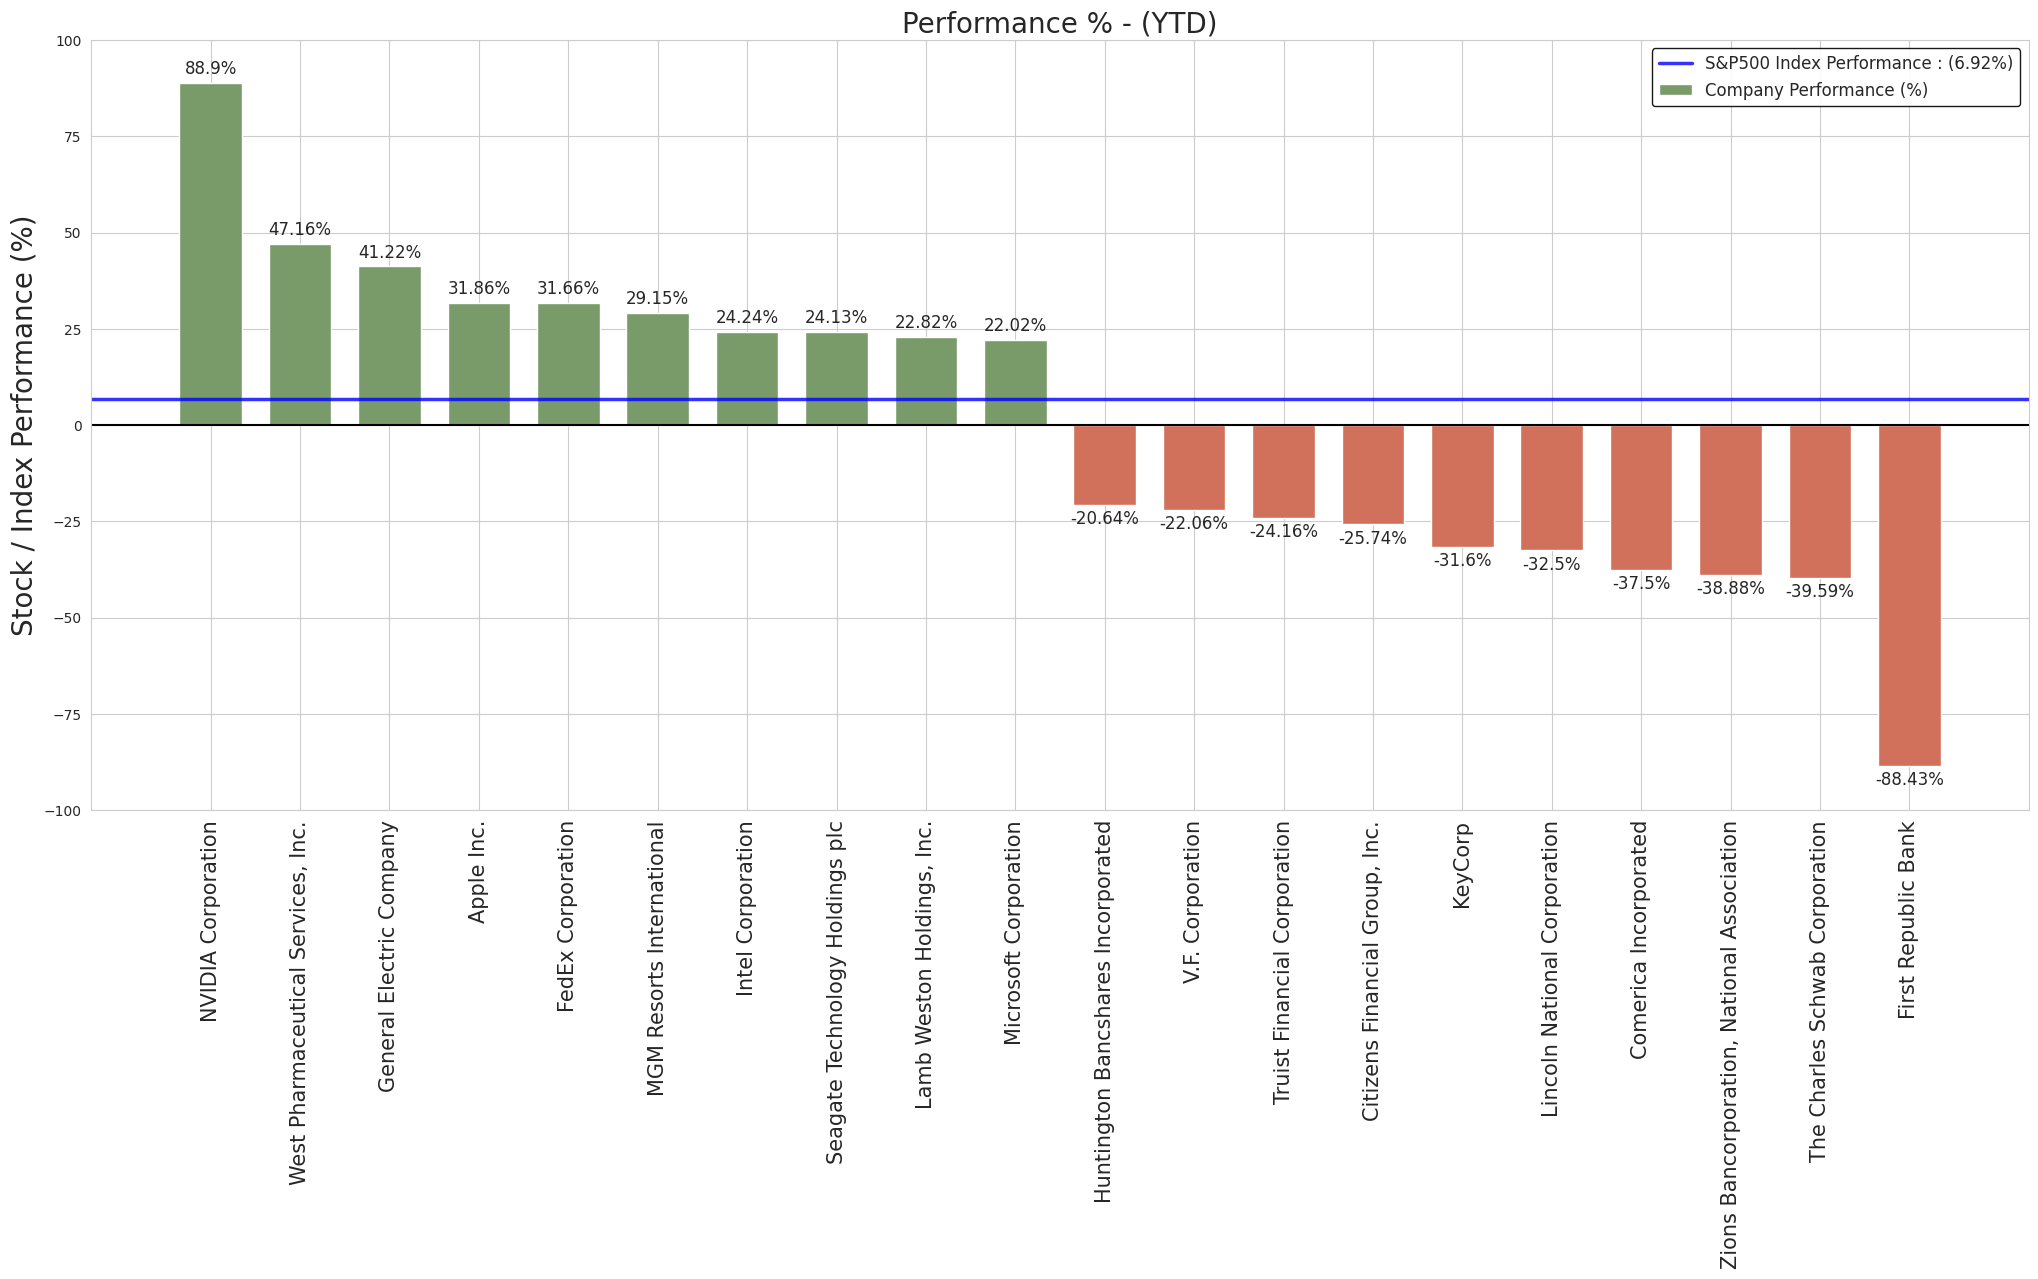

In [8]:
plot_df = pd.read_csv("/content/drive/MyDrive/St Clair/Project/Output Data/stock_data.csv")
plot_df = plot_df.sort_values(by="Percentage Change (YTD)", ascending = False)

plot_df = pd.concat([plot_df.head(10), plot_df.tail(10)])
plot_df = plot_df.reset_index()

# Set the plot style
sns.set_style("whitegrid")

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Percentage Change (YTD)']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Percentage Change (YTD)'], width=0.7, label='Company Performance (%)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Percentage Change (YTD)']):
  if val > 0:
    ax.text(i, val + 6, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
  else:
    ax.text(i, val - 6, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)


# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=sp500_performance_ytd, color='blue', linestyle='-', linewidth=2.5, alpha = 0.8, label='S&P500 Index Performance : ' + "(" + str(sp500_performance_ytd) + "%)")

# Set the y limits
ax.set_ylim(-100, 100)

# Set the title and axis labels
ax.set_title('Performance % - (YTD)', fontsize=20)
ax.set_ylabel('Stock / Index Performance (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

del plot_df

### Sector Performance Analysis (Visualisations)

To gain deeper insights into sector-wise performance, we have plotted the top 5 and bottom 5 performing companies within each sector of the S&P 500 Index. These visualizations include the sector's overall performance and the performance of the S&P 500 Index, allowing for easy comparison between individual companies, sectors, and the overall market. By examining these performance trends, we can identify which companies and sectors are driving growth and which are underperforming, which can provide valuable insights for investors and analysts.

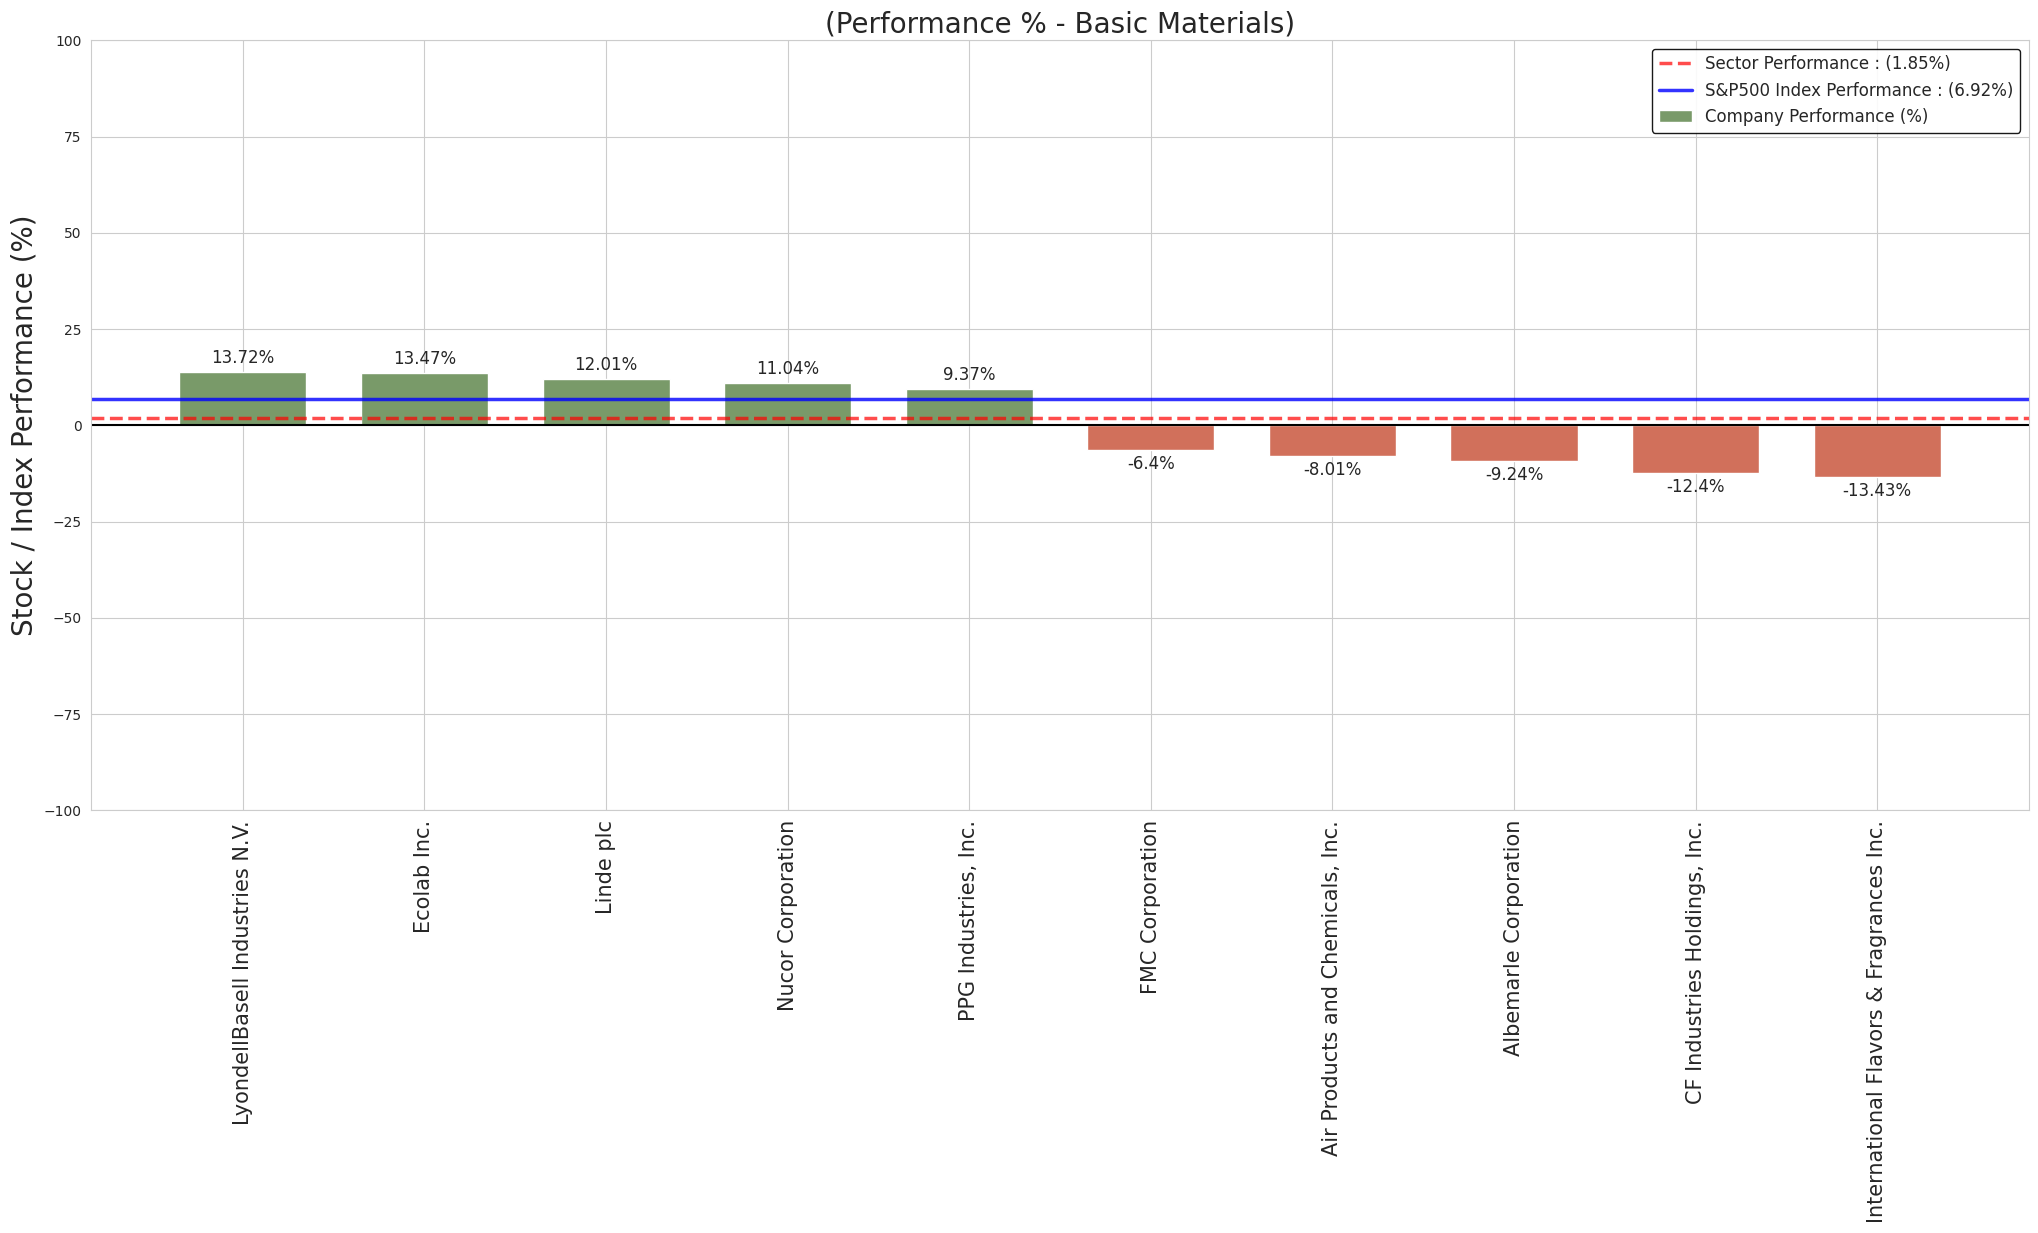

The highest performer in the Basic Materials Sector is LyondellBasell Industries N.V., with a growth of 13.72%.
The least performer in this sector is International Flavors & Fragrances Inc., with a growth of -13.43%.
The performance of this sector this year is 1.85%.


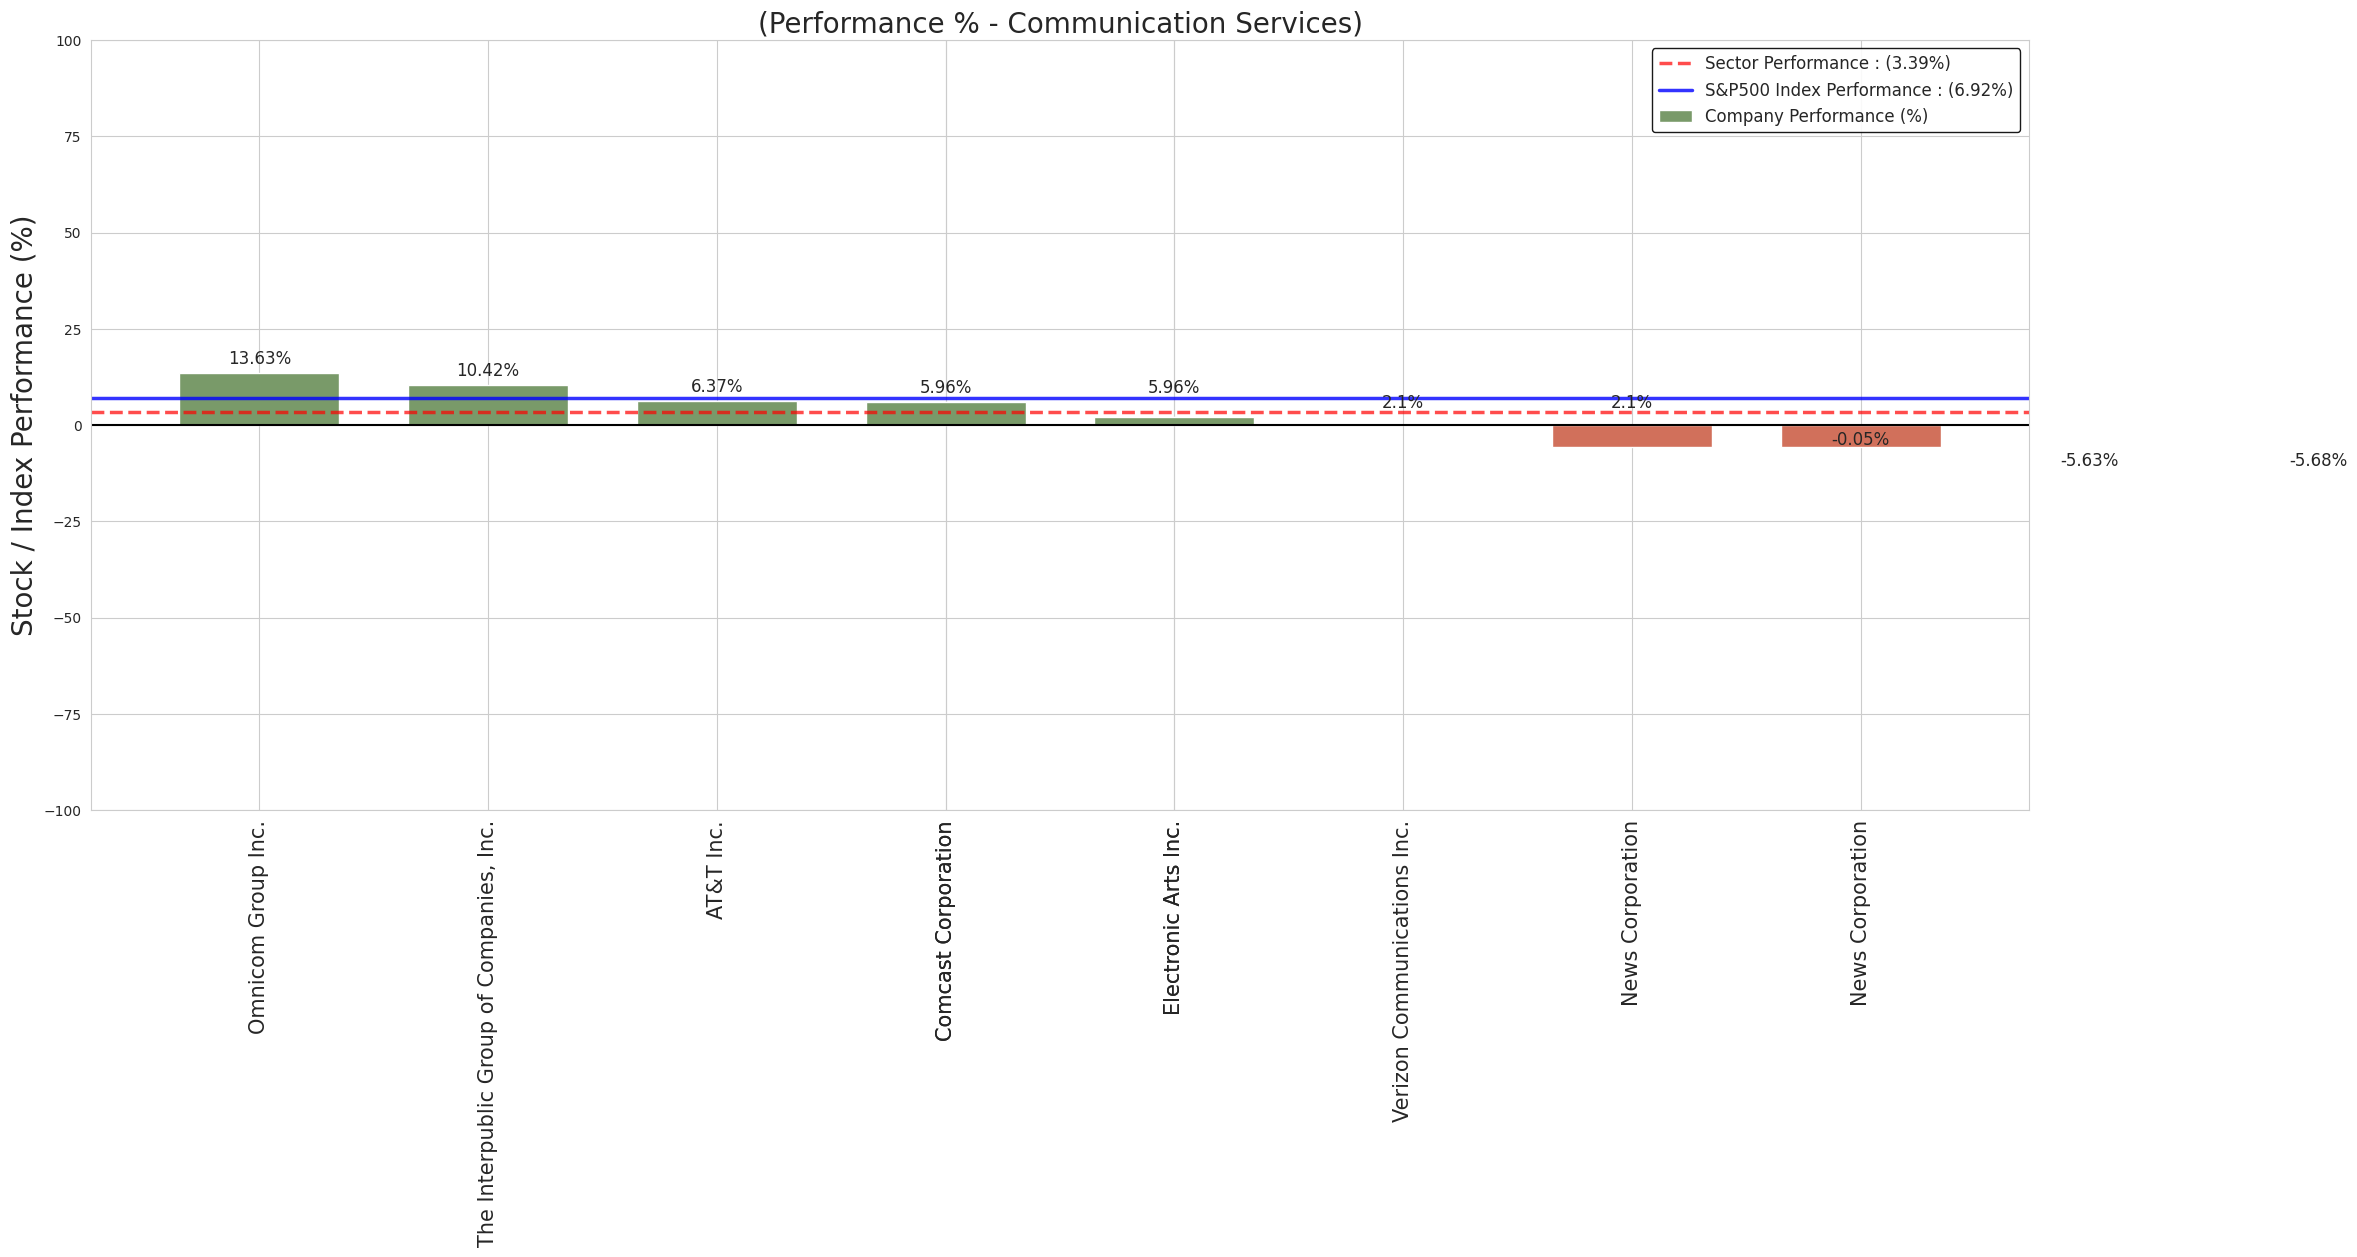

The highest performer in the Communication Services Sector is Omnicom Group Inc., with a growth of 13.63%.
The least performer in this sector is News Corporation, with a growth of -5.68%.
The performance of this sector this year is 3.39%.


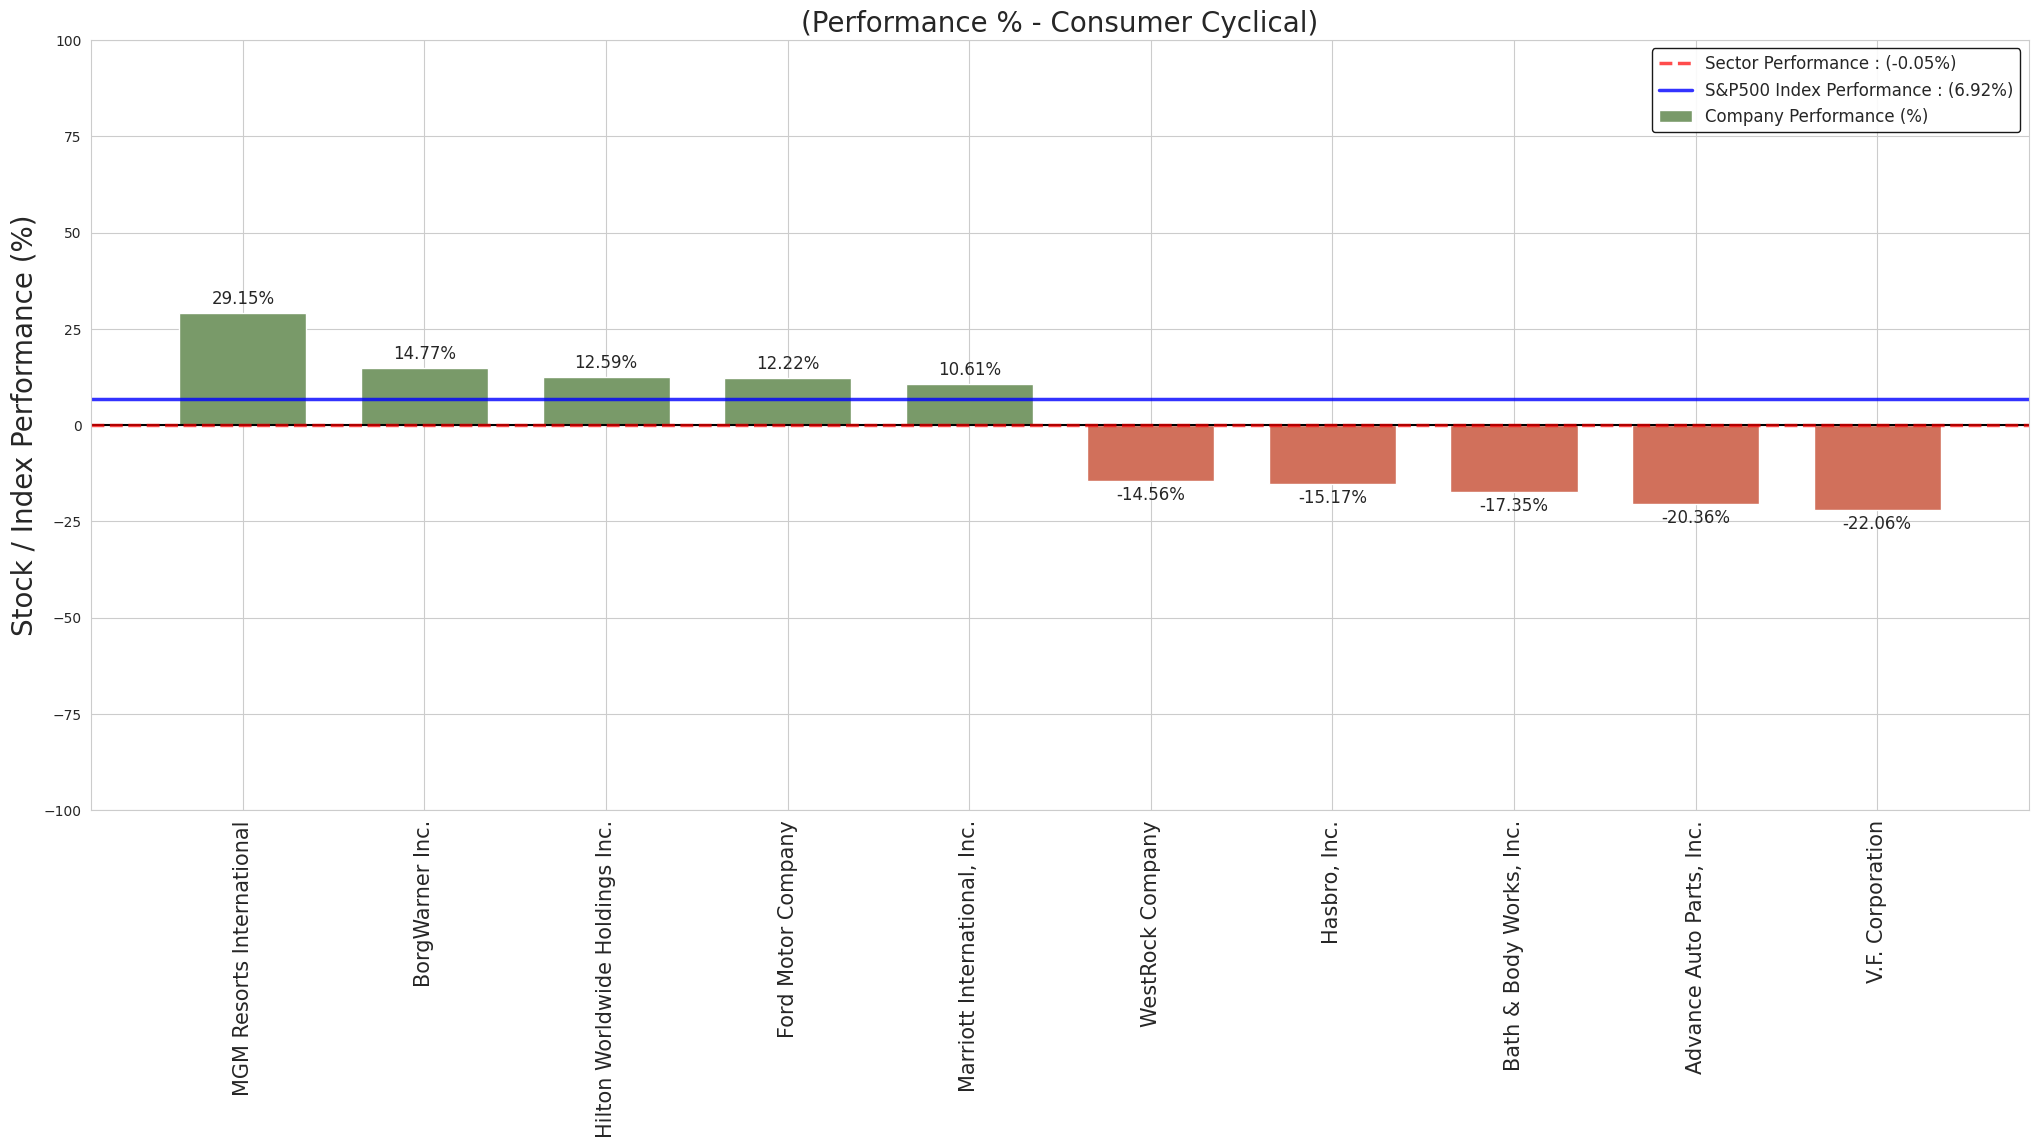

The highest performer in the Consumer Cyclical Sector is MGM Resorts International, with a growth of 29.15%.
The least performer in this sector is V.F. Corporation, with a growth of -22.06%.
The performance of this sector this year is -0.05%.


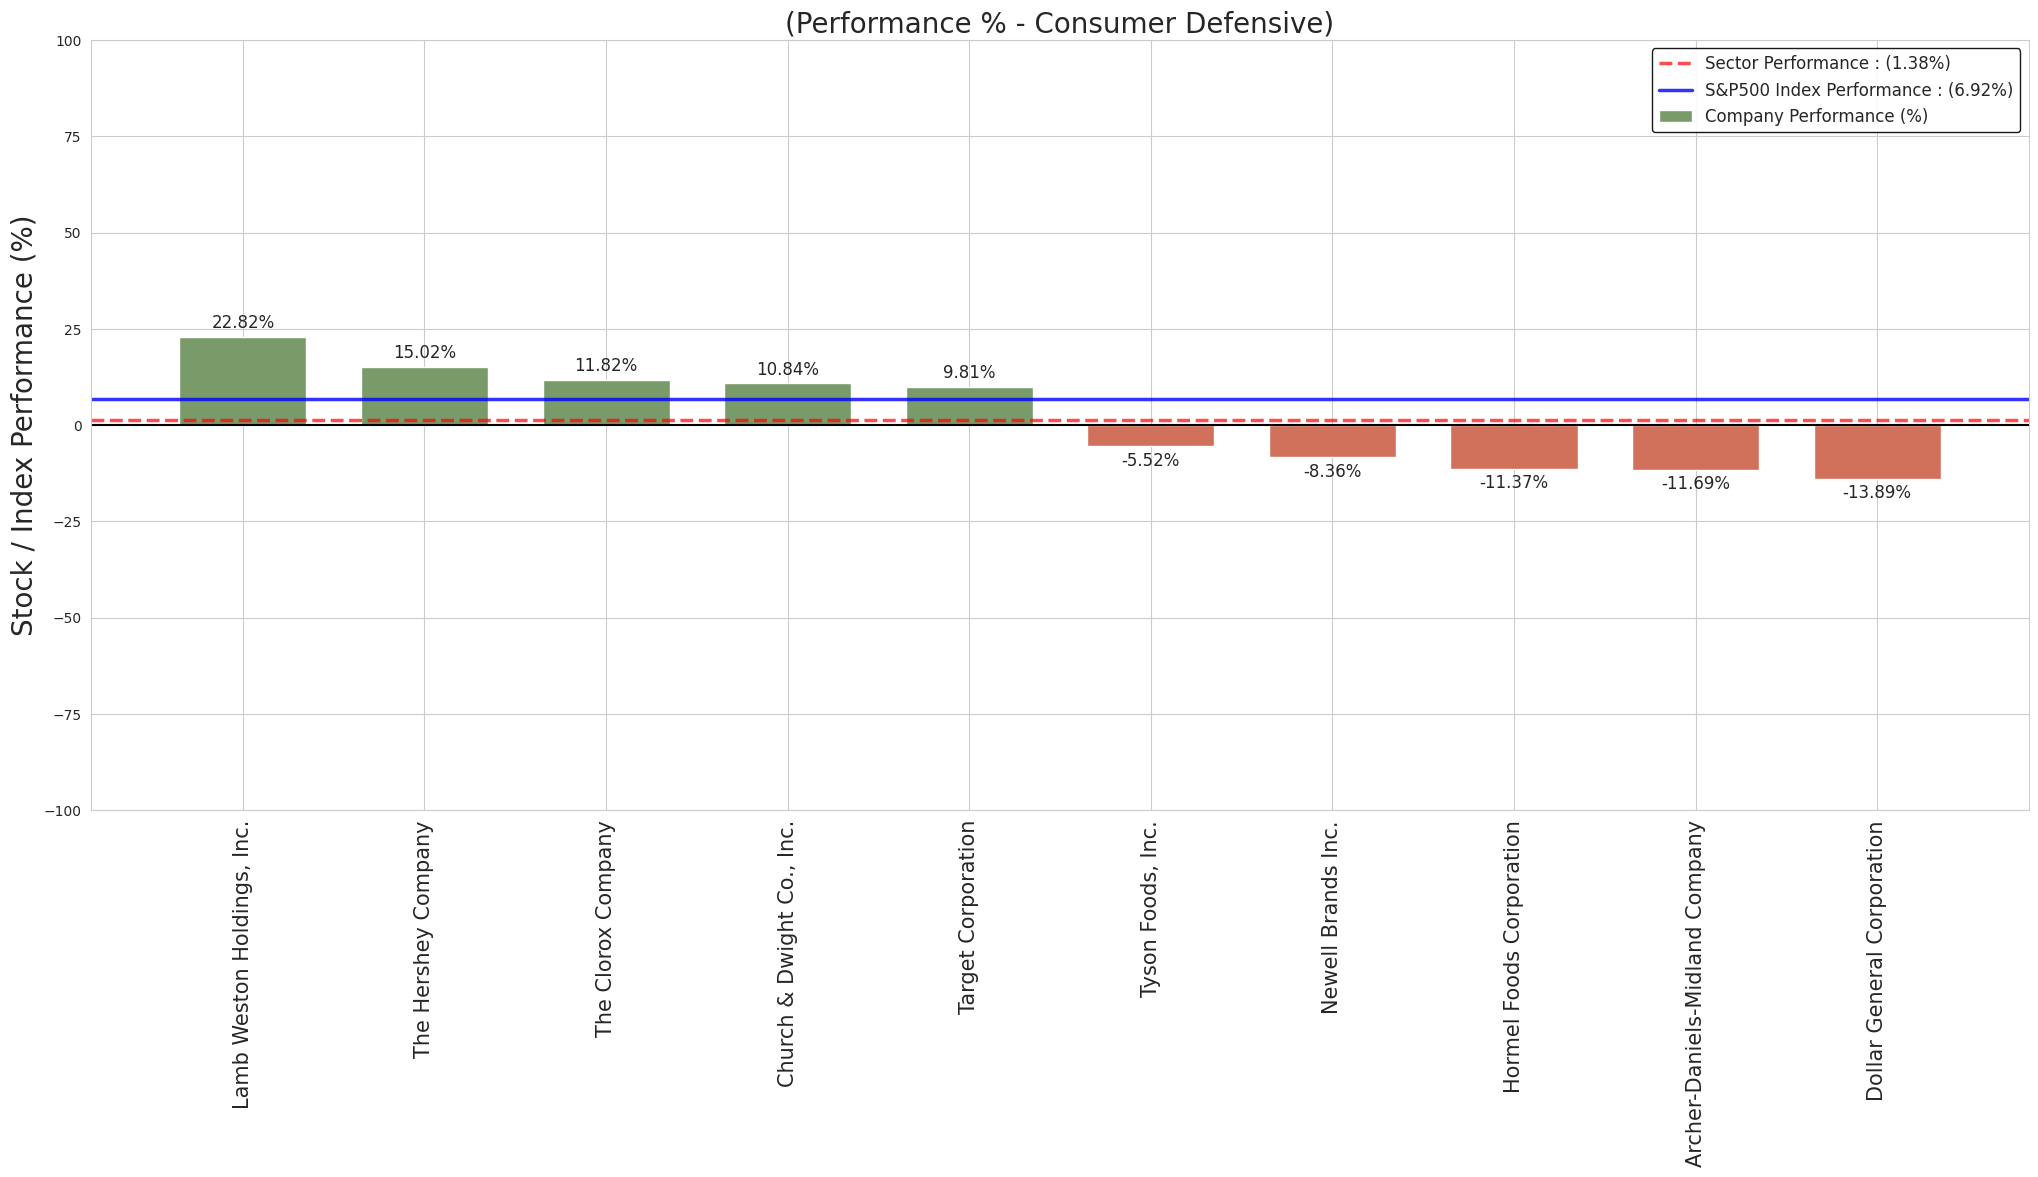

The highest performer in the Consumer Defensive Sector is Lamb Weston Holdings, Inc., with a growth of 22.82%.
The least performer in this sector is Dollar General Corporation, with a growth of -13.89%.
The performance of this sector this year is 1.38%.


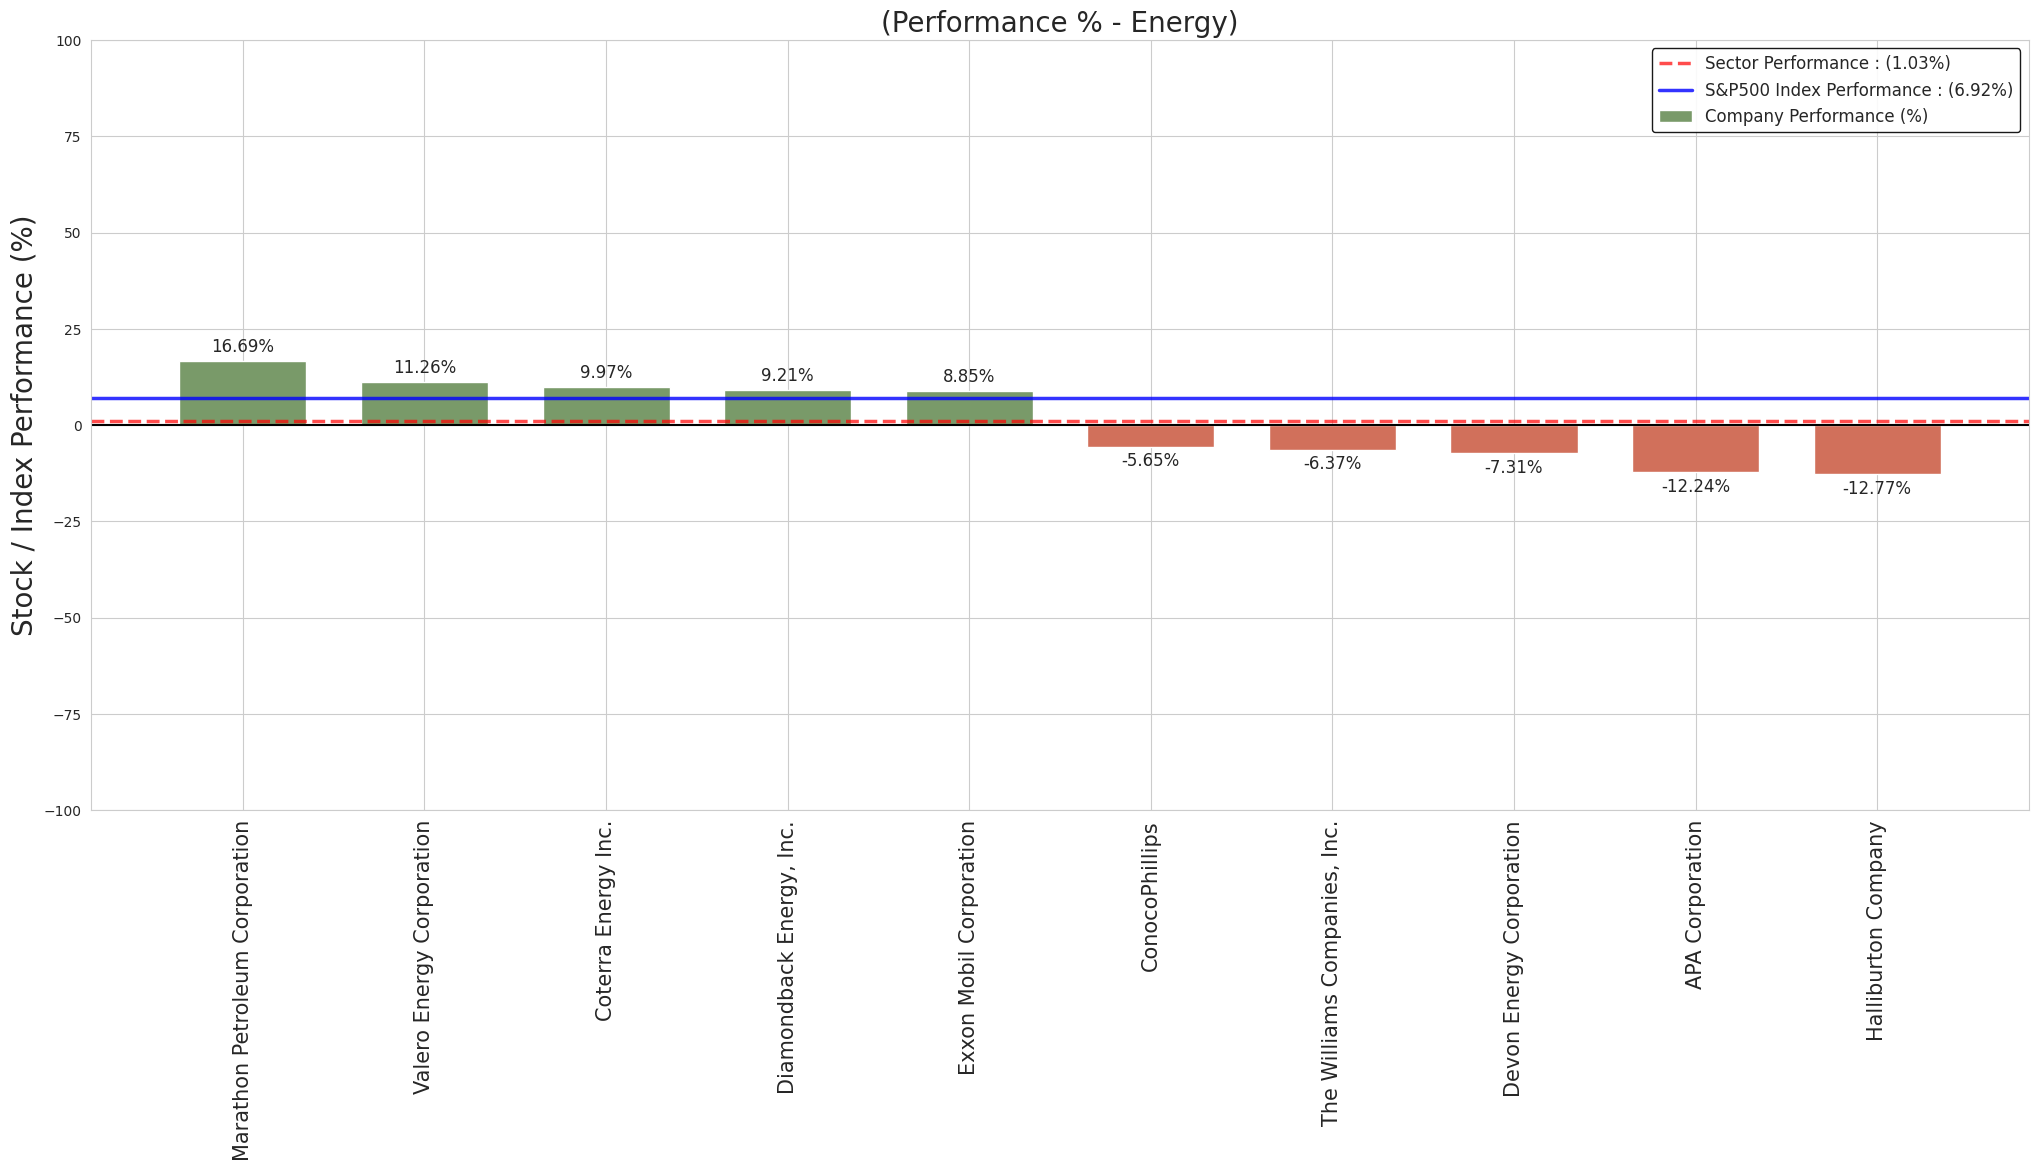

The highest performer in the Energy Sector is Marathon Petroleum Corporation, with a growth of 16.69%.
The least performer in this sector is Halliburton Company, with a growth of -12.77%.
The performance of this sector this year is 1.03%.


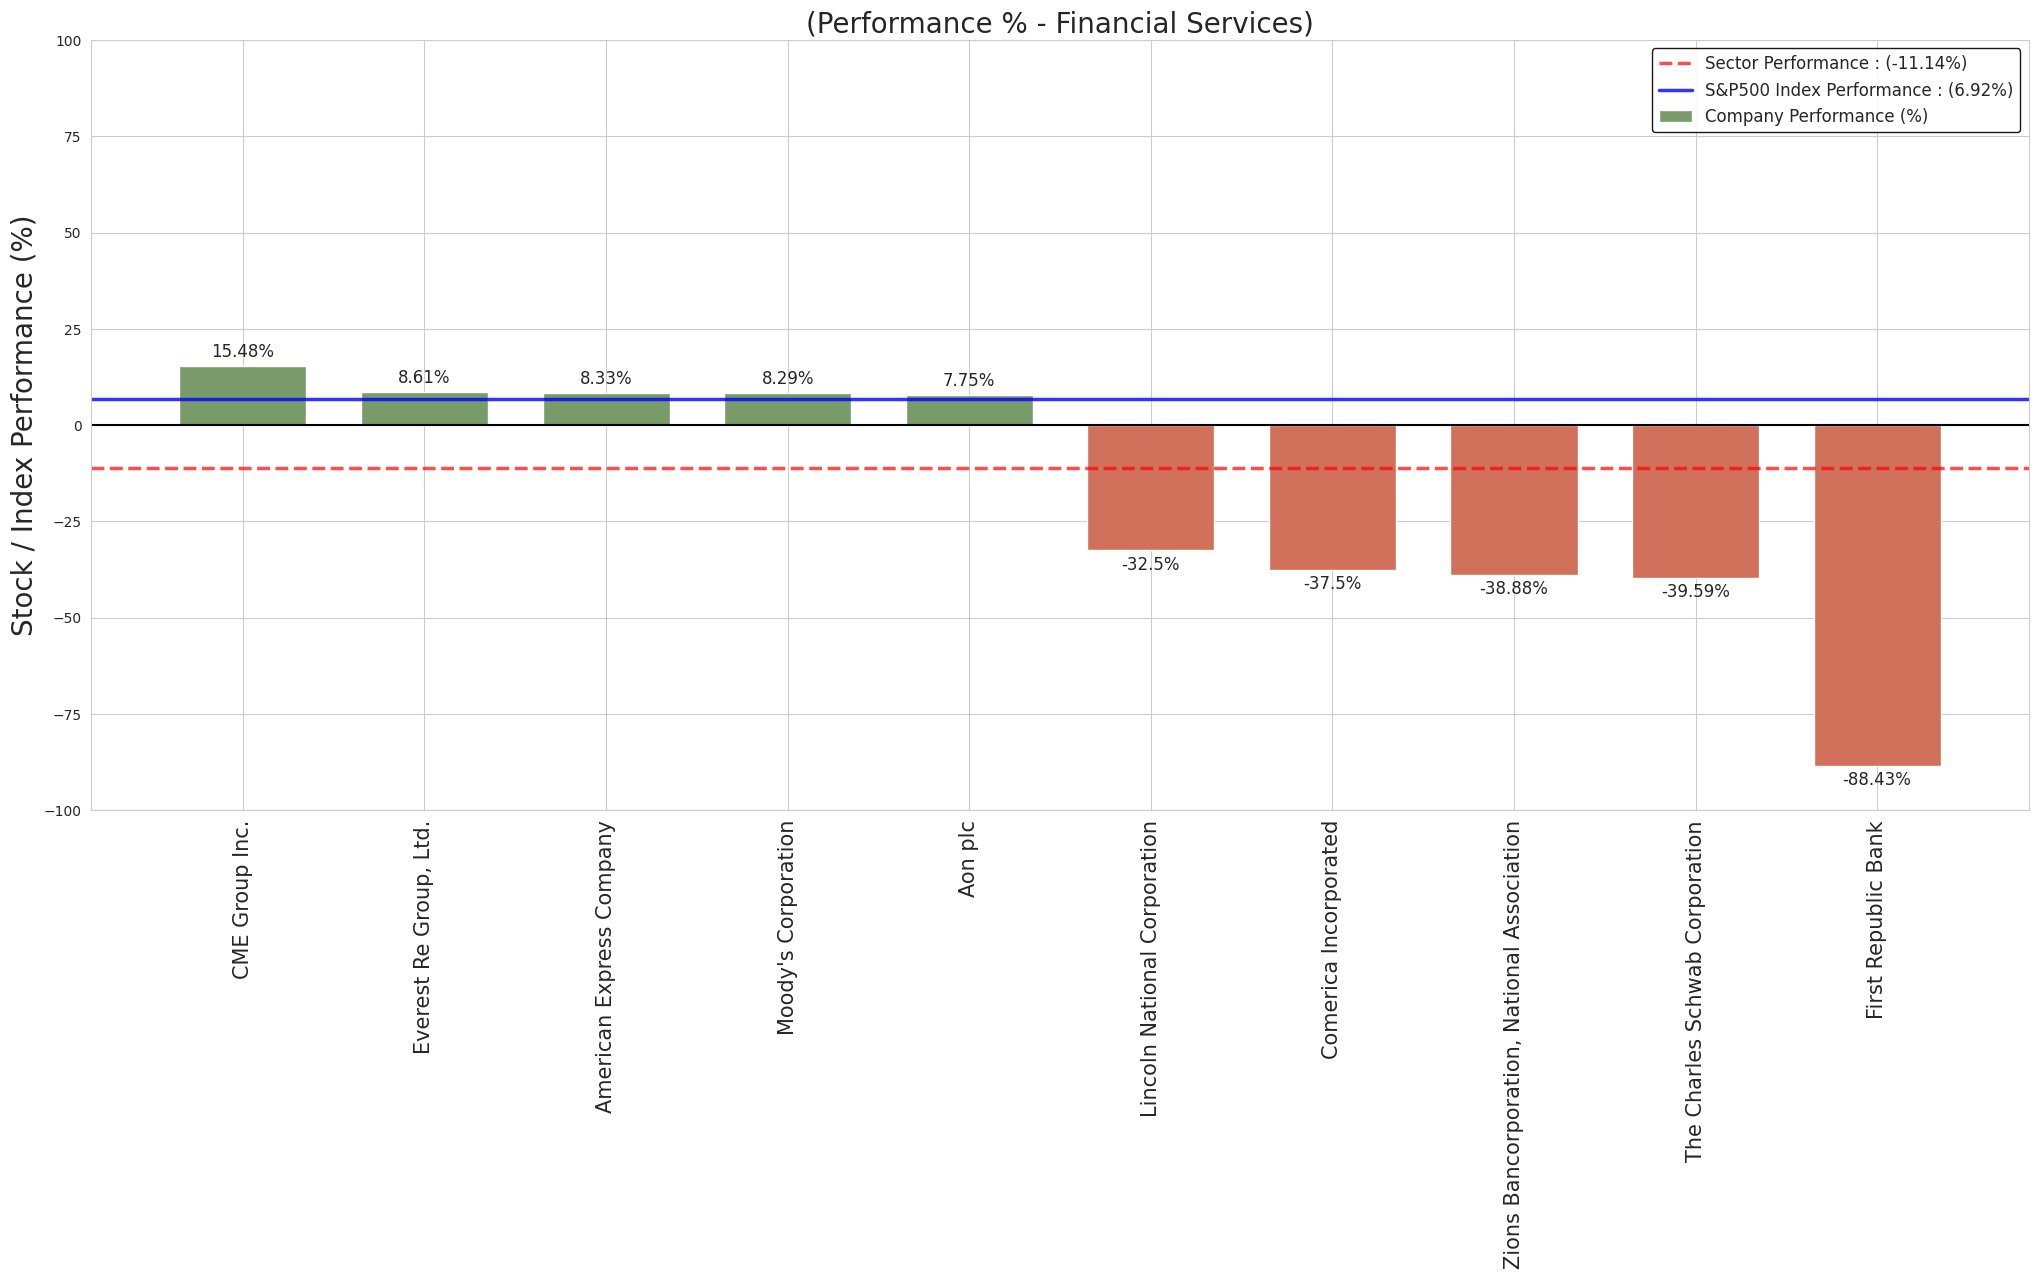

The highest performer in the Financial Services Sector is CME Group Inc., with a growth of 15.48%.
The least performer in this sector is First Republic Bank, with a growth of -88.43%.
The performance of this sector this year is -11.14%.


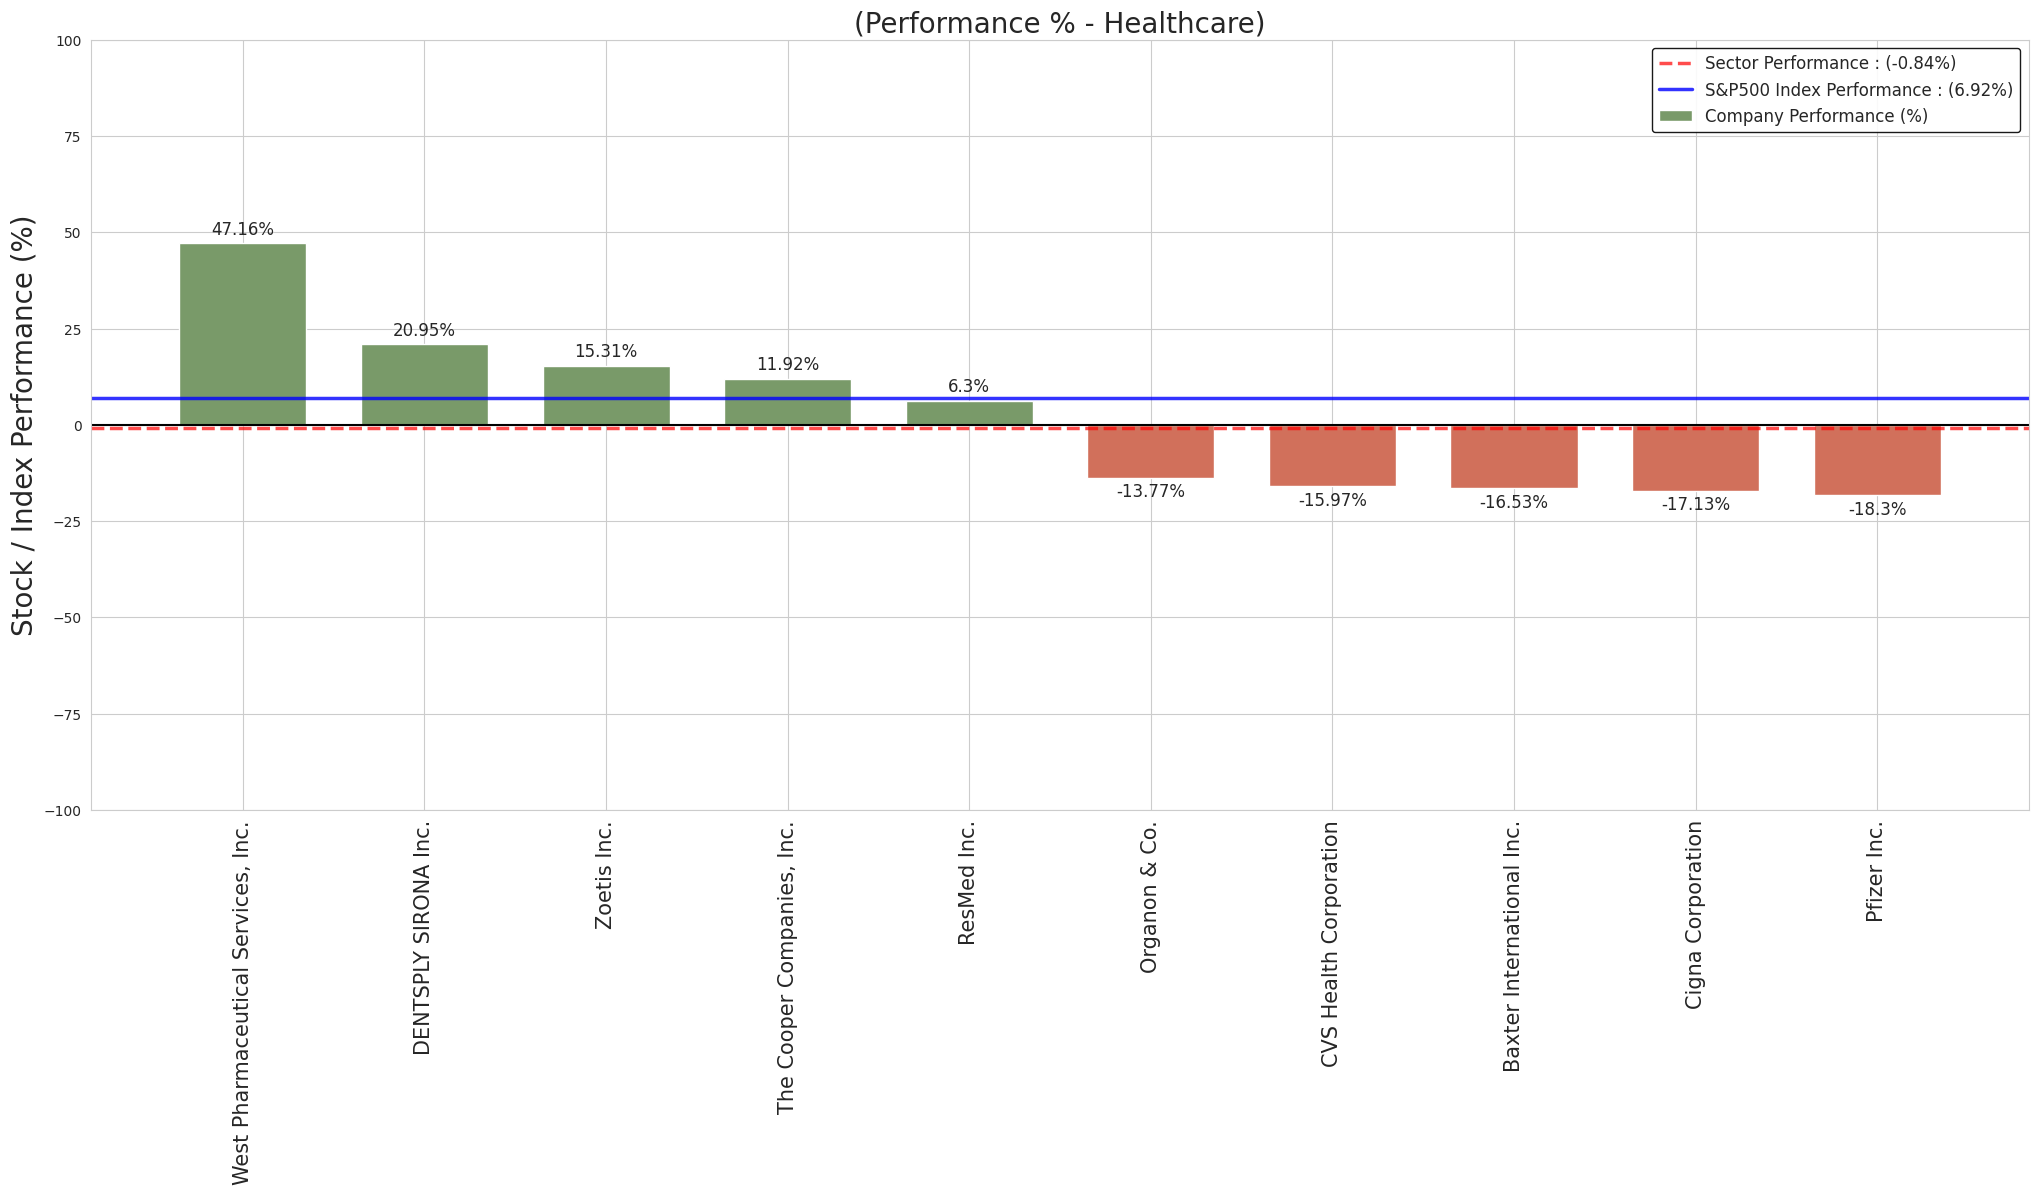

The highest performer in the Healthcare Sector is West Pharmaceutical Services, Inc., with a growth of 47.16%.
The least performer in this sector is Pfizer Inc., with a growth of -18.30%.
The performance of this sector this year is -0.84%.


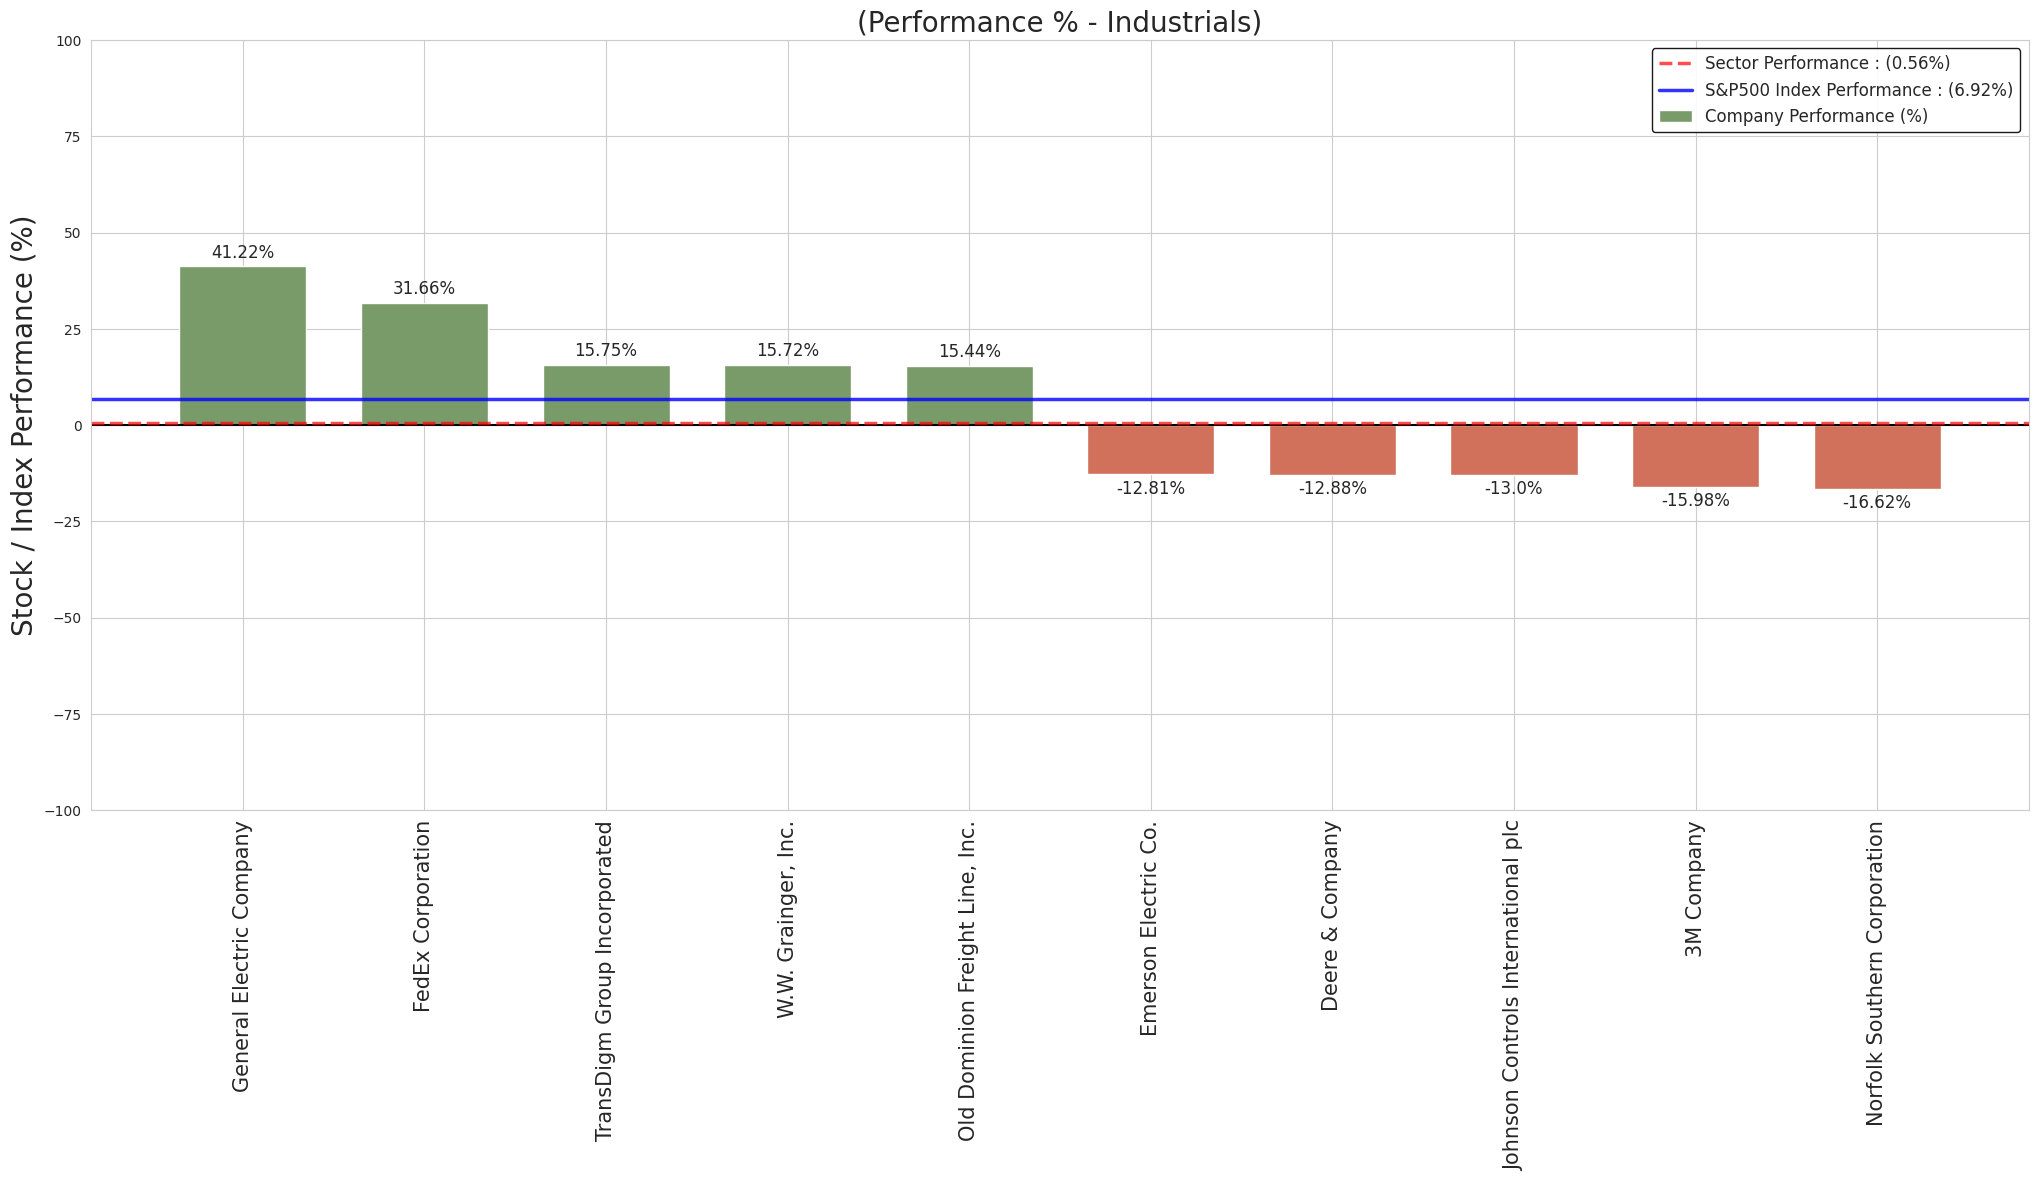

The highest performer in the Industrials Sector is General Electric Company, with a growth of 41.22%.
The least performer in this sector is Norfolk Southern Corporation, with a growth of -16.62%.
The performance of this sector this year is 0.56%.


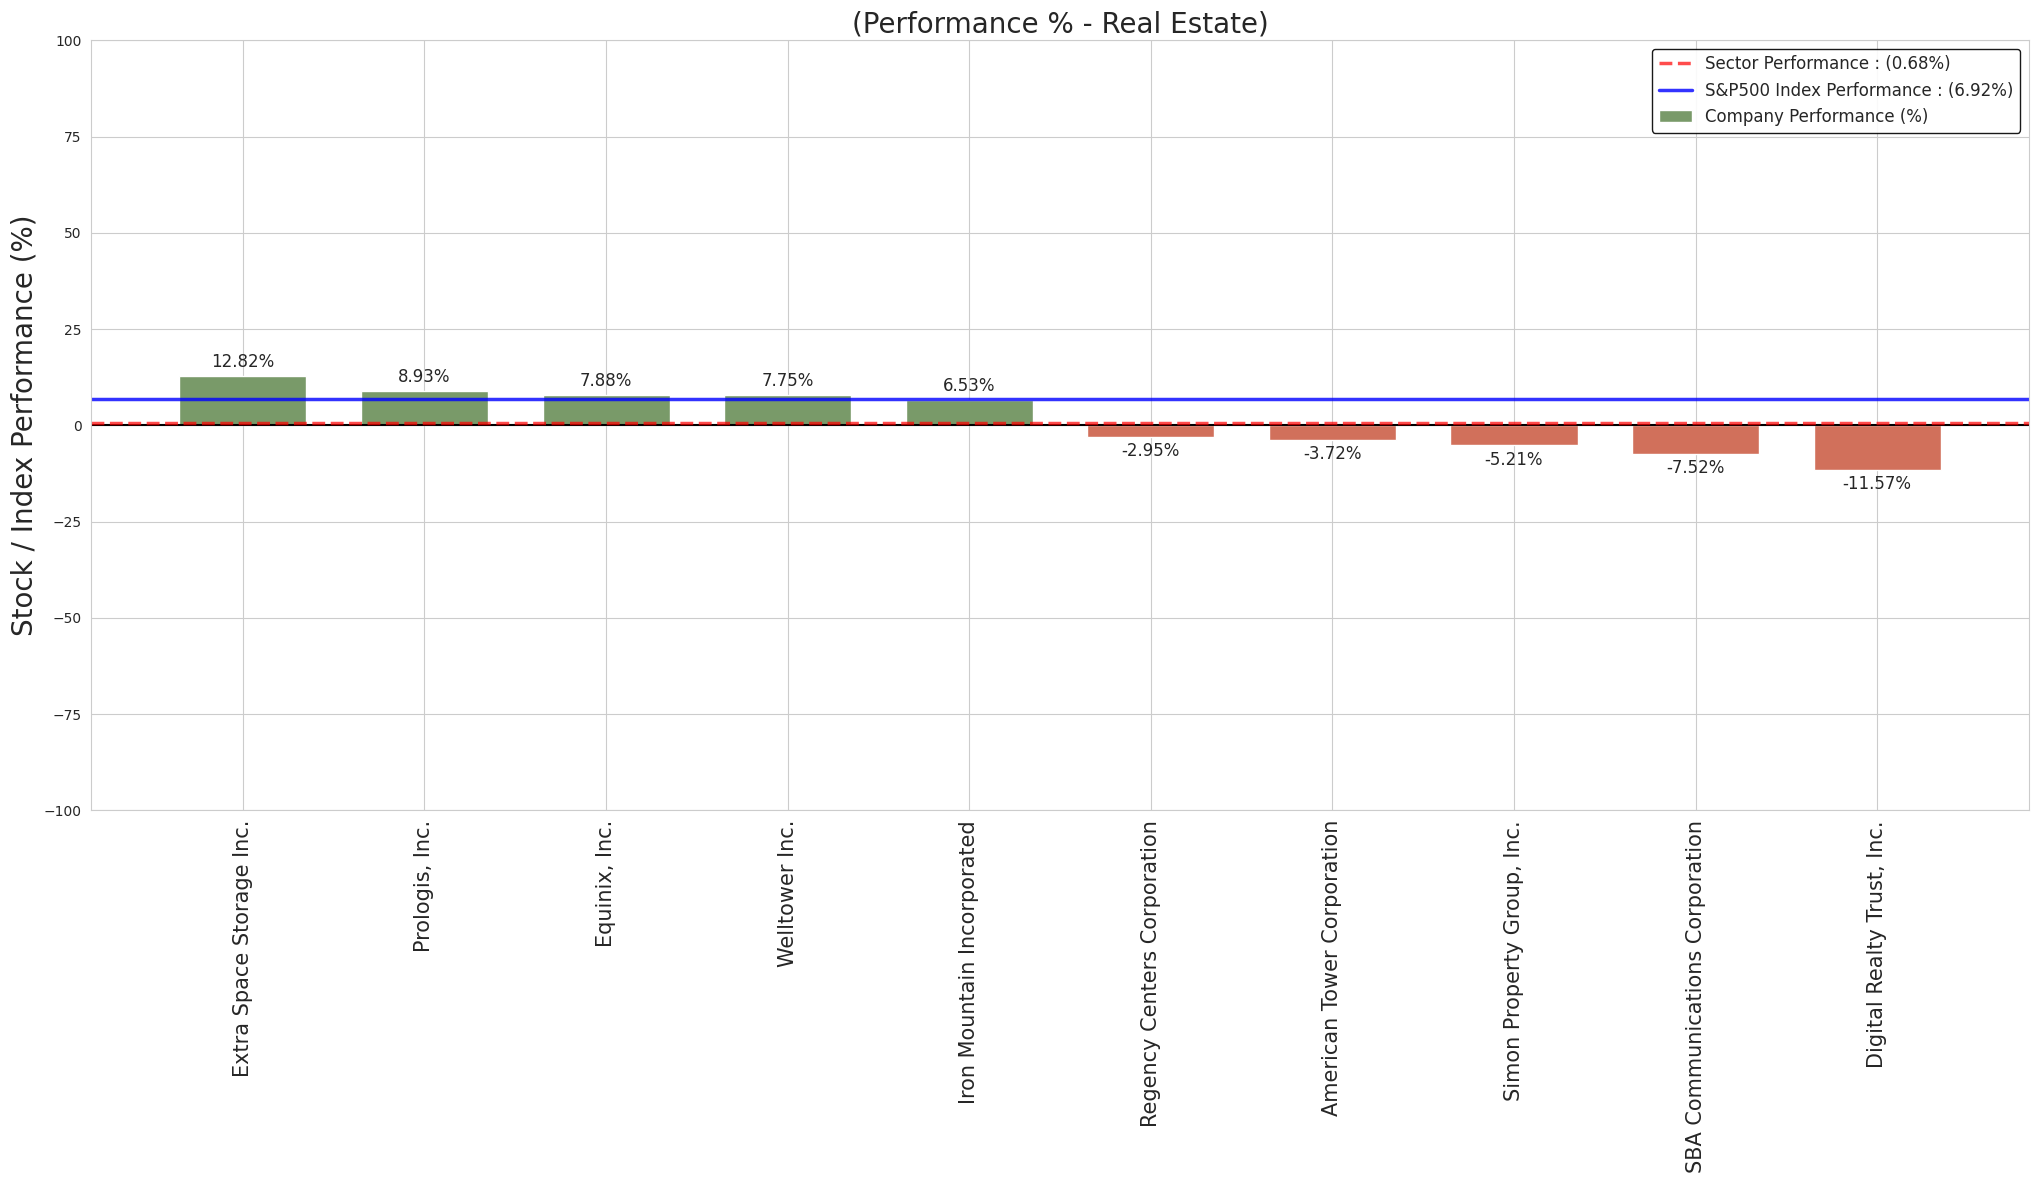

The highest performer in the Real Estate Sector is Extra Space Storage Inc., with a growth of 12.82%.
The least performer in this sector is Digital Realty Trust, Inc., with a growth of -11.57%.
The performance of this sector this year is 0.68%.


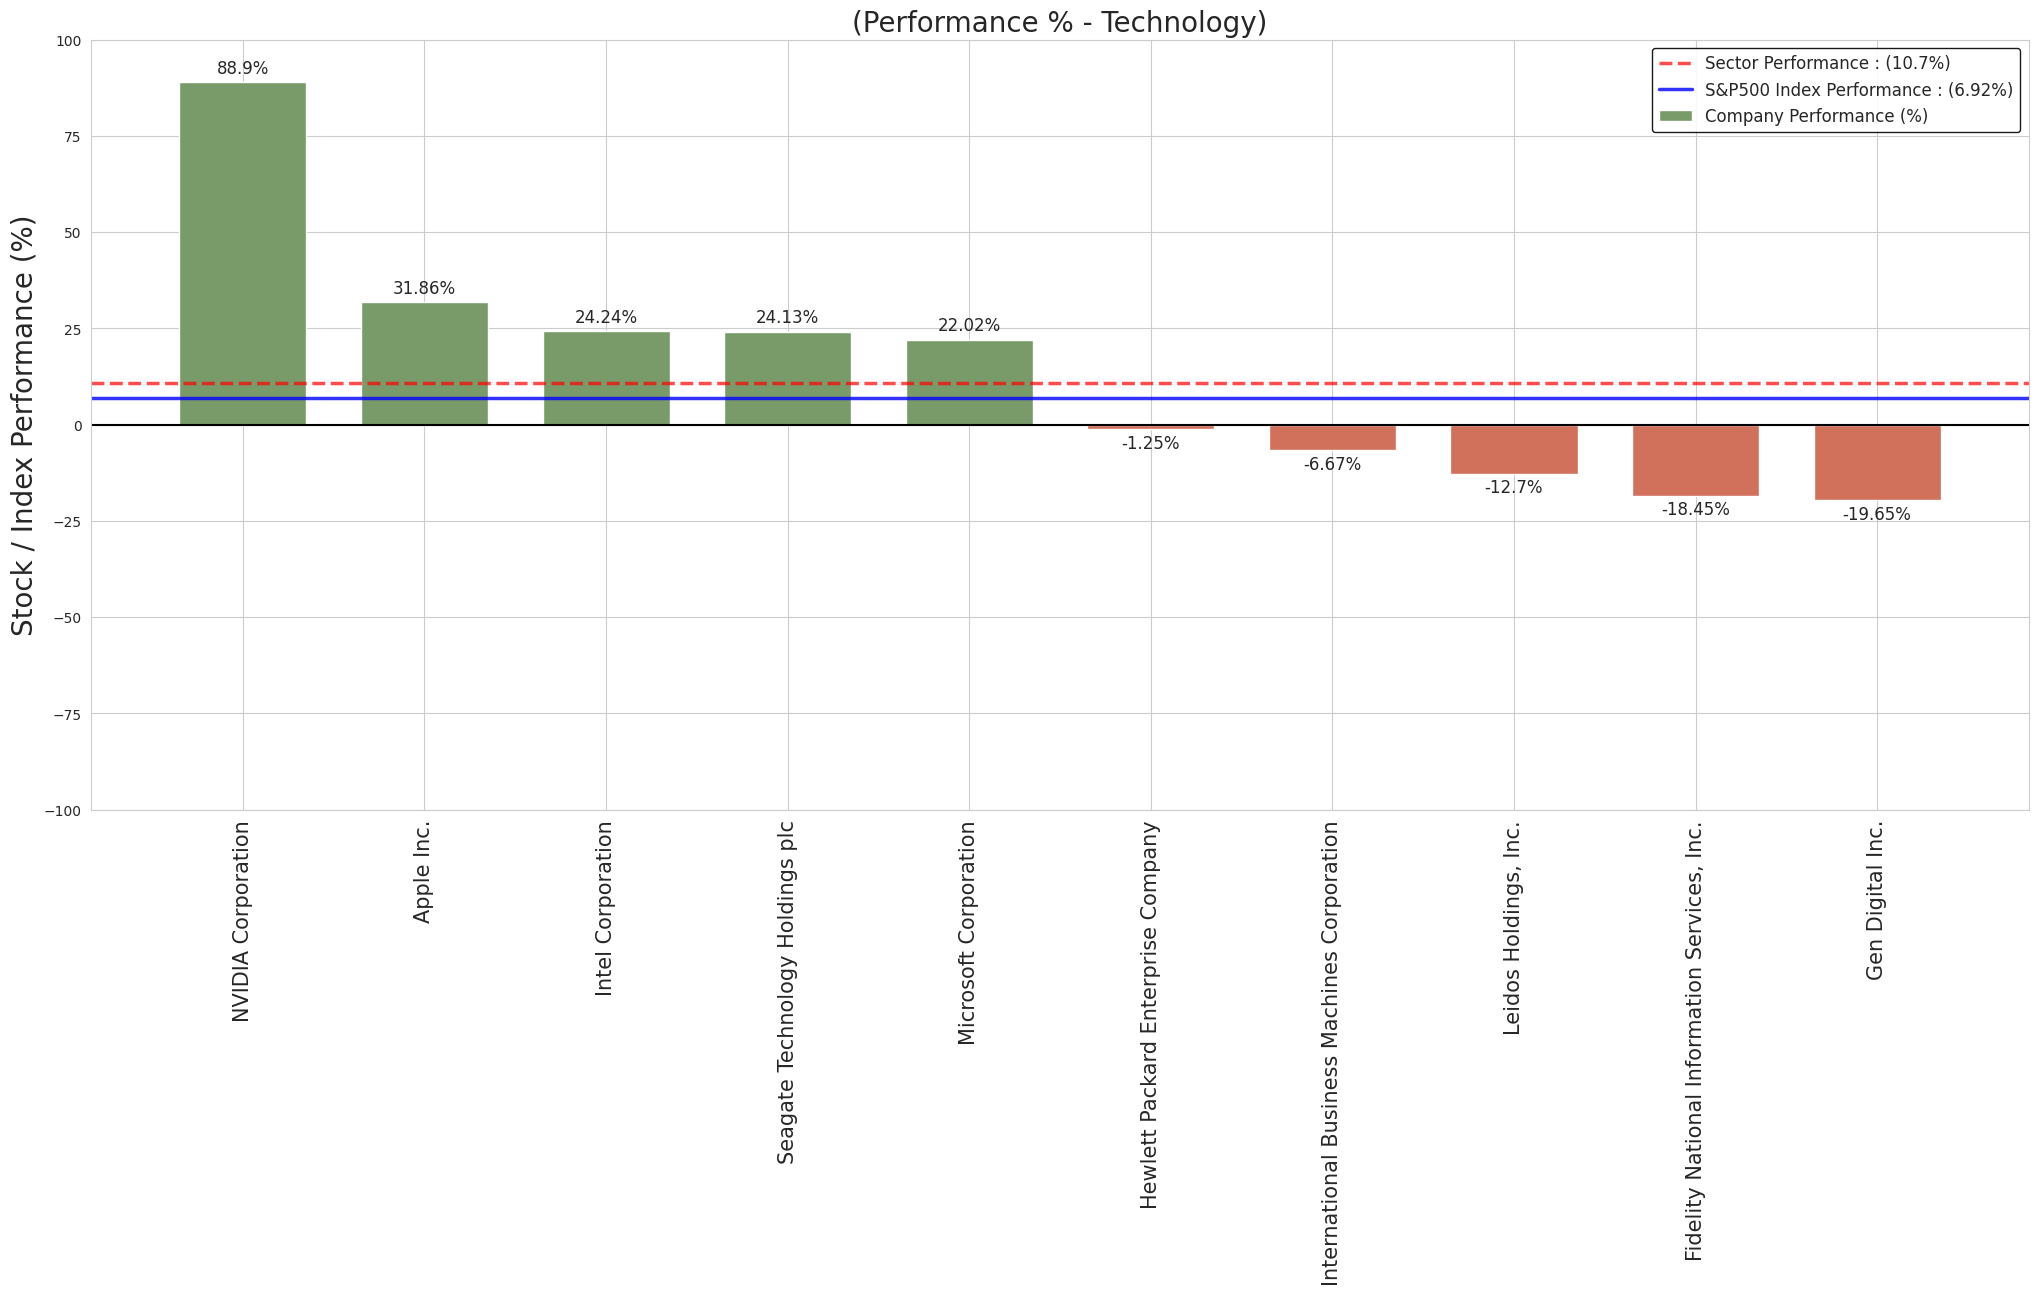

The highest performer in the Technology Sector is NVIDIA Corporation, with a growth of 88.90%.
The least performer in this sector is Gen Digital Inc., with a growth of -19.65%.
The performance of this sector this year is 10.70%.


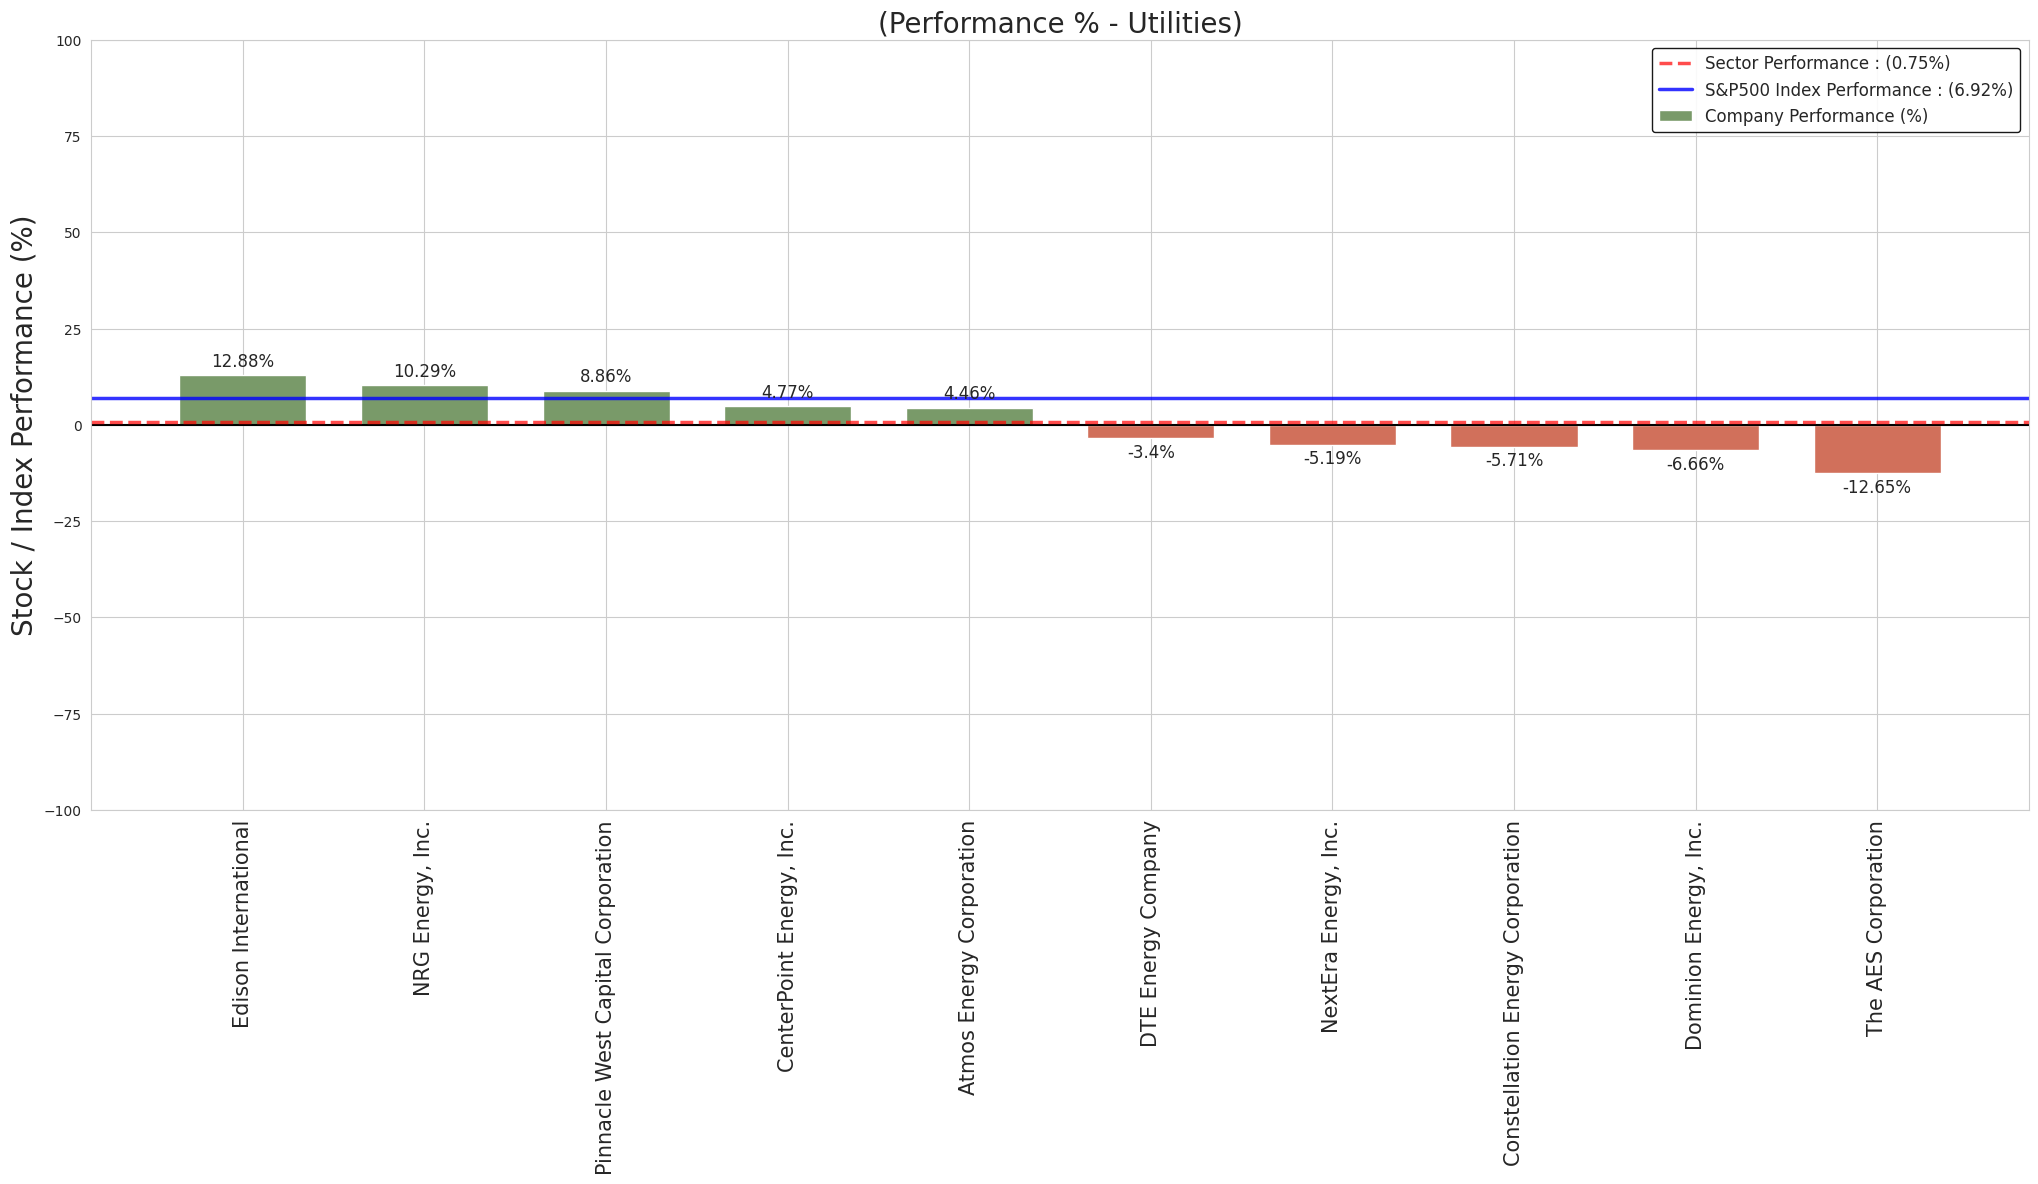

The highest performer in the Utilities Sector is Edison International, with a growth of 12.88%.
The least performer in this sector is The AES Corporation, with a growth of -12.65%.
The performance of this sector this year is 0.75%.


In [9]:
sector_list = sorted(df["Sector"].unique().tolist())

# Creating a function to plot the graphs for all the sectors in the S&P500 Index
def sector_performance_visual(i):
  plot_df = pd.read_csv(out_path + "Sector Wise Analysis/" + i + ".csv")

  # Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
  plot_df = pd.concat([plot_df.head(5), plot_df.tail(5)])
  plot_df = plot_df.reset_index()
  plot_df = plot_df.set_index("Ticker")
  plot_df = plot_df.sort_values(by="Percentage Change (YTD)", ascending=False)

  # Set the plot style
  sns.set_style("whitegrid")

  # Setting the colours for the bars in the plot
  colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Percentage Change (YTD)']]

  # Create the plot
  fig, ax = plt.subplots(figsize=(25, 10))
  ax.bar(plot_df.index, plot_df['Percentage Change (YTD)'], width=0.7, label='Company Performance (%)', color = colours_for_bars)

  # Add values above each bar
  for i, val in enumerate(plot_df['Percentage Change (YTD)']):
    if val > 0:
      ax.text(i, val + 6, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
    else:
      ax.text(i, val - 6, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)


  # Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
  ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
  ax.axhline(y=plot_df["Sector Performance"][1], color='red', linestyle='--', linewidth=2.5, alpha = 0.7, label='Sector Performance : ' + "(" + str(round(plot_df["Sector Performance"][1],2)) + "%)")
  ax.axhline(y=sp500_performance_ytd, color='blue', linestyle='-', linewidth=2.5, alpha = 0.8, label='S&P500 Index Performance : ' + "(" + str(sp500_performance_ytd) + "%)")

  # Set the y limits
  ax.set_ylim(-100, 100)

  # Set the title and axis labels
  ax.set_title('(Performance % - ' + plot_df["Sector"][0] + ')', fontsize=20)
  ax.set_ylabel('Stock / Index Performance (%)', fontsize=20)

  # Set the x-axis tick labels
  ax.set_xticks(plot_df.index)
  ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

  # Add a legend
  ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

  # Show the plot
  plt.show()

  # Print the summary of the plot mentioning the highest and the lowest performers in the sector.
  print(f"The highest performer in the {plot_df['Sector'][0]} Sector is {plot_df['Company Name'].iloc[0]}, with a growth of {plot_df['Percentage Change (YTD)'].iloc[0]:.2f}%.")
  print(f"The least performer in this sector is {plot_df['Company Name'].iloc[-1]}, with a growth of {plot_df['Percentage Change (YTD)'].iloc[-1]:.2f}%.")
  print(f"The performance of this sector this year is {plot_df['Sector Performance'][1]:.2f}%.")

  # Deleting the above created DataFrame "plot_df" to avoid redundancy
  del plot_df

# We are deploying the above created function to plot all the required graphs, by looping through the list of sectors in the S&P500 Index
for i in sector_list:
  sector_performance_visual(i)


### Comparing the performance of all Sectors in the index

To understand the performance of the S&P 500 Index, it's important to compare the performance of each sector within the index. This analysis can help identify which sectors are driving growth and which are lagging behind. We will use data visualization tools to make it easy to compare the performance of each sector and the S&P 500 Index overall, making it easier to identify trends and patterns. Overall, this analysis will provide a deeper understanding of the S&P 500 Index and its constituent sectors, which can be valuable for investors and analysts seeking to make informed investment decisions.

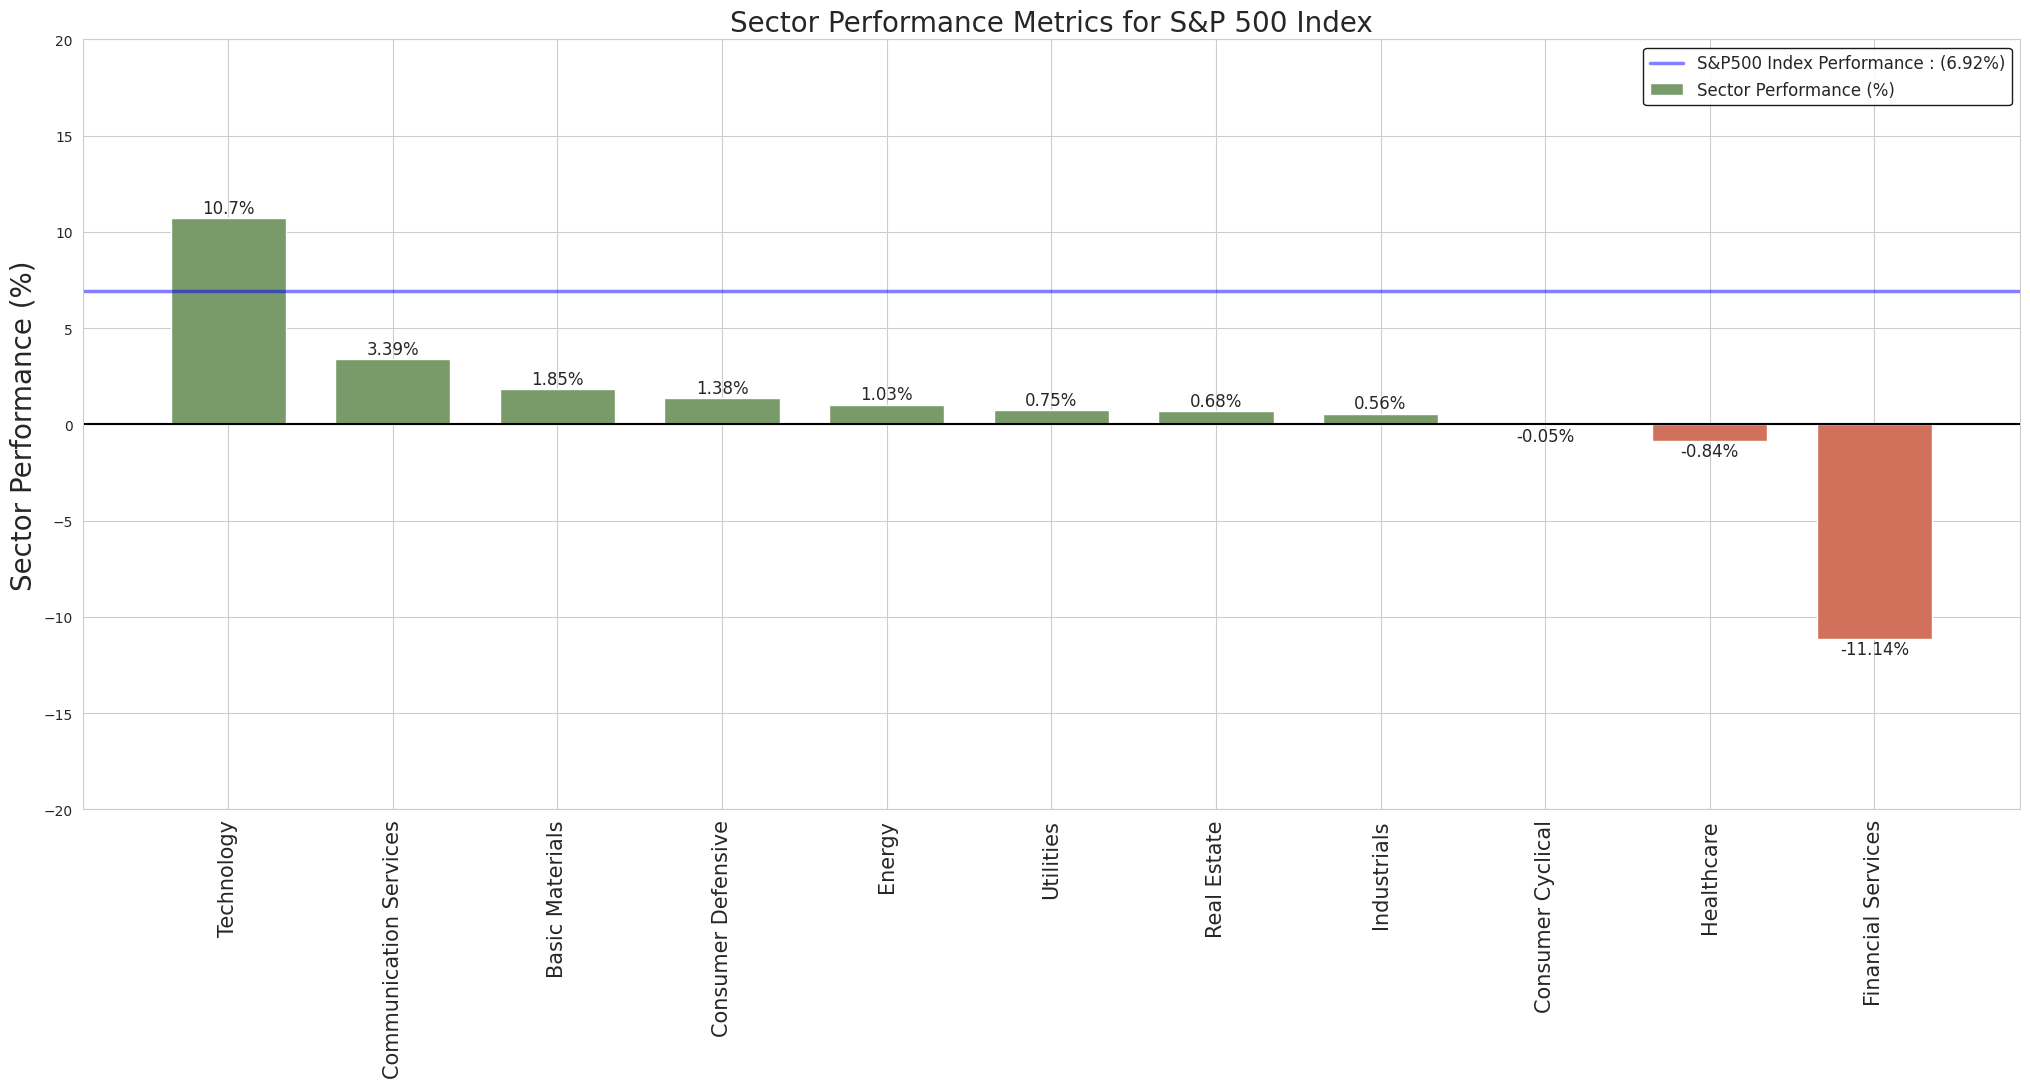

The highest performing sector for this year in the S&P500 Index is Technology, with a growth of 10.70%.
The least performing sector for this year is Financial Services, with a growth of -11.14%.
The S&P500 Index Performance for this year is at 6.92%.


In [10]:
plot_df = pd.read_csv(out_path + "Sector Performance.csv")

# Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
plot_df = plot_df.set_index("Sector")
plot_df = plot_df.sort_values(by="Sector Performance", ascending=False)

# Set the plot style
sns.set_style('whitegrid')

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Sector Performance']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Sector Performance'], width=0.7, label='Sector Performance (%)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Sector Performance']):
  if val > 0:
    ax.text(i, val + 1, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
  else:
    ax.text(i, val - 1, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)

# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=sp500_performance_ytd, color='blue', linestyle='-', linewidth=2.5, alpha = 0.5, label='S&P500 Index Performance : ' + "(" + str(sp500_performance_ytd) + "%)")

# Set the y limits
ax.set_ylim(-20, 20)

# Set the title and axis labels
ax.set_title('Sector Performance Metrics for S&P 500 Index', fontsize=20)
ax.set_ylabel('Sector Performance (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df.index, rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

# Print the summary of the plot mentioning the highest and the lowest performing sectors.
print(f"The highest performing sector for this year in the S&P500 Index is {plot_df.index[0]}, with a growth of {plot_df['Sector Performance'].iloc[0]:.2f}%.")
print(f"The least performing sector for this year is {plot_df.index[-1]}, with a growth of {plot_df['Sector Performance'].iloc[-1]:.2f}%.")
print(f"The S&P500 Index Performance for this year is at {sp500_performance_ytd:.2f}%.")


# Deleting the above created DataFrame "plot_df" to avoid redundancy
del plot_df

## Profitability Analysis (Using the Net Profit Margin Ratio)

Now, let's see if we can identify the 10 most profitable and the 10 least profitable companies in the S&P500 Index.

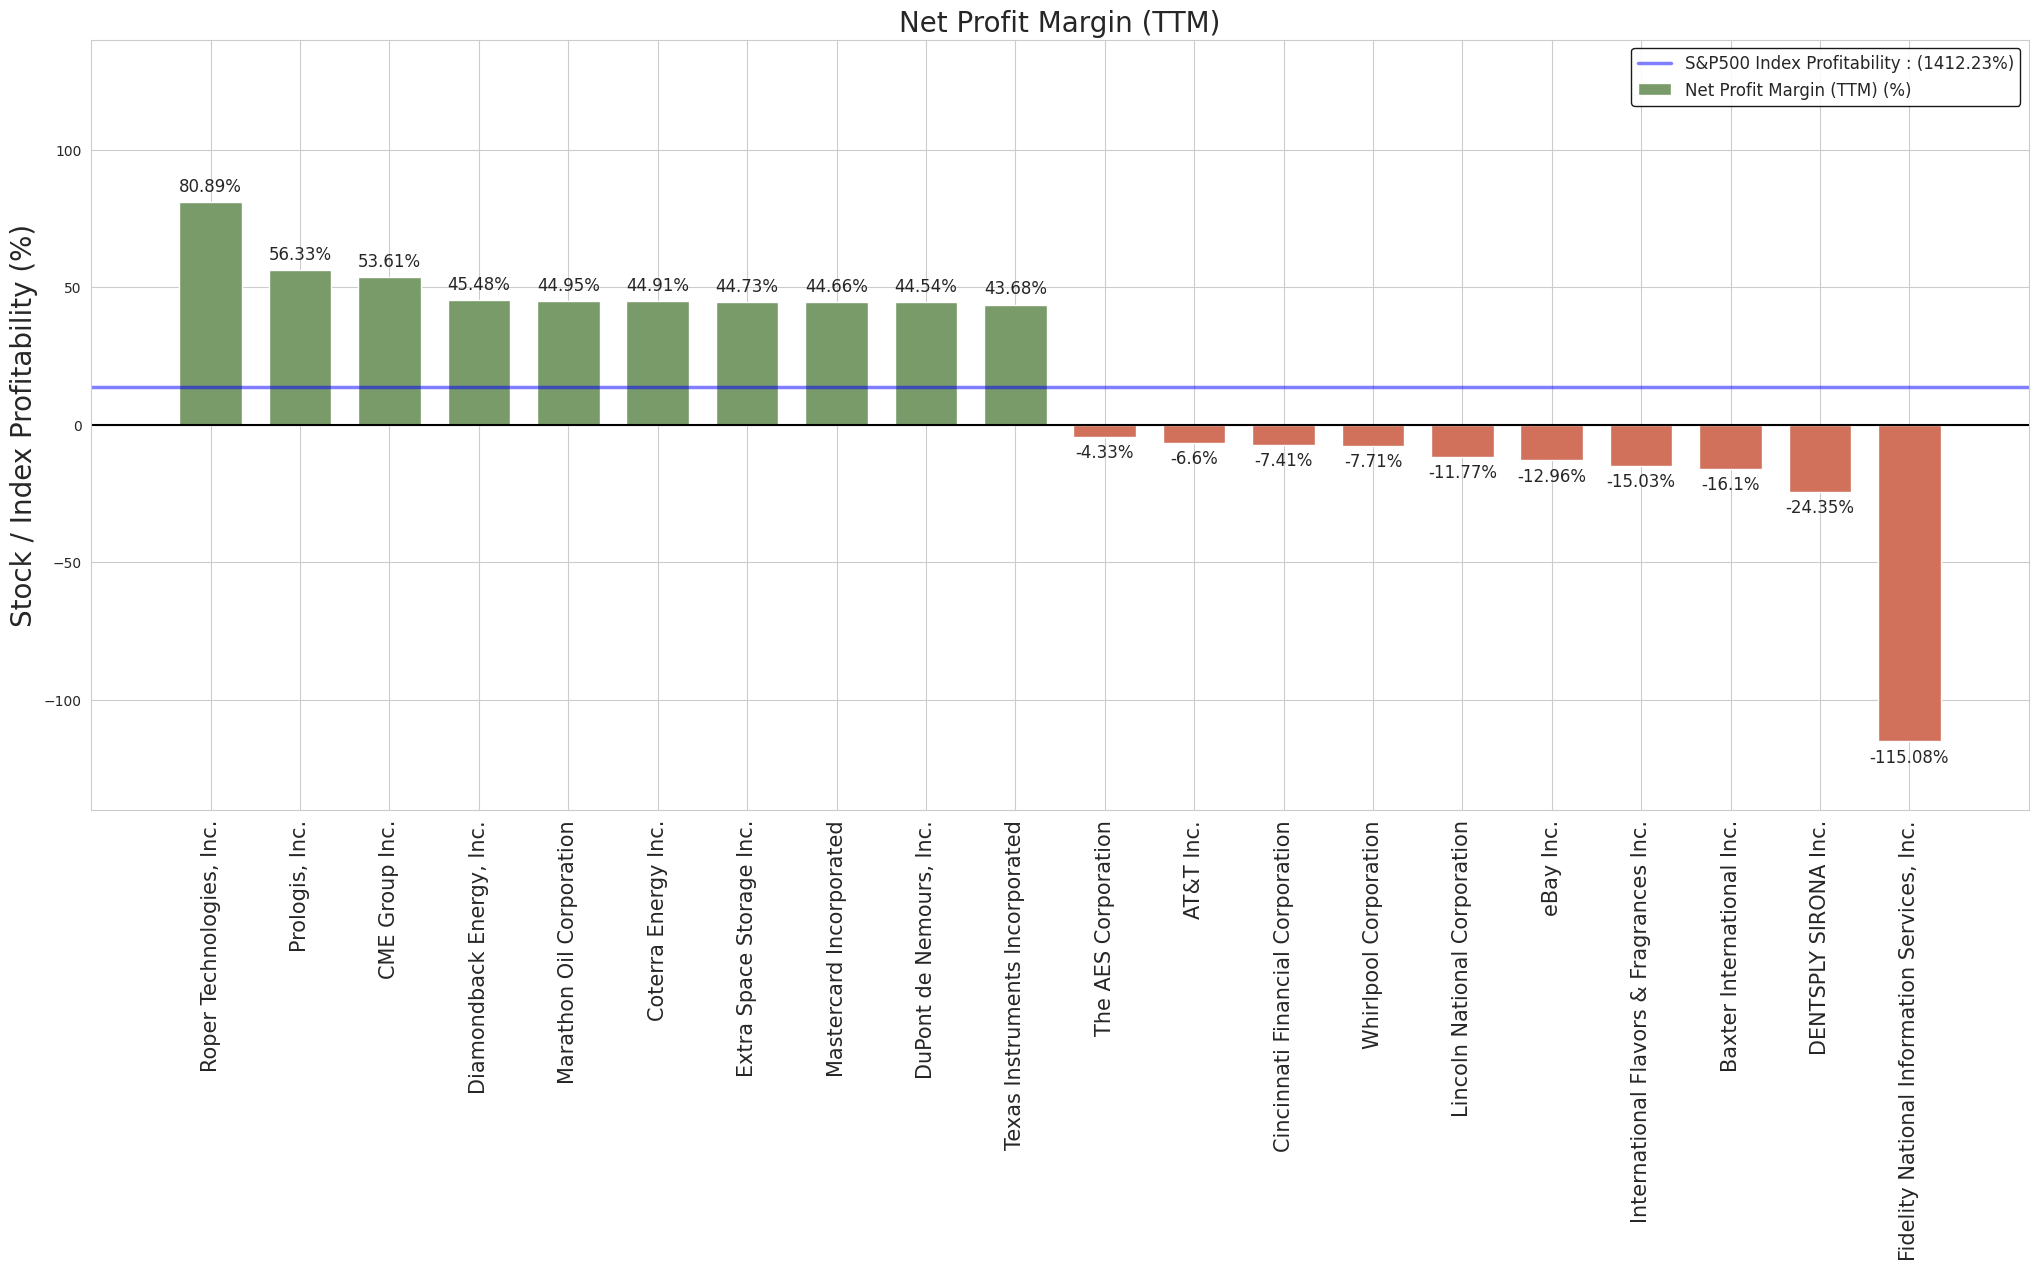

In [11]:
ploot_df = pd.read_csv("/content/drive/MyDrive/St Clair/Project/Output Data/stock_data.csv")
ploot_df["Net Profit Margin (TTM)"] = ploot_df["Net Profit Margin (TTM)"]
ploot_df = ploot_df.sort_values(by="Net Profit Margin (TTM)", ascending = False)

plot_df = pd.concat([ploot_df.head(10), ploot_df.tail(10)])
plot_df = plot_df.reset_index()

# Set the plot style
sns.set_style("whitegrid")

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < ploot_df["Net Profit Margin (TTM)"].mean() else '#799A69' for val in plot_df['Net Profit Margin (TTM)']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Net Profit Margin (TTM)'], width=0.7, label='Net Profit Margin (TTM) (%)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Net Profit Margin (TTM)']):
  if val > 0:
    ax.text(i, val + 9, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
  else:
    ax.text(i, val - 9, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)


# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=ploot_df["Net Profit Margin (TTM)"].mean(), color='blue', linestyle='-', linewidth=2.5, alpha=0.5, label='S&P500 Index Profitability : ' + "(" + str(round(plot_df["Net Profit Margin (TTM)"].mean(), 2)) + "%)")

# Set the y limits
ax.set_ylim(-140, 140)

# Set the title and axis labels
ax.set_title('Net Profit Margin (TTM)', fontsize=20)
ax.set_ylabel('Stock / Index Profitability (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

del plot_df, ploot_df

### Sector Profitability Analysis (Visualisations)

To better understand the profitability of companies within each sector of the S&P 500 Index, we will calculate and visualize varios financial ratios. Specifically, we will focus on the Net Profit Margin ratio, which measures the rate of return earned on shareholder equity. By calculating Profit Margin Ratio for each company within a sector, we can identify which companies are generating the highest returns for their shareholders. We will also calculate the average Net Profit Margin for each sector to understand which sectors are the most profitable overall.

Using data visualization tools, we will create charts and graphs to make it easy to compare the Net Profit Margin Ratio of individual companies and sectors within the index. By examining these visualizations, we can identify which sectors are generating the highest returns and which companies are the most profitable. Overall, this analysis will provide valuable insights into the profitability of the S&P 500 Index and its constituent sectors, which can be useful for investors and analysts seeking to make informed investment decisions.

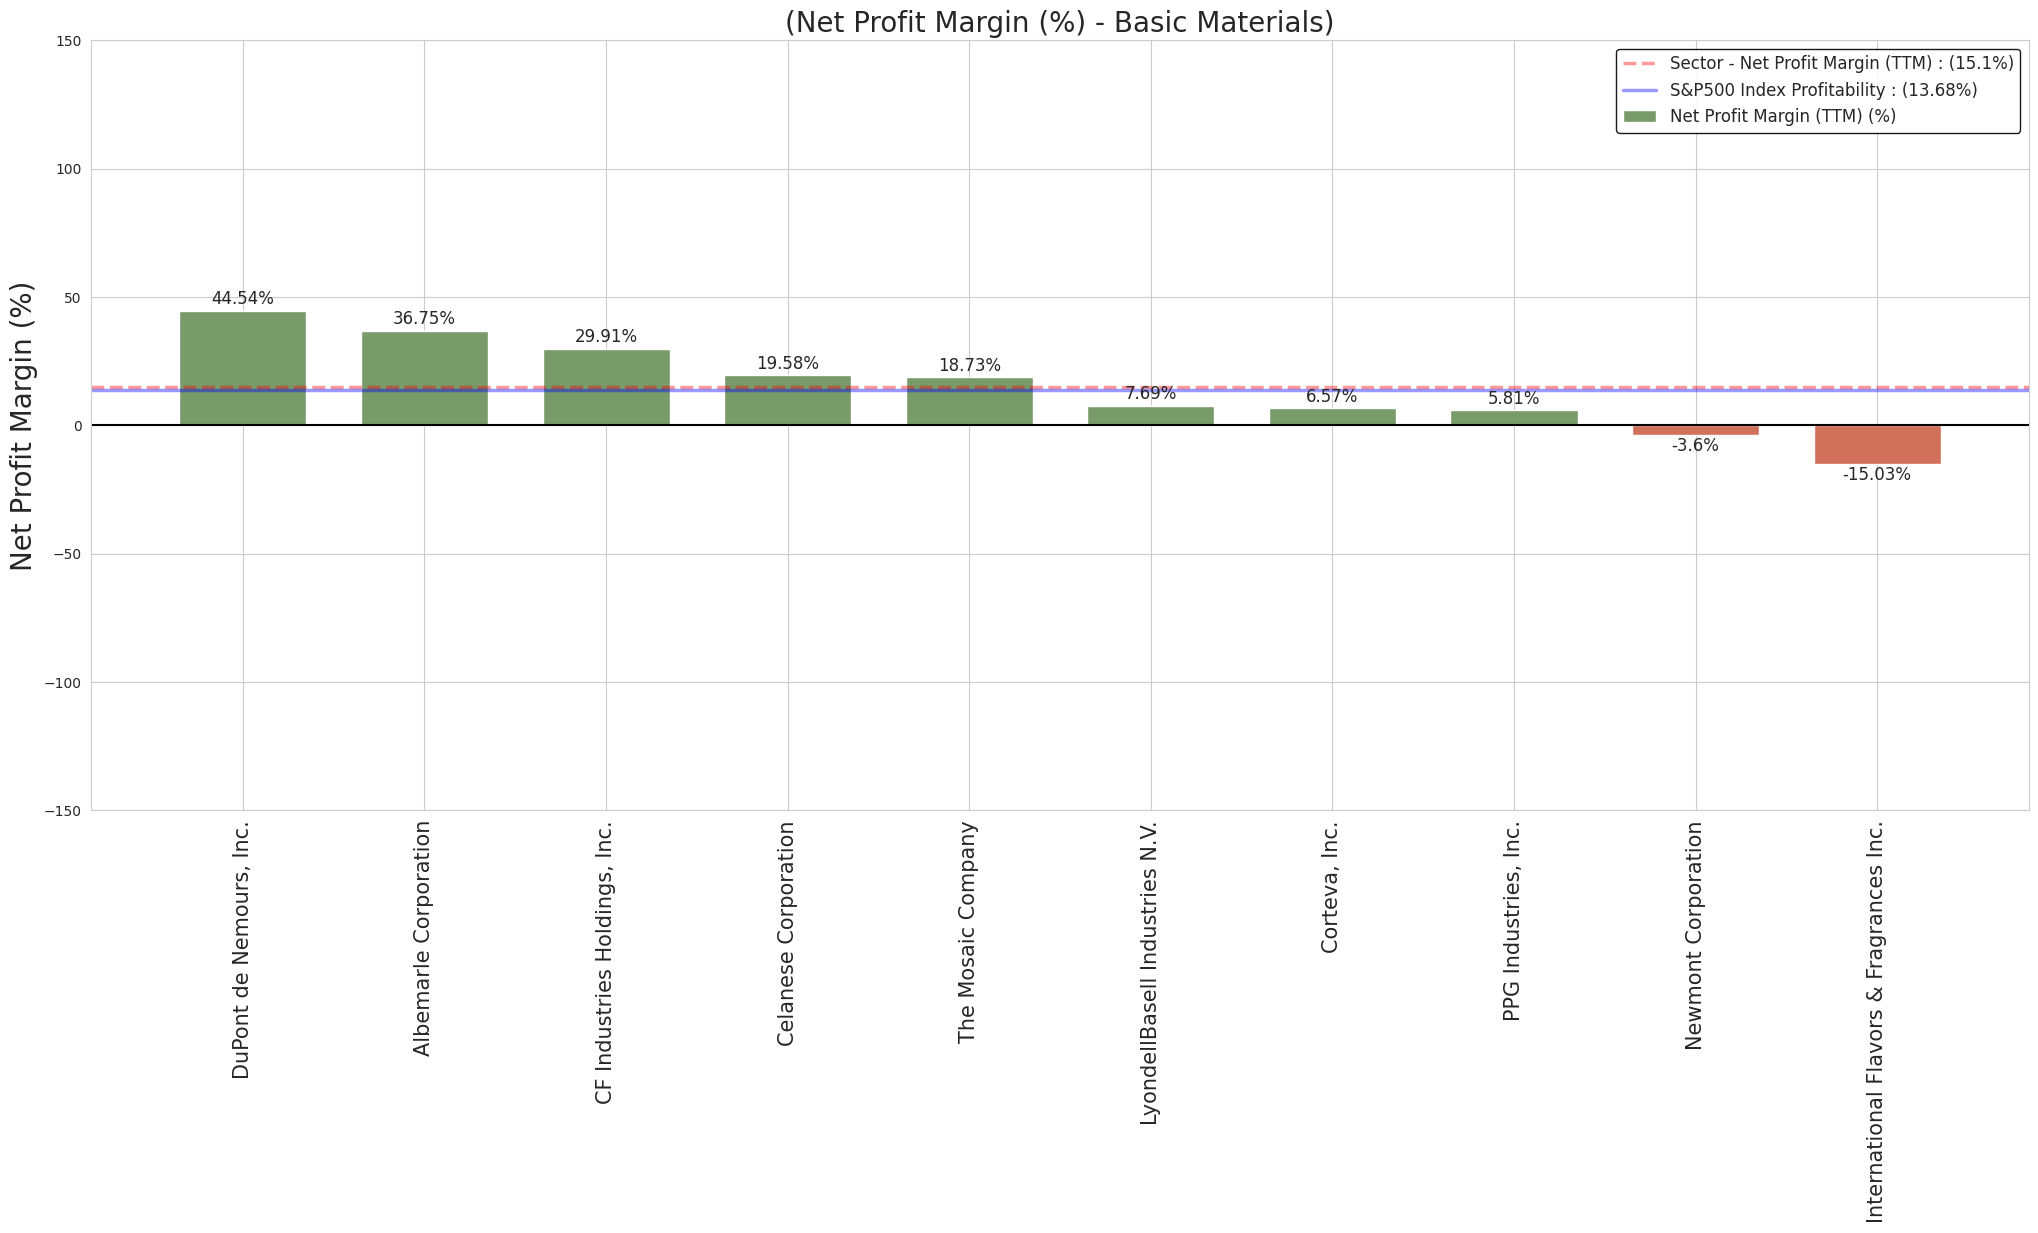

The most profitable company in the Basic Materials sector is DuPont de Nemours, Inc., with a net profit margin of 44.54%.
The least profitable company in this sector is International Flavors & Fragrances Inc., with a net profit margin of -15.03%.
The average profitability of companies in this sector this year is 15.10%.


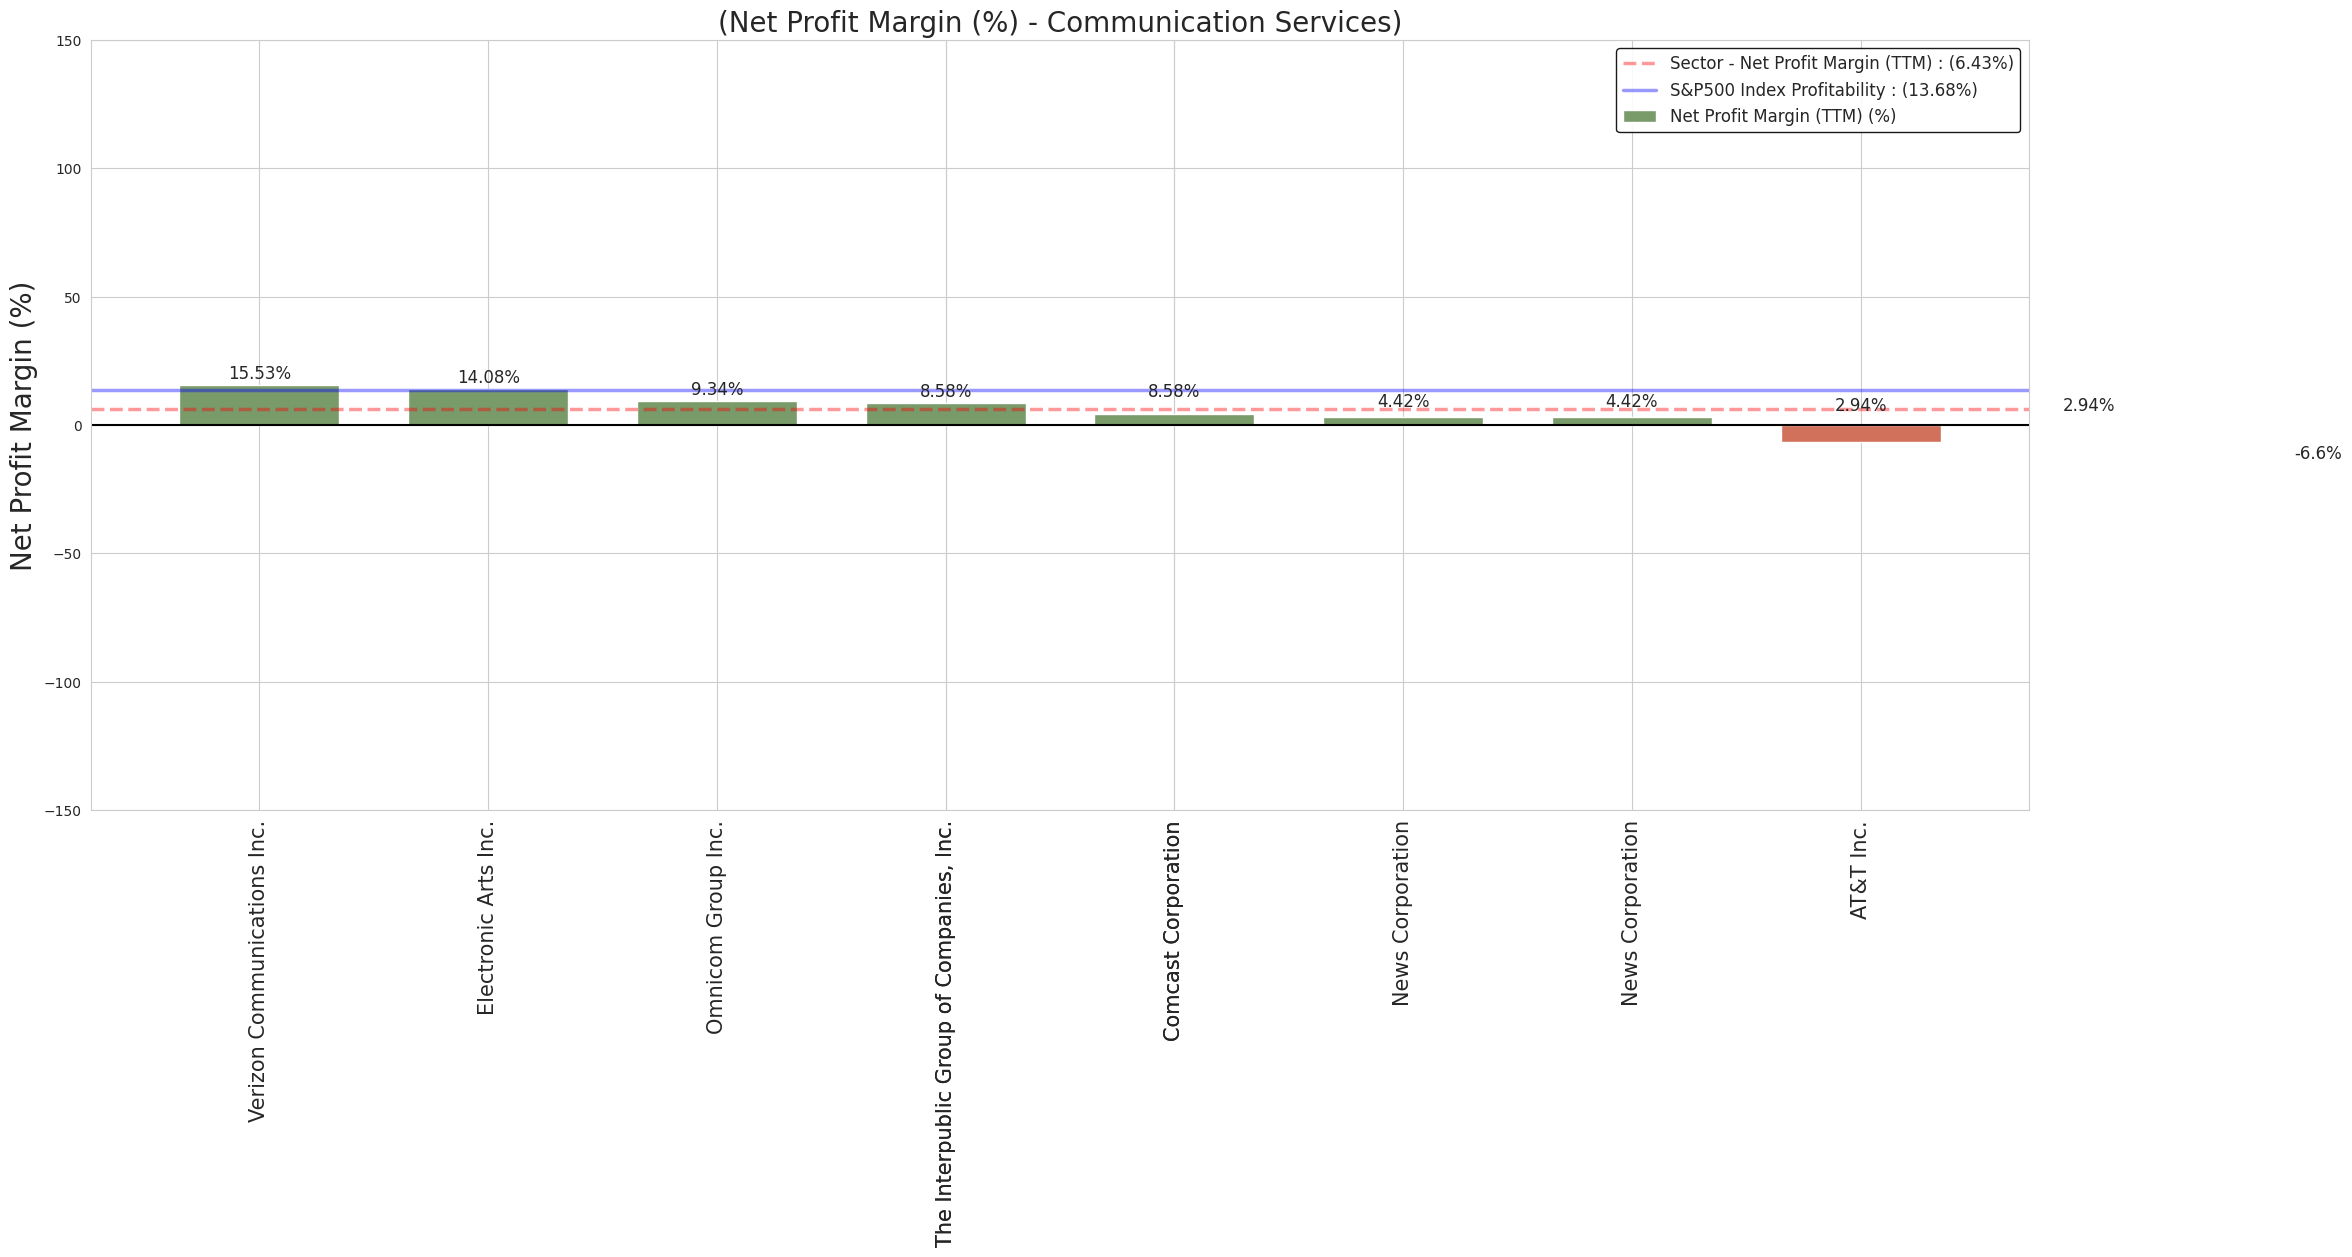

The most profitable company in the Communication Services sector is Verizon Communications Inc., with a net profit margin of 15.53%.
The least profitable company in this sector is AT&T Inc., with a net profit margin of -6.60%.
The average profitability of companies in this sector this year is 6.43%.


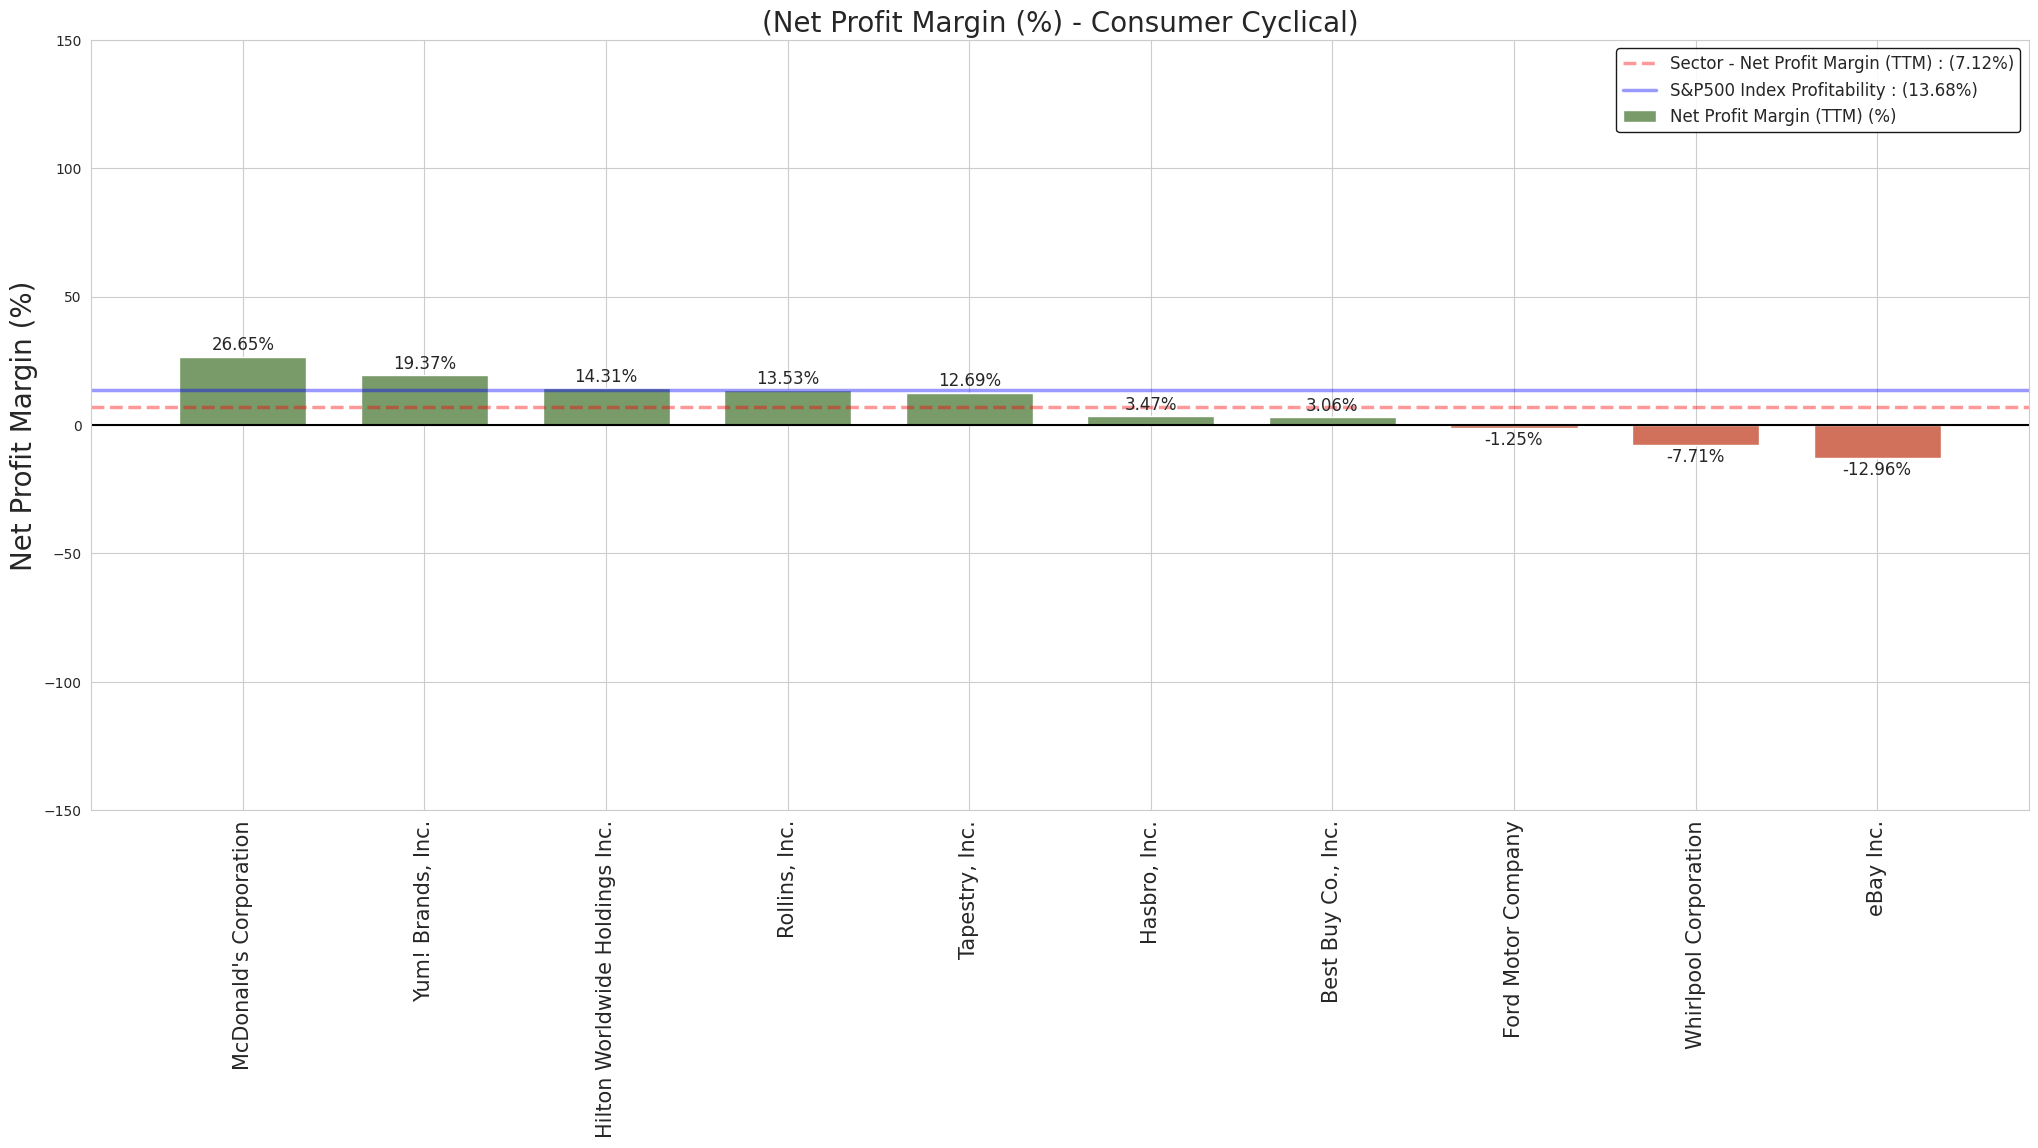

The most profitable company in the Consumer Cyclical sector is McDonald's Corporation, with a net profit margin of 26.65%.
The least profitable company in this sector is eBay Inc., with a net profit margin of -12.96%.
The average profitability of companies in this sector this year is 7.12%.


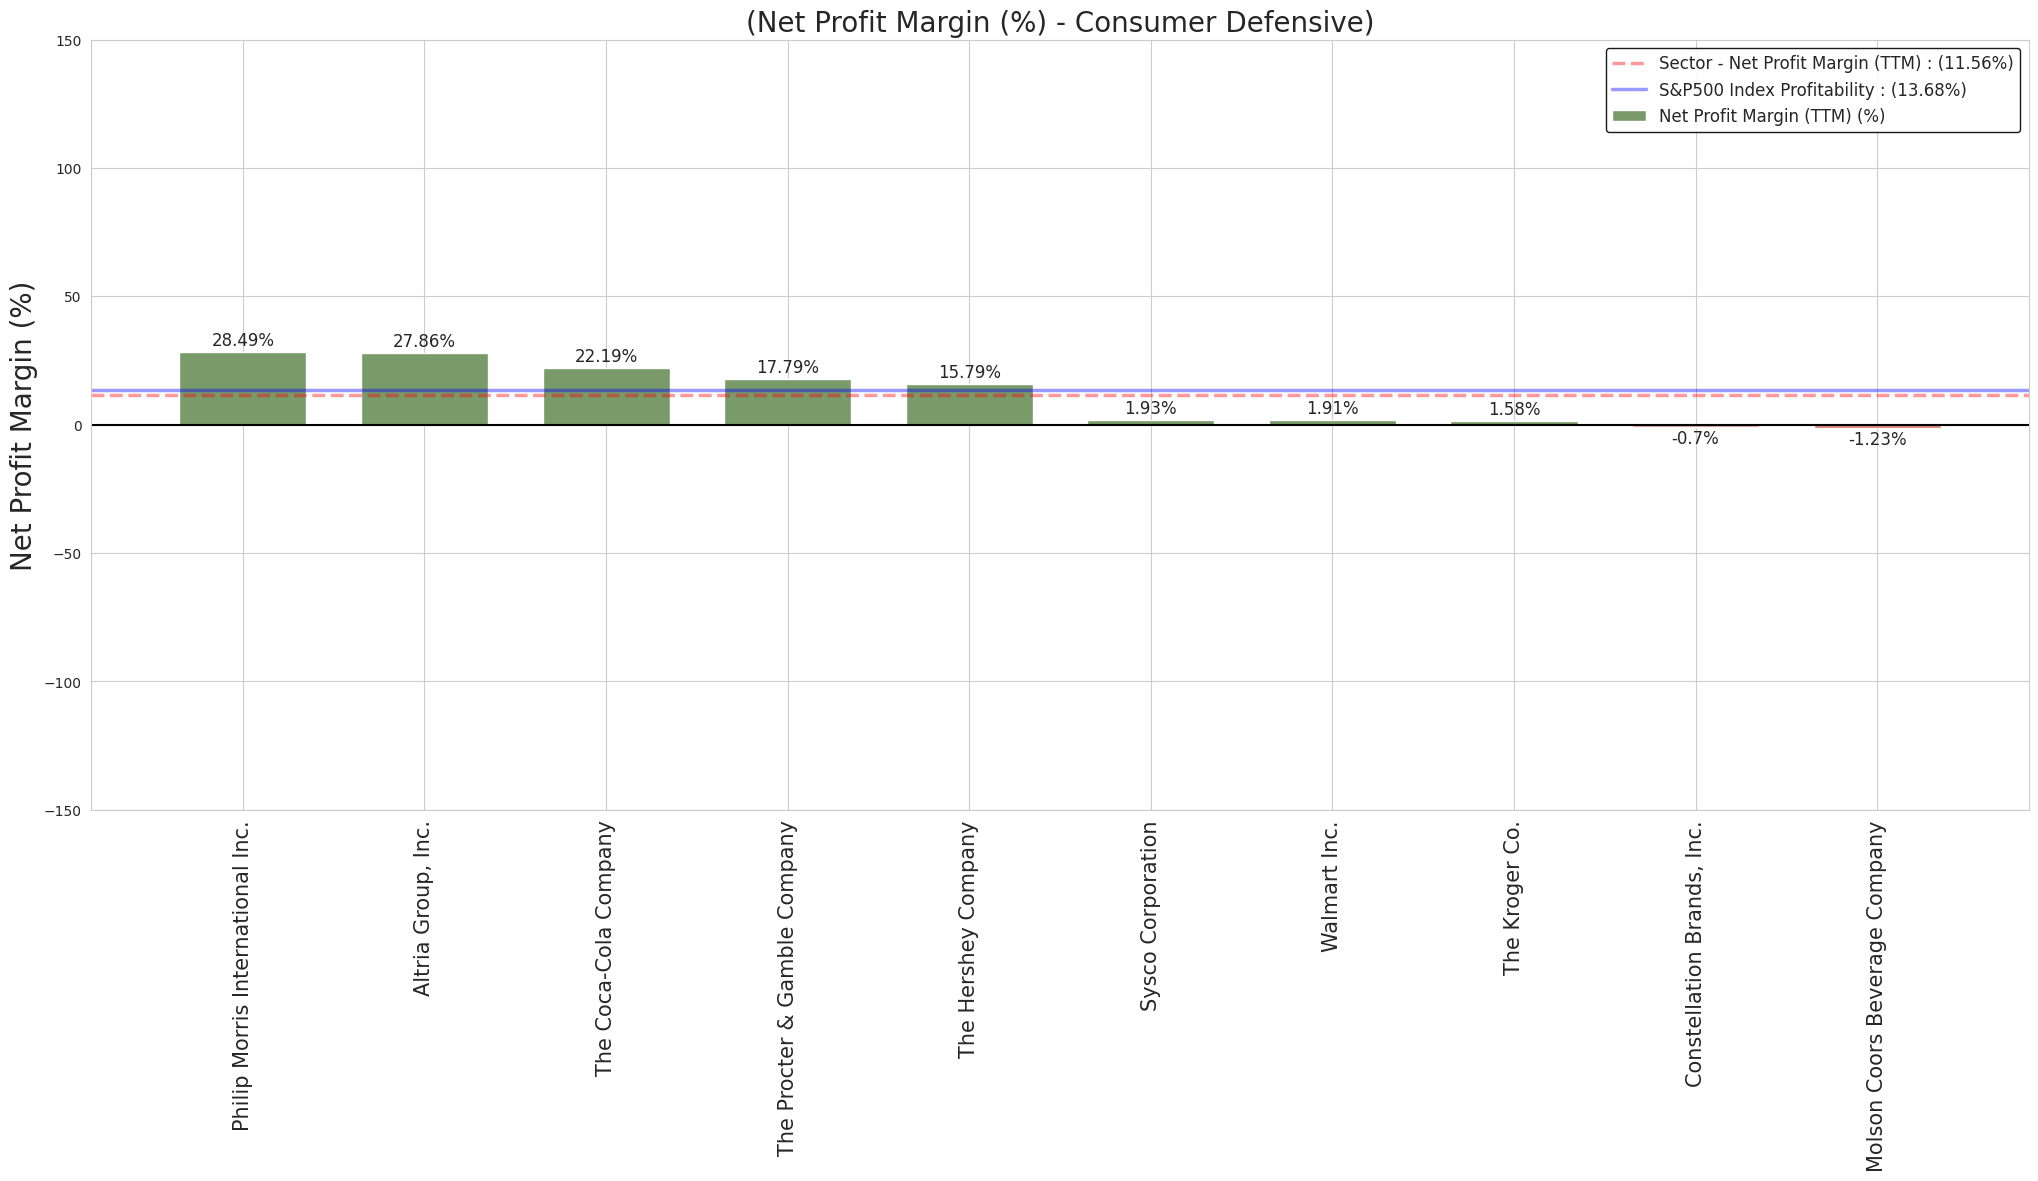

The most profitable company in the Consumer Defensive sector is Philip Morris International Inc., with a net profit margin of 28.49%.
The least profitable company in this sector is Molson Coors Beverage Company, with a net profit margin of -1.23%.
The average profitability of companies in this sector this year is 11.56%.


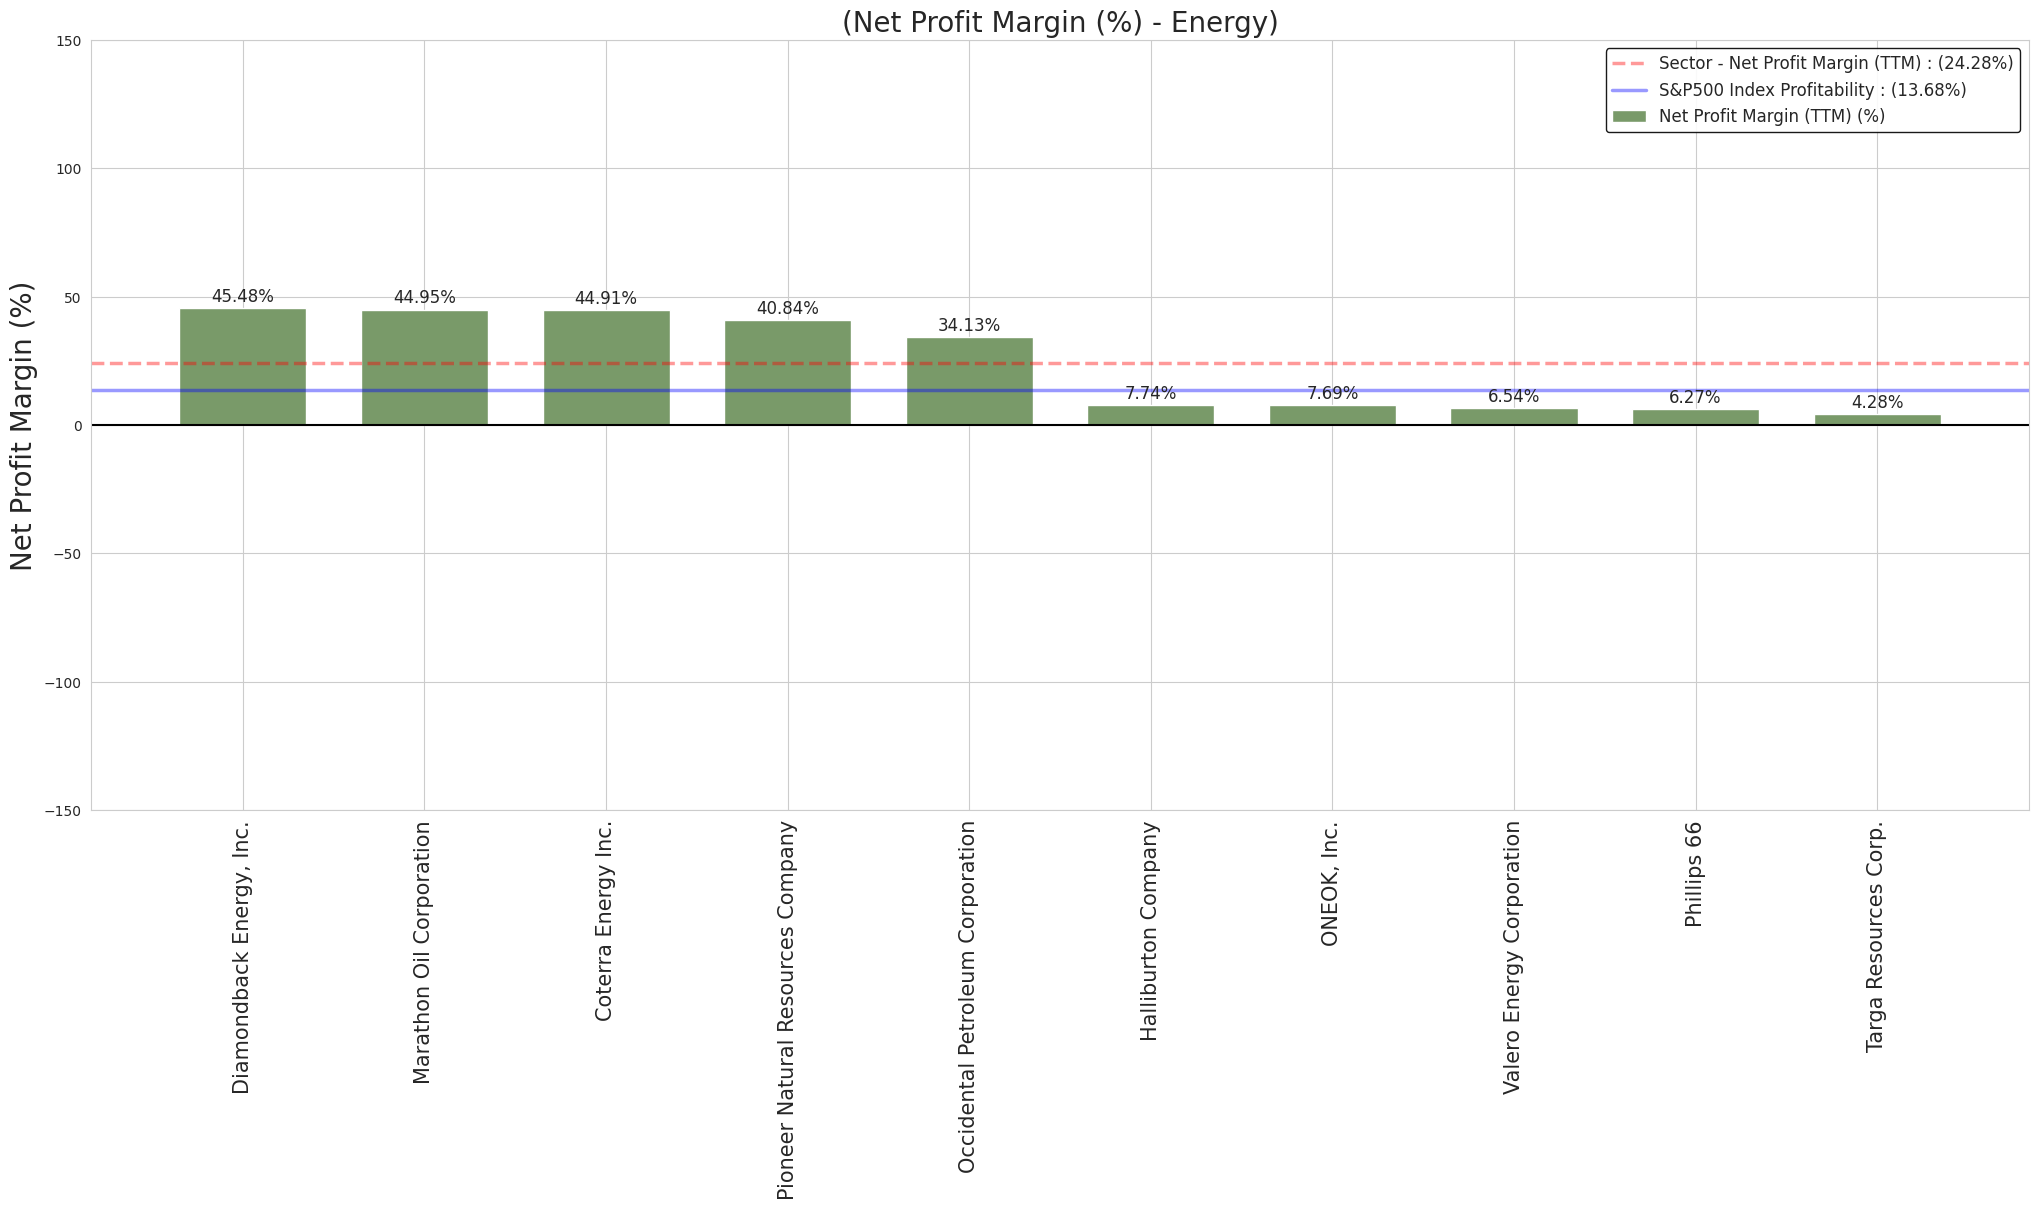

The most profitable company in the Energy sector is Diamondback Energy, Inc., with a net profit margin of 45.48%.
The least profitable company in this sector is Targa Resources Corp., with a net profit margin of 4.28%.
The average profitability of companies in this sector this year is 24.28%.


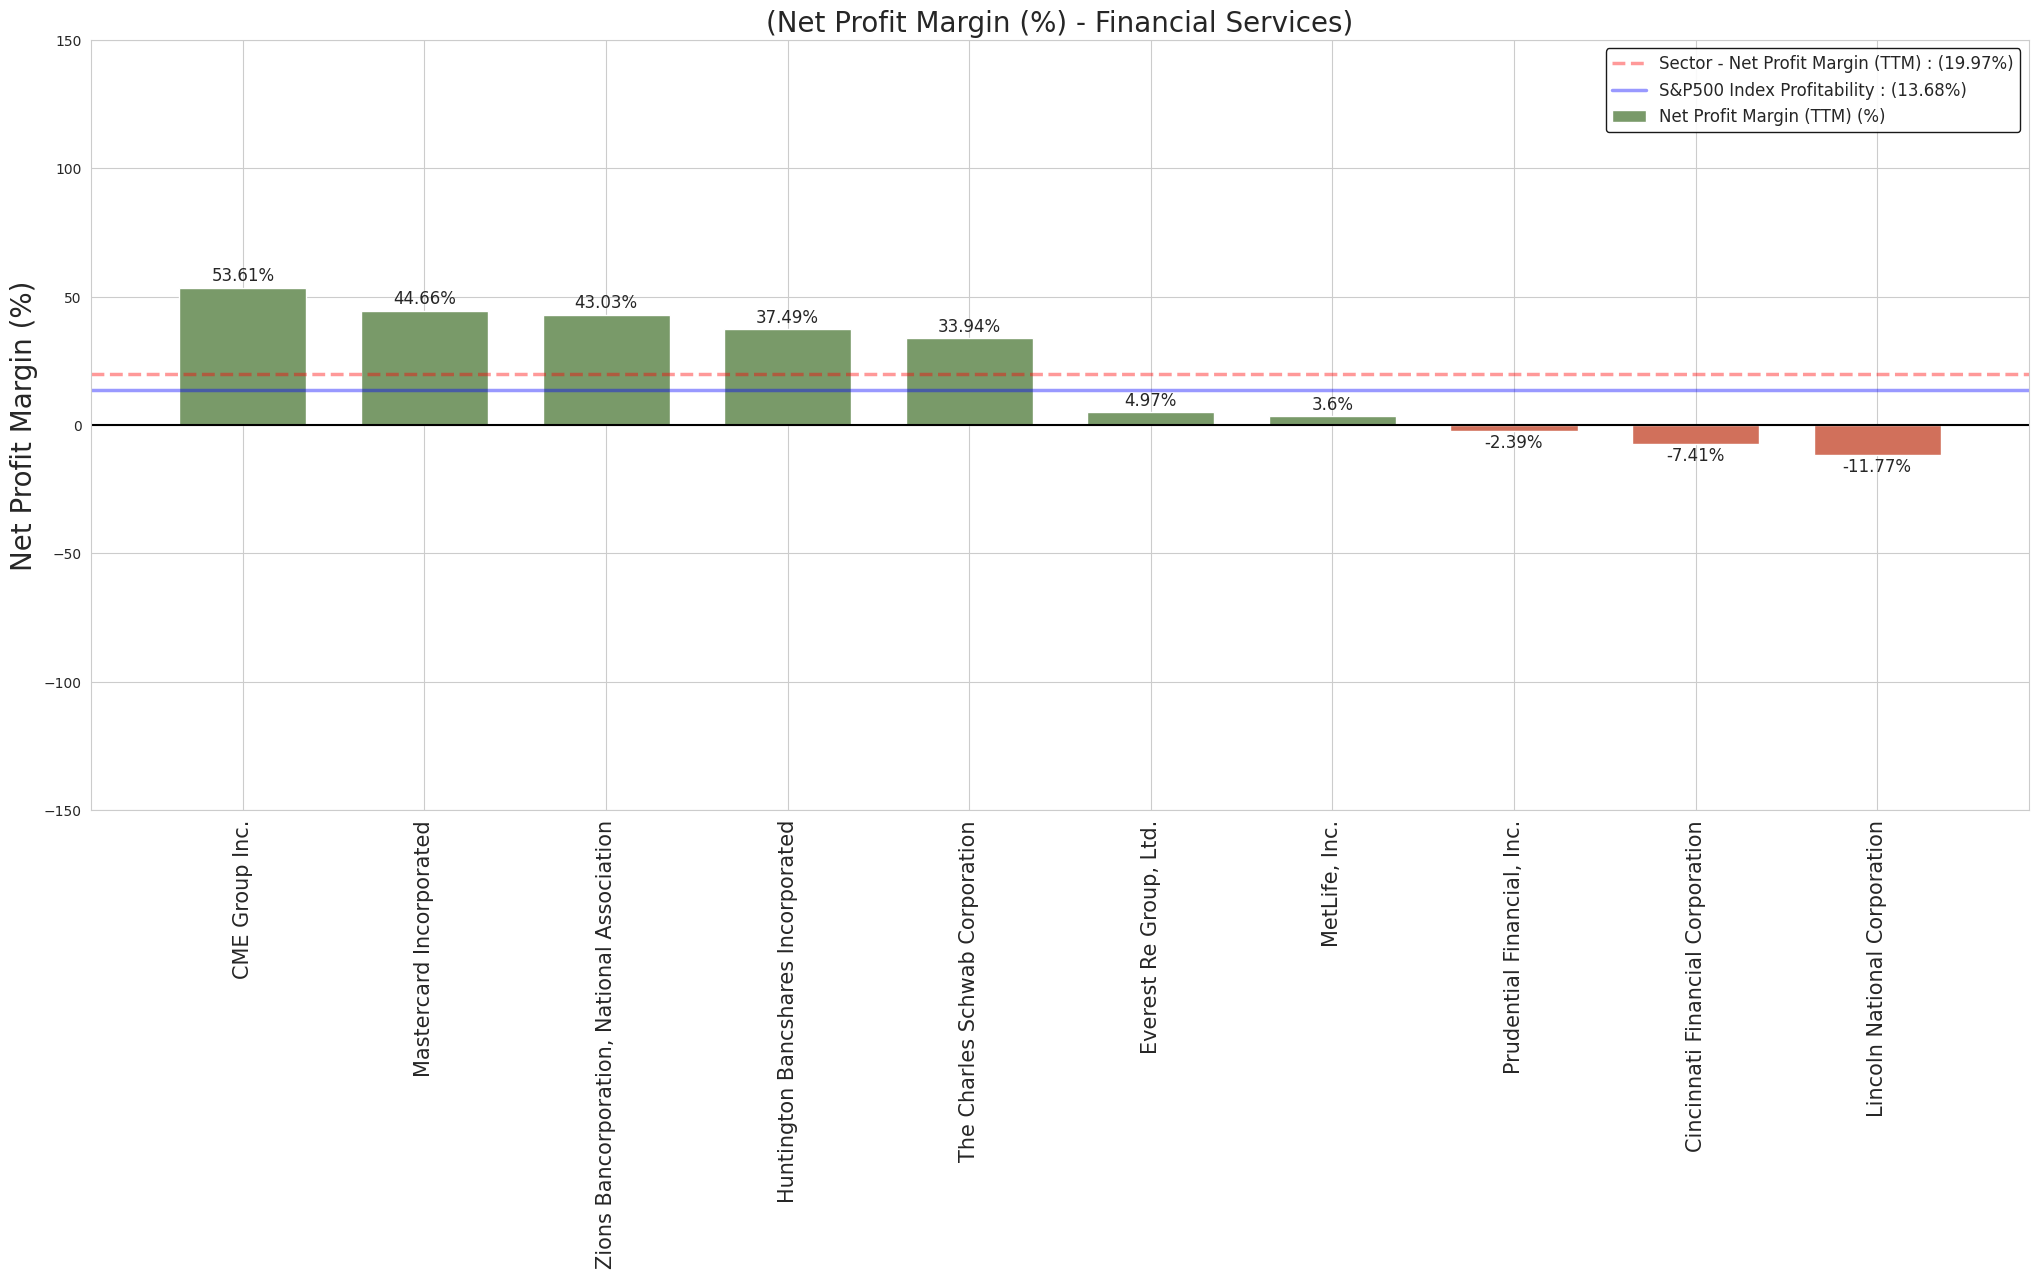

The most profitable company in the Financial Services sector is CME Group Inc., with a net profit margin of 53.61%.
The least profitable company in this sector is Lincoln National Corporation, with a net profit margin of -11.77%.
The average profitability of companies in this sector this year is 19.97%.


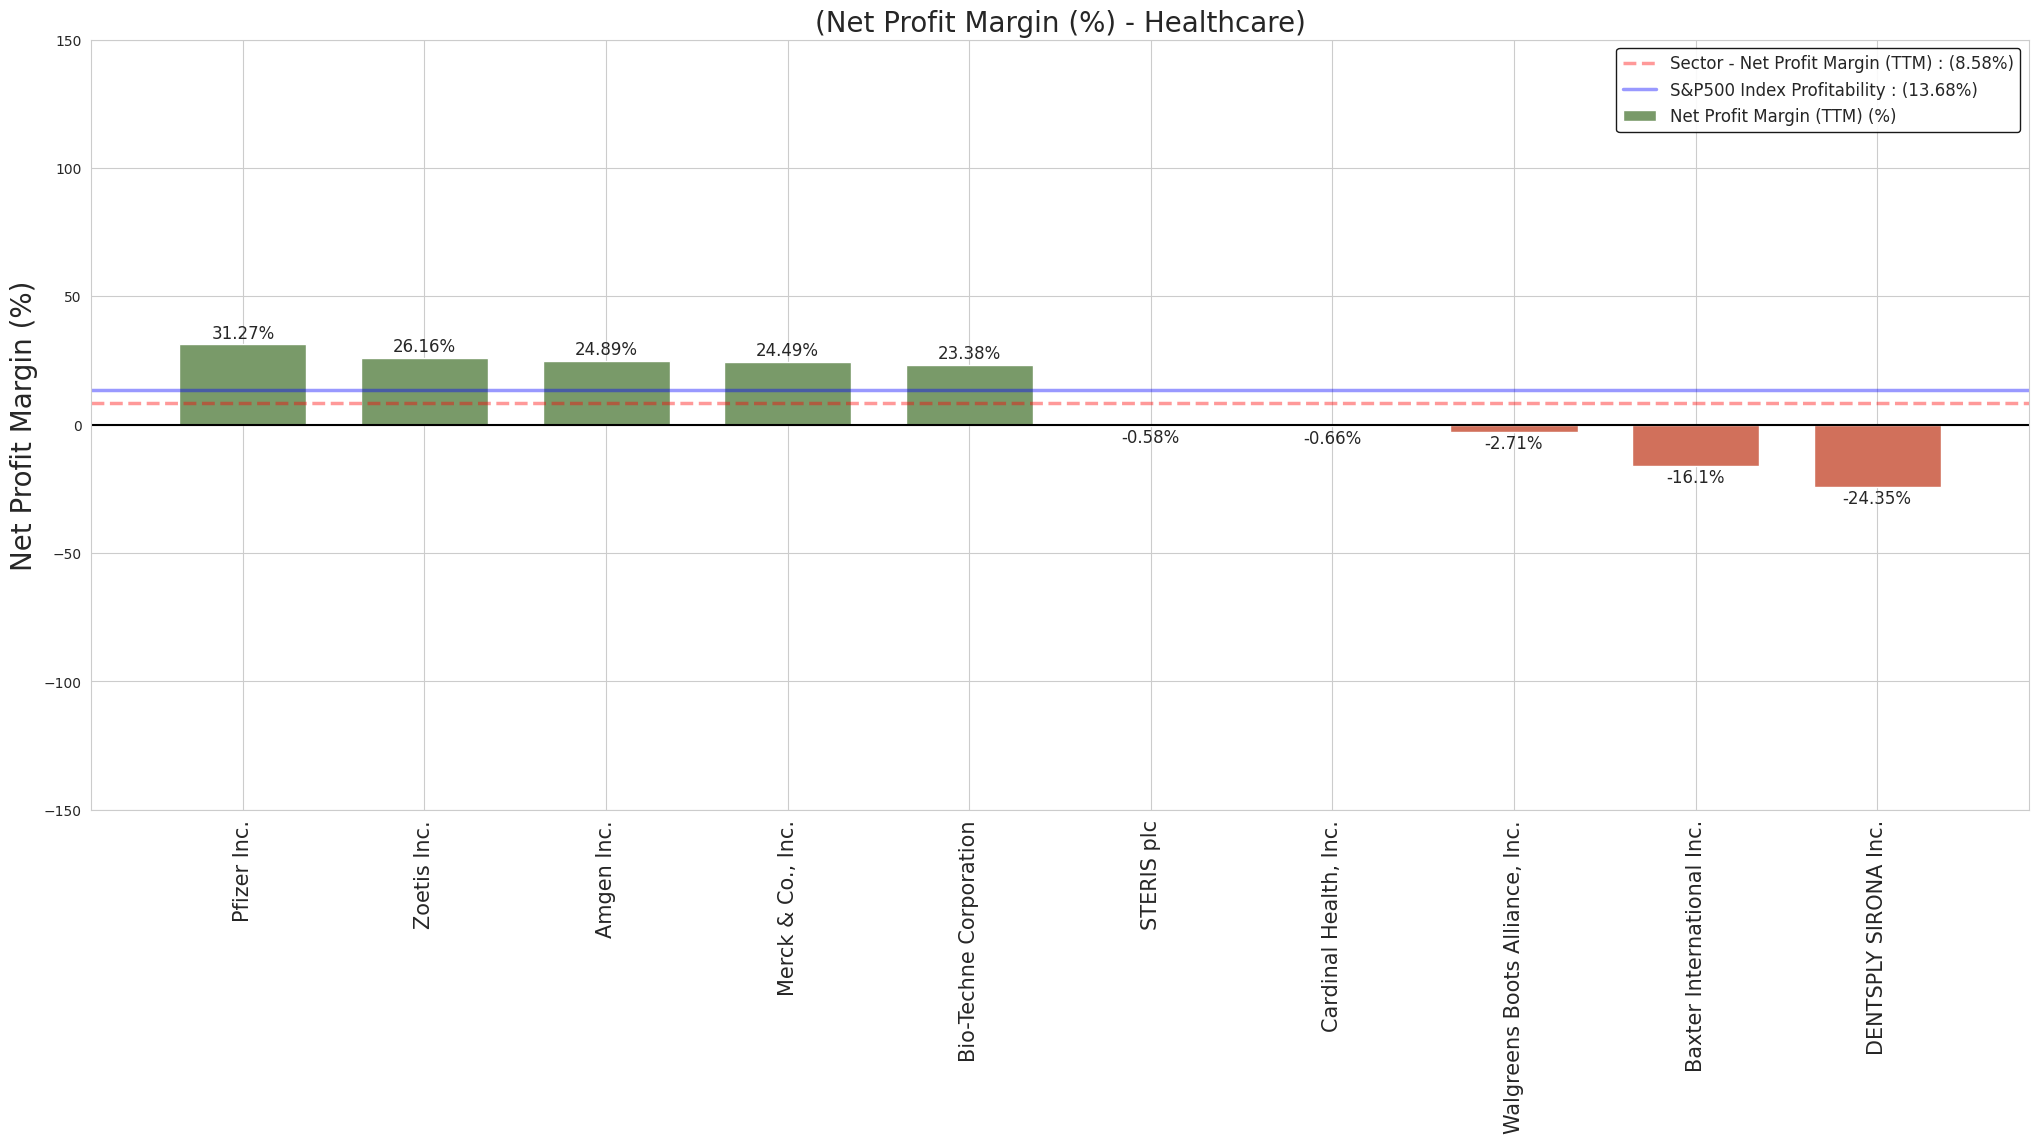

The most profitable company in the Healthcare sector is Pfizer Inc., with a net profit margin of 31.27%.
The least profitable company in this sector is DENTSPLY SIRONA Inc., with a net profit margin of -24.35%.
The average profitability of companies in this sector this year is 8.58%.


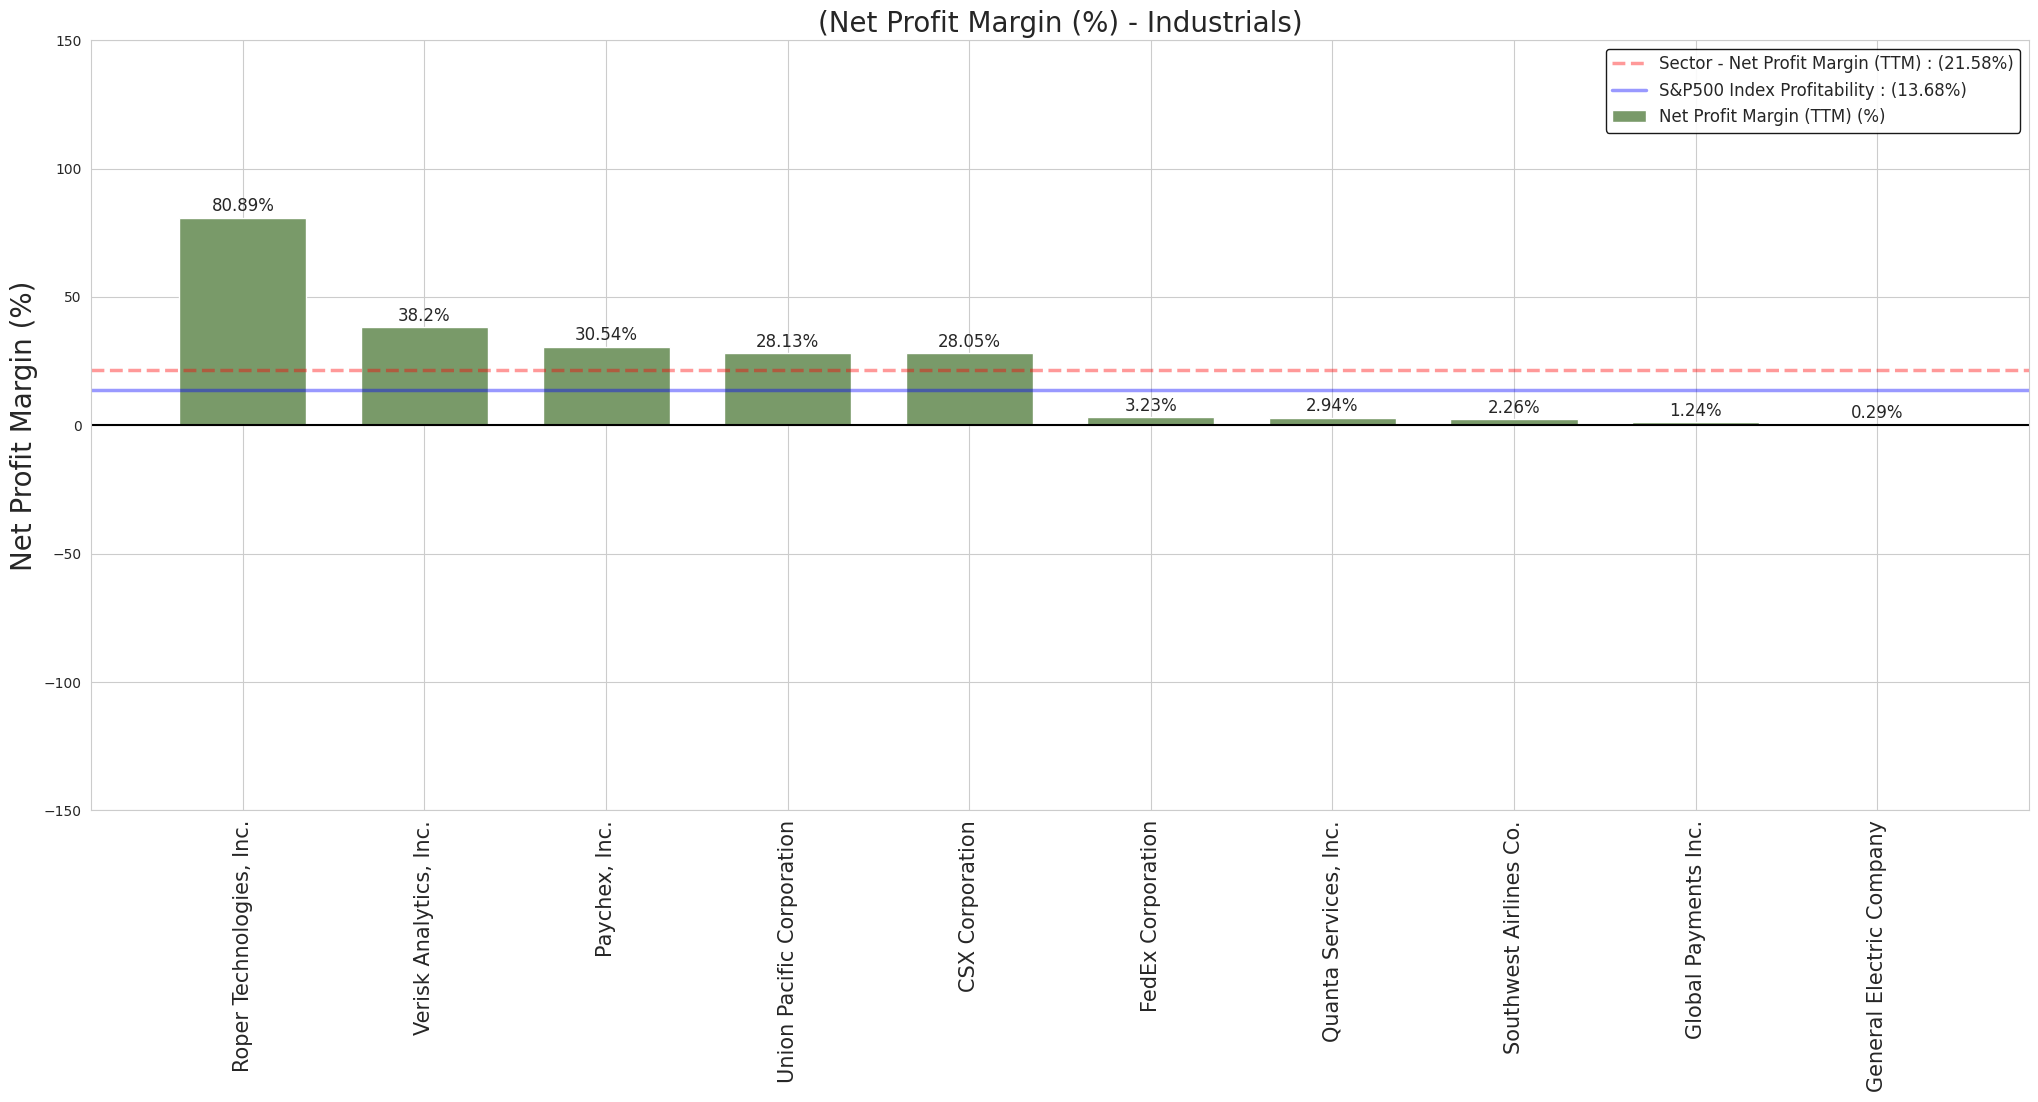

The most profitable company in the Industrials sector is Roper Technologies, Inc., with a net profit margin of 80.89%.
The least profitable company in this sector is General Electric Company, with a net profit margin of 0.29%.
The average profitability of companies in this sector this year is 21.58%.


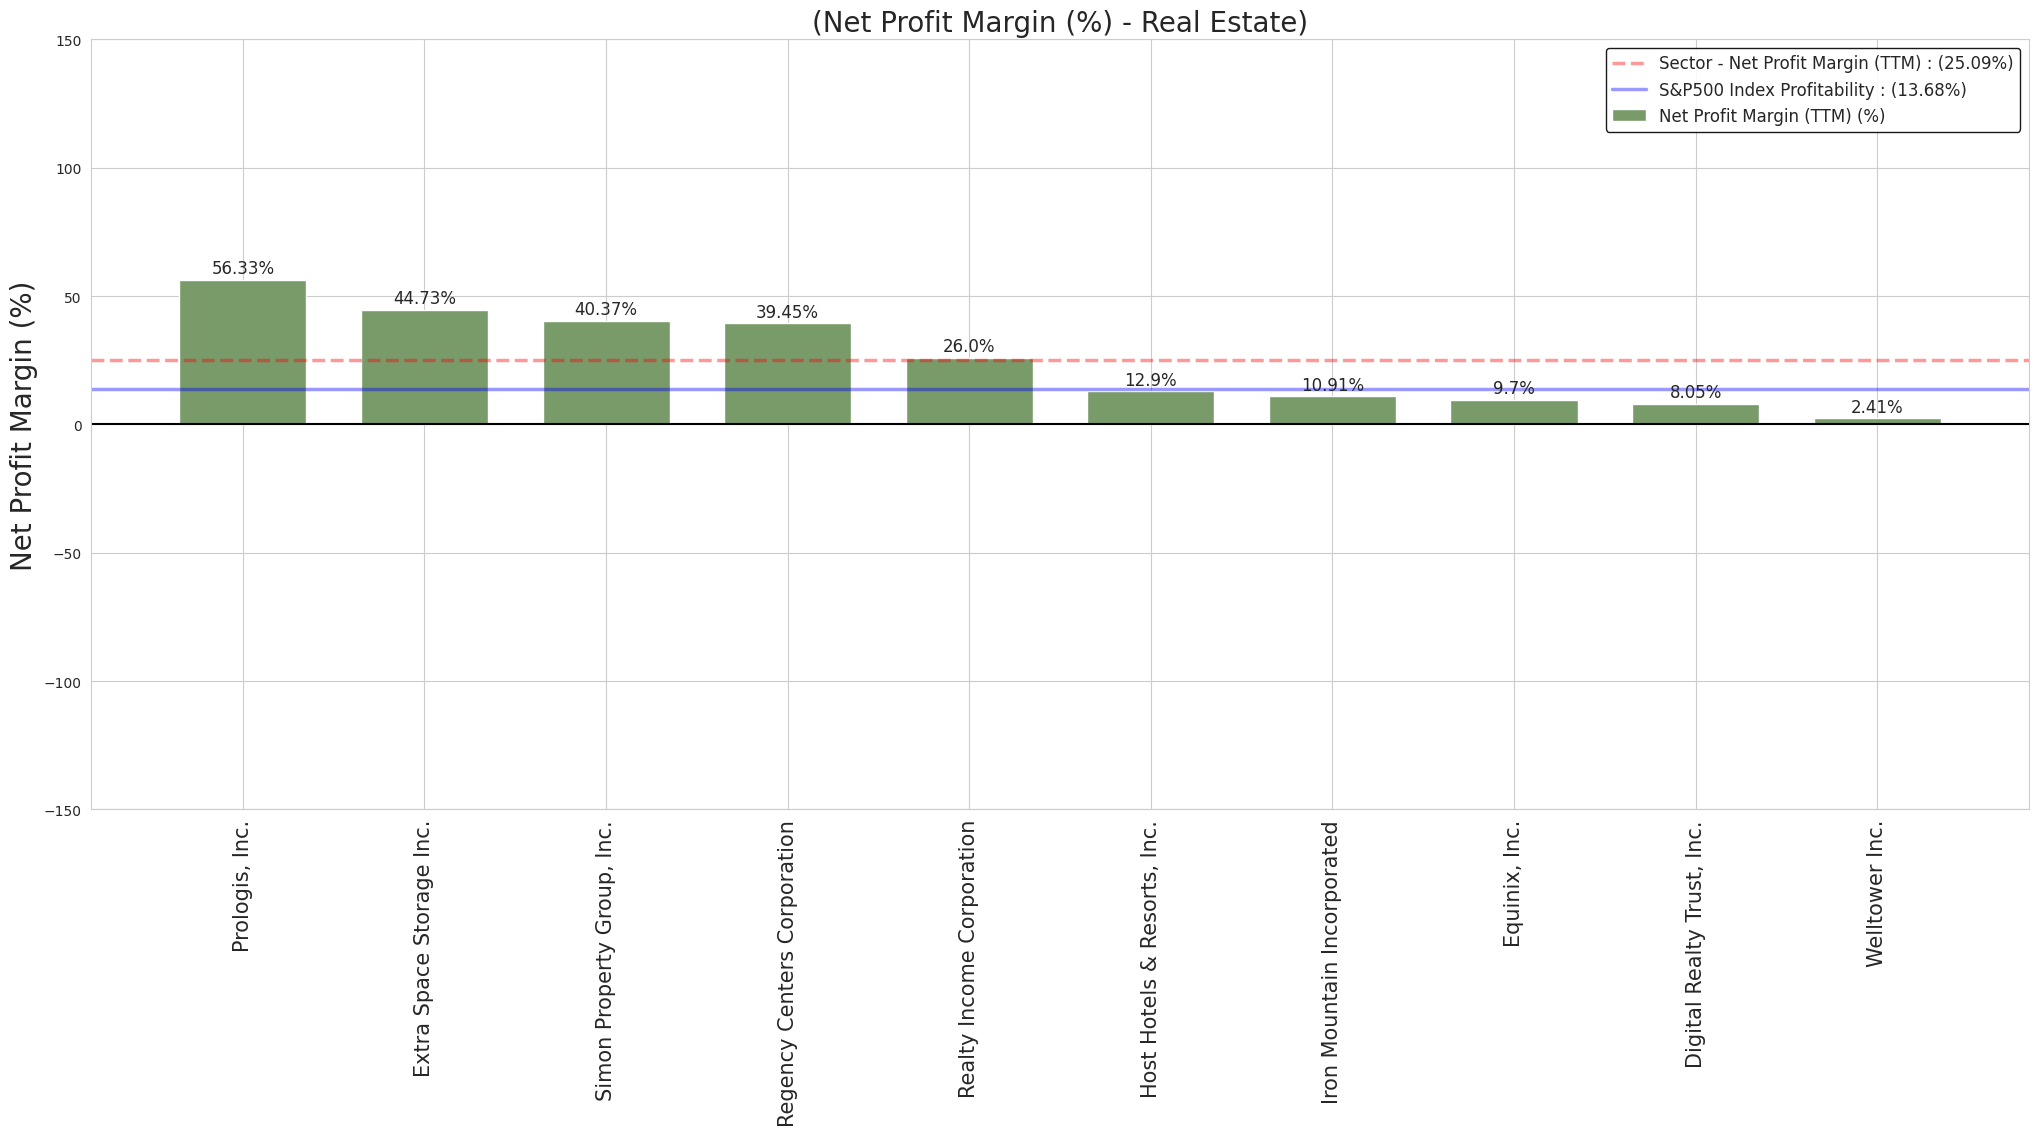

The most profitable company in the Real Estate sector is Prologis, Inc., with a net profit margin of 56.33%.
The least profitable company in this sector is Welltower Inc., with a net profit margin of 2.41%.
The average profitability of companies in this sector this year is 25.09%.


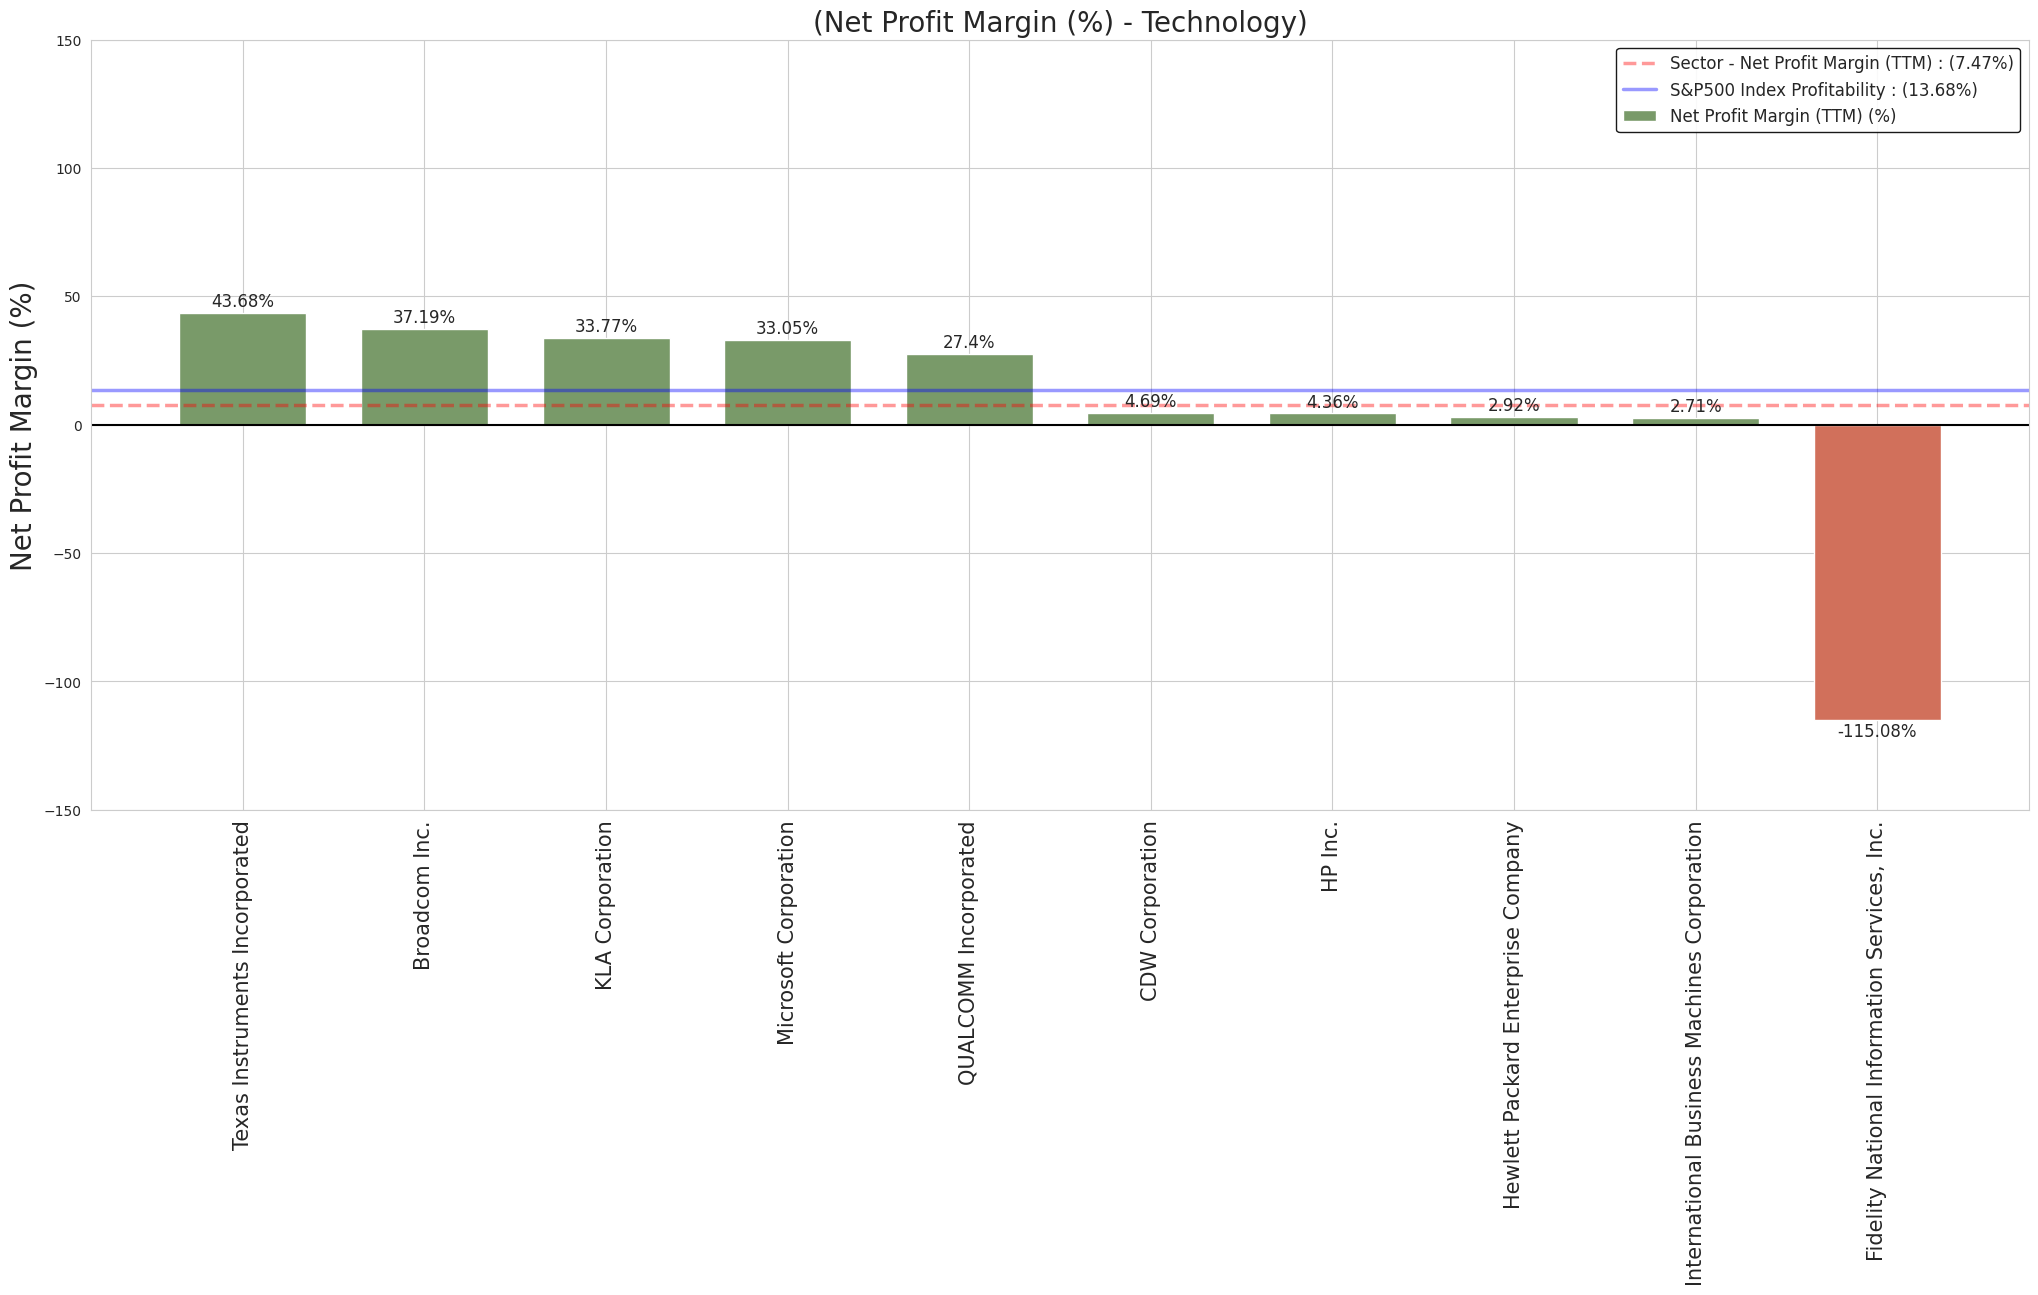

The most profitable company in the Technology sector is Texas Instruments Incorporated, with a net profit margin of 43.68%.
The least profitable company in this sector is Fidelity National Information Services, Inc., with a net profit margin of -115.08%.
The average profitability of companies in this sector this year is 7.47%.


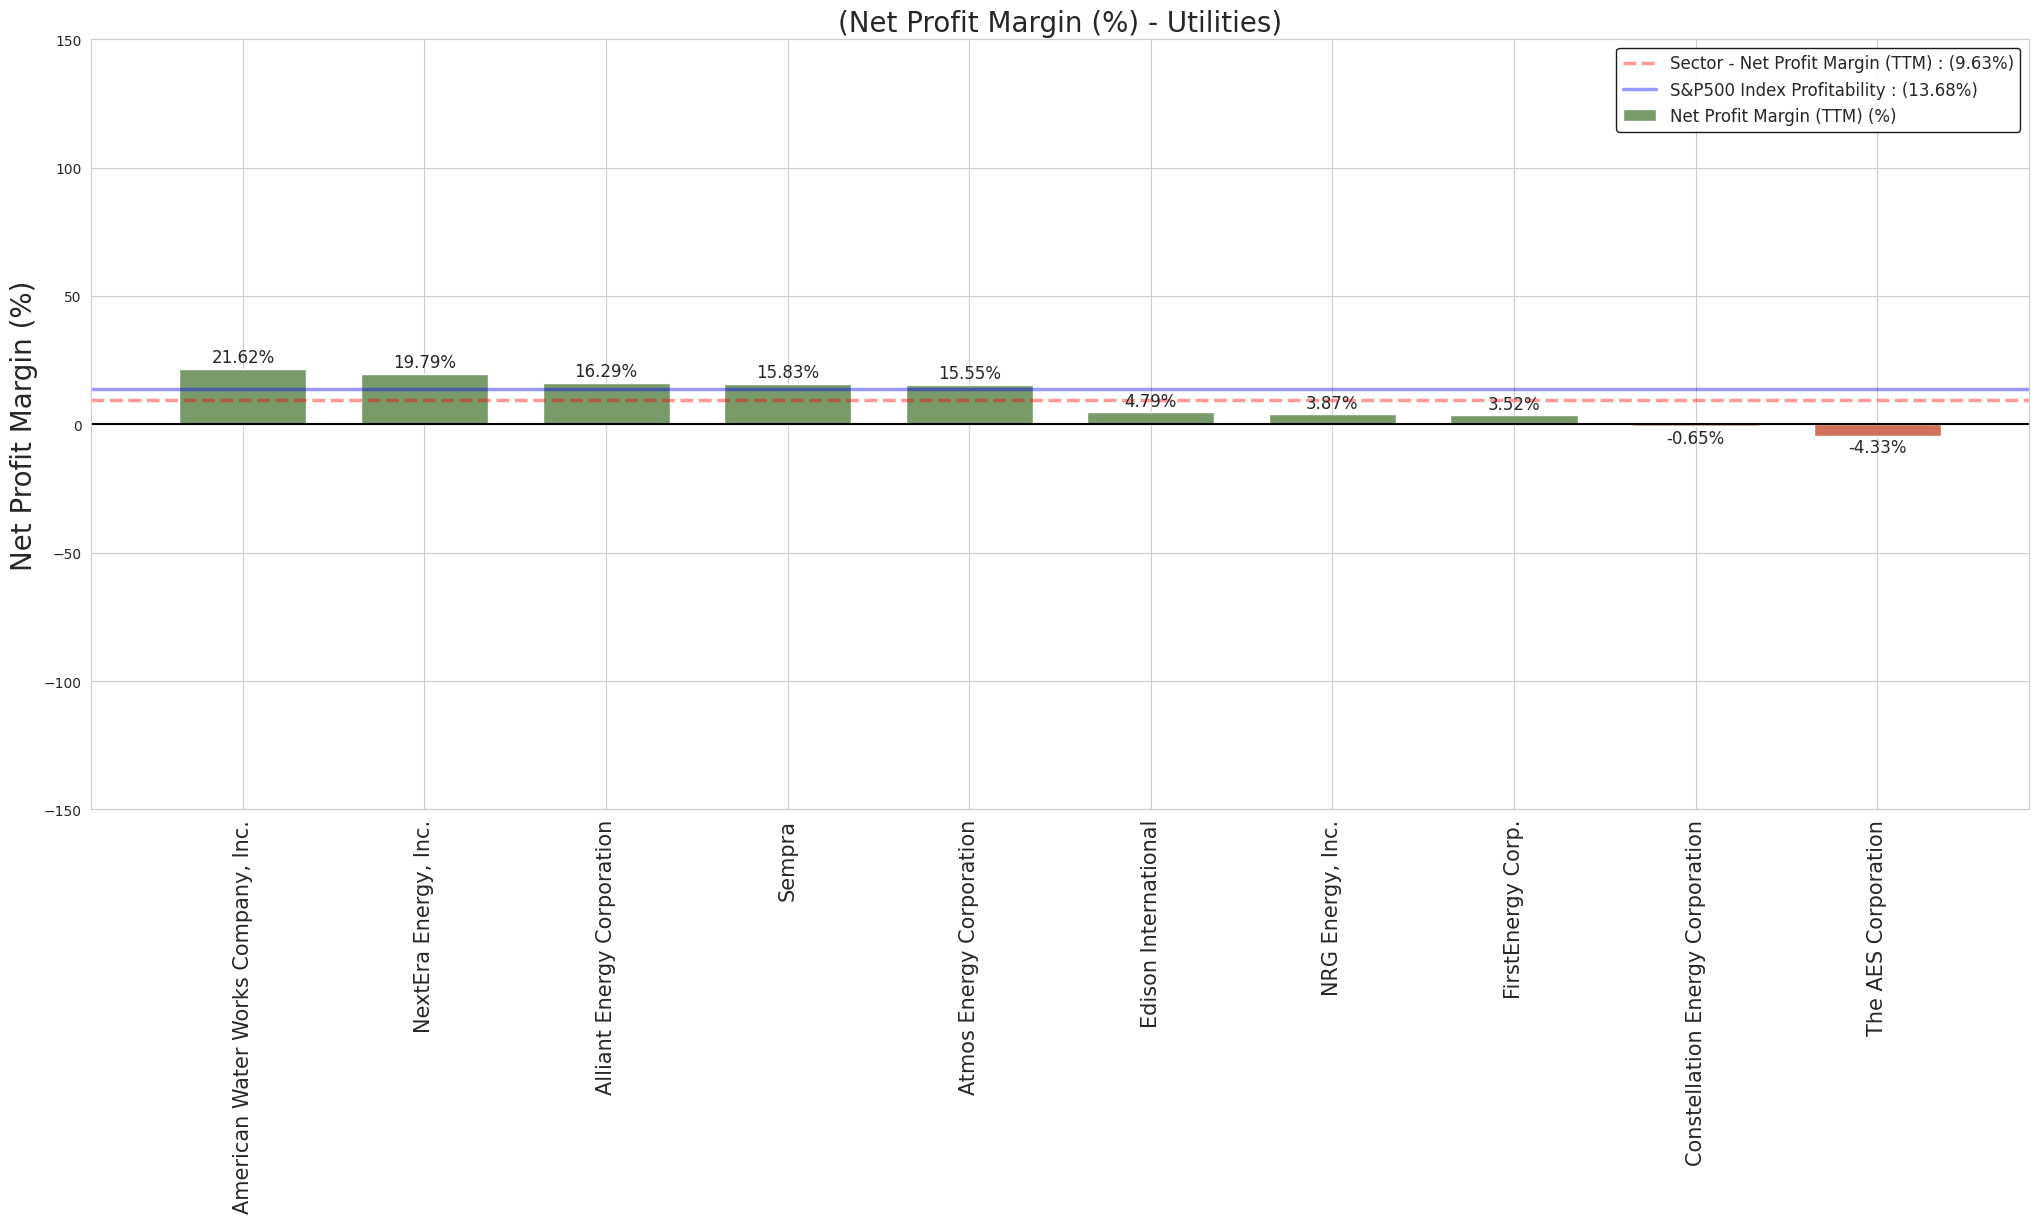

The most profitable company in the Utilities sector is American Water Works Company, Inc., with a net profit margin of 21.62%.
The least profitable company in this sector is The AES Corporation, with a net profit margin of -4.33%.
The average profitability of companies in this sector this year is 9.63%.


In [12]:
sector_list = sorted(df["Sector"].unique().tolist())
NPM_avg = df['Net Profit Margin (TTM)'].mean() * 100

# Creating a function to plot the graphs for all the sectors in the S&P500 Index
def sector_profitability_visual(i):
  plot_df = pd.read_csv(out_path + "Sector Wise Analysis/" + i + ".csv")

  # Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
  plot_df = plot_df.sort_values(by="Net Profit Margin (TTM)", ascending=False)
  plot_df = pd.concat([plot_df.head(5), plot_df.tail(5)])
  plot_df = plot_df.reset_index()
  plot_df = plot_df.set_index("Ticker")
  plot_df['Net Profit Margin (TTM)'] = plot_df['Net Profit Margin (TTM)'] * 100
  plot_df = plot_df.sort_values(by="Net Profit Margin (TTM)", ascending=False)


  # Set the plot style
  sns.set_style('whitegrid')

  # Setting the colours for the bars in the plot
  colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Net Profit Margin (TTM)']]

  # Create the plot
  fig, ax = plt.subplots(figsize=(25, 10))
  ax.bar(plot_df.index, plot_df['Net Profit Margin (TTM)'], width=0.7, label='Net Profit Margin (TTM) (%)', color = colours_for_bars)

  # Add values above each bar
  for i, val in enumerate(plot_df['Net Profit Margin (TTM)']):
    if val > 0:
      ax.text(i, val + 8, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
    else:
      ax.text(i, val - 8, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)


  # Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
  ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
  ax.axhline(y=plot_df["Net Profit Margin (TTM)"].mean(), color='red', linestyle='--', linewidth=2.5, alpha = 0.4, label='Sector - Net Profit Margin (TTM) : ' + "(" + str(round(plot_df["Net Profit Margin (TTM)"].mean(),2)) + "%)")
  ax.axhline(y=NPM_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.4, label='S&P500 Index Profitability : ' + "(" + str(round(NPM_avg, 2)) + "%)")

  # Set the y limits
  ax.set_ylim(-150, 150)

  # Set the title and axis labels
  ax.set_title('(Net Profit Margin (%) - ' + plot_df["Sector"][0] + ')', fontsize=20)
  ax.set_ylabel('Net Profit Margin (%)', fontsize=20)

  # Set the x-axis tick labels
  ax.set_xticks(plot_df.index)
  ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

  # Add a legend
  ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

  # Show the plot
  plt.show()

  # Print the summary of the plot mentioning the highest and the lowest performers in the sector.
  print(f"The most profitable company in the {plot_df['Sector'][0]} sector is {plot_df['Company Name'].iloc[0]}, with a net profit margin of {plot_df['Net Profit Margin (TTM)'].iloc[0]:.2f}%.")
  print(f"The least profitable company in this sector is {plot_df['Company Name'].iloc[-1]}, with a net profit margin of {plot_df['Net Profit Margin (TTM)'].iloc[-1]:.2f}%.")
  print(f"The average profitability of companies in this sector this year is {plot_df['Net Profit Margin (TTM)'].mean():.2f}%.")

  # Deleting the above created DataFrame "plot_df" to avoid redundancy
  del plot_df  

# We are deploying the above created function to plot all the required graphs, by looping through the list of sectors in the S&P500 Index
for i in sector_list:
  sector_profitability_visual(i)

### Comparing the Profitability of all Sectors in the index


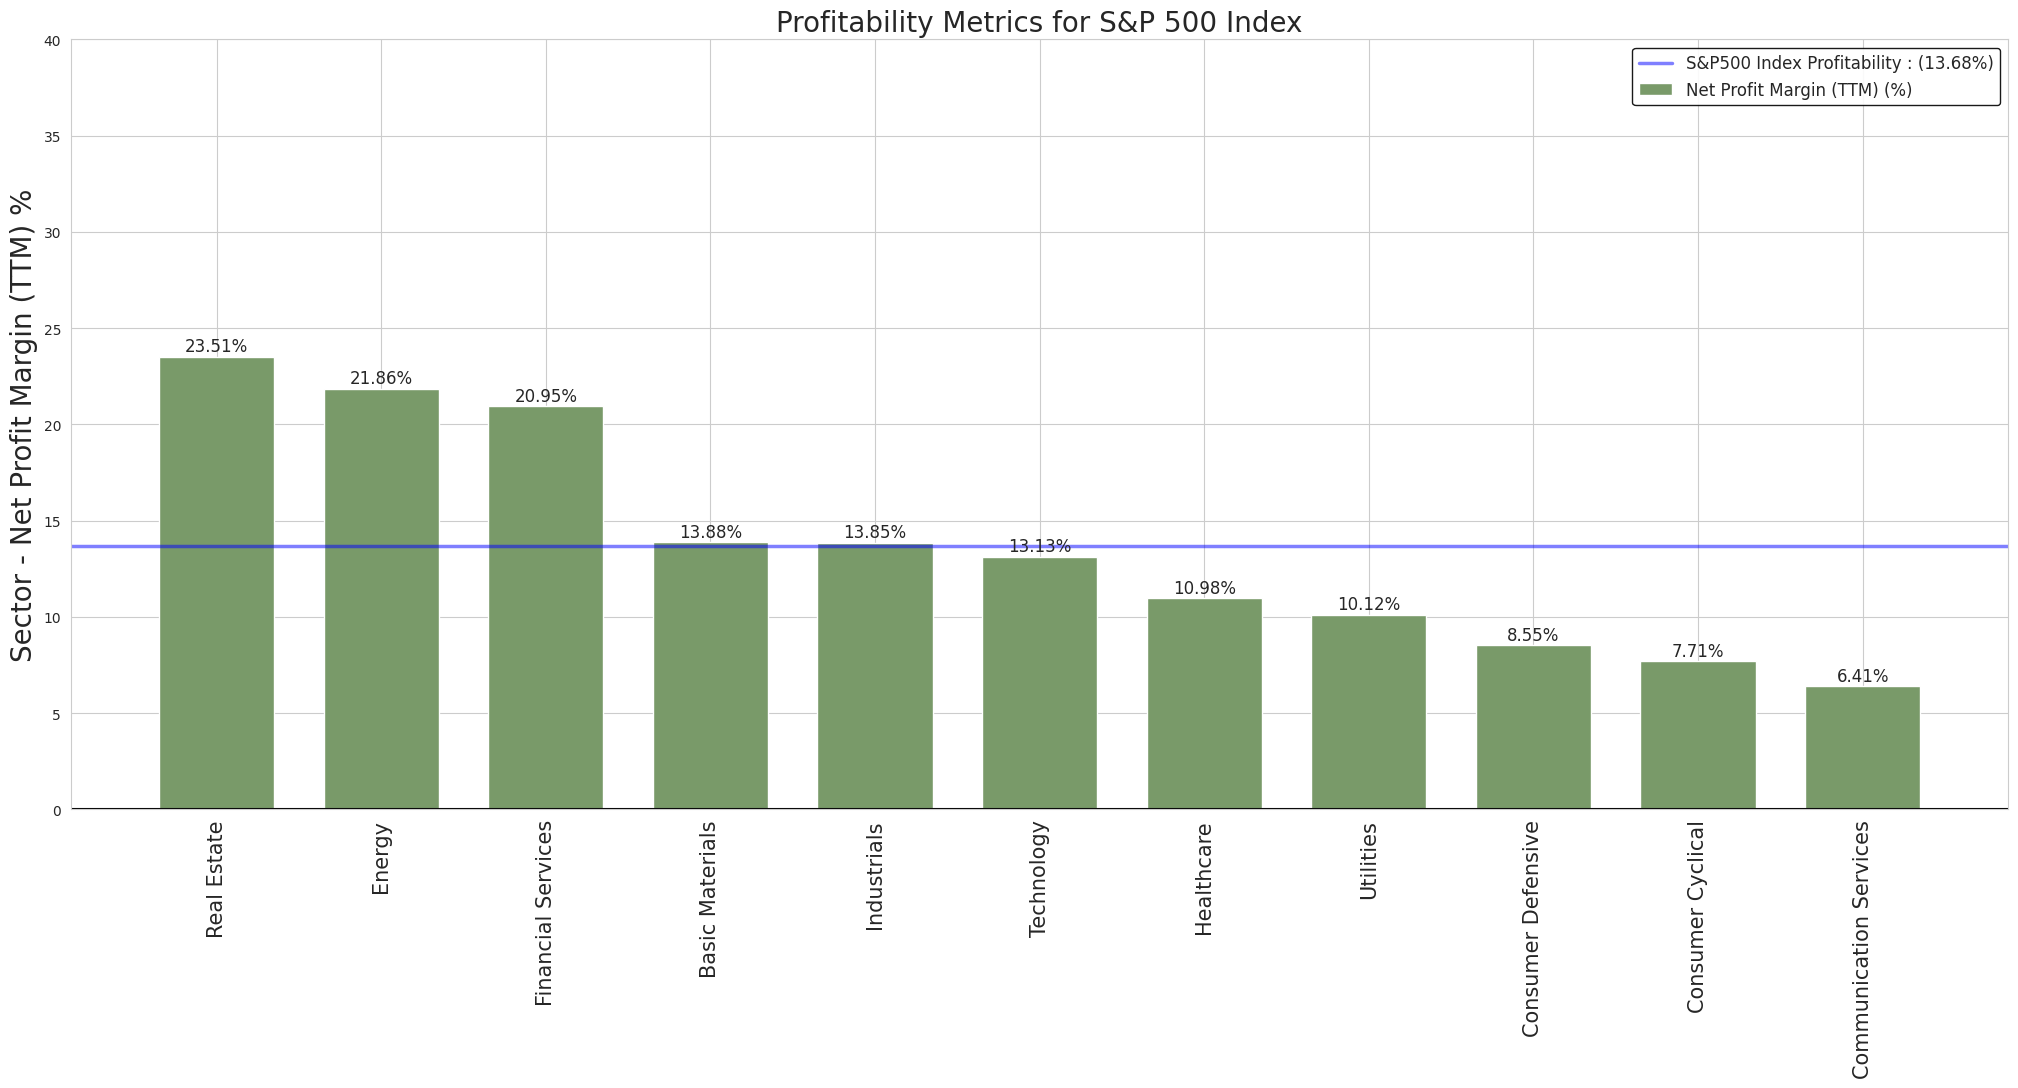

The most profitable sector of this year in the S&P500 Index is Real Estate, with a growth of 23.51%.
The least profitable sector of this year is Communication Services, with a growth of 6.41%.
The S&P00 Index Profitabililty for this year is at 13.68%.


In [13]:
df = pd.read_csv(out_path + 'stock_data.csv')

plot_df = pd.read_csv(out_path + "Sector Performance.csv")

# Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
plot_df = plot_df.set_index("Sector")
plot_df = plot_df.sort_values(by="Sector - Net Profit Margin (TTM)", ascending=False)

# Set the plot style
sns.set_style('whitegrid')

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Sector - Net Profit Margin (TTM)']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Sector - Net Profit Margin (TTM)'] * 100, width=0.7, label='Net Profit Margin (TTM) (%)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Sector - Net Profit Margin (TTM)'] * 100):
  ax.text(i, val + 1, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)

# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=NPM_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.5, label='S&P500 Index Profitability : ' + "(" + str(round(NPM_avg, 2)) + "%)")

# Set the y limits
ax.set_ylim(0, 40)

# Set the title and axis labels
ax.set_title('Profitability Metrics for S&P 500 Index', fontsize=20)
ax.set_ylabel('Sector - Net Profit Margin (TTM) %', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df.index, rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

# Print the summary of the plot mentioning the most and the least profitable sectors.
print(f"The most profitable sector of this year in the S&P500 Index is {plot_df.index[0]}, with a growth of {plot_df['Sector - Net Profit Margin (TTM)'].iloc[0] * 100:.2f}%.")
print(f"The least profitable sector of this year is {plot_df.index[-1]}, with a growth of {plot_df['Sector - Net Profit Margin (TTM)'].iloc[-1] * 100:.2f}%.")
print(f"The S&P00 Index Profitabililty for this year is at {round(NPM_avg, 2):.2f}%.")

# Deleting the above created DataFrame "plot_df" to avoid redundancy
del plot_df

## Earnings per Share Analysis

Now, let's see if we can indentify the top 10 performers and the least 10 performers in terms of **Earnings per Share** in the S&P500 Index.

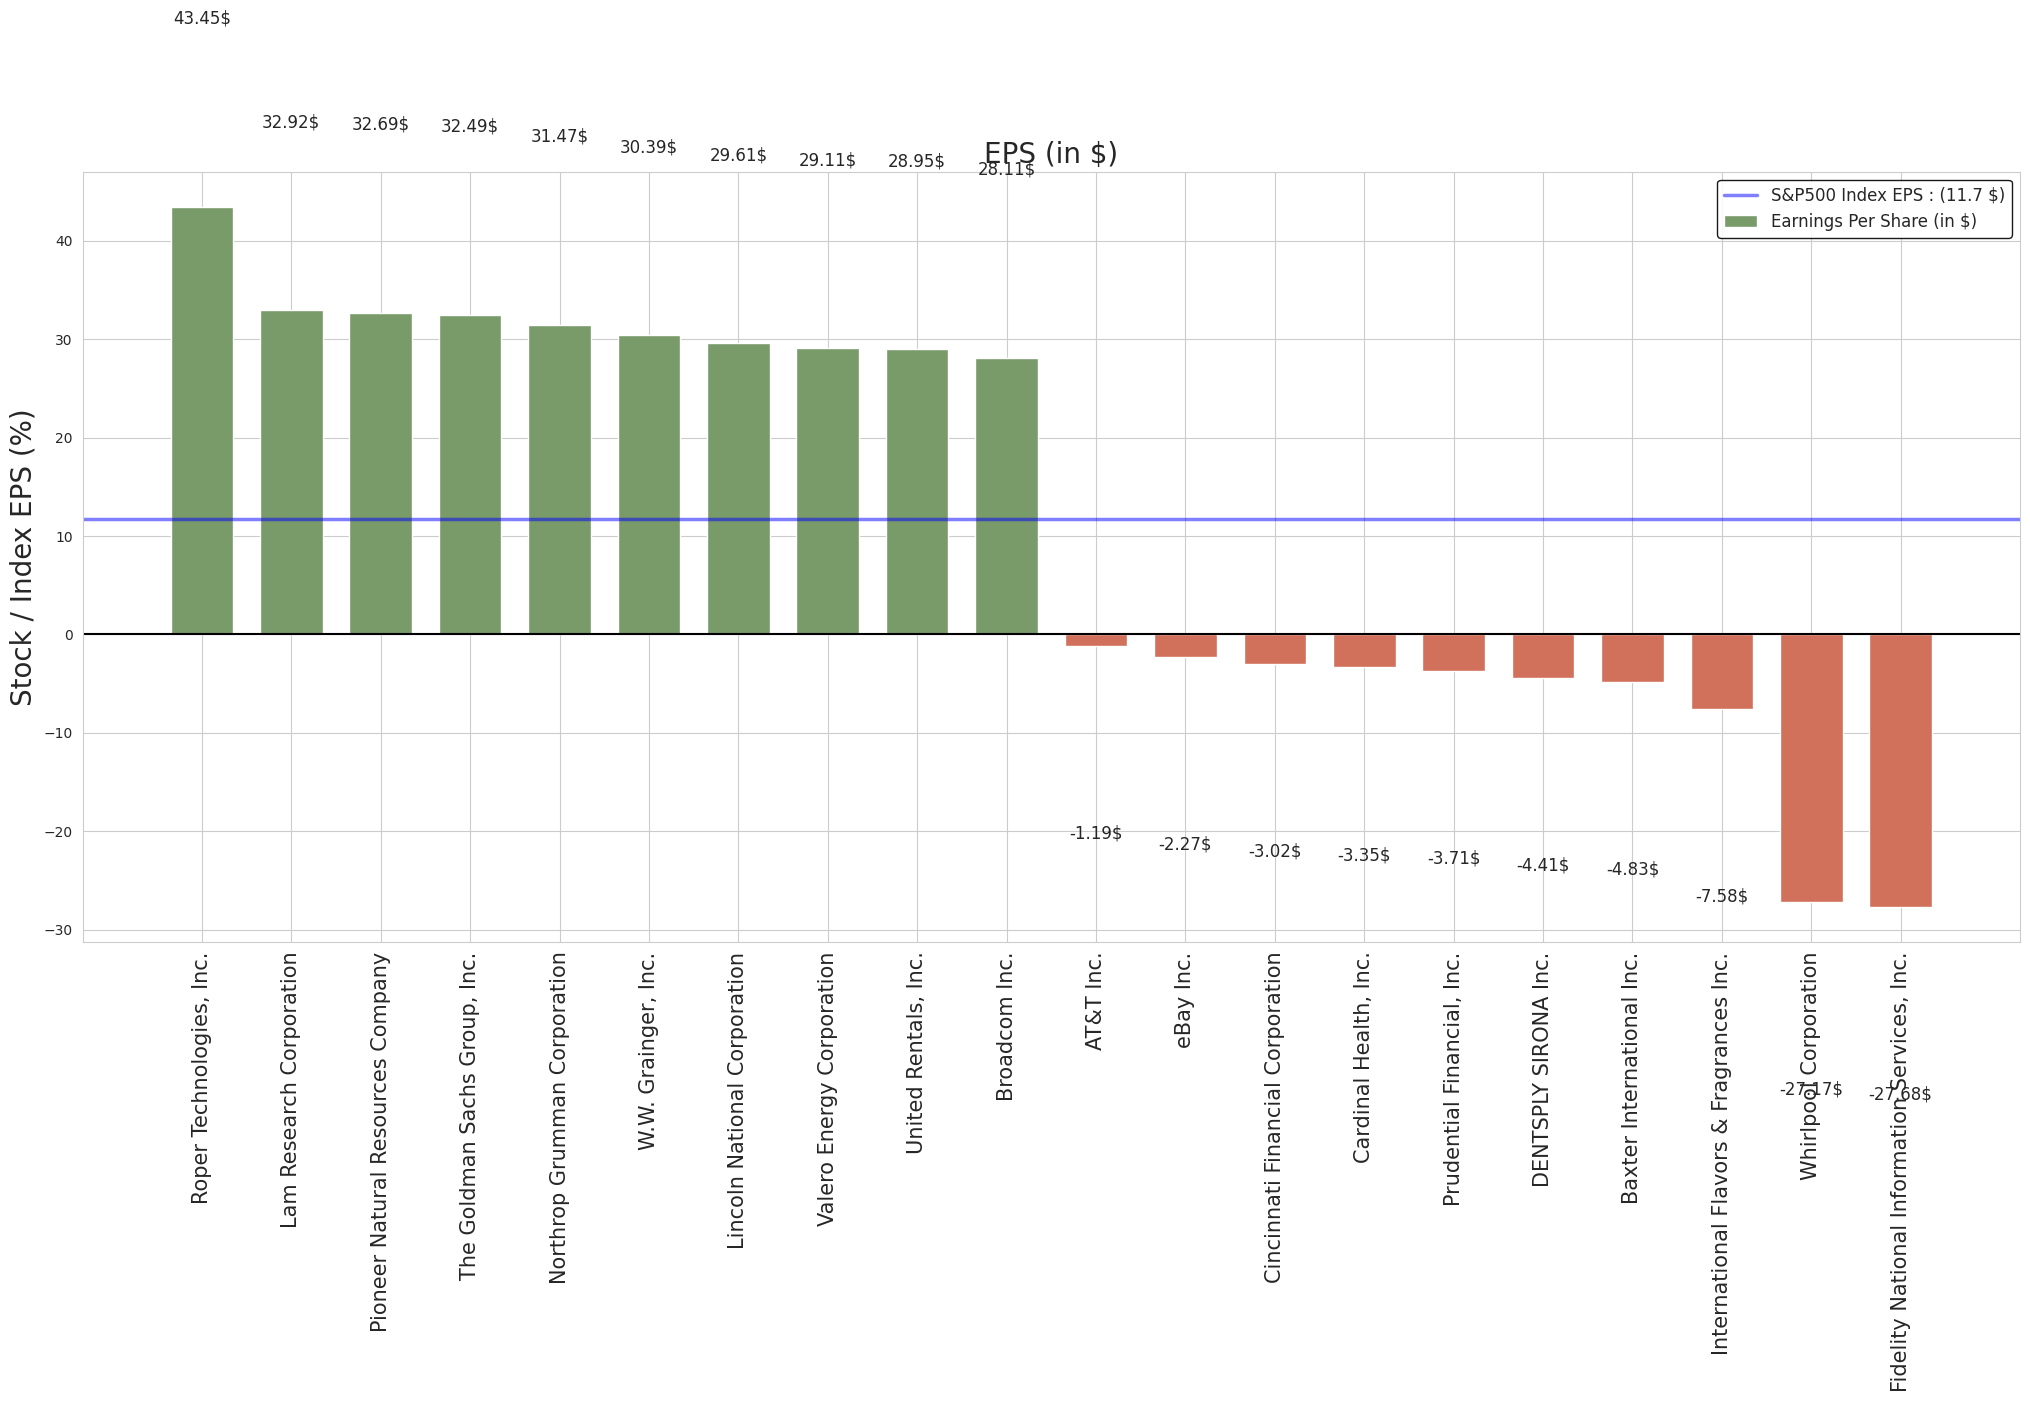

In [14]:
ploot_df = pd.read_csv("/content/drive/MyDrive/St Clair/Project/Output Data/stock_data.csv")
ploot_df = ploot_df.sort_values(by="EPS", ascending = False)

plot_df = pd.concat([ploot_df.head(10), ploot_df.tail(10)])
plot_df = plot_df.reset_index()

# Set the plot style
sns.set_style("whitegrid")

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < plot_df["EPS"].mean() else '#799A69' for val in plot_df['EPS']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['EPS'], width=0.7, label='Earnings Per Share (in $)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['EPS']):
  if val > 0:
    ax.text(i, val + 20, str(round(val, 2)) + '$', ha='center', va='top', fontsize=12)
  else:
    ax.text(i, val - 20, str(round(val, 2)) + '$', ha='center', va='bottom', fontsize=12)


# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=plot_df["EPS"].mean(), color='blue', linestyle='-', linewidth=2.5, alpha=0.5, label='S&P500 Index EPS : ' + "(" + str(round(plot_df["EPS"].mean(), 2)) + " $)")

# Set the y limits
#ax.set_ylim(-100, 100)

# Set the title and axis labels
ax.set_title('EPS (in $)', fontsize=20)
ax.set_ylabel('Stock / Index EPS (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

del plot_df, ploot_df

### Sector EPS Analysis (Visualisations)

To gain a better understanding of the earning potential of companies within each sector of the S&P 500 Index, we will calculate and visualize the Earnings Per Share (EPS) ratio. EPS is a key metric that indicates the profitability of a company on a per-share basis, and it is an important factor for investors when evaluating a company's financial health. By calculating EPS for each company within a sector, we can identify which companies are generating the highest earnings per share for their shareholders. We will also calculate the average EPS for each sector to understand which sectors are the most profitable overall.

Using data visualization tools, we will create charts and graphs to make it easy to compare the EPS of individual companies and sectors within the index. By examining these visualizations, we can identify which sectors are generating the highest earnings per share and which companies are the most profitable. Overall, this analysis will provide valuable insights into the earning potential of the S&P 500 Index and its constituent sectors, which can be useful for investors and analysts seeking to make informed investment decisions.

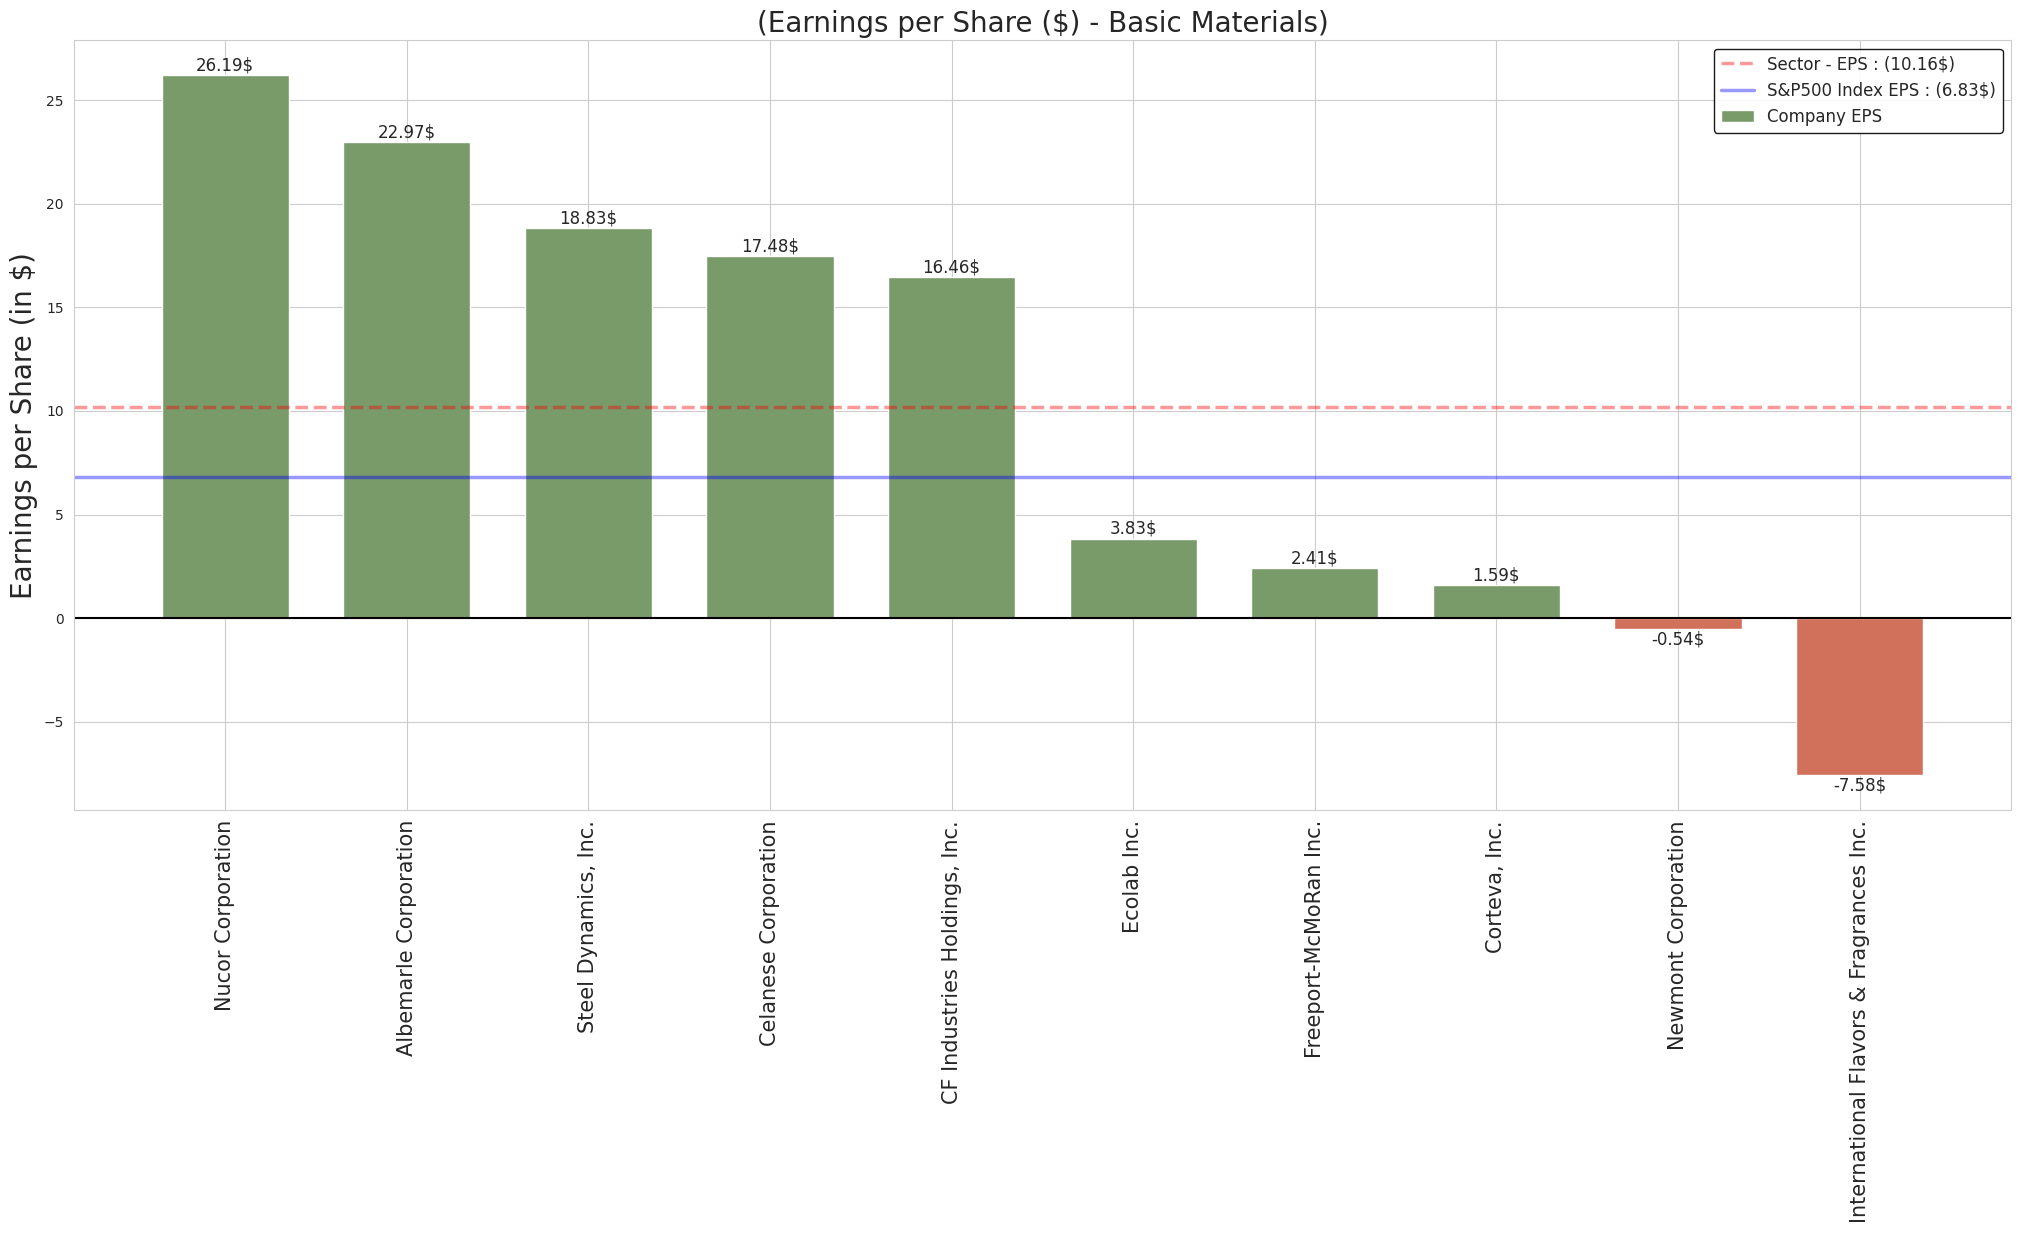

The company with the highest earnings per share in the Basic Materials sector is Nucor Corporation, with an EPS of $26.19.
The company with the lowest earnings per share in this sector is International Flavors & Fragrances Inc., with an EPS of $-7.58.
The average earnings per share for companies in this sector is $10.16.


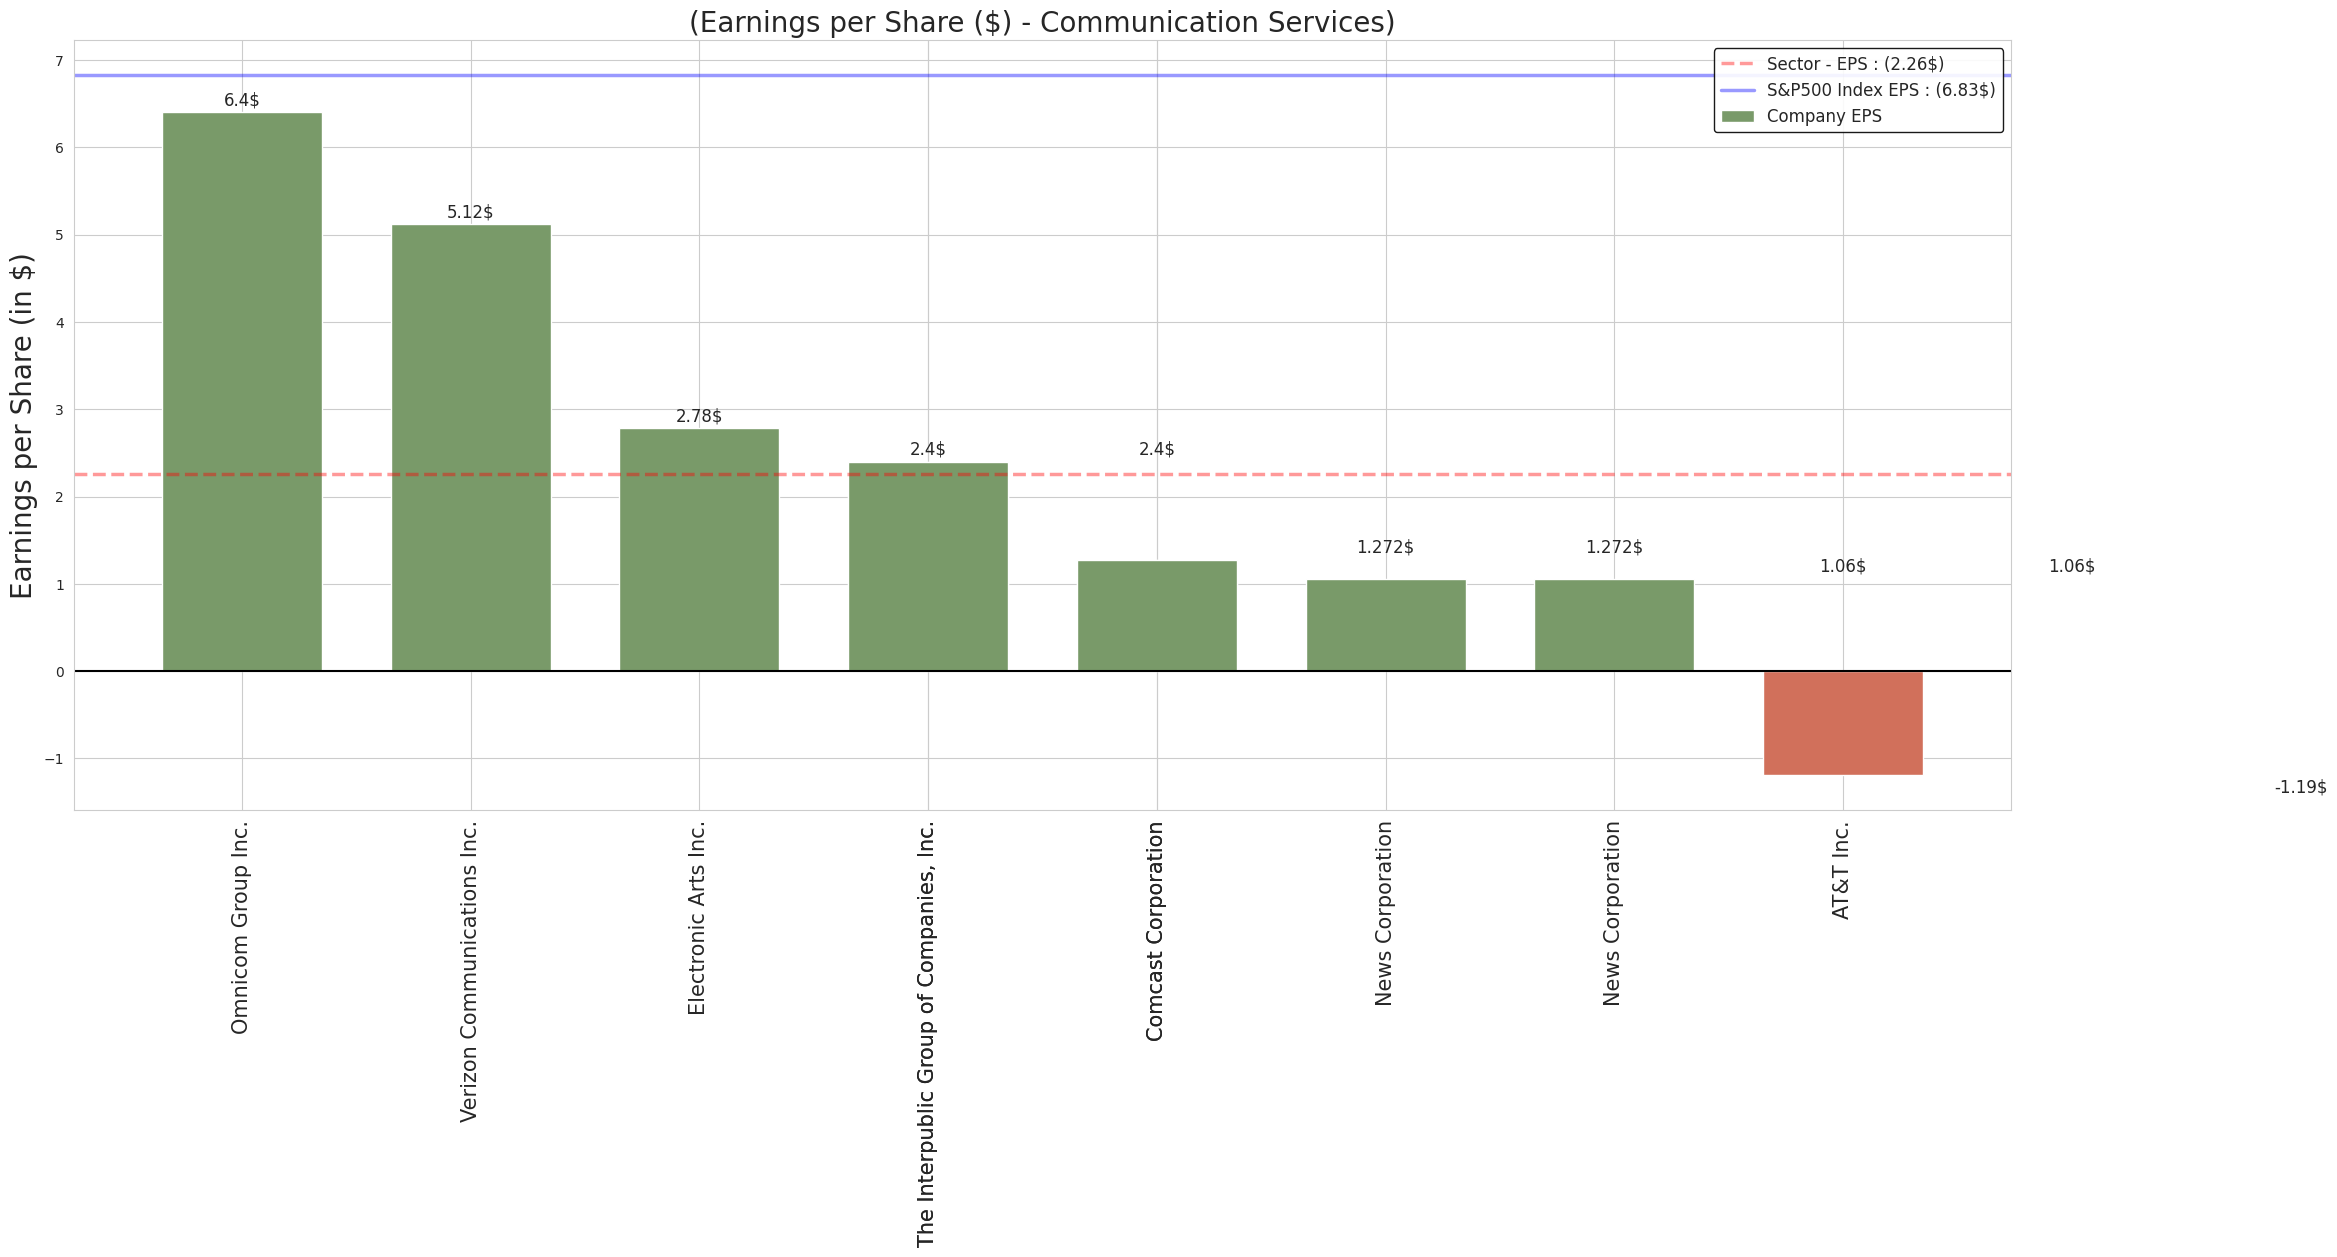

The company with the highest earnings per share in the Communication Services sector is Omnicom Group Inc., with an EPS of $6.40.
The company with the lowest earnings per share in this sector is AT&T Inc., with an EPS of $-1.19.
The average earnings per share for companies in this sector is $2.26.


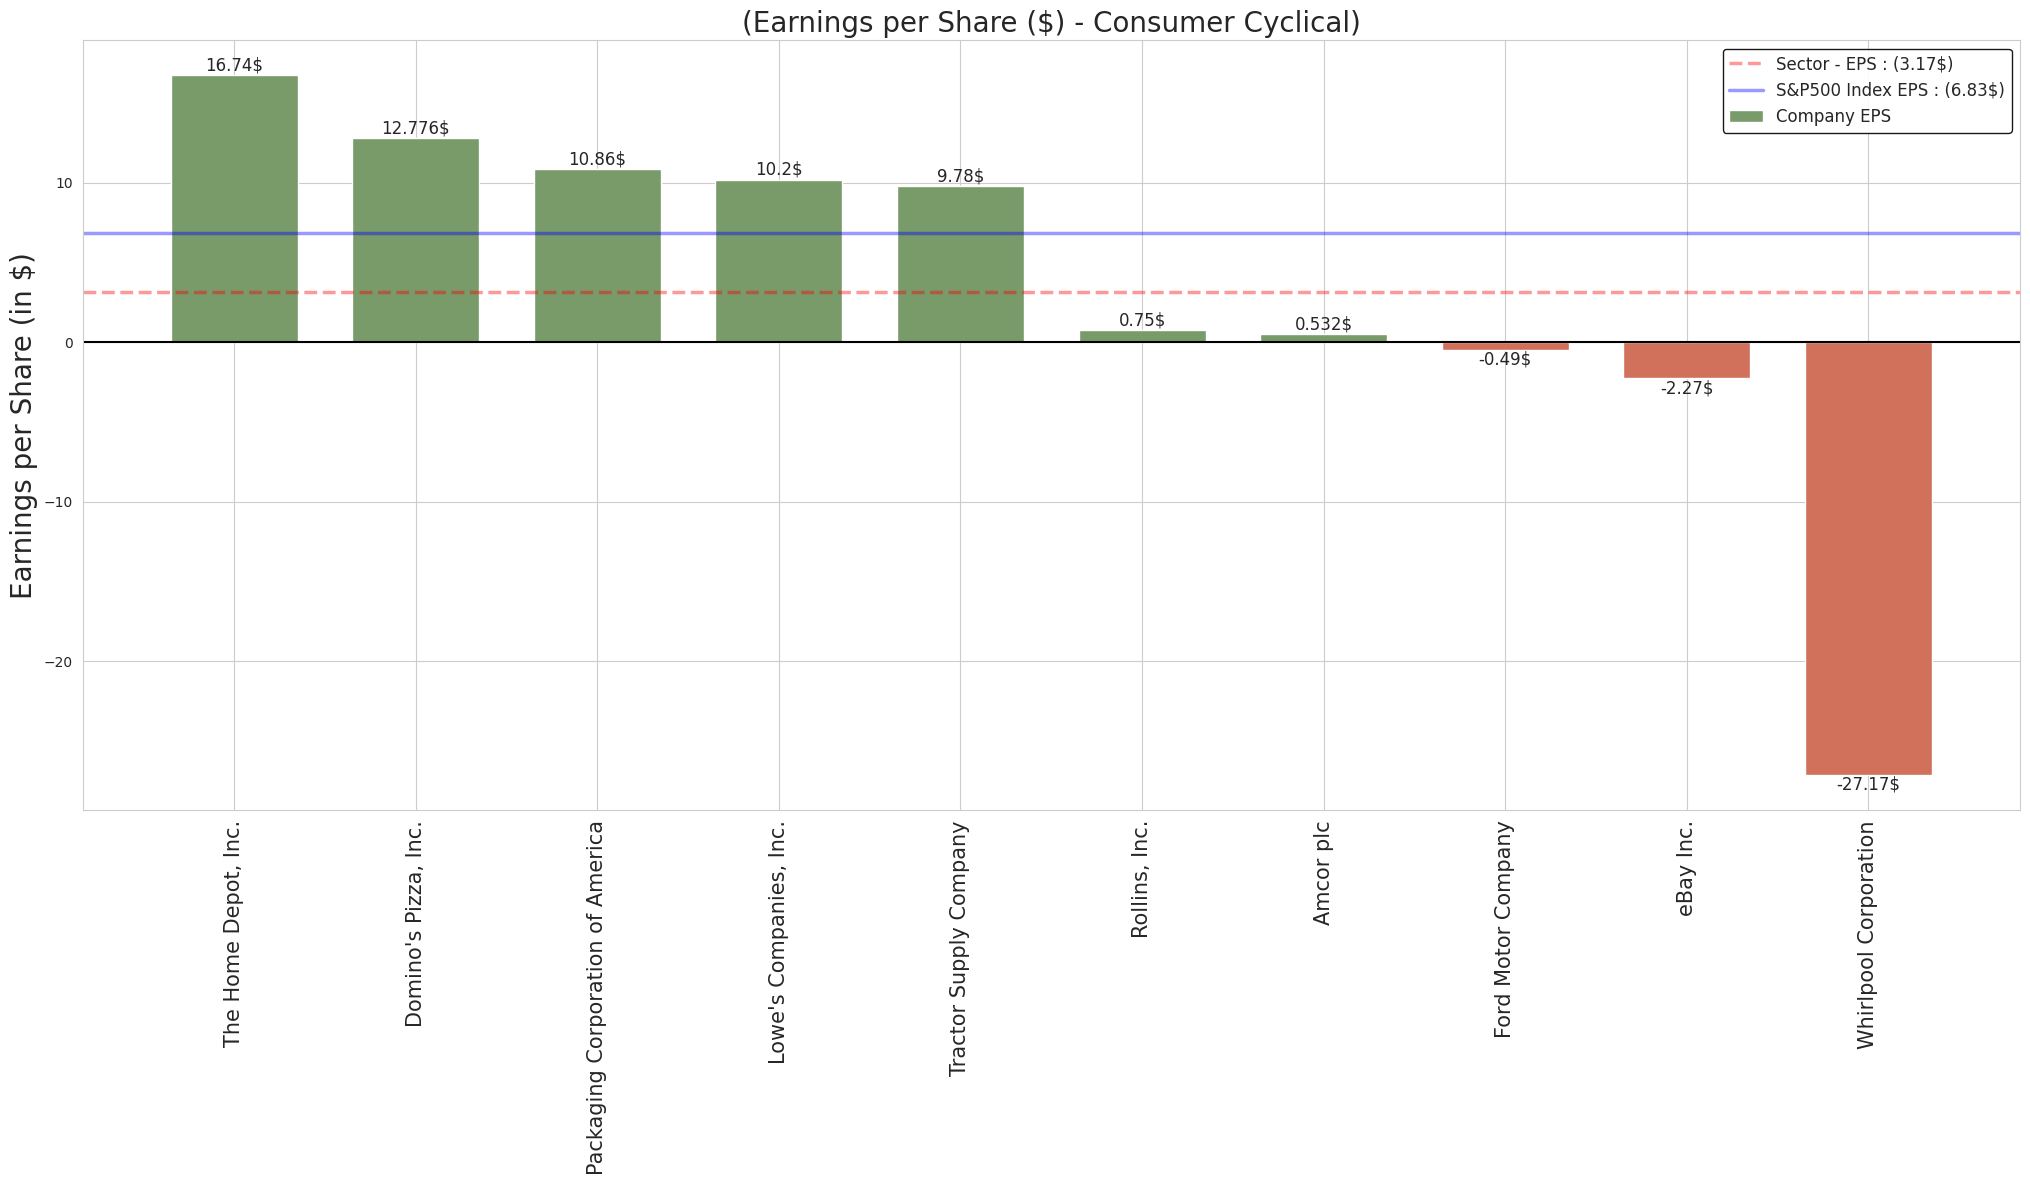

The company with the highest earnings per share in the Consumer Cyclical sector is The Home Depot, Inc., with an EPS of $16.74.
The company with the lowest earnings per share in this sector is Whirlpool Corporation, with an EPS of $-27.17.
The average earnings per share for companies in this sector is $3.17.


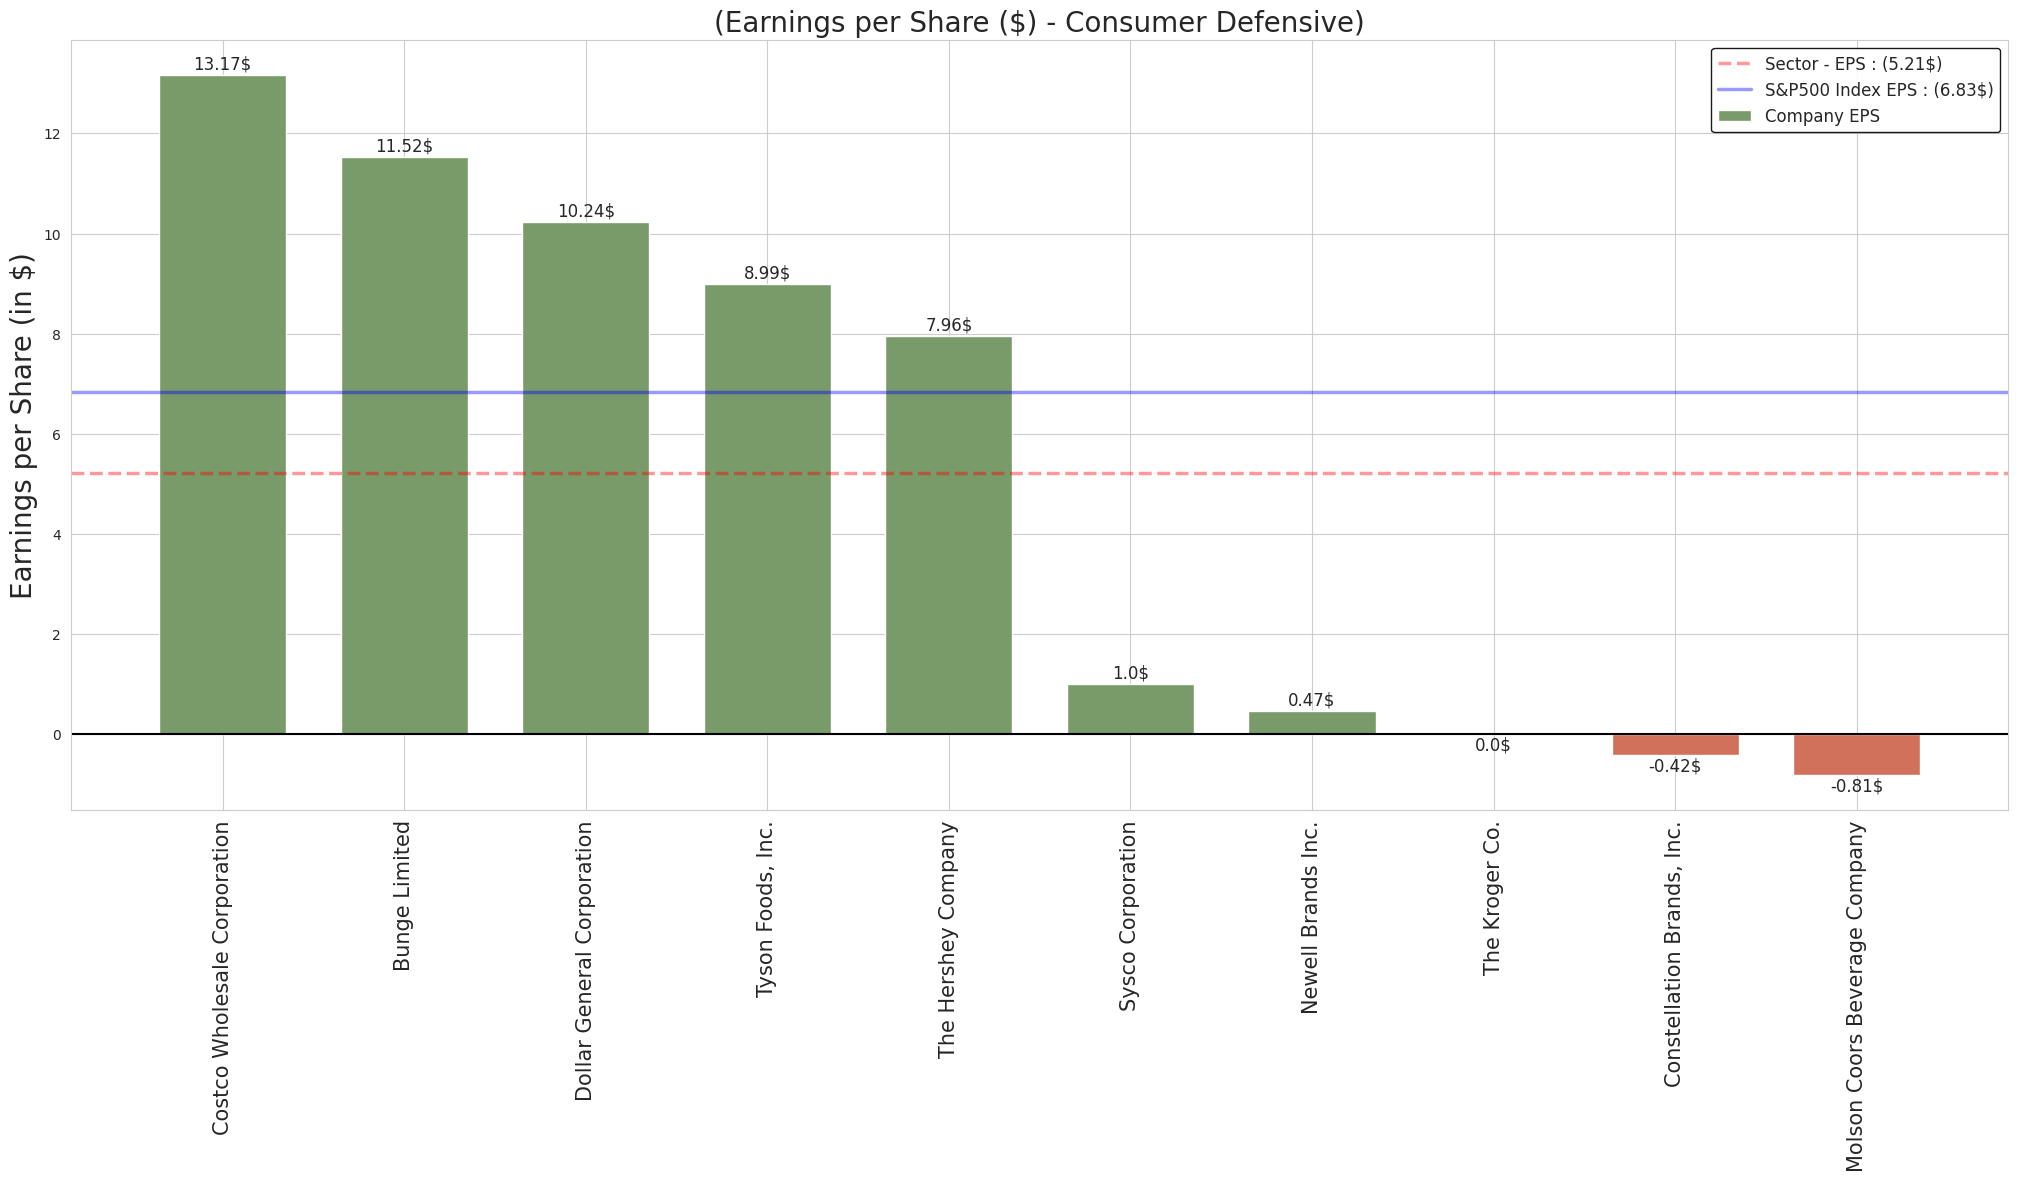

The company with the highest earnings per share in the Consumer Defensive sector is Costco Wholesale Corporation, with an EPS of $13.17.
The company with the lowest earnings per share in this sector is Molson Coors Beverage Company, with an EPS of $-0.81.
The average earnings per share for companies in this sector is $5.21.


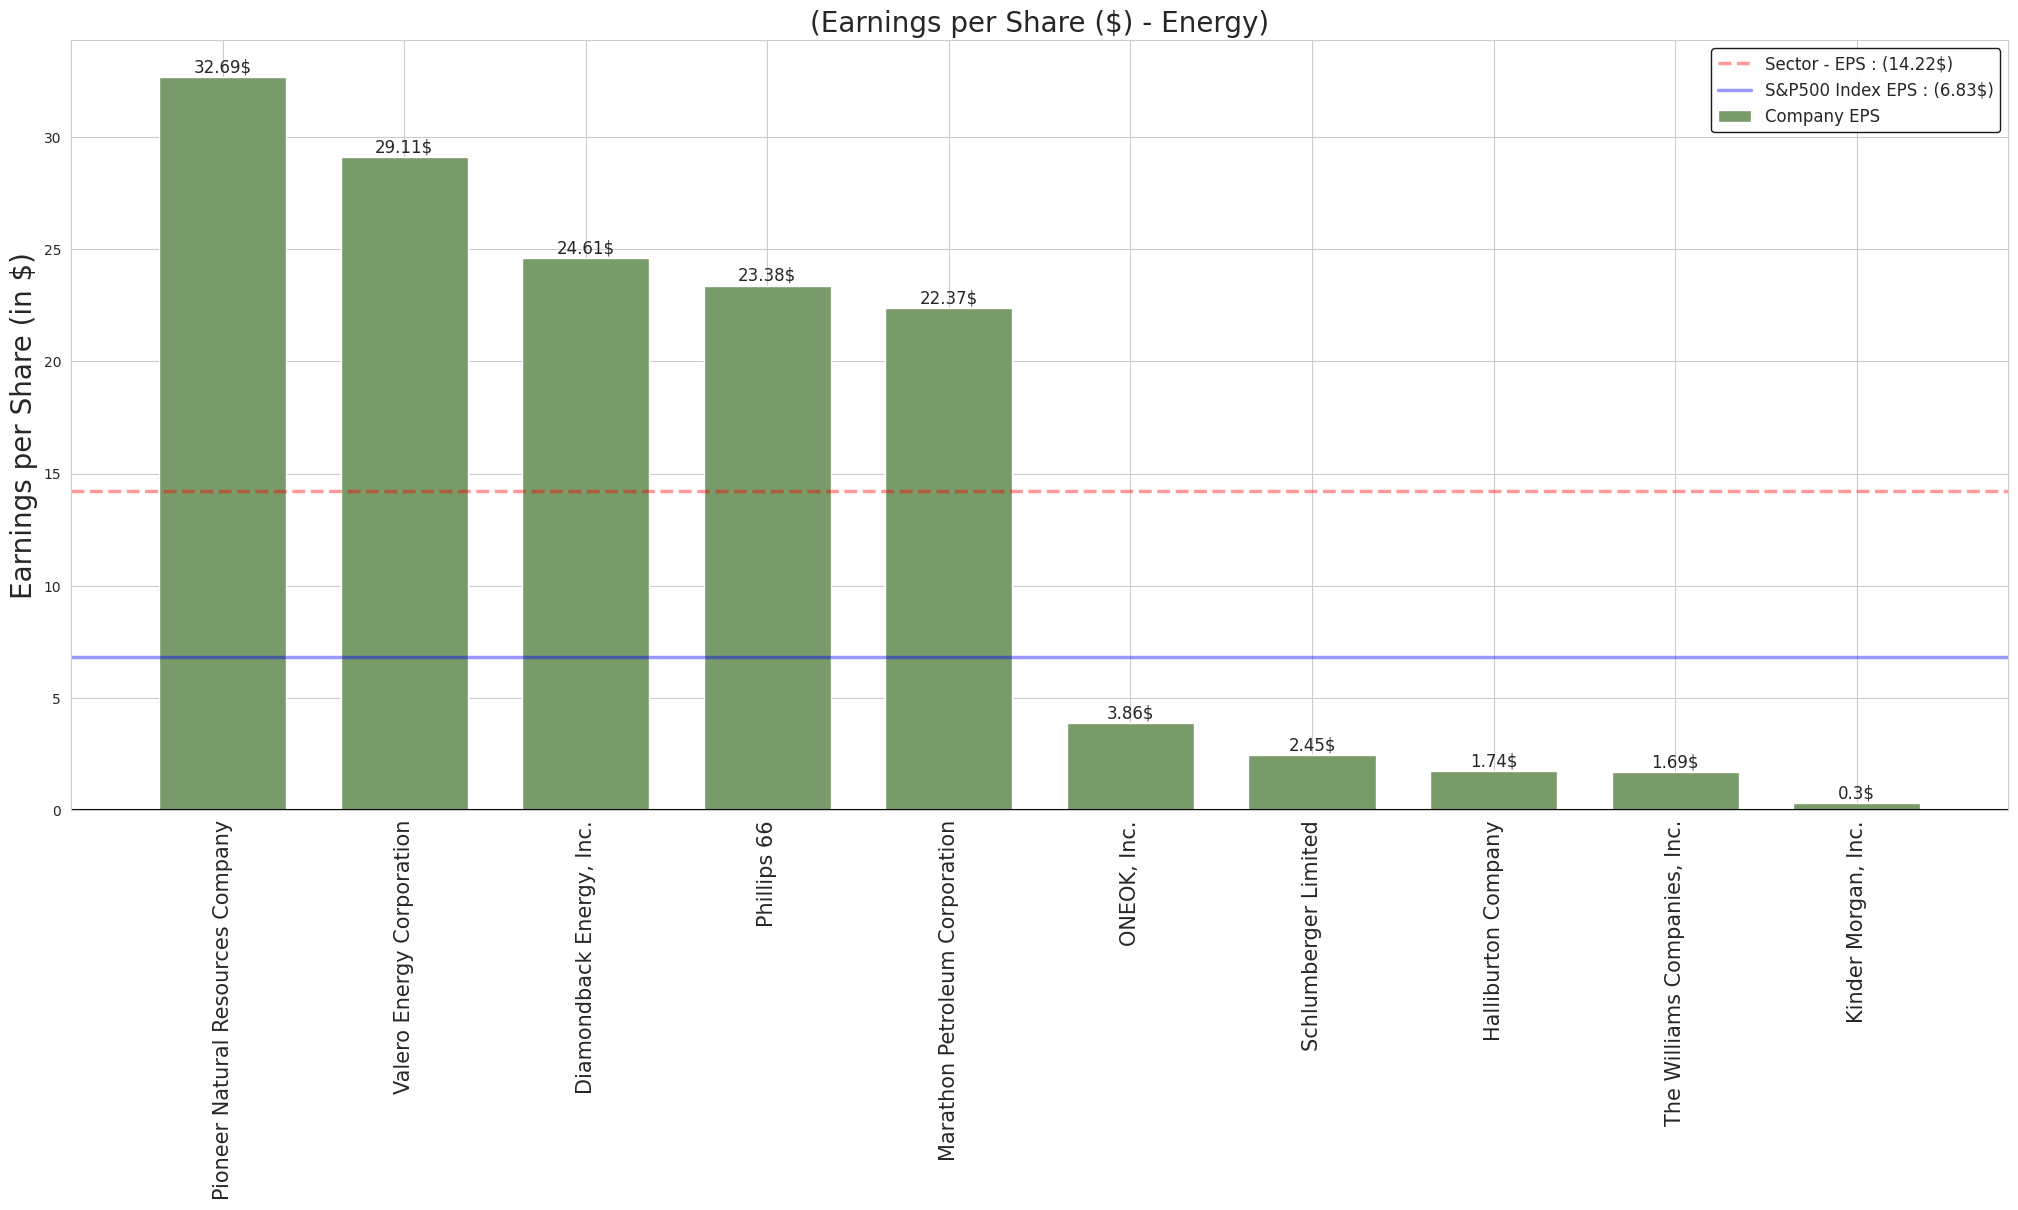

The company with the highest earnings per share in the Energy sector is Pioneer Natural Resources Company, with an EPS of $32.69.
The company with the lowest earnings per share in this sector is Kinder Morgan, Inc., with an EPS of $0.30.
The average earnings per share for companies in this sector is $14.22.


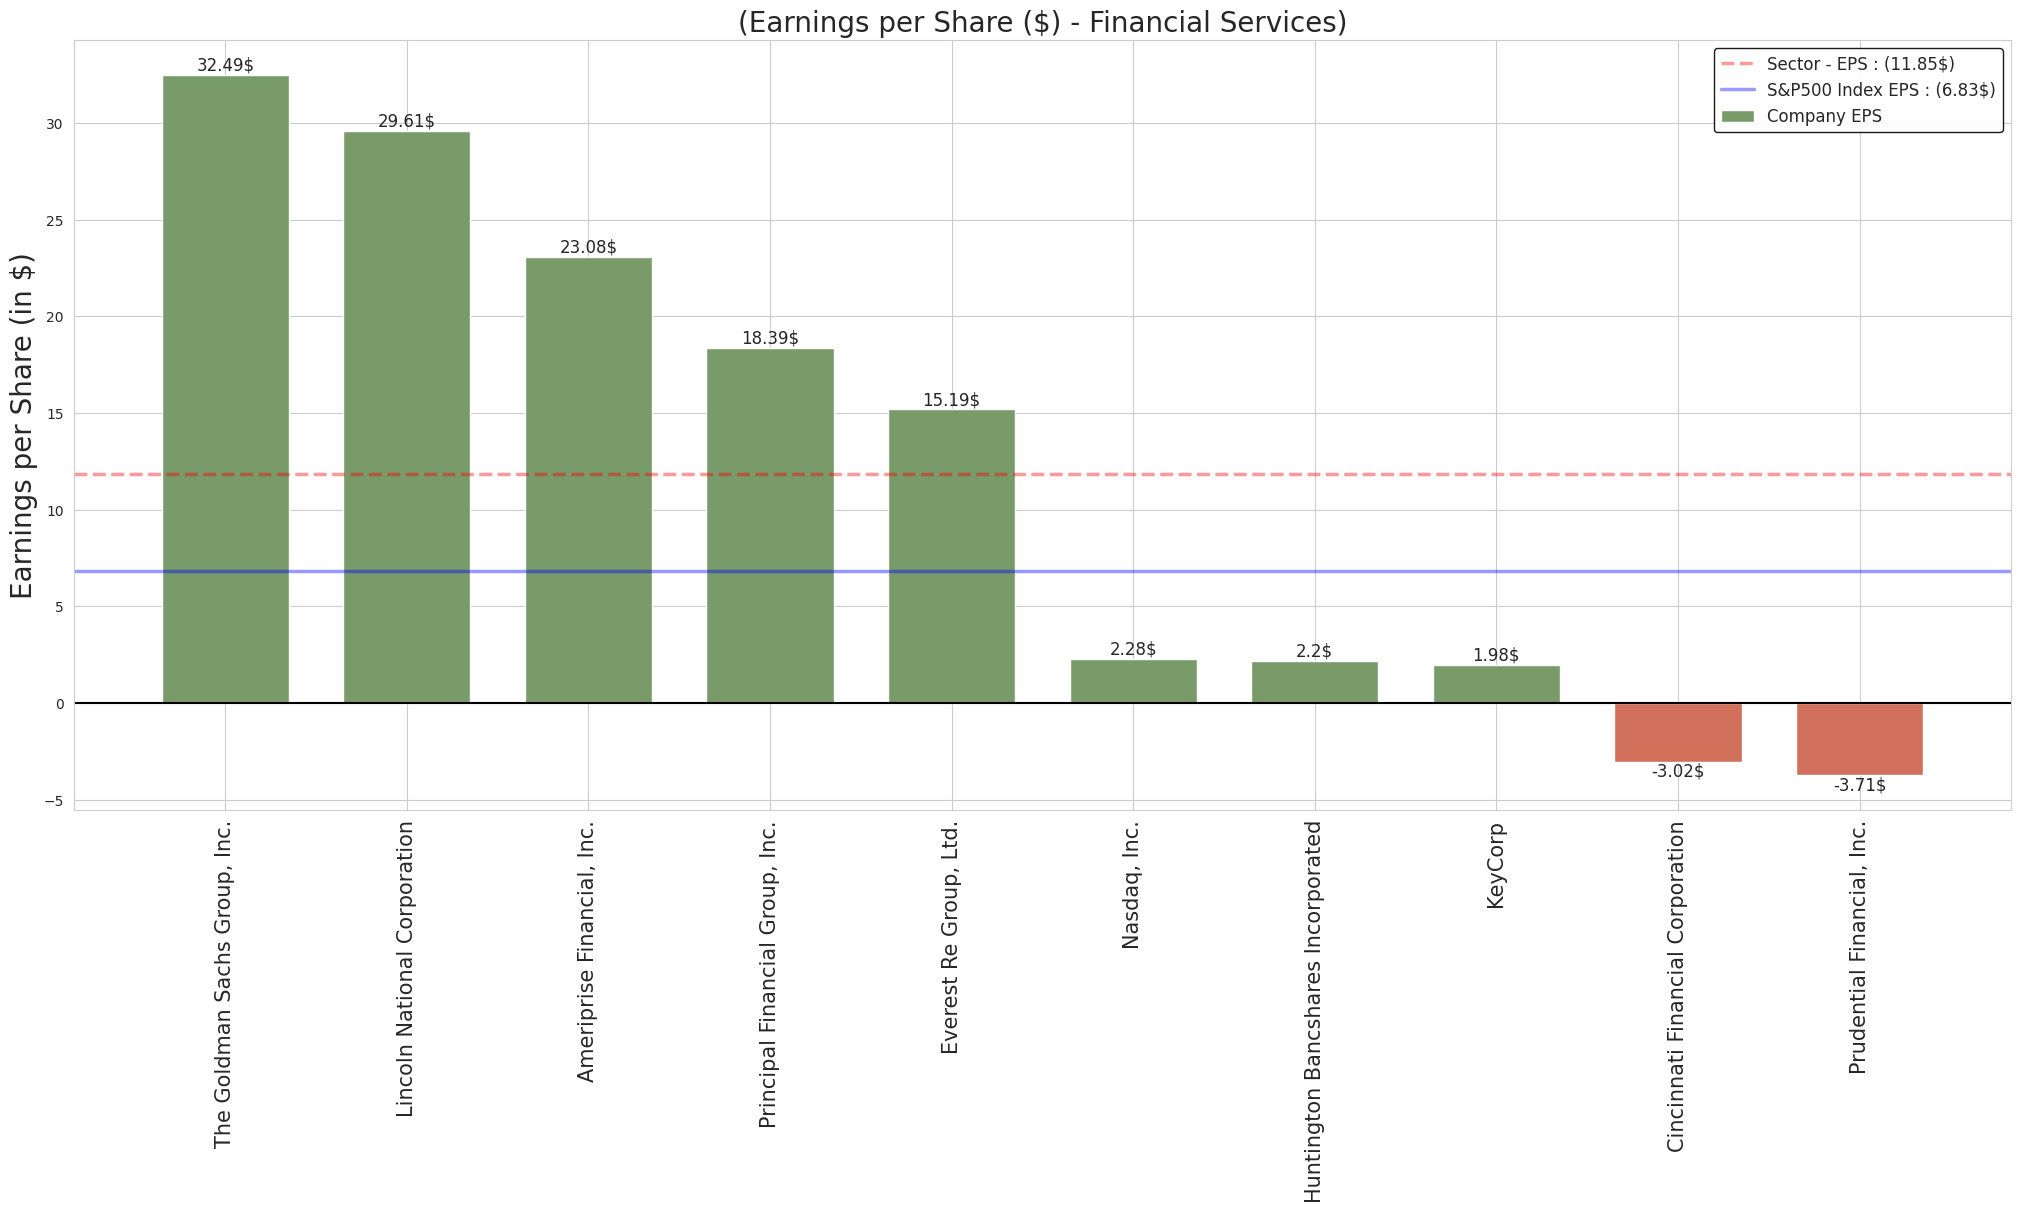

The company with the highest earnings per share in the Financial Services sector is The Goldman Sachs Group, Inc., with an EPS of $32.49.
The company with the lowest earnings per share in this sector is Prudential Financial, Inc., with an EPS of $-3.71.
The average earnings per share for companies in this sector is $11.85.


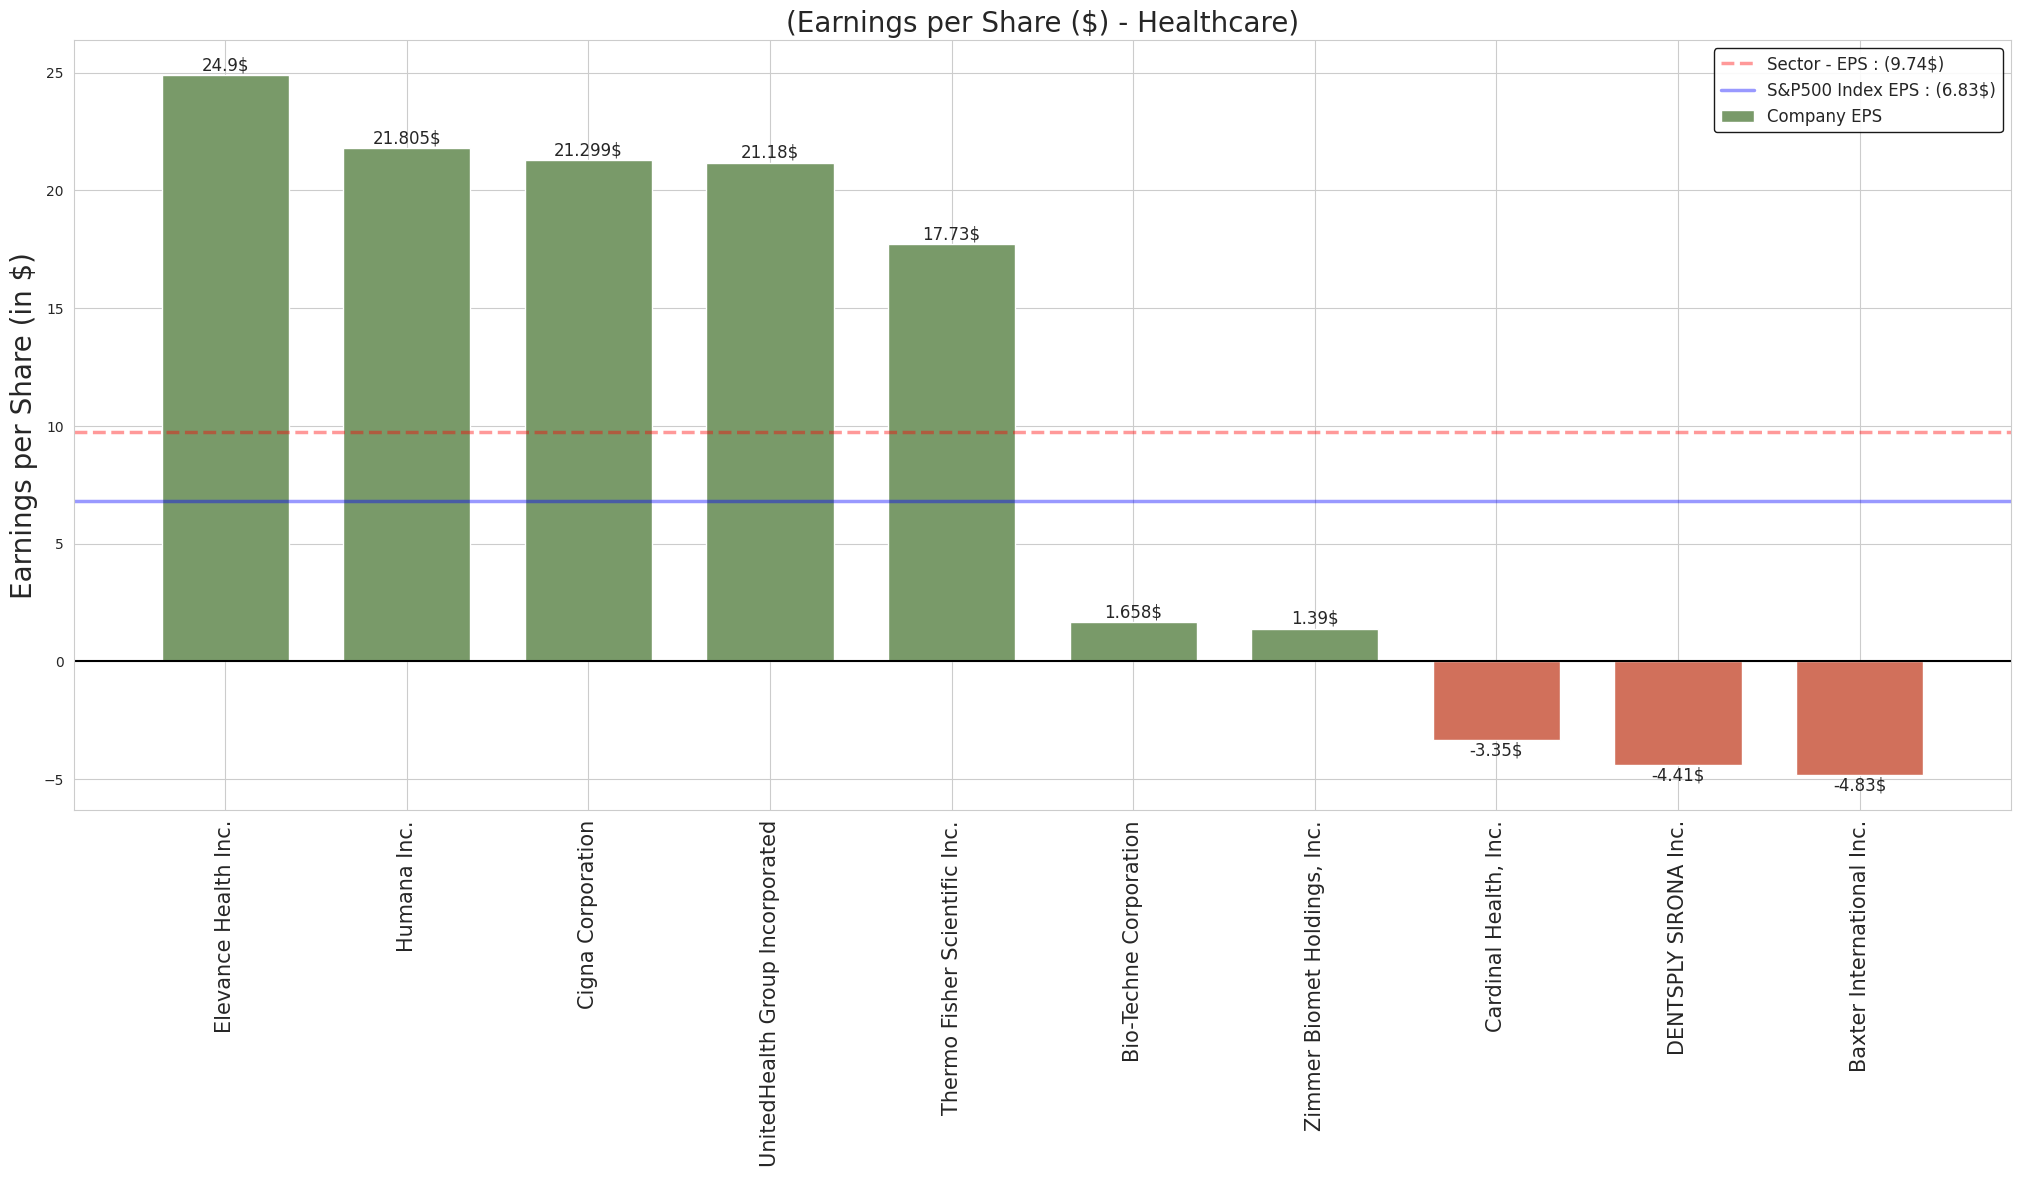

The company with the highest earnings per share in the Healthcare sector is Elevance Health Inc., with an EPS of $24.90.
The company with the lowest earnings per share in this sector is Baxter International Inc., with an EPS of $-4.83.
The average earnings per share for companies in this sector is $9.74.


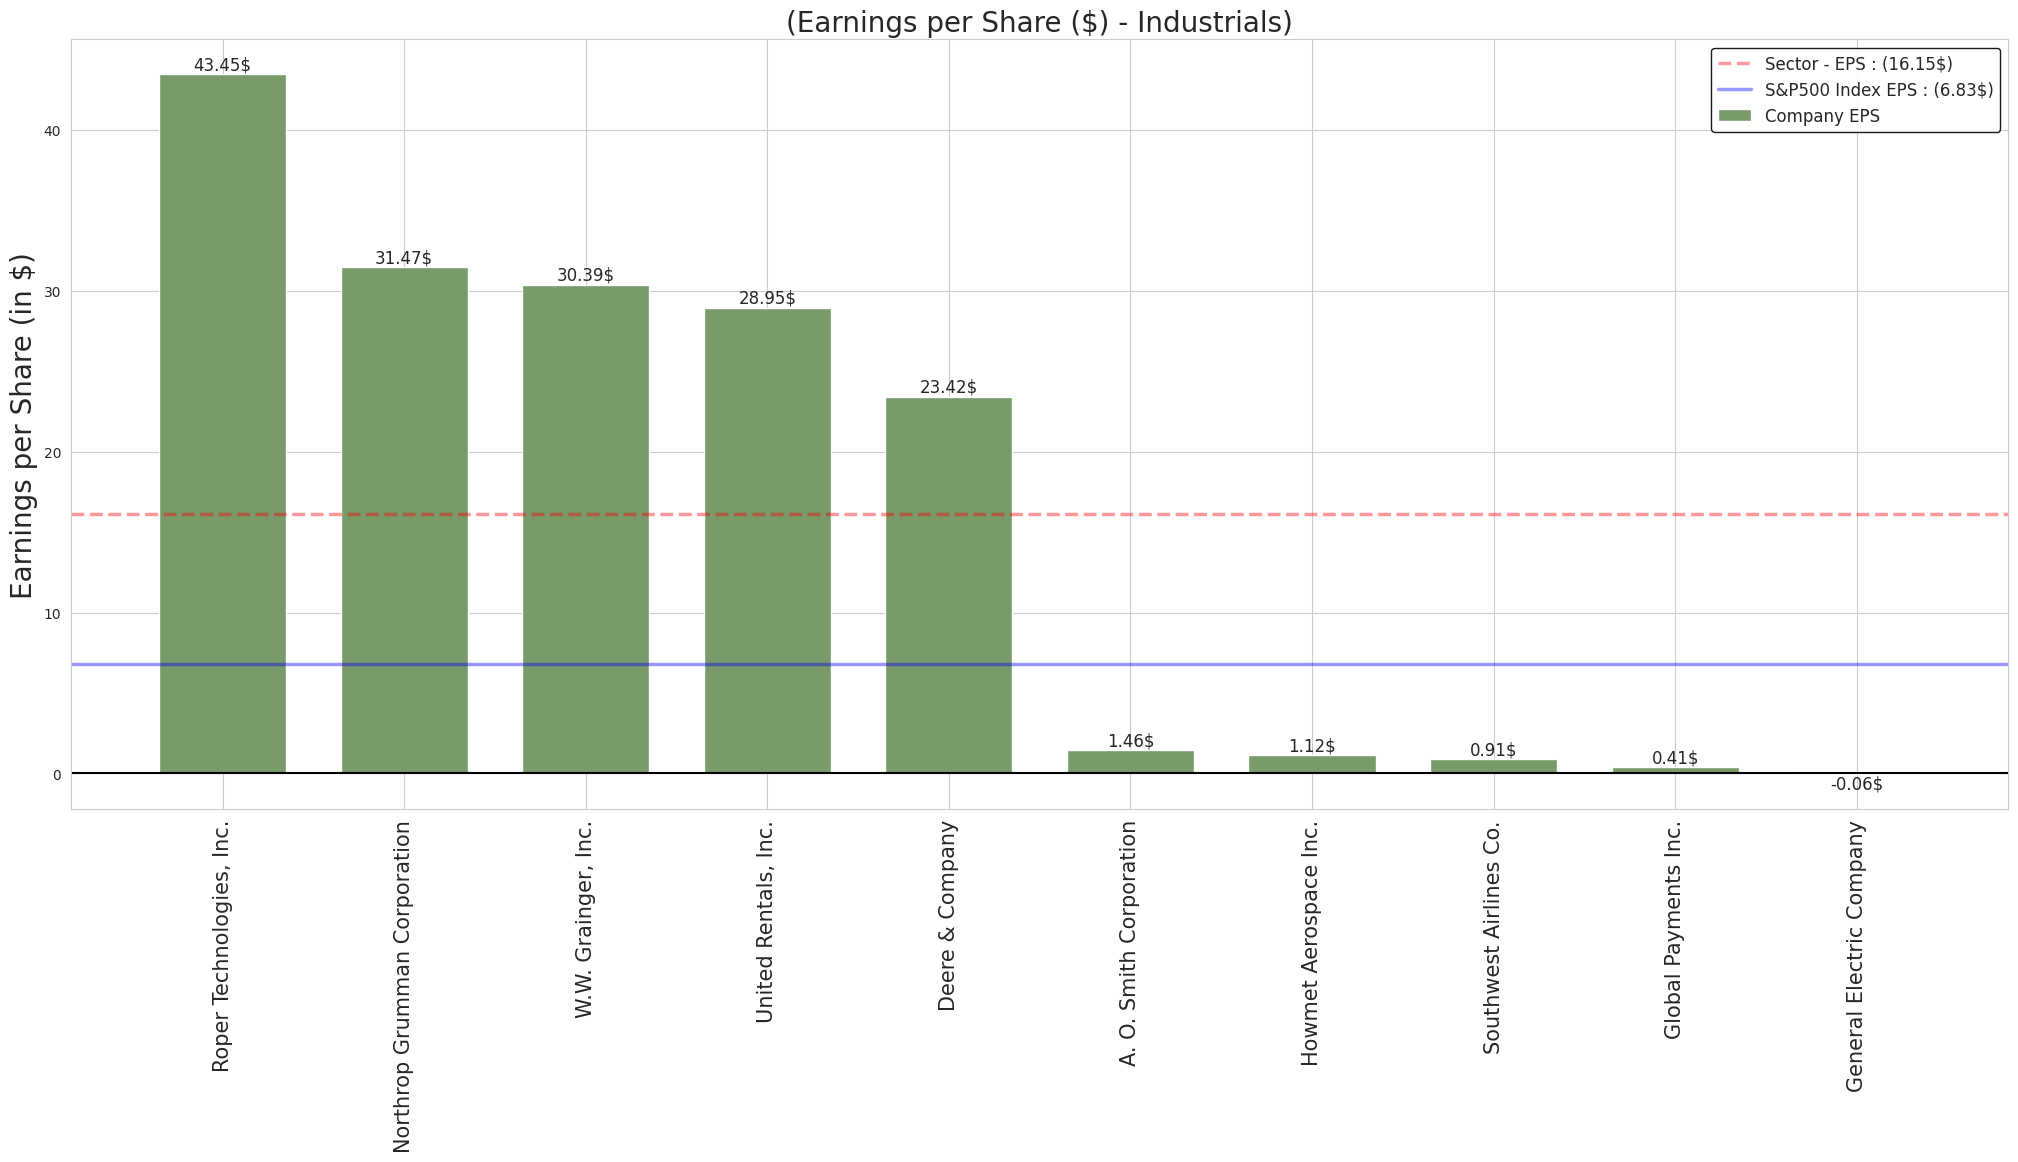

The company with the highest earnings per share in the Industrials sector is Roper Technologies, Inc., with an EPS of $43.45.
The company with the lowest earnings per share in this sector is General Electric Company, with an EPS of $-0.06.
The average earnings per share for companies in this sector is $16.15.


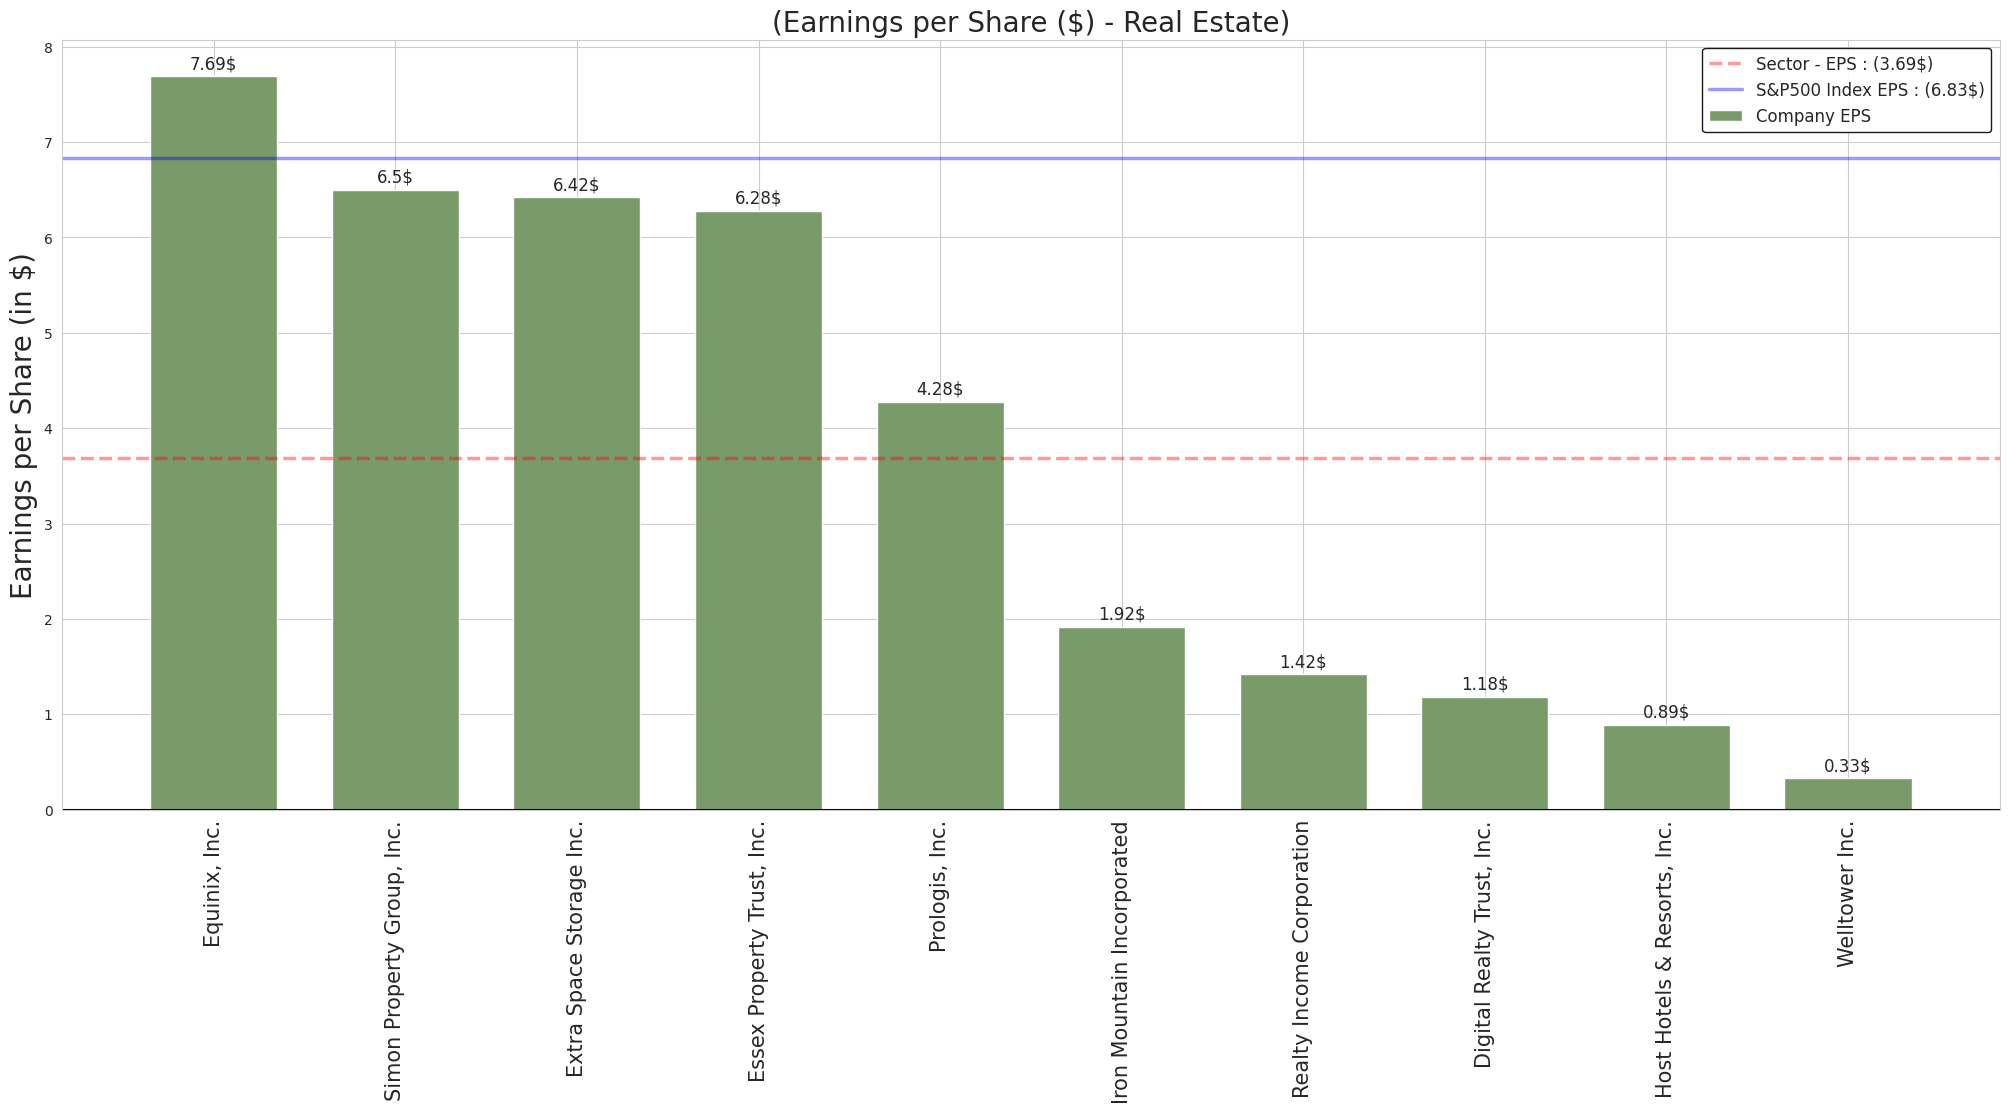

The company with the highest earnings per share in the Real Estate sector is Equinix, Inc., with an EPS of $7.69.
The company with the lowest earnings per share in this sector is Welltower Inc., with an EPS of $0.33.
The average earnings per share for companies in this sector is $3.69.


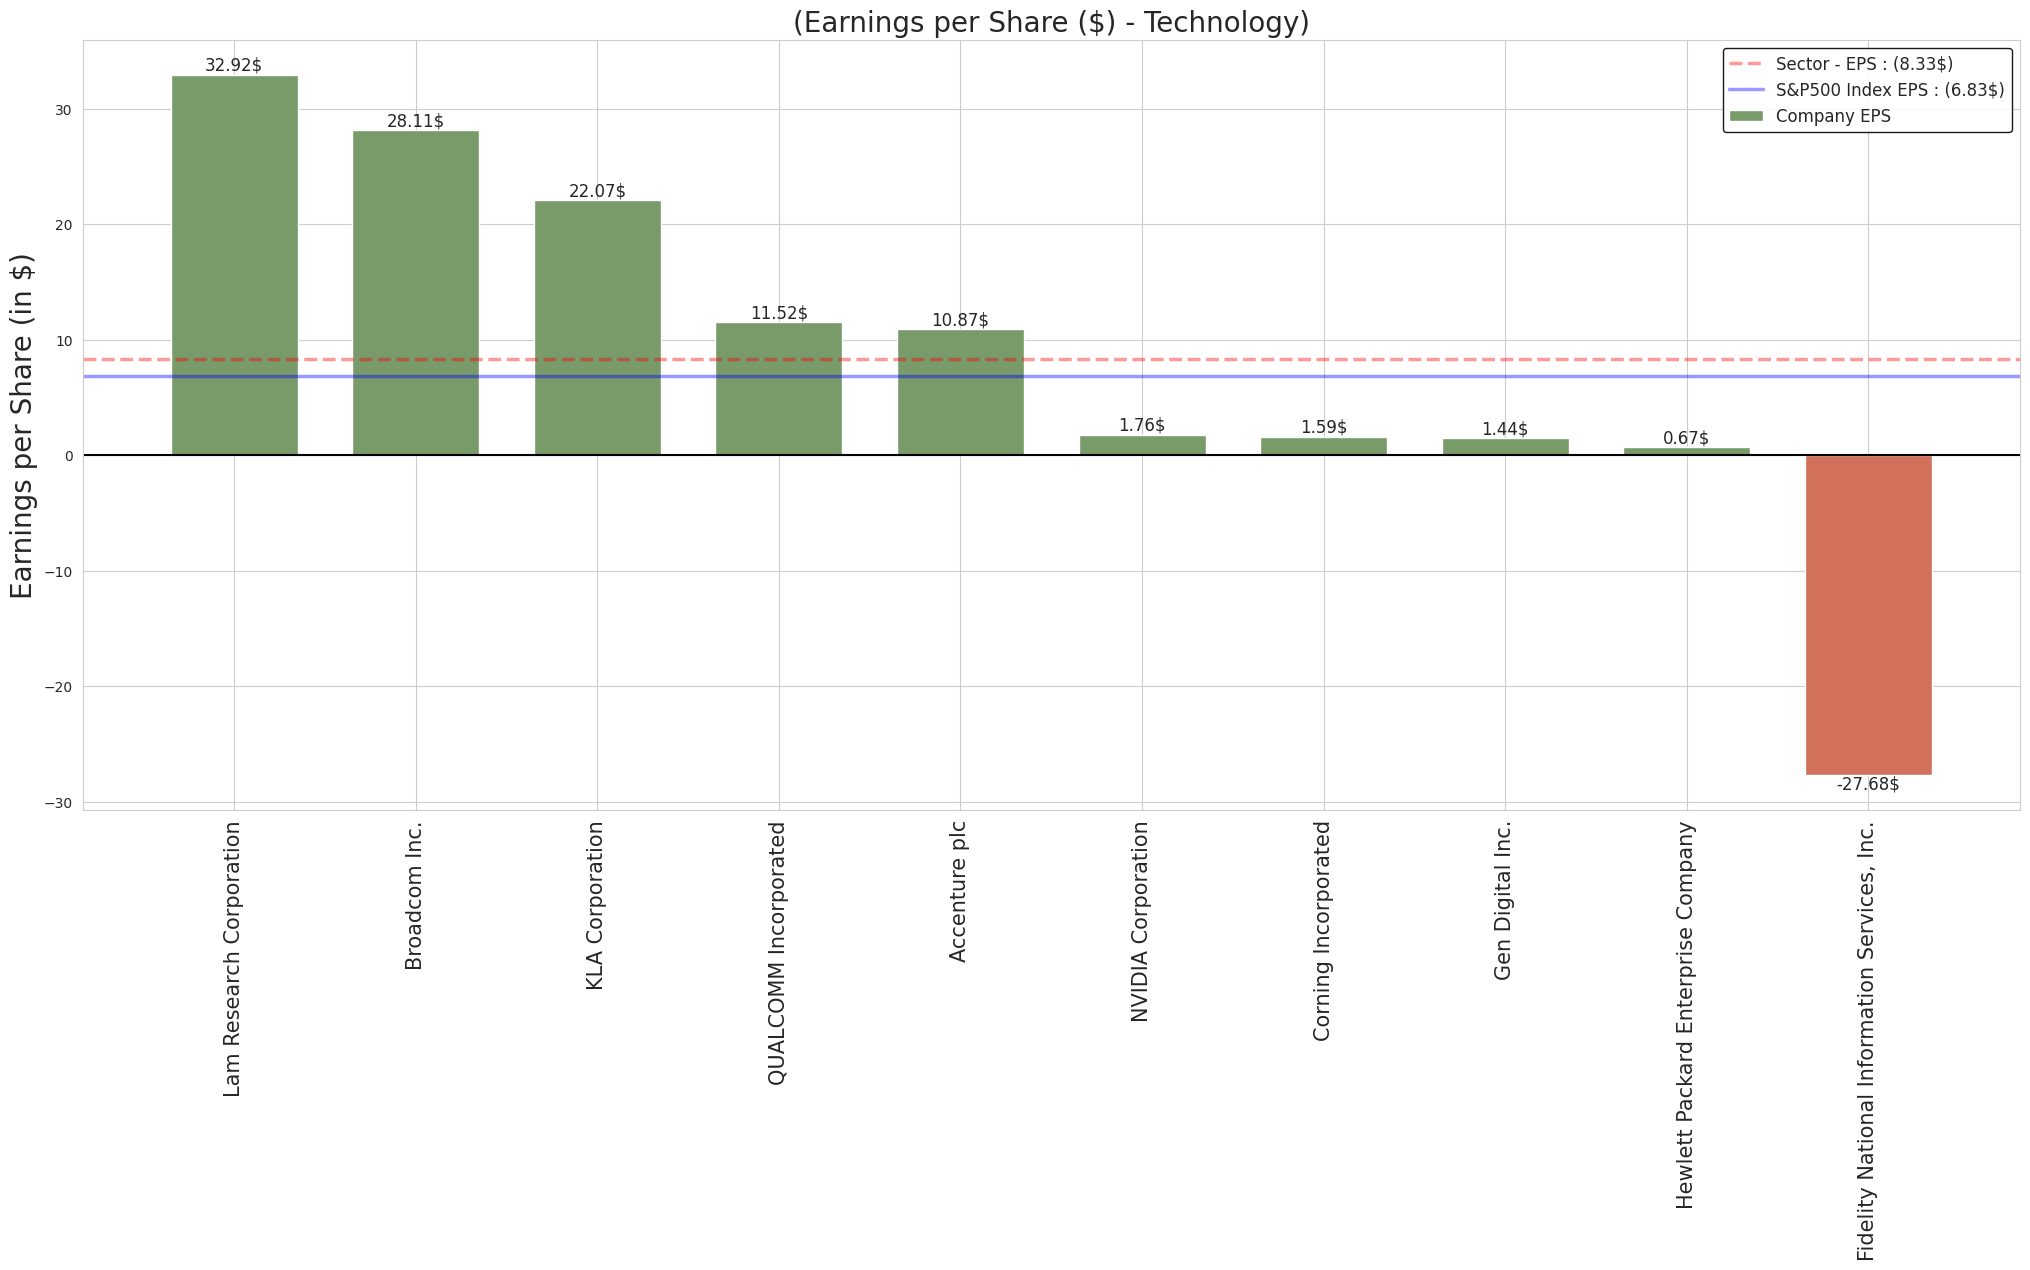

The company with the highest earnings per share in the Technology sector is Lam Research Corporation, with an EPS of $32.92.
The company with the lowest earnings per share in this sector is Fidelity National Information Services, Inc., with an EPS of $-27.68.
The average earnings per share for companies in this sector is $8.33.


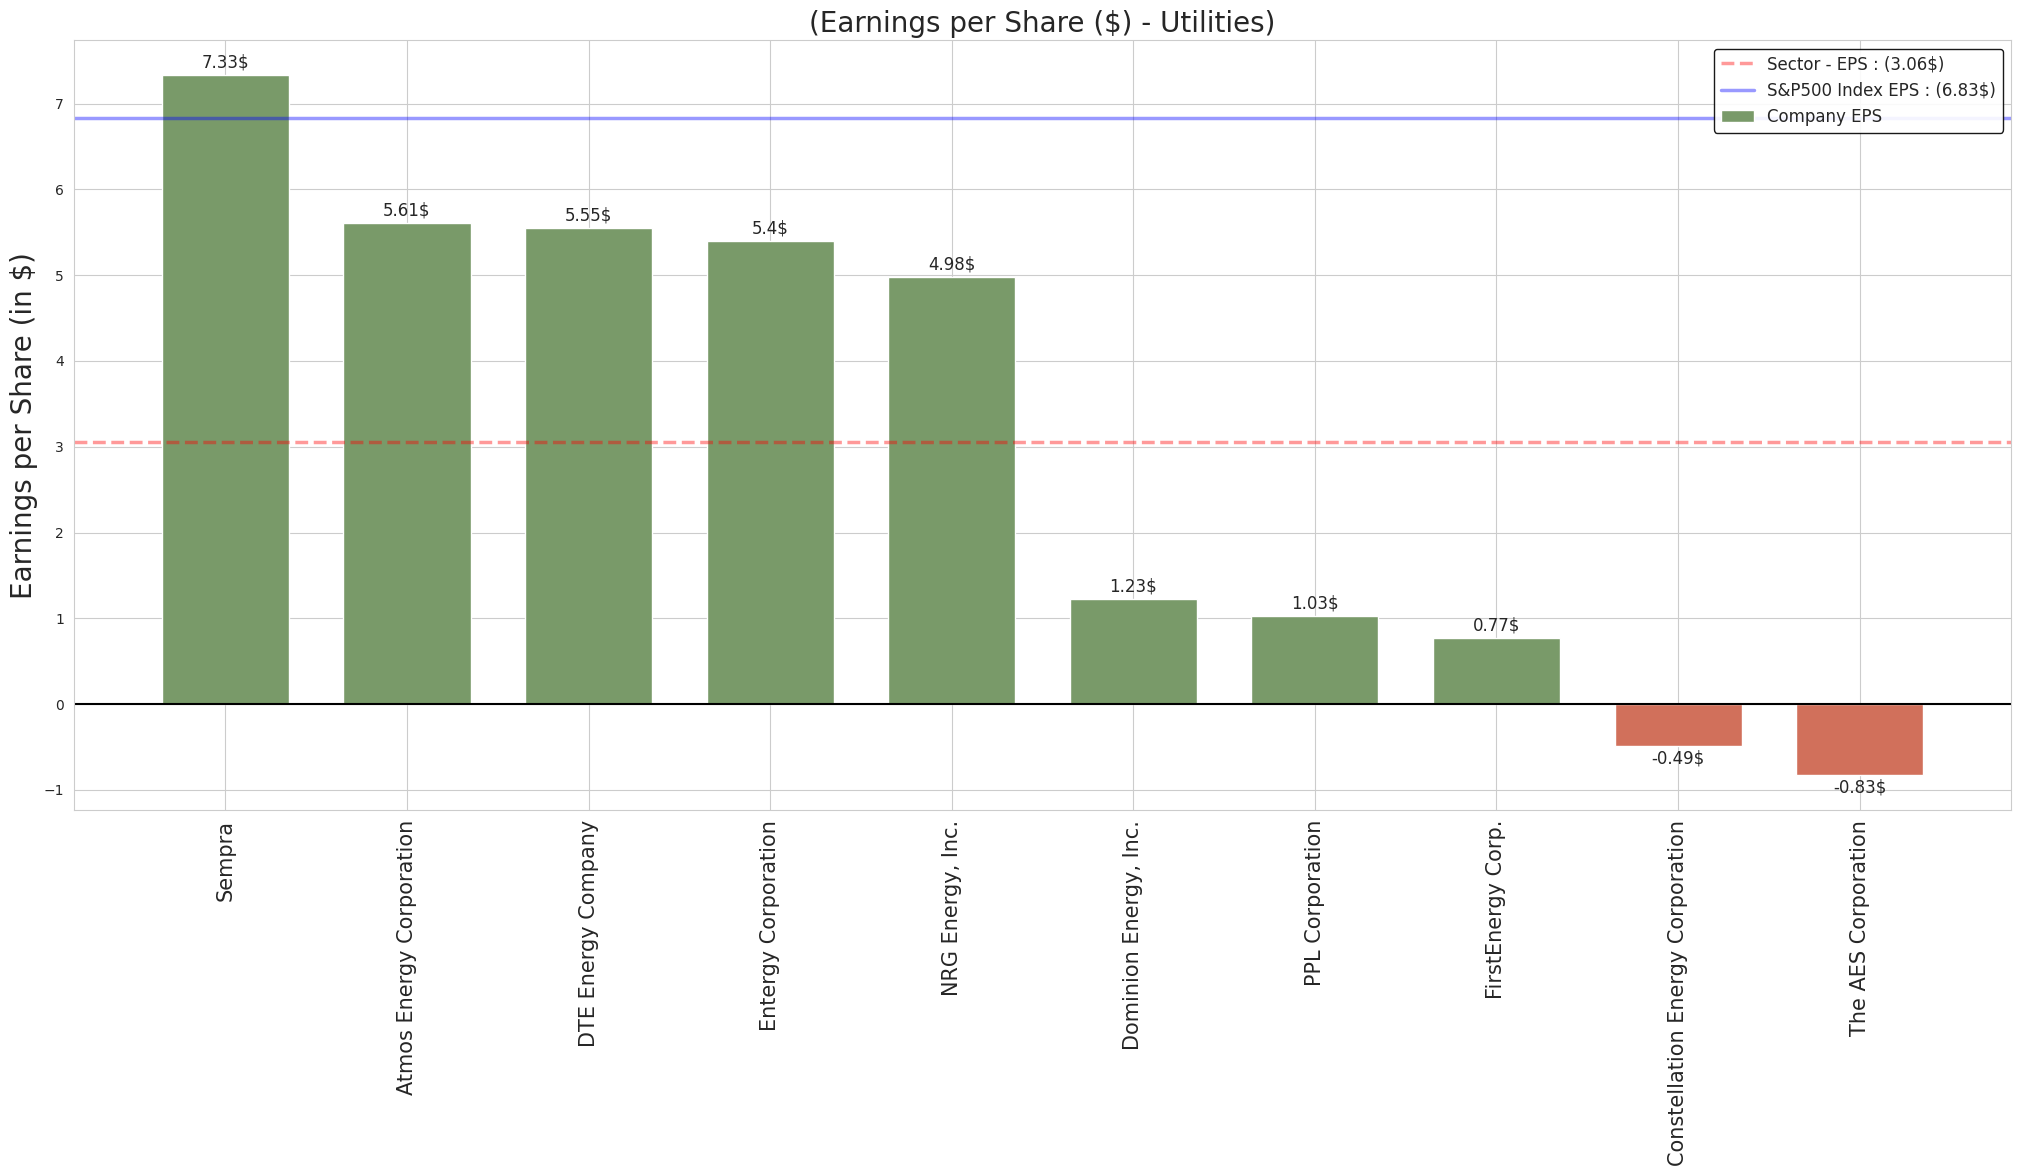

The company with the highest earnings per share in the Utilities sector is Sempra, with an EPS of $7.33.
The company with the lowest earnings per share in this sector is The AES Corporation, with an EPS of $-0.83.
The average earnings per share for companies in this sector is $3.06.


In [15]:
sector_list = sorted(df["Sector"].unique().tolist())
EPS_avg = df['EPS'].mean()

# Creating a function to plot the graphs for all the sectors in the S&P500 Index
def sector_eps_visual(i):
  plot_df = pd.read_csv(out_path + "Sector Wise Analysis/" + i + ".csv")

  # Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
  plot_df = plot_df.sort_values(by="EPS", ascending=False)
  plot_df = pd.concat([plot_df.head(5), plot_df.tail(5)])
  plot_df = plot_df.reset_index()
  plot_df = plot_df.set_index("Ticker")
  plot_df = plot_df.sort_values(by="EPS", ascending=False)


  # Set the plot style
  sns.set_style('whitegrid')

  # Setting the colours for the bars in the plot
  colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['EPS']]

  # Create the plot
  fig, ax = plt.subplots(figsize=(25, 10))
  ax.bar(plot_df.index, plot_df['EPS'], width=0.7, label='Company EPS', color = colours_for_bars)

  # Add values above each bar
  for i, val in enumerate(plot_df['EPS']):
    if val > 0:
      ax.text(i, val+0.04, str(round(val, 3)) + '$', ha='center', va='bottom', fontsize=12)
    else:
      ax.text(i, val-0.04, str(round(val, 2)) + '$', ha='center', va='top', fontsize=12)


  # Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
  ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
  ax.axhline(y=plot_df["EPS"].mean(), color='red', linestyle='--', linewidth=2.5, alpha = 0.4, label='Sector - EPS : ' + "(" + str(round(plot_df["EPS"].mean(),2)) + "$)")
  ax.axhline(y=EPS_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.4, label='S&P500 Index EPS : ' + "(" + str(round(EPS_avg, 2))+ "$)")

  # Set the y limits
  #ax.set_ylim(-130, 130)

  # Set the title and axis labels
  ax.set_title('(Earnings per Share ($) - ' + plot_df["Sector"][0] + ')', fontsize=20)
  ax.set_ylabel('Earnings per Share (in $)', fontsize=20)

  # Set the x-axis tick labels
  ax.set_xticks(plot_df.index)
  ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

  # Add a legend
  ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')


  # Show the plot
  plt.show()

  # Print the summary of the plot mentioning the highest and the lowest performers in the sector.
  print(f"The company with the highest earnings per share in the {plot_df['Sector'][0]} sector is {plot_df['Company Name'].iloc[0]}, with an EPS of ${plot_df['EPS'].iloc[0]:,.2f}.")
  print(f"The company with the lowest earnings per share in this sector is {plot_df['Company Name'].iloc[-1]}, with an EPS of ${plot_df['EPS'].iloc[-1]:,.2f}.")
  print(f"The average earnings per share for companies in this sector is ${plot_df['EPS'].mean():,.2f}.")

  # Deleting the above created DataFrame "plot_df" to avoid redundancy
  del plot_df

# We are deploying the above created function to plot all the required graphs, by looping through the list of sectors in the S&P500 Index
for i in sector_list:
  sector_eps_visual(i)

### Comparing the EPS of all the sectors in the Index

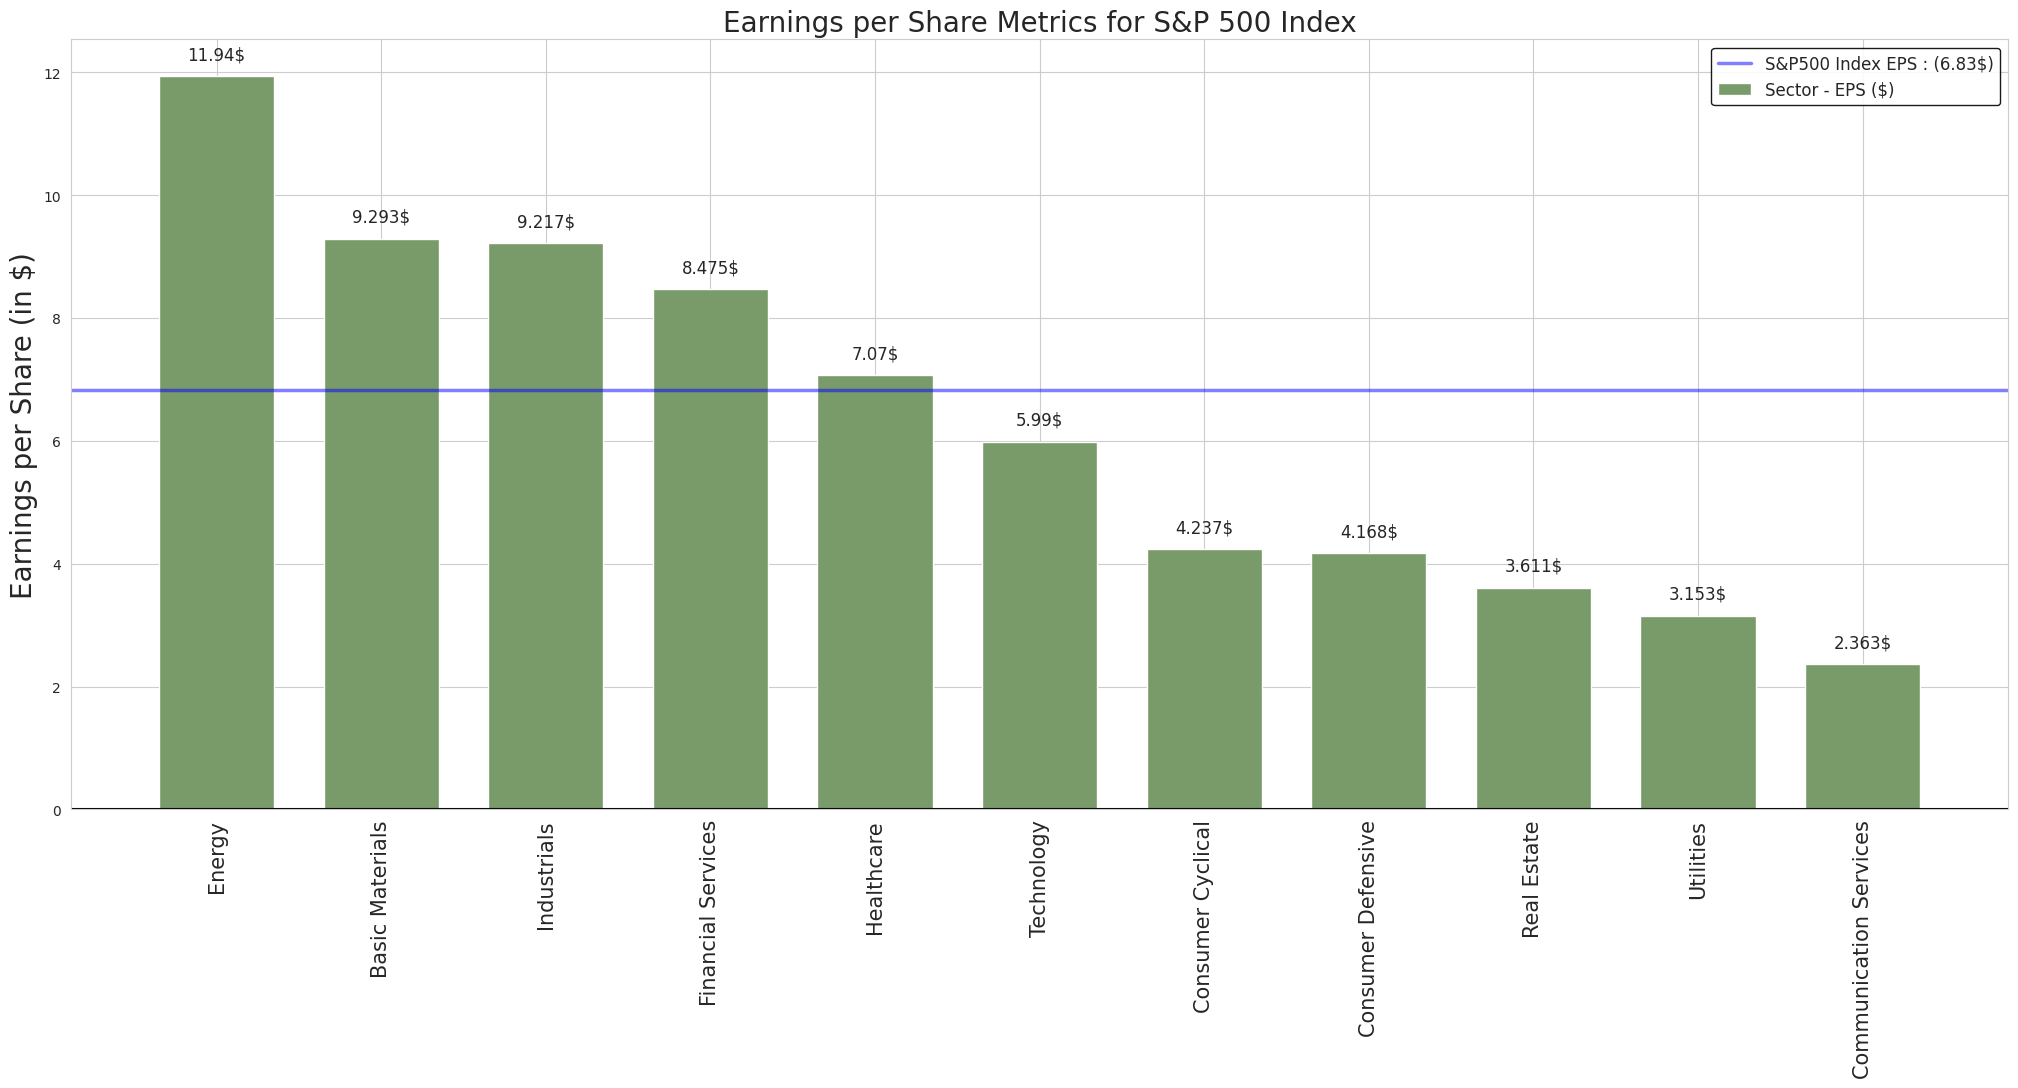

The sector with the highest earnings per share of this year in the S&P500 Index is Energy, with Earnings per Share at 11.94$.
The sector with the least earnings per share of this year is Communication Services, with Earnings per Share at 2.36$.
The S&P500 Index Average Earnings per Share of this year is at 6.83$.


In [16]:
plot_df = pd.read_csv(out_path + "Sector Performance.csv")

# Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
plot_df = plot_df.set_index("Sector")
plot_df = plot_df.sort_values(by="Sector - EPS", ascending=False)

# Set the plot style
sns.set_style('whitegrid')

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Sector - EPS']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Sector - EPS'], width=0.7, label='Sector - EPS ($)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Sector - EPS']):
  ax.text(i, val + 0.5, str(round(val, 3)) + '$', ha='center', va='top', fontsize=12)

# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=EPS_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.5, label='S&P500 Index EPS : ' + "(" + str(round(EPS_avg, 2)) + "$)")

# Set the title and axis labels
ax.set_title('Earnings per Share Metrics for S&P 500 Index', fontsize=20)
ax.set_ylabel('Earnings per Share (in $)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df.index, rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

# Print the summary of the plot mentioning the most and the least profitable sectors.
print(f"The sector with the highest earnings per share of this year in the S&P500 Index is {plot_df.index[0]}, with Earnings per Share at {plot_df['Sector - EPS'].iloc[0]:.2f}$.")
print(f"The sector with the least earnings per share of this year is {plot_df.index[-1]}, with Earnings per Share at {plot_df['Sector - EPS'].iloc[-1]:.2f}$.")
print(f"The S&P500 Index Average Earnings per Share of this year is at {round(EPS_avg, 2):.2f}$.")

# Deleting the above created DataFrame "plot_df" to avoid redundancy
del plot_df

 ## Dividends Yield Analysis

Now, let's see if we can indentify the top 10 performers and the least 10 performers in terms of **Dividend Yield** in the S&P500 Index.

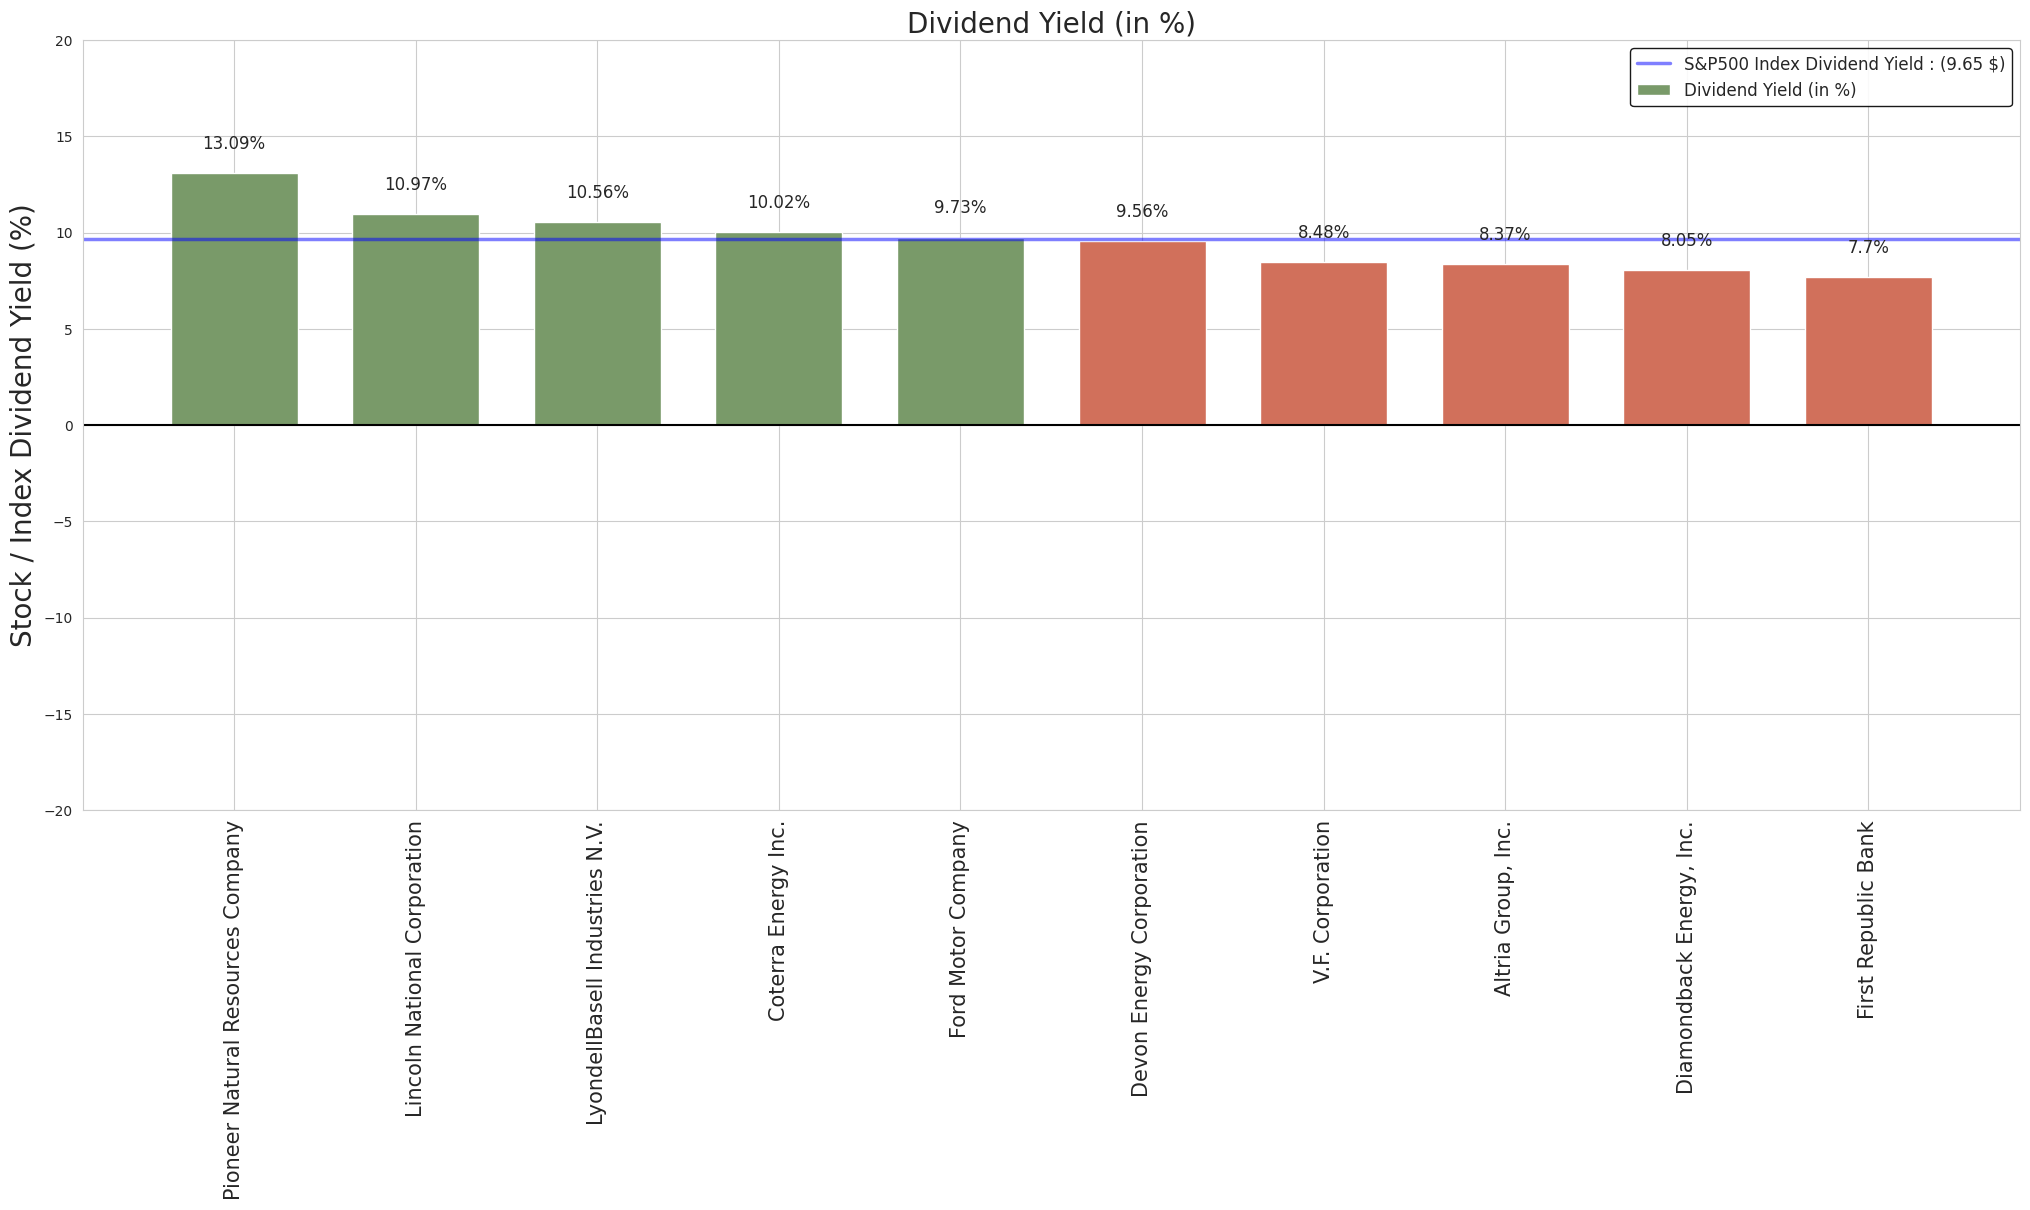

In [17]:
ploot_df = pd.read_csv("/content/drive/MyDrive/St Clair/Project/Output Data/stock_data.csv")
ploot_df = ploot_df.sort_values(by="Dividend Yield", ascending = False)

plot_df = pd.concat([ploot_df.head(10)])
plot_df = plot_df.reset_index()

# Set the plot style
sns.set_style("whitegrid")

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < plot_df["Dividend Yield"].mean() else '#799A69' for val in plot_df['Dividend Yield']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Dividend Yield'], width=0.7, label='Dividend Yield (in %)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Dividend Yield']):
  if val > 0:
    ax.text(i, val + 2, str(round(val, 2)) + '%', ha='center', va='top', fontsize=12)
  else:
    ax.text(i, val - 2, str(round(val, 2)) + '%', ha='center', va='bottom', fontsize=12)


# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=plot_df["Dividend Yield"].mean(), color='blue', linestyle='-', linewidth=2.5, alpha=0.5, label='S&P500 Index Dividend Yield : ' + "(" + str(round(plot_df["Dividend Yield"].mean(), 2)) + " $)")

# Set the y limits
ax.set_ylim(-20, 20)

# Set the title and axis labels
ax.set_title('Dividend Yield (in %)', fontsize=20)
ax.set_ylabel('Stock / Index Dividend Yield (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

del plot_df, ploot_df

### Sector Dividends Yield Analysis (Visualisations)

To gain insights into the dividend payout potential of companies within each sector of the S&P 500 Index, we will calculate and visualize the Dividend Yield ratio. The Dividend Yield ratio measures the percentage of a company's stock price that is paid out in dividends to shareholders. By calculating the Dividend Yield for each company within a sector, we can identify which companies are offering the highest dividend payouts to their shareholders. We will also calculate the average Dividend Yield for each sector to understand which sectors are the most profitable for dividend investors.

Using data visualization tools, we will create charts and graphs to make it easy to compare the Dividend Yield of individual companies and sectors within the index. By examining these visualizations, we can identify which sectors are generating the highest dividend yields and which companies are the most profitable for dividend investors. Overall, this analysis will provide valuable insights into the dividend payout potential of the S&P 500 Index and its constituent sectors, which can be useful for investors and analysts seeking to make informed investment decisions.

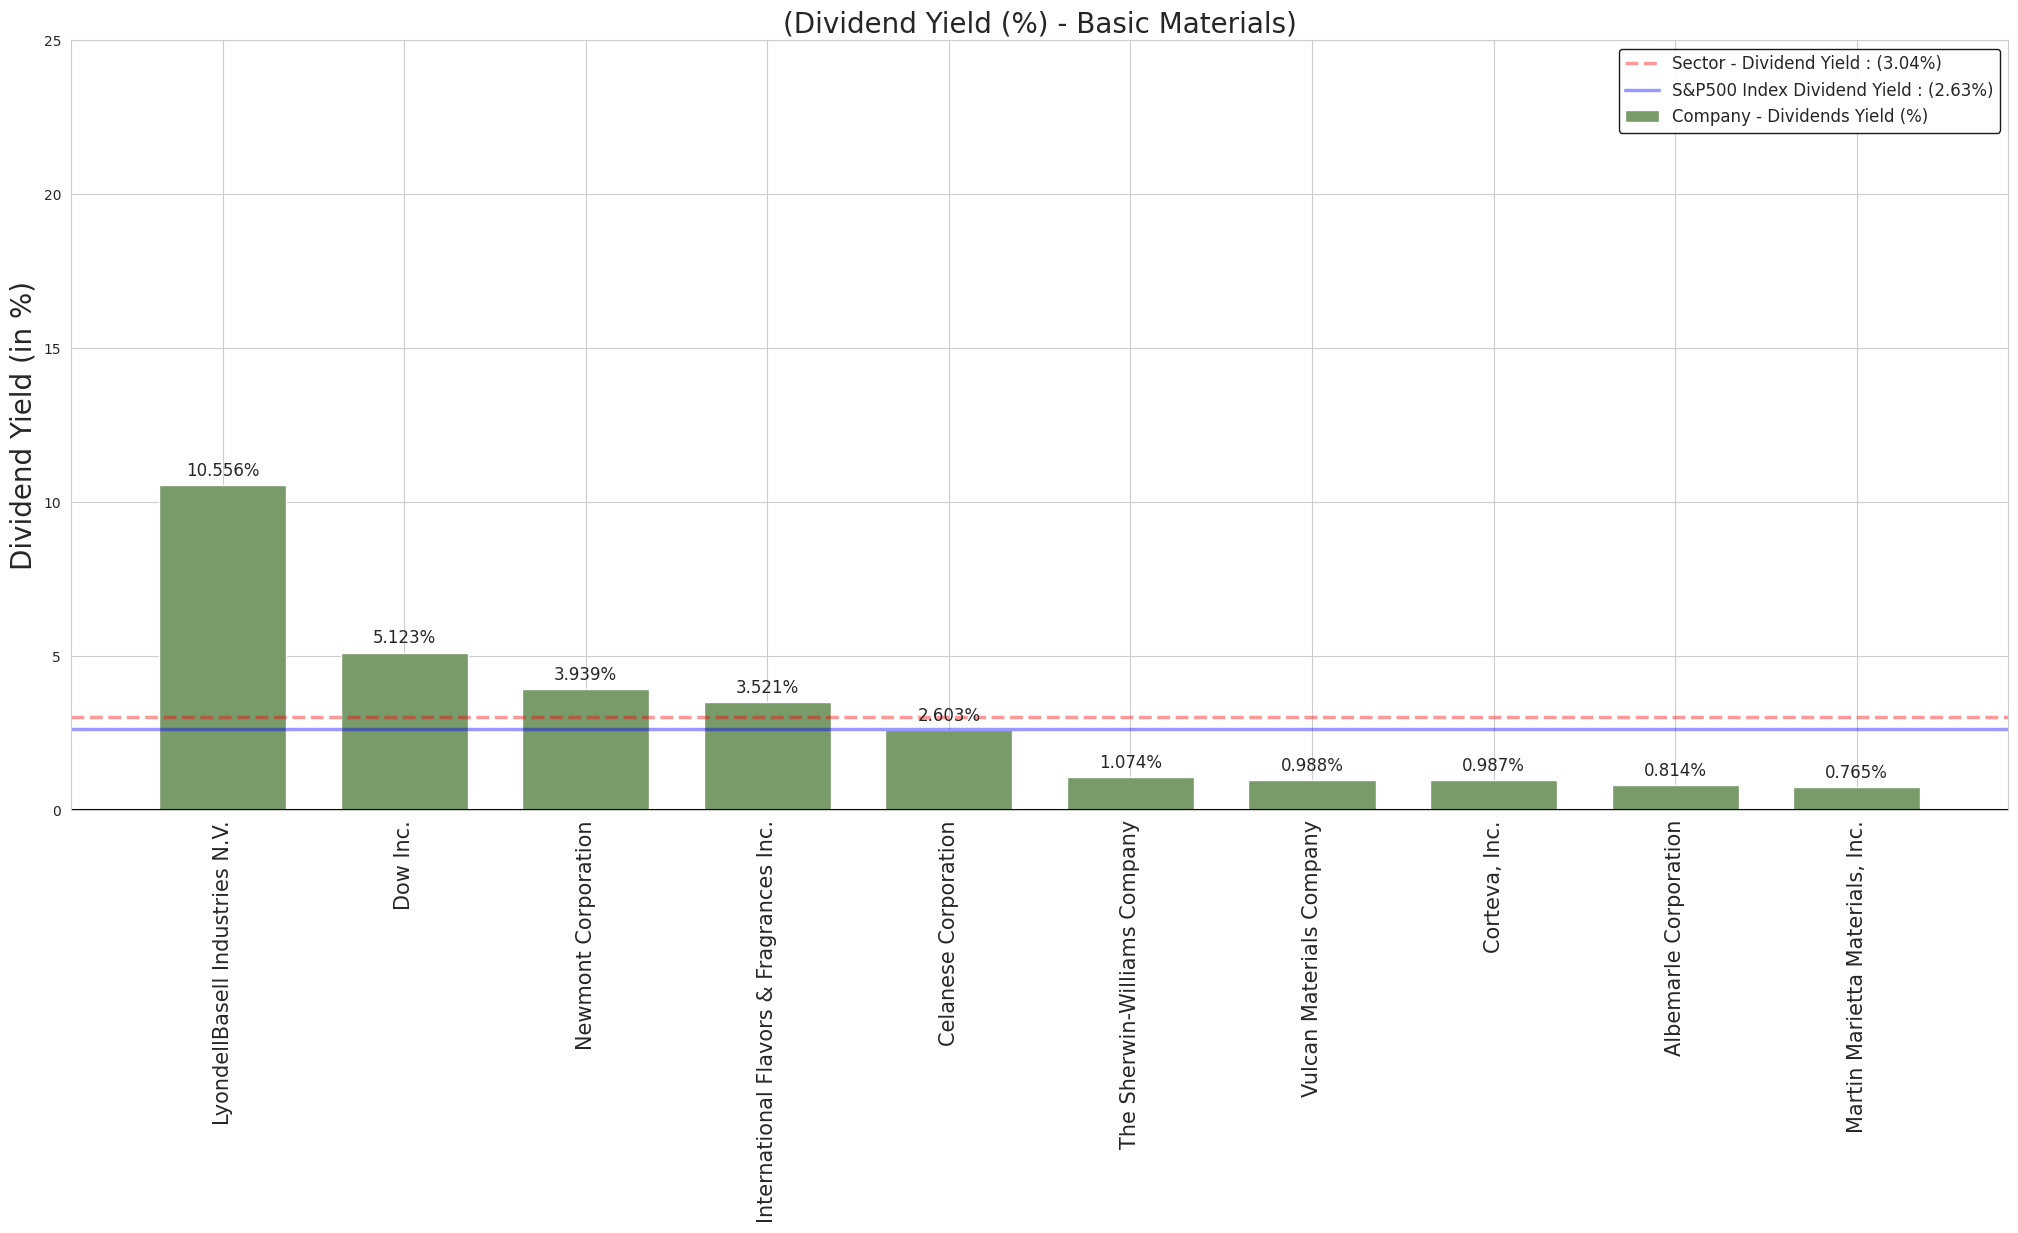

The company with the highest dividend yield in the Basic Materials sector is LyondellBasell Industries N.V., with a yield of 10.56%.
The company with the lowest dividend yield in this sector is Martin Marietta Materials, Inc., with a yield of 0.76%.
The average dividend yield for companies in this sector this year is 3.04%.


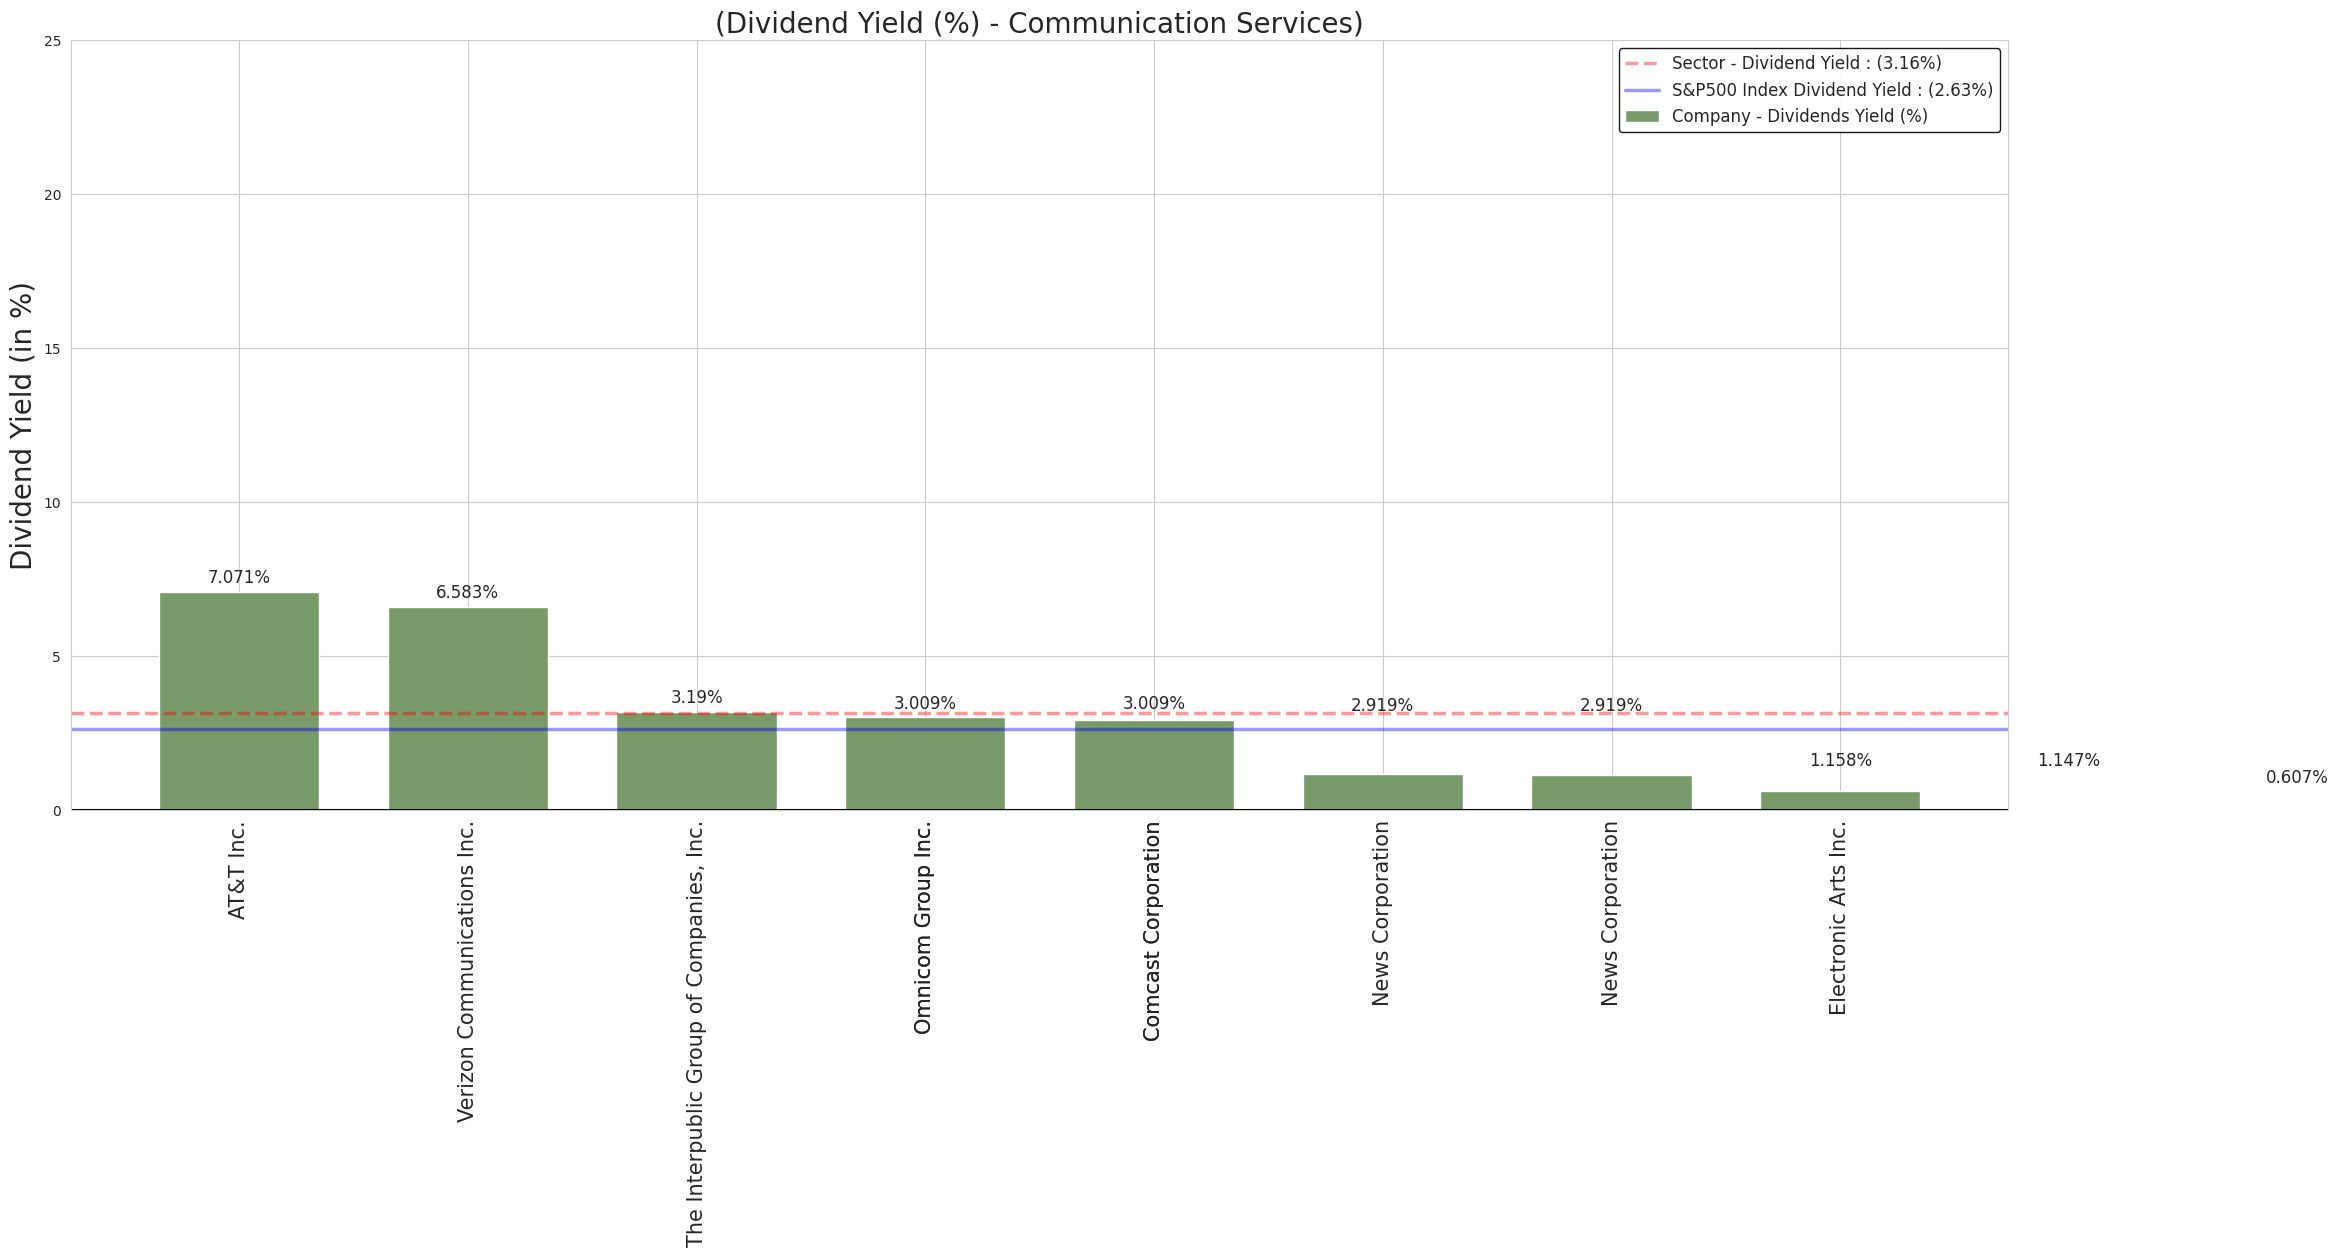

The company with the highest dividend yield in the Communication Services sector is AT&T Inc., with a yield of 7.07%.
The company with the lowest dividend yield in this sector is Electronic Arts Inc., with a yield of 0.61%.
The average dividend yield for companies in this sector this year is 3.16%.


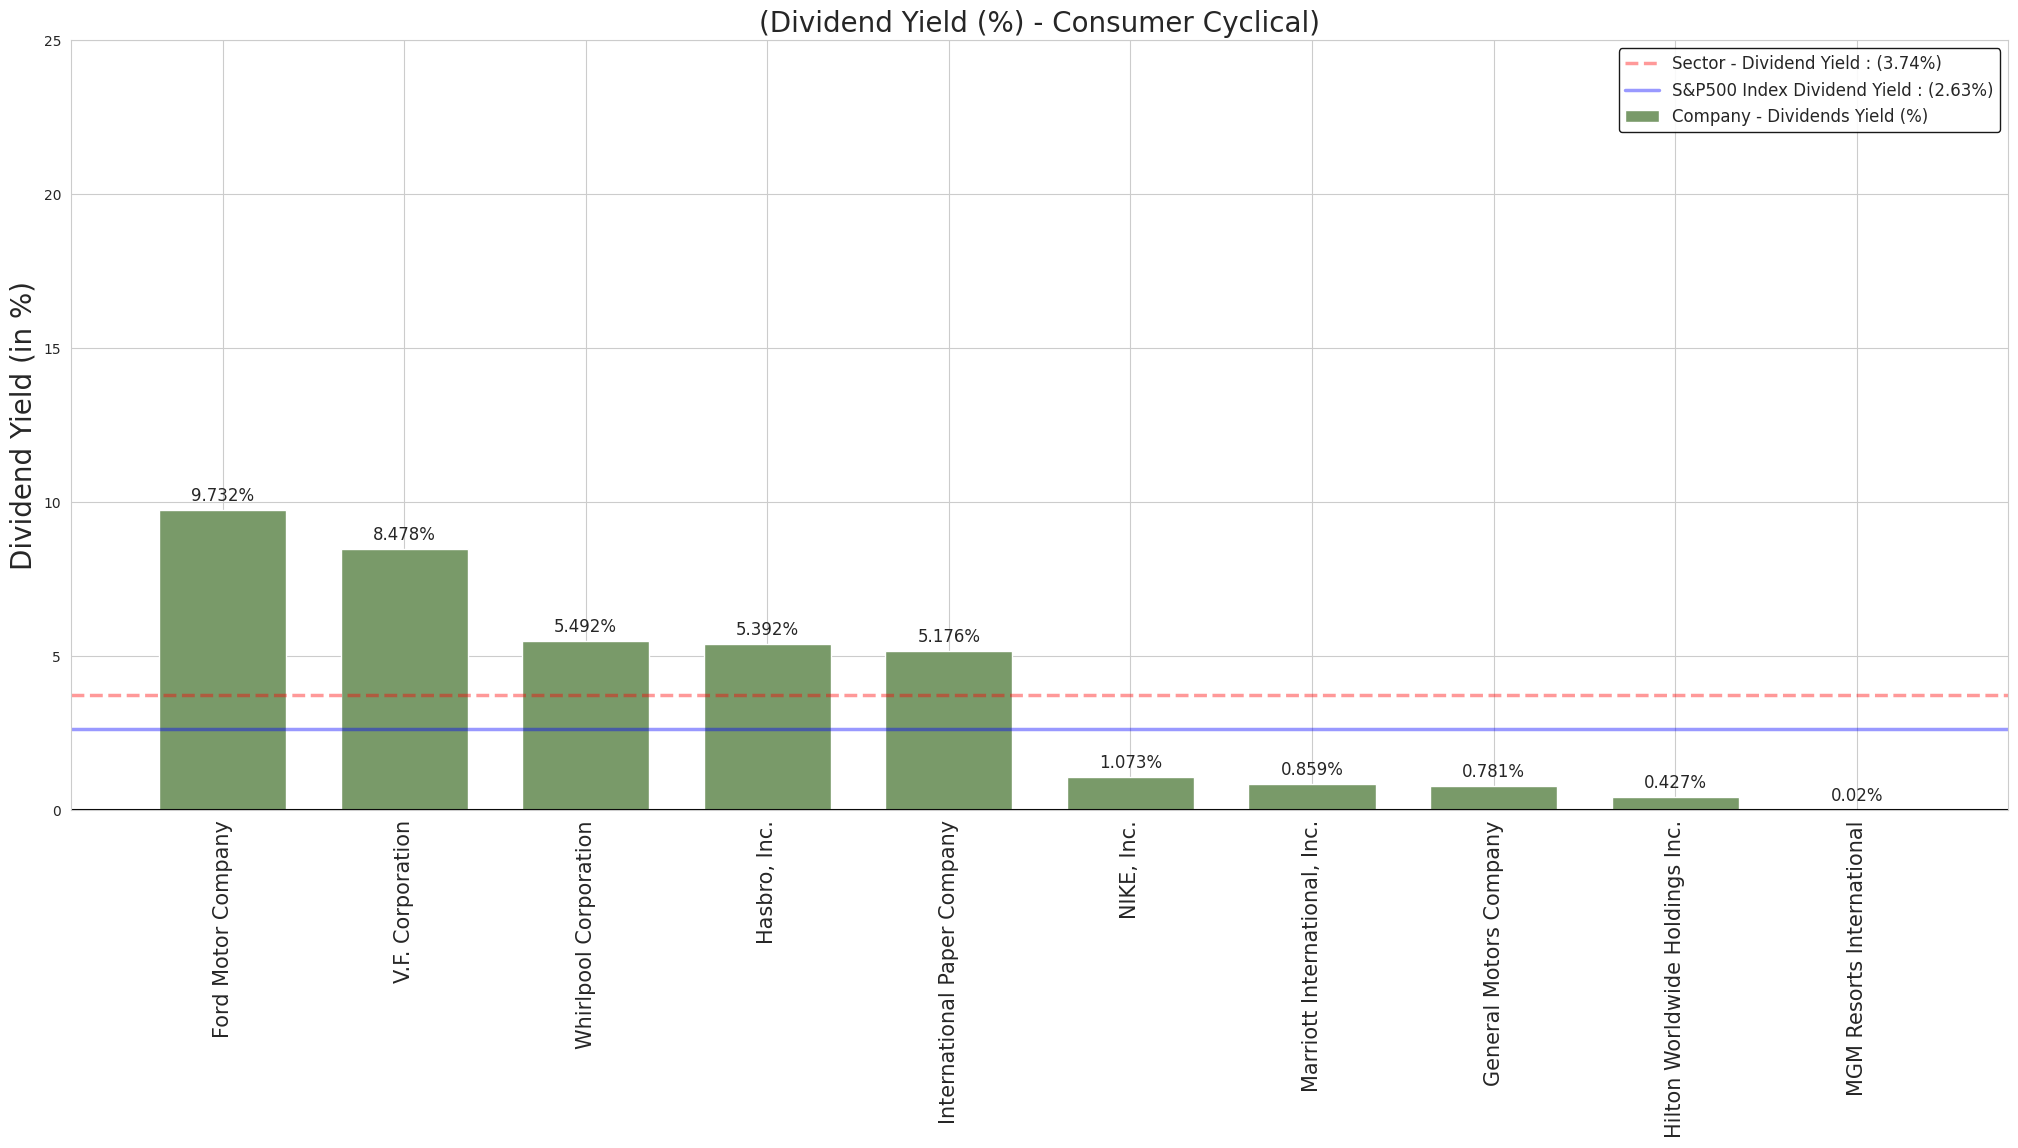

The company with the highest dividend yield in the Consumer Cyclical sector is Ford Motor Company, with a yield of 9.73%.
The company with the lowest dividend yield in this sector is MGM Resorts International, with a yield of 0.02%.
The average dividend yield for companies in this sector this year is 3.74%.


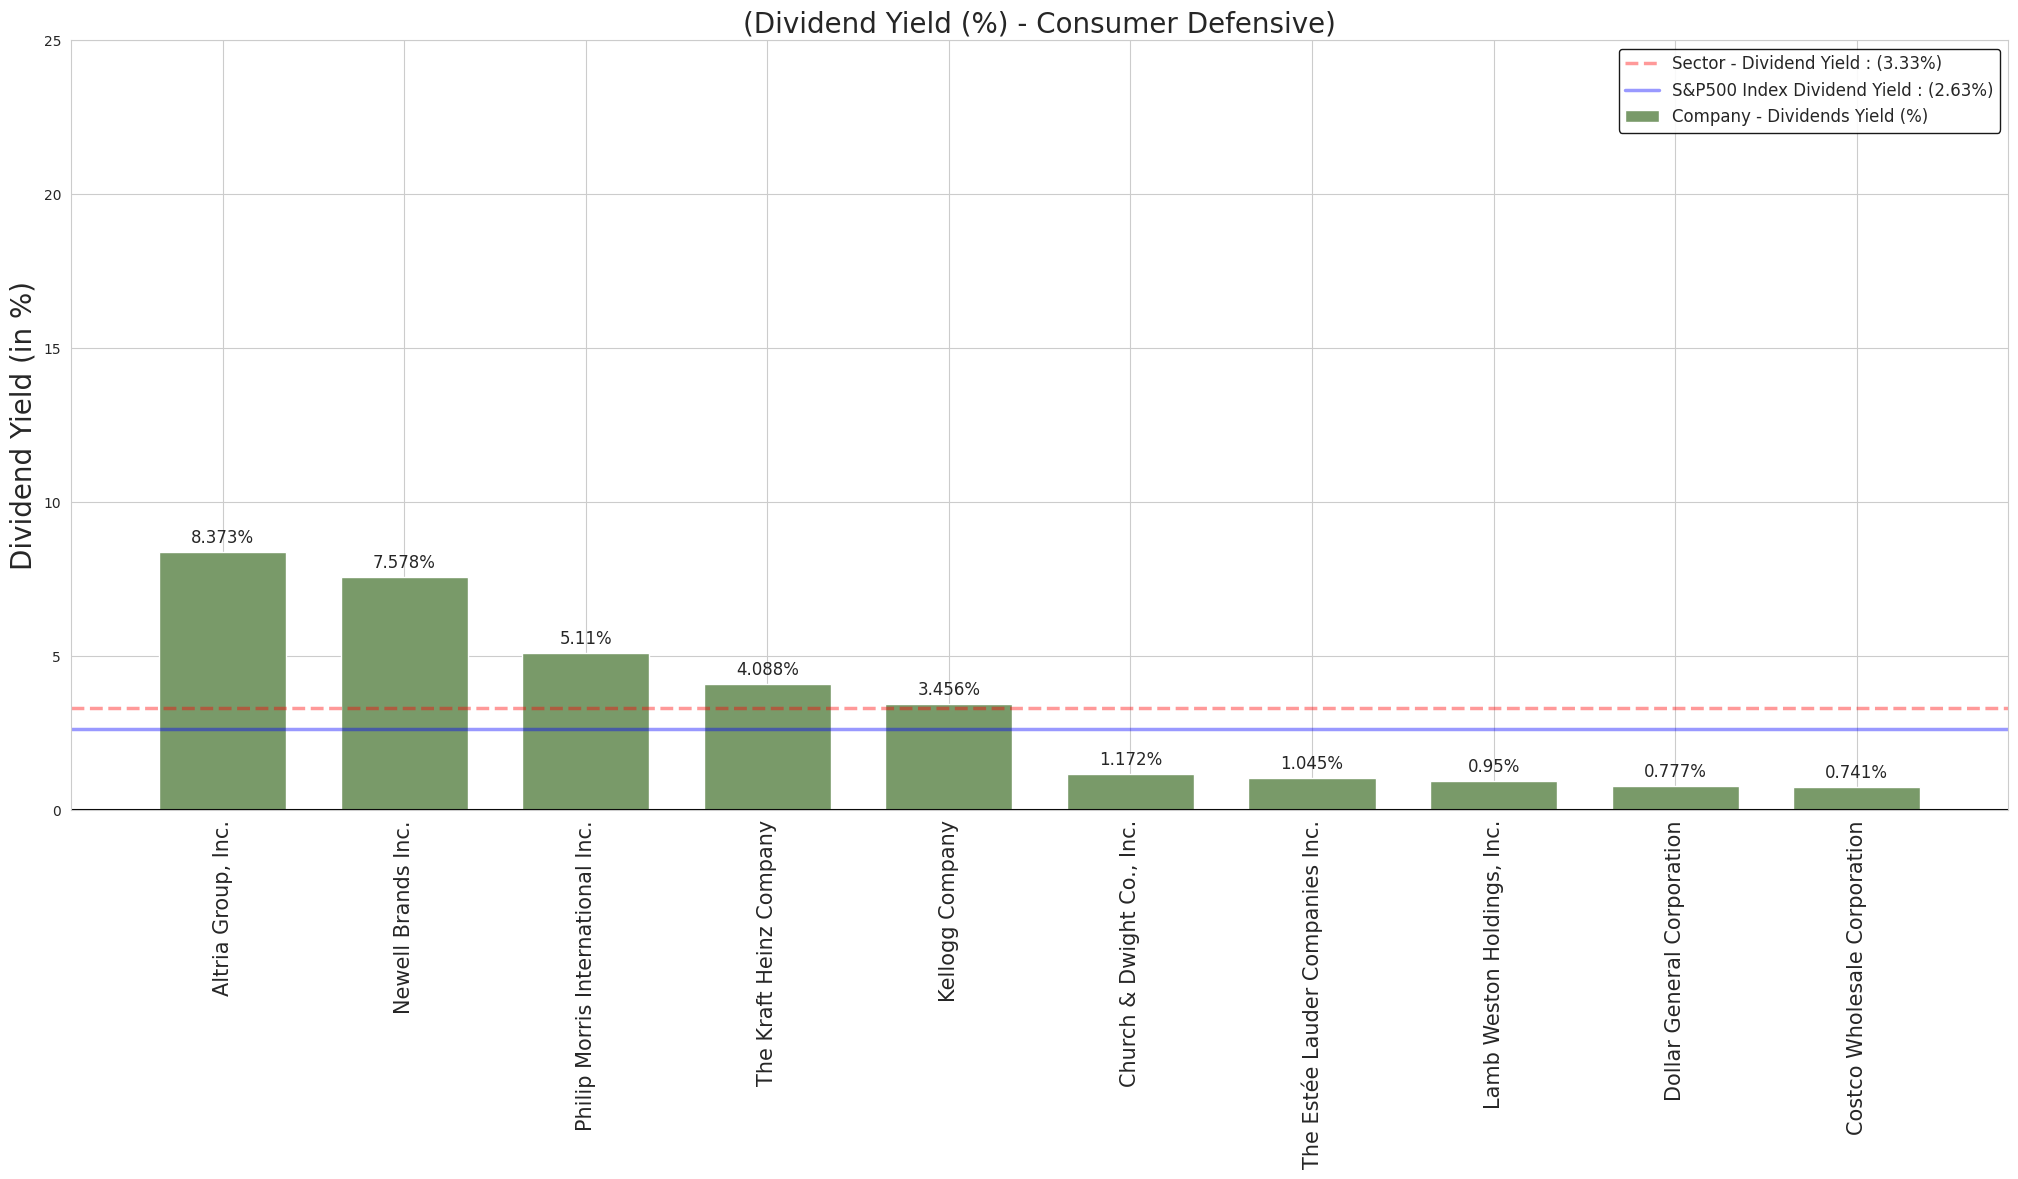

The company with the highest dividend yield in the Consumer Defensive sector is Altria Group, Inc., with a yield of 8.37%.
The company with the lowest dividend yield in this sector is Costco Wholesale Corporation, with a yield of 0.74%.
The average dividend yield for companies in this sector this year is 3.33%.


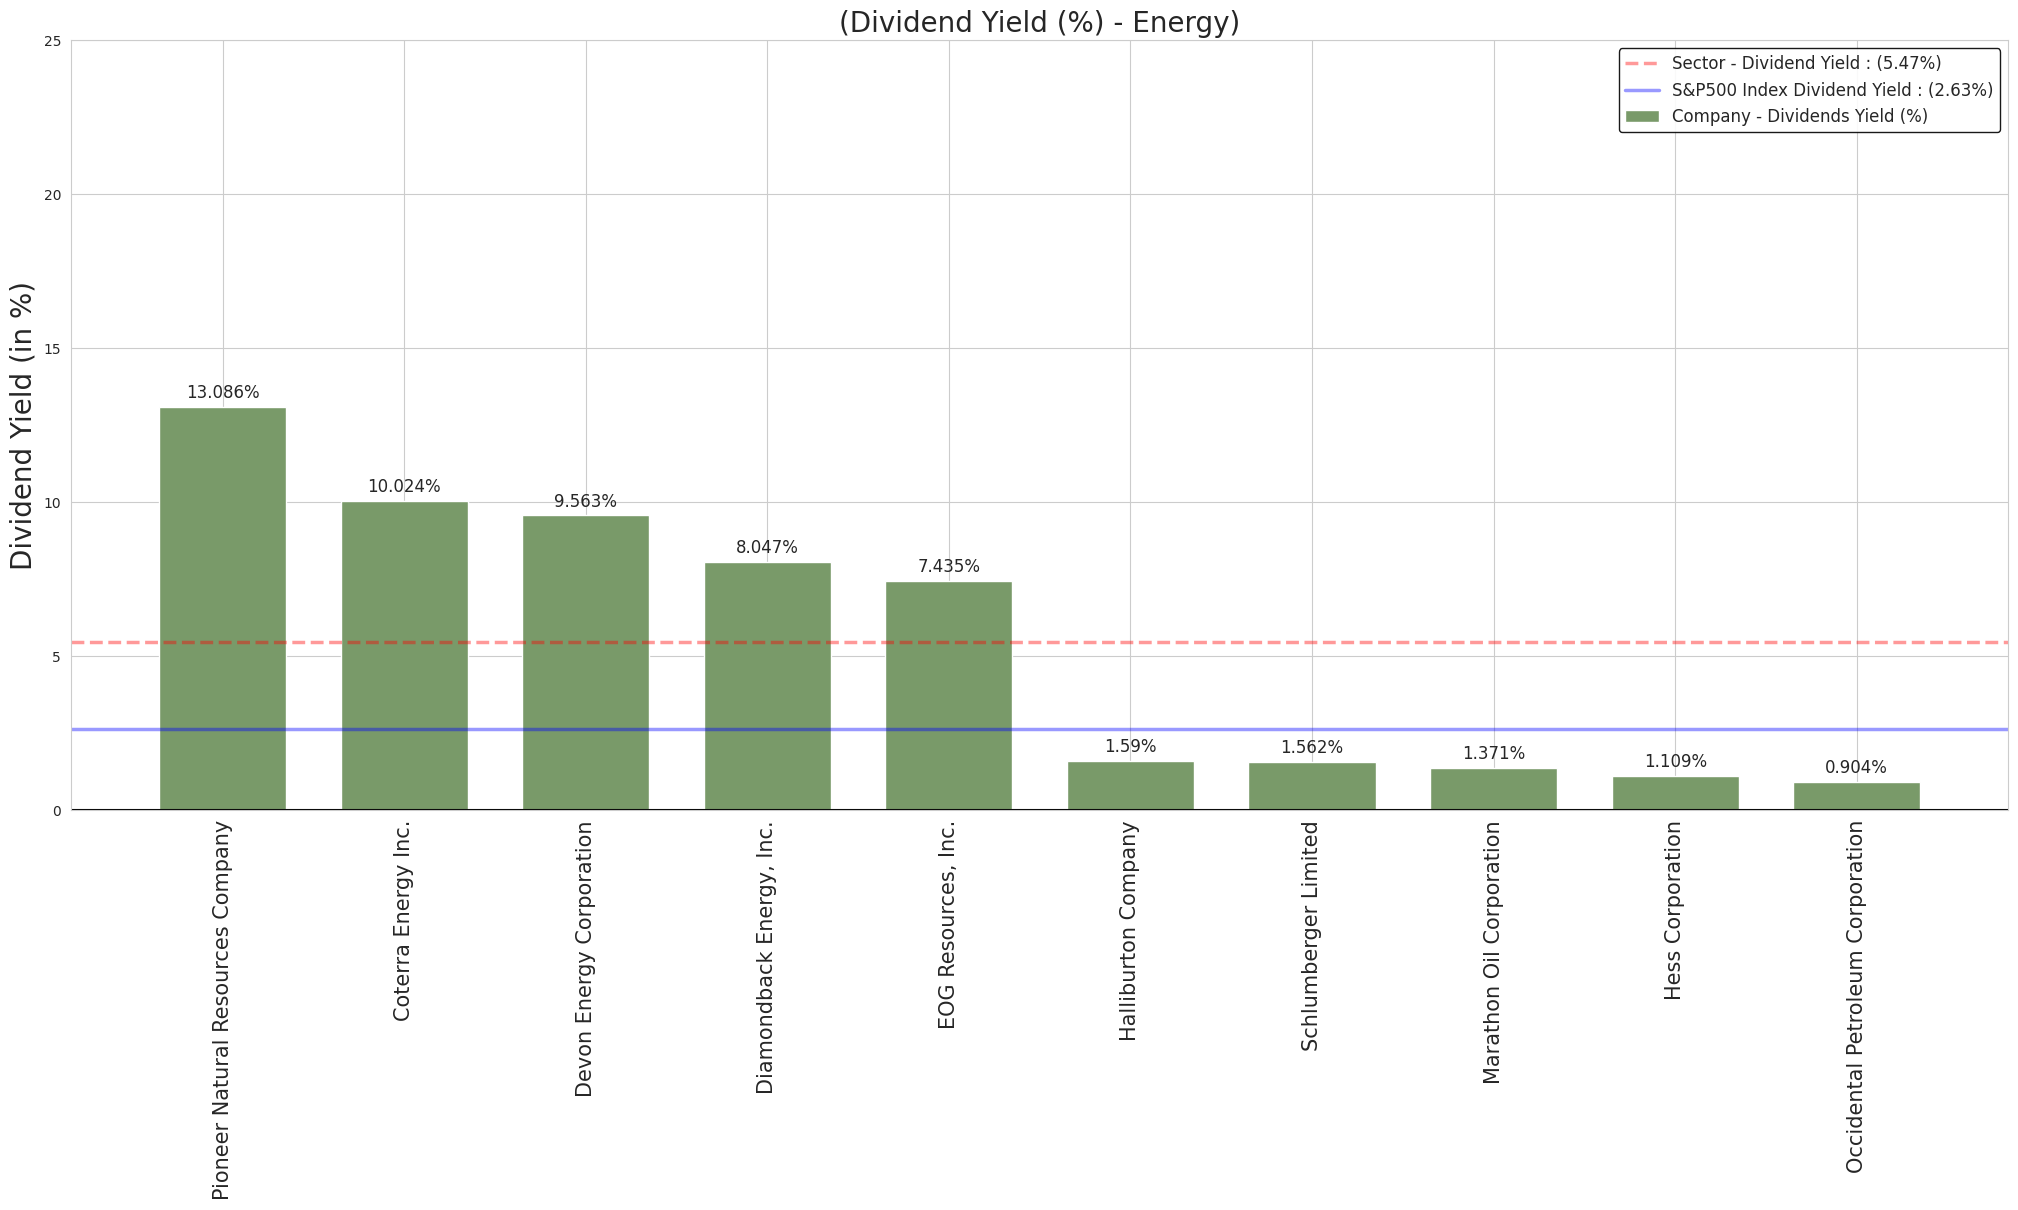

The company with the highest dividend yield in the Energy sector is Pioneer Natural Resources Company, with a yield of 13.09%.
The company with the lowest dividend yield in this sector is Occidental Petroleum Corporation, with a yield of 0.90%.
The average dividend yield for companies in this sector this year is 5.47%.


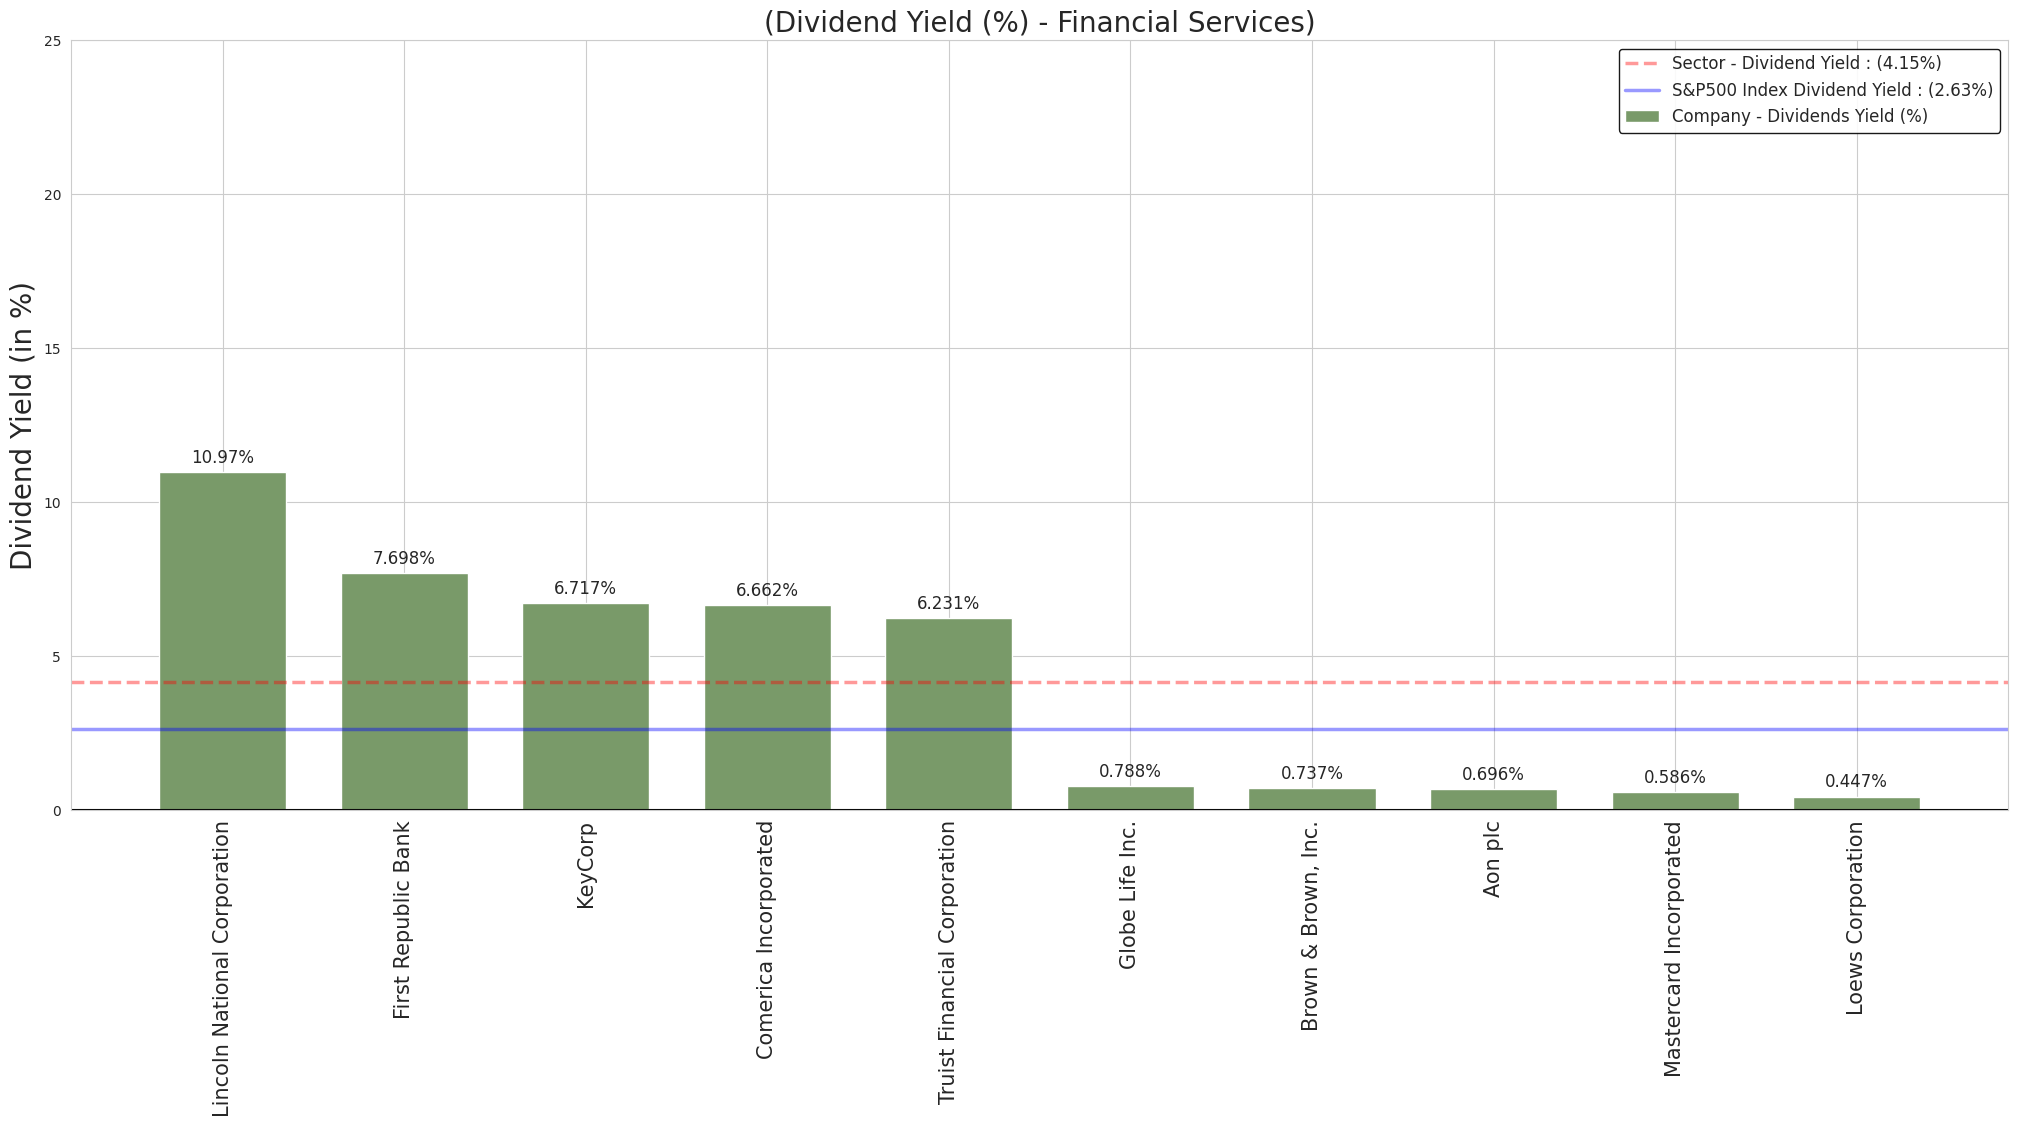

The company with the highest dividend yield in the Financial Services sector is Lincoln National Corporation, with a yield of 10.97%.
The company with the lowest dividend yield in this sector is Loews Corporation, with a yield of 0.45%.
The average dividend yield for companies in this sector this year is 4.15%.


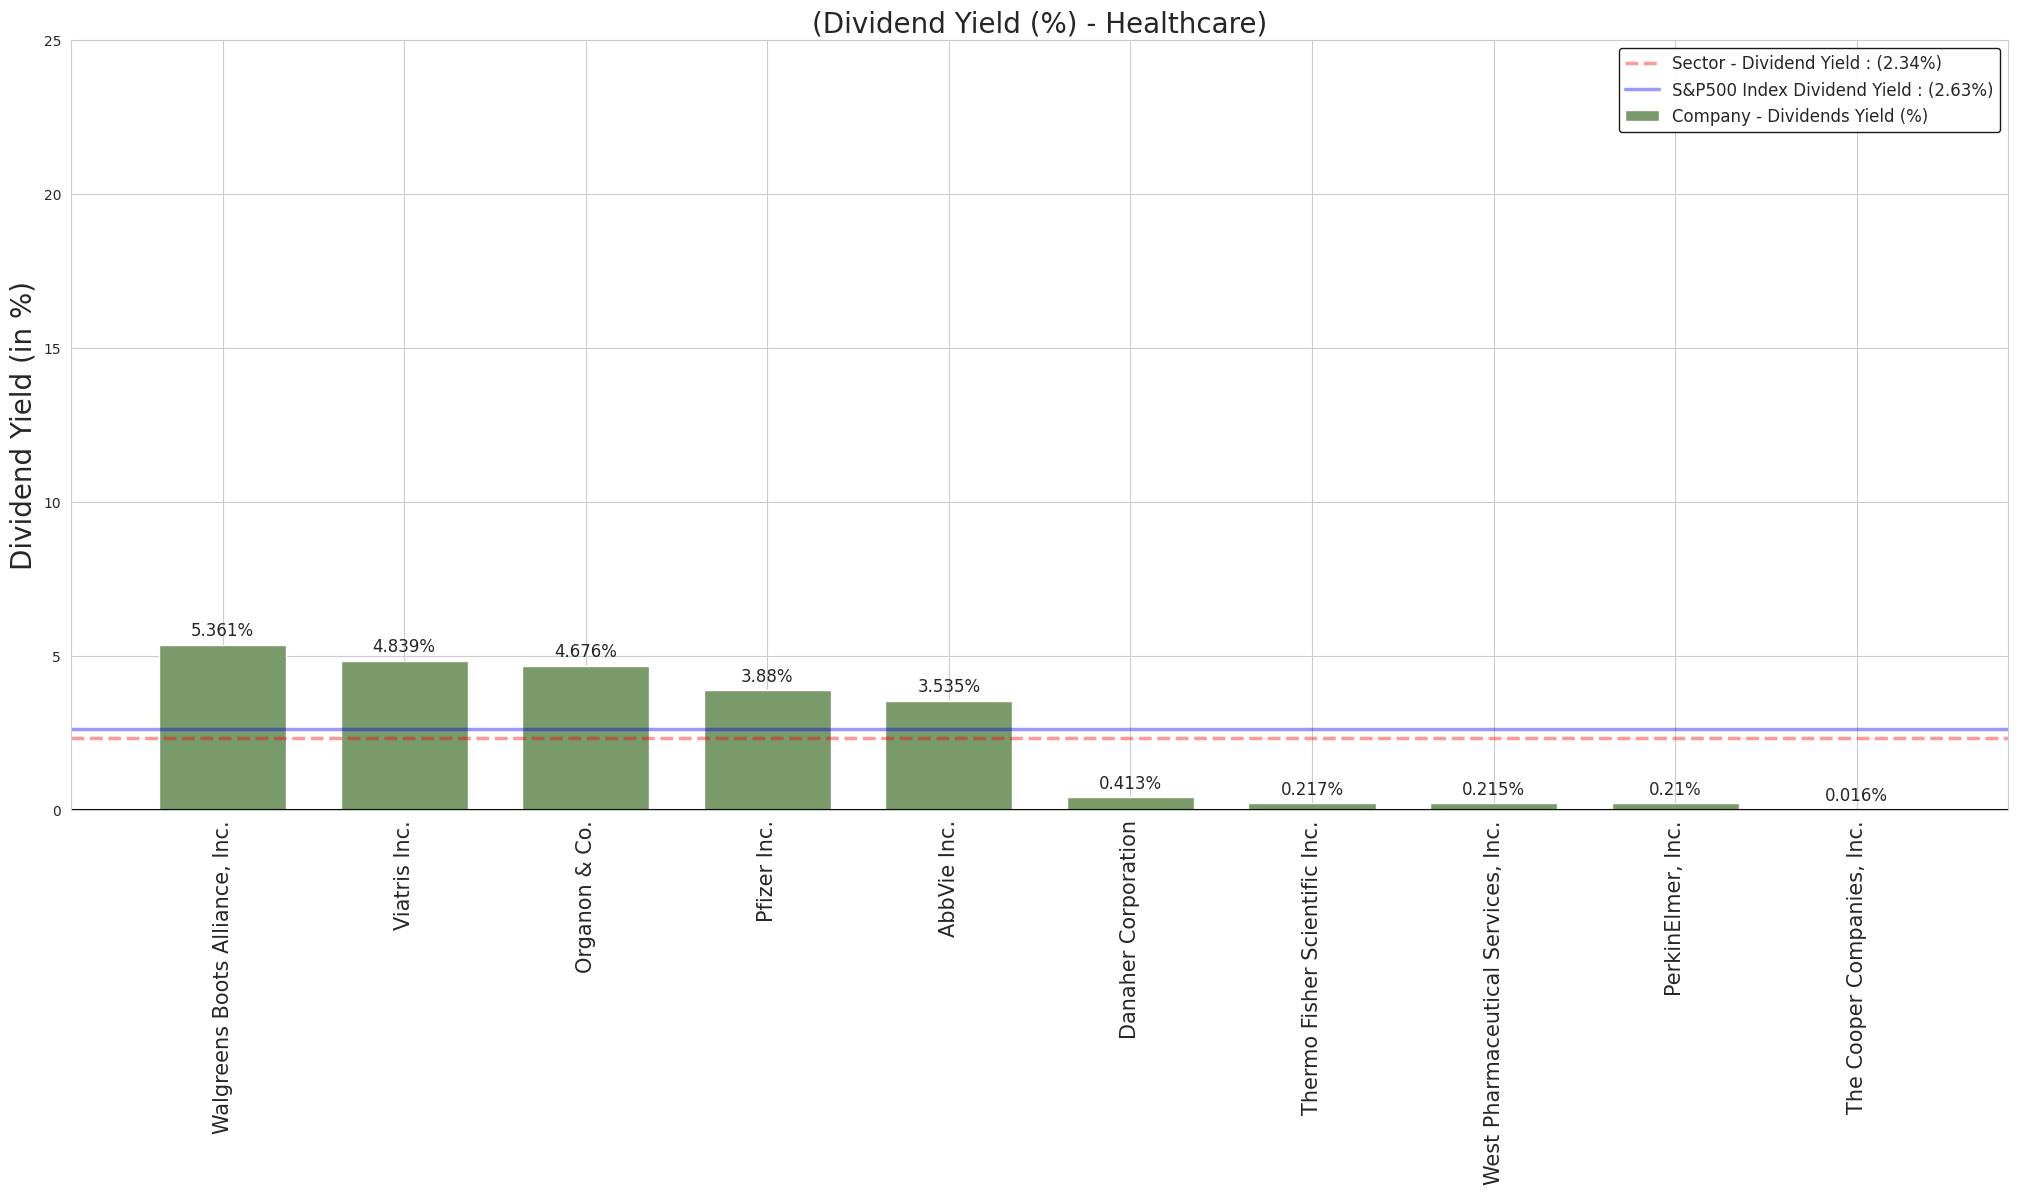

The company with the highest dividend yield in the Healthcare sector is Walgreens Boots Alliance, Inc., with a yield of 5.36%.
The company with the lowest dividend yield in this sector is The Cooper Companies, Inc., with a yield of 0.02%.
The average dividend yield for companies in this sector this year is 2.34%.


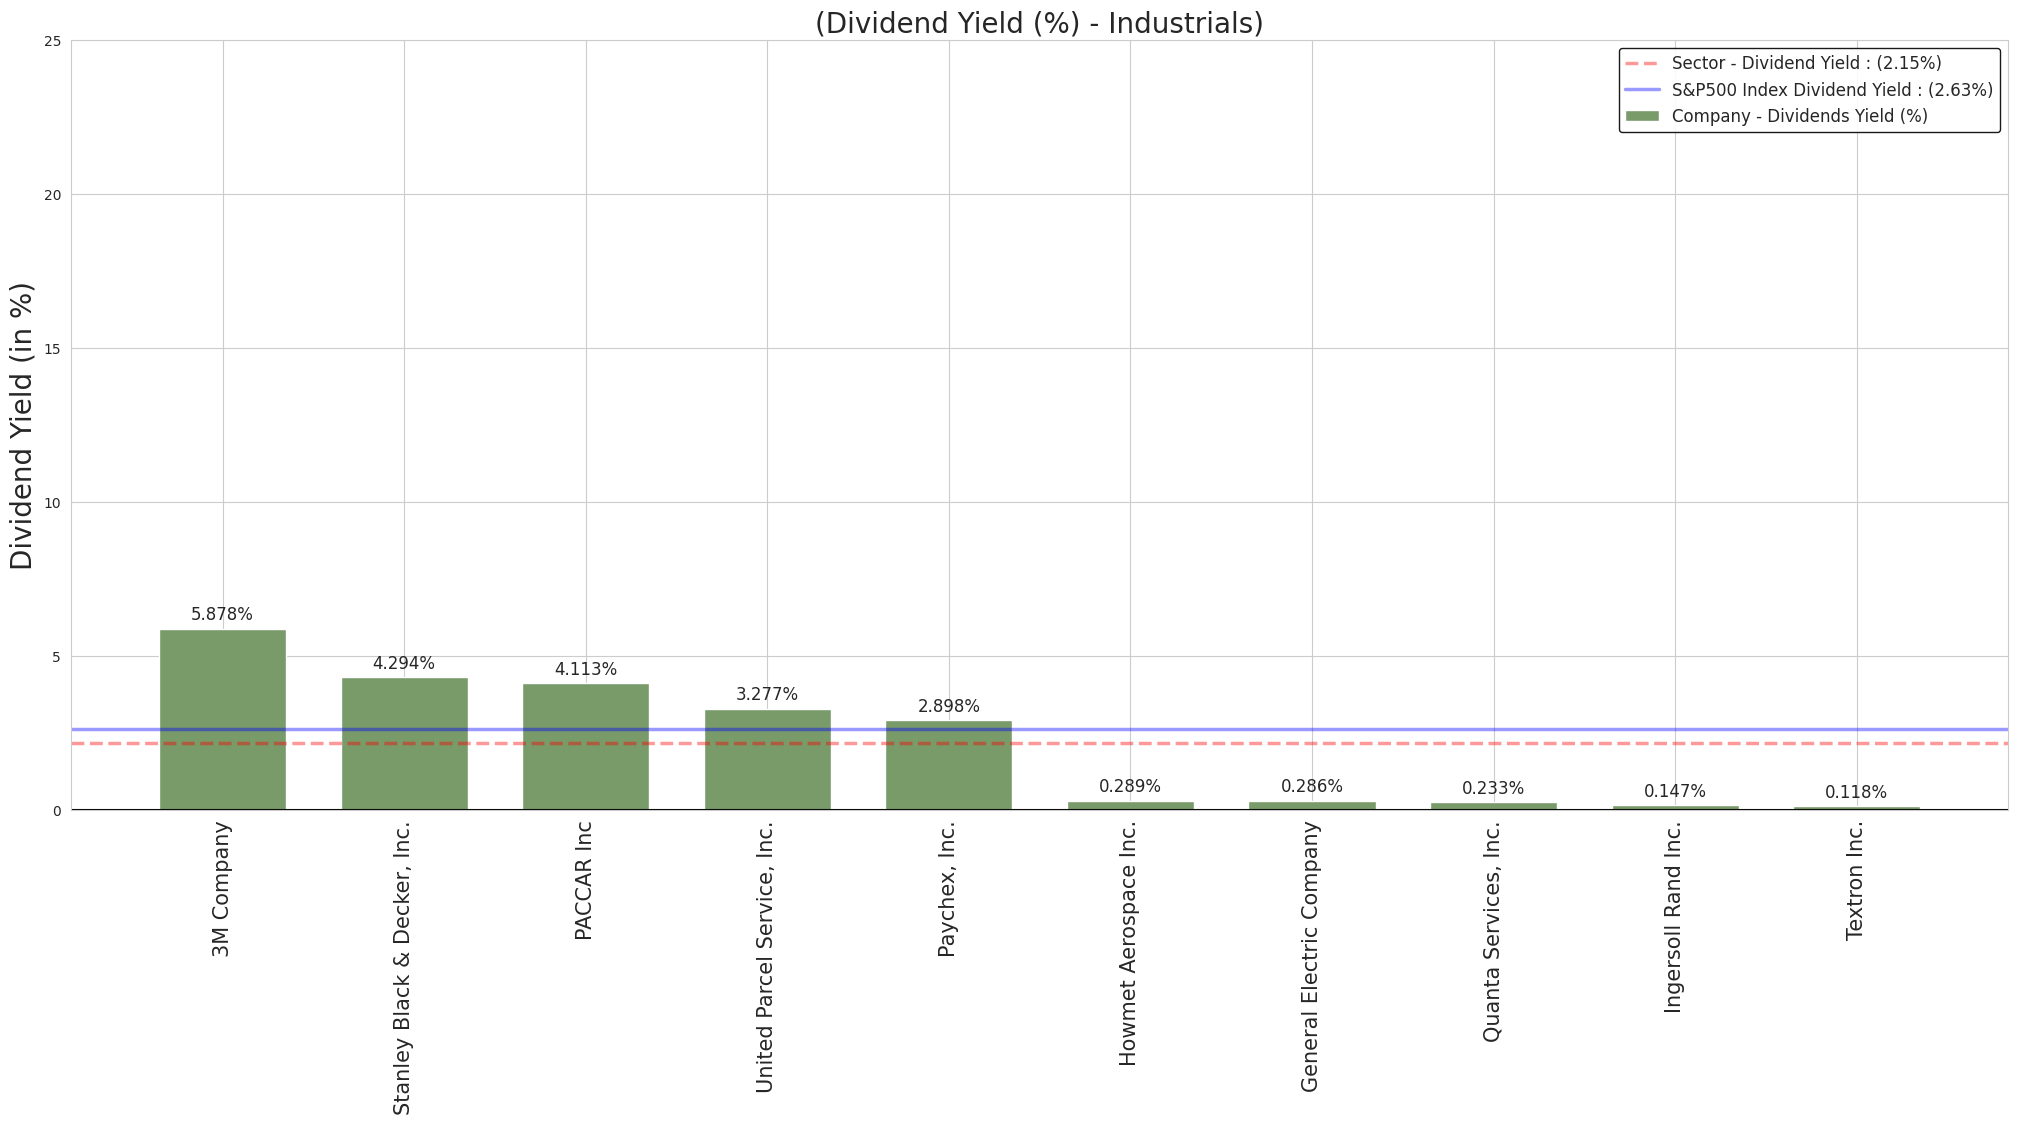

The company with the highest dividend yield in the Industrials sector is 3M Company, with a yield of 5.88%.
The company with the lowest dividend yield in this sector is Textron Inc., with a yield of 0.12%.
The average dividend yield for companies in this sector this year is 2.15%.


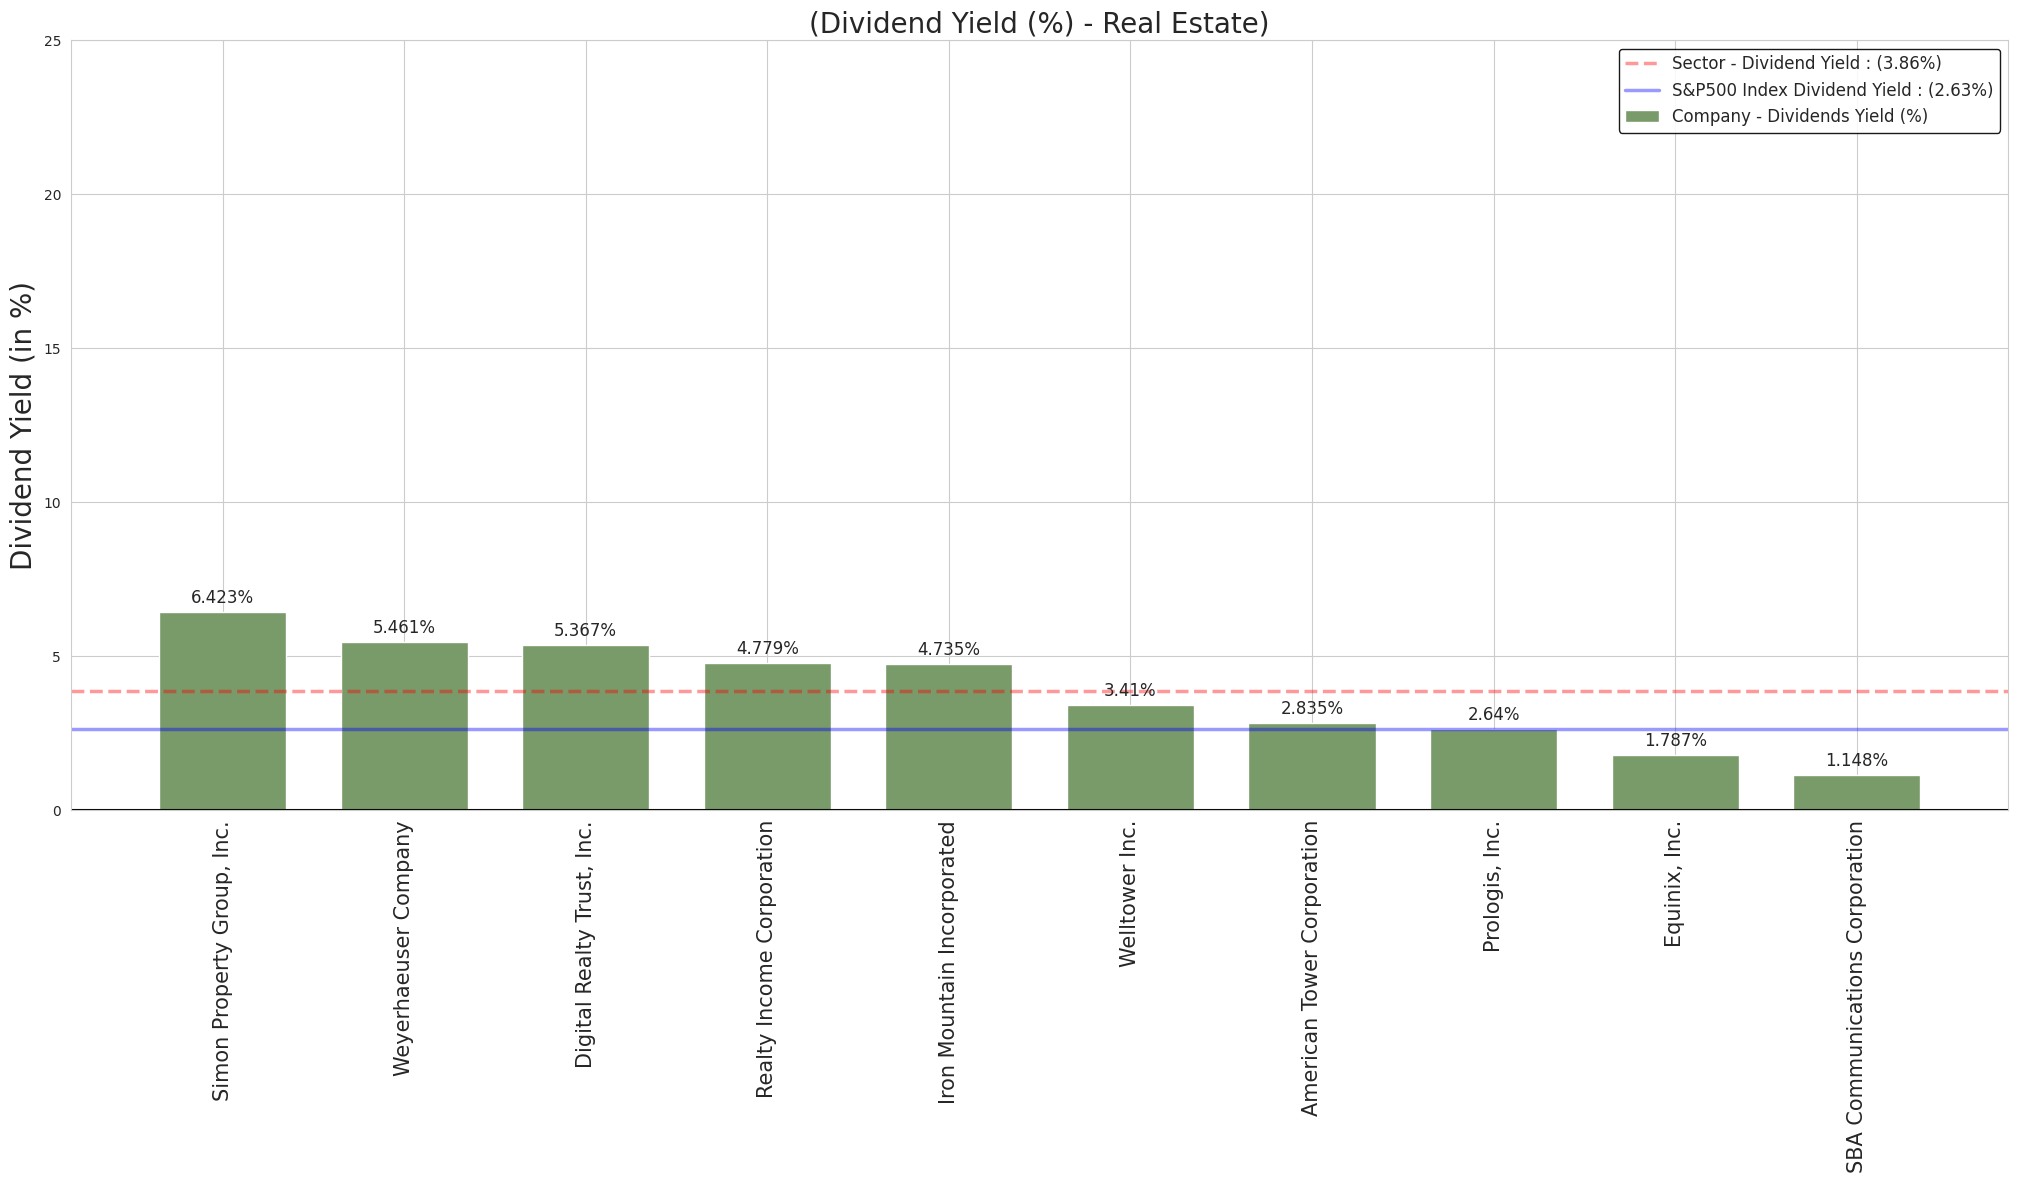

The company with the highest dividend yield in the Real Estate sector is Simon Property Group, Inc., with a yield of 6.42%.
The company with the lowest dividend yield in this sector is SBA Communications Corporation, with a yield of 1.15%.
The average dividend yield for companies in this sector this year is 3.86%.


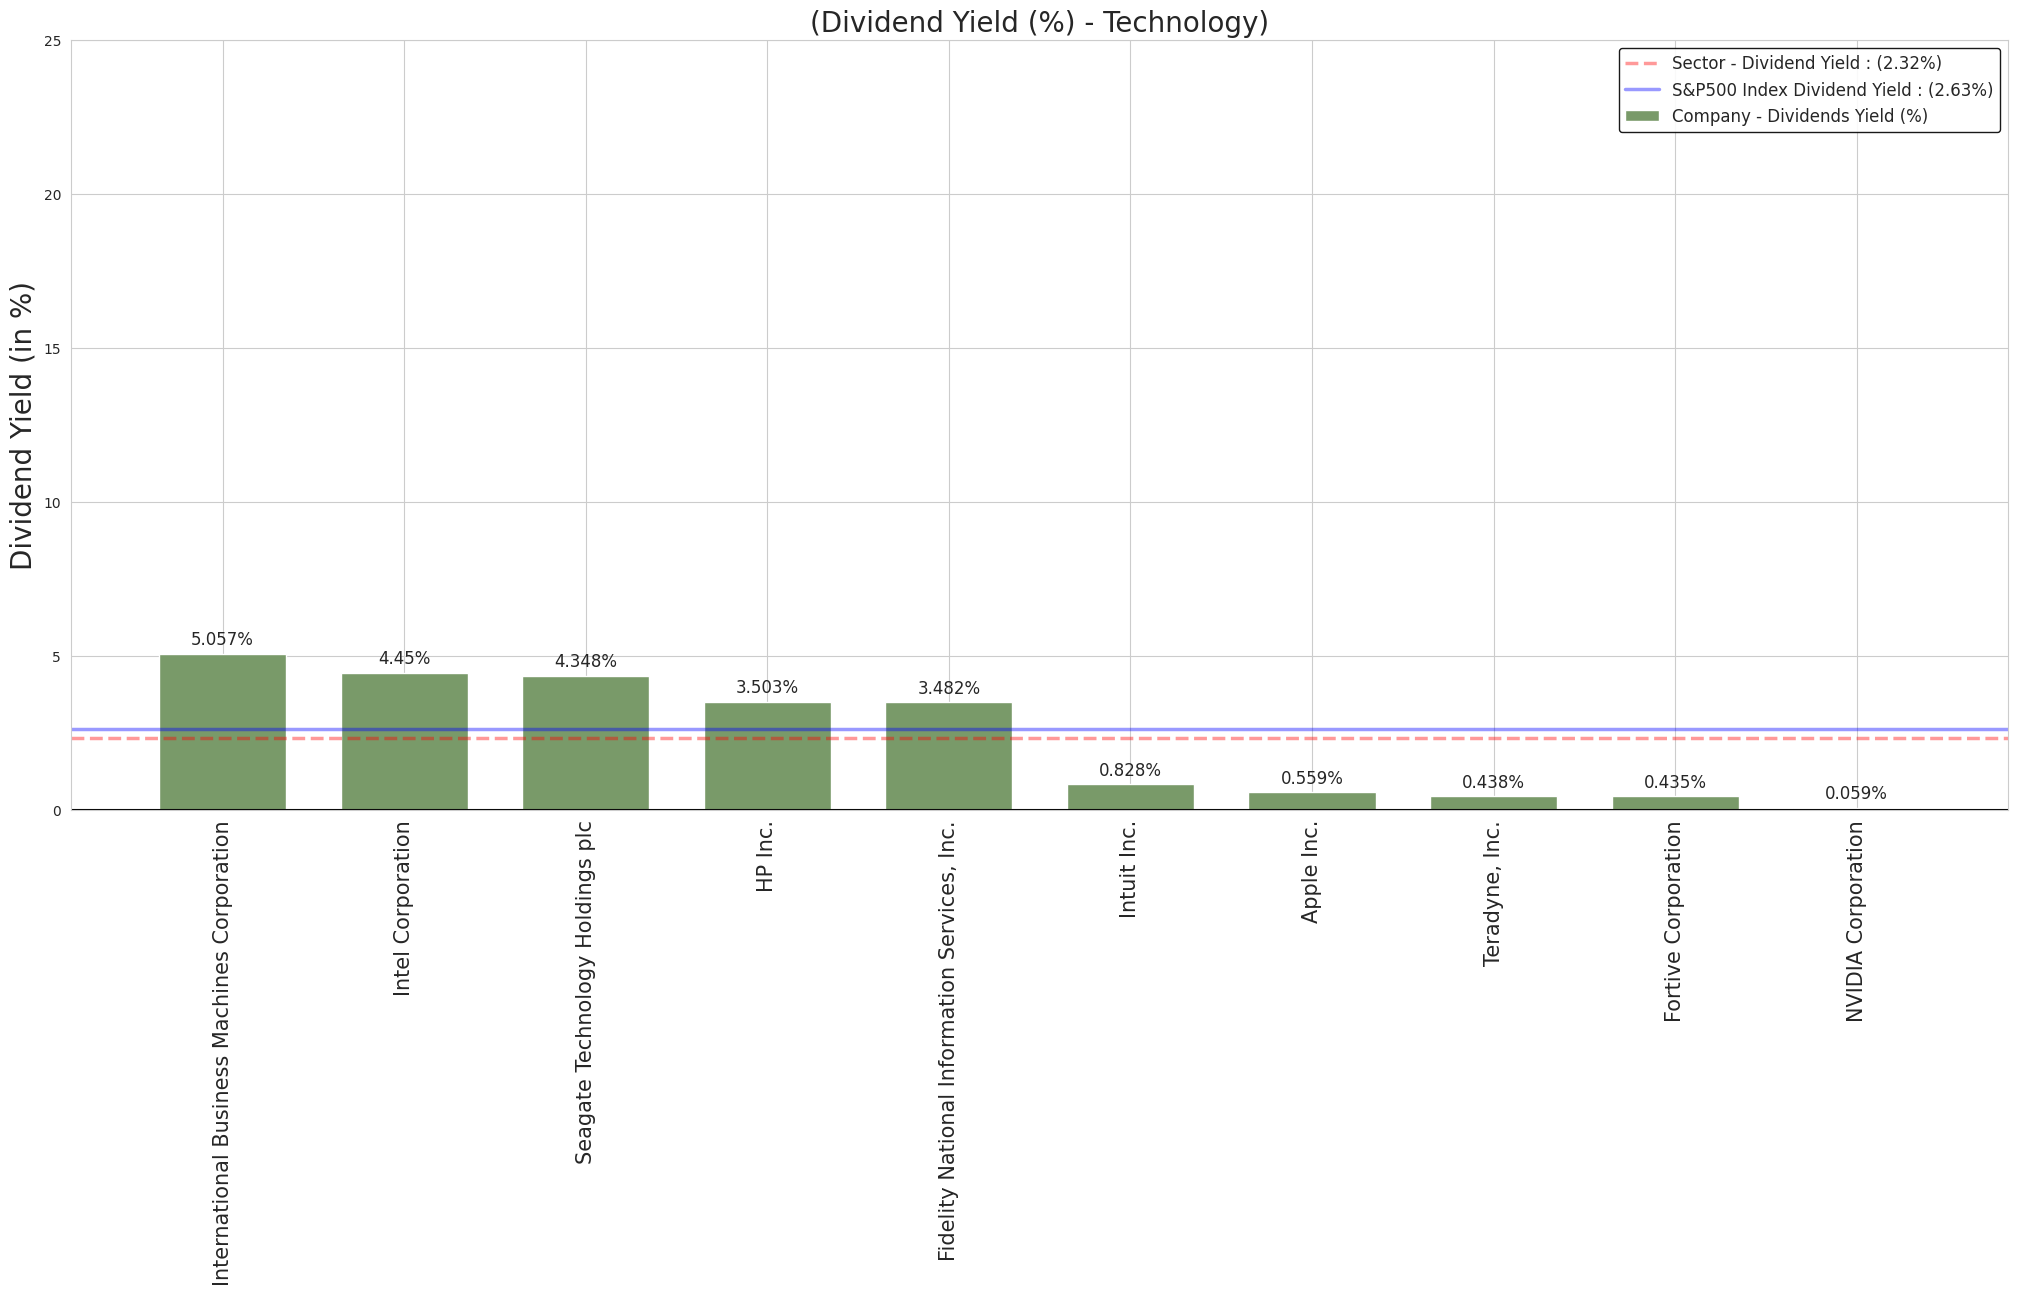

The company with the highest dividend yield in the Technology sector is International Business Machines Corporation, with a yield of 5.06%.
The company with the lowest dividend yield in this sector is NVIDIA Corporation, with a yield of 0.06%.
The average dividend yield for companies in this sector this year is 2.32%.


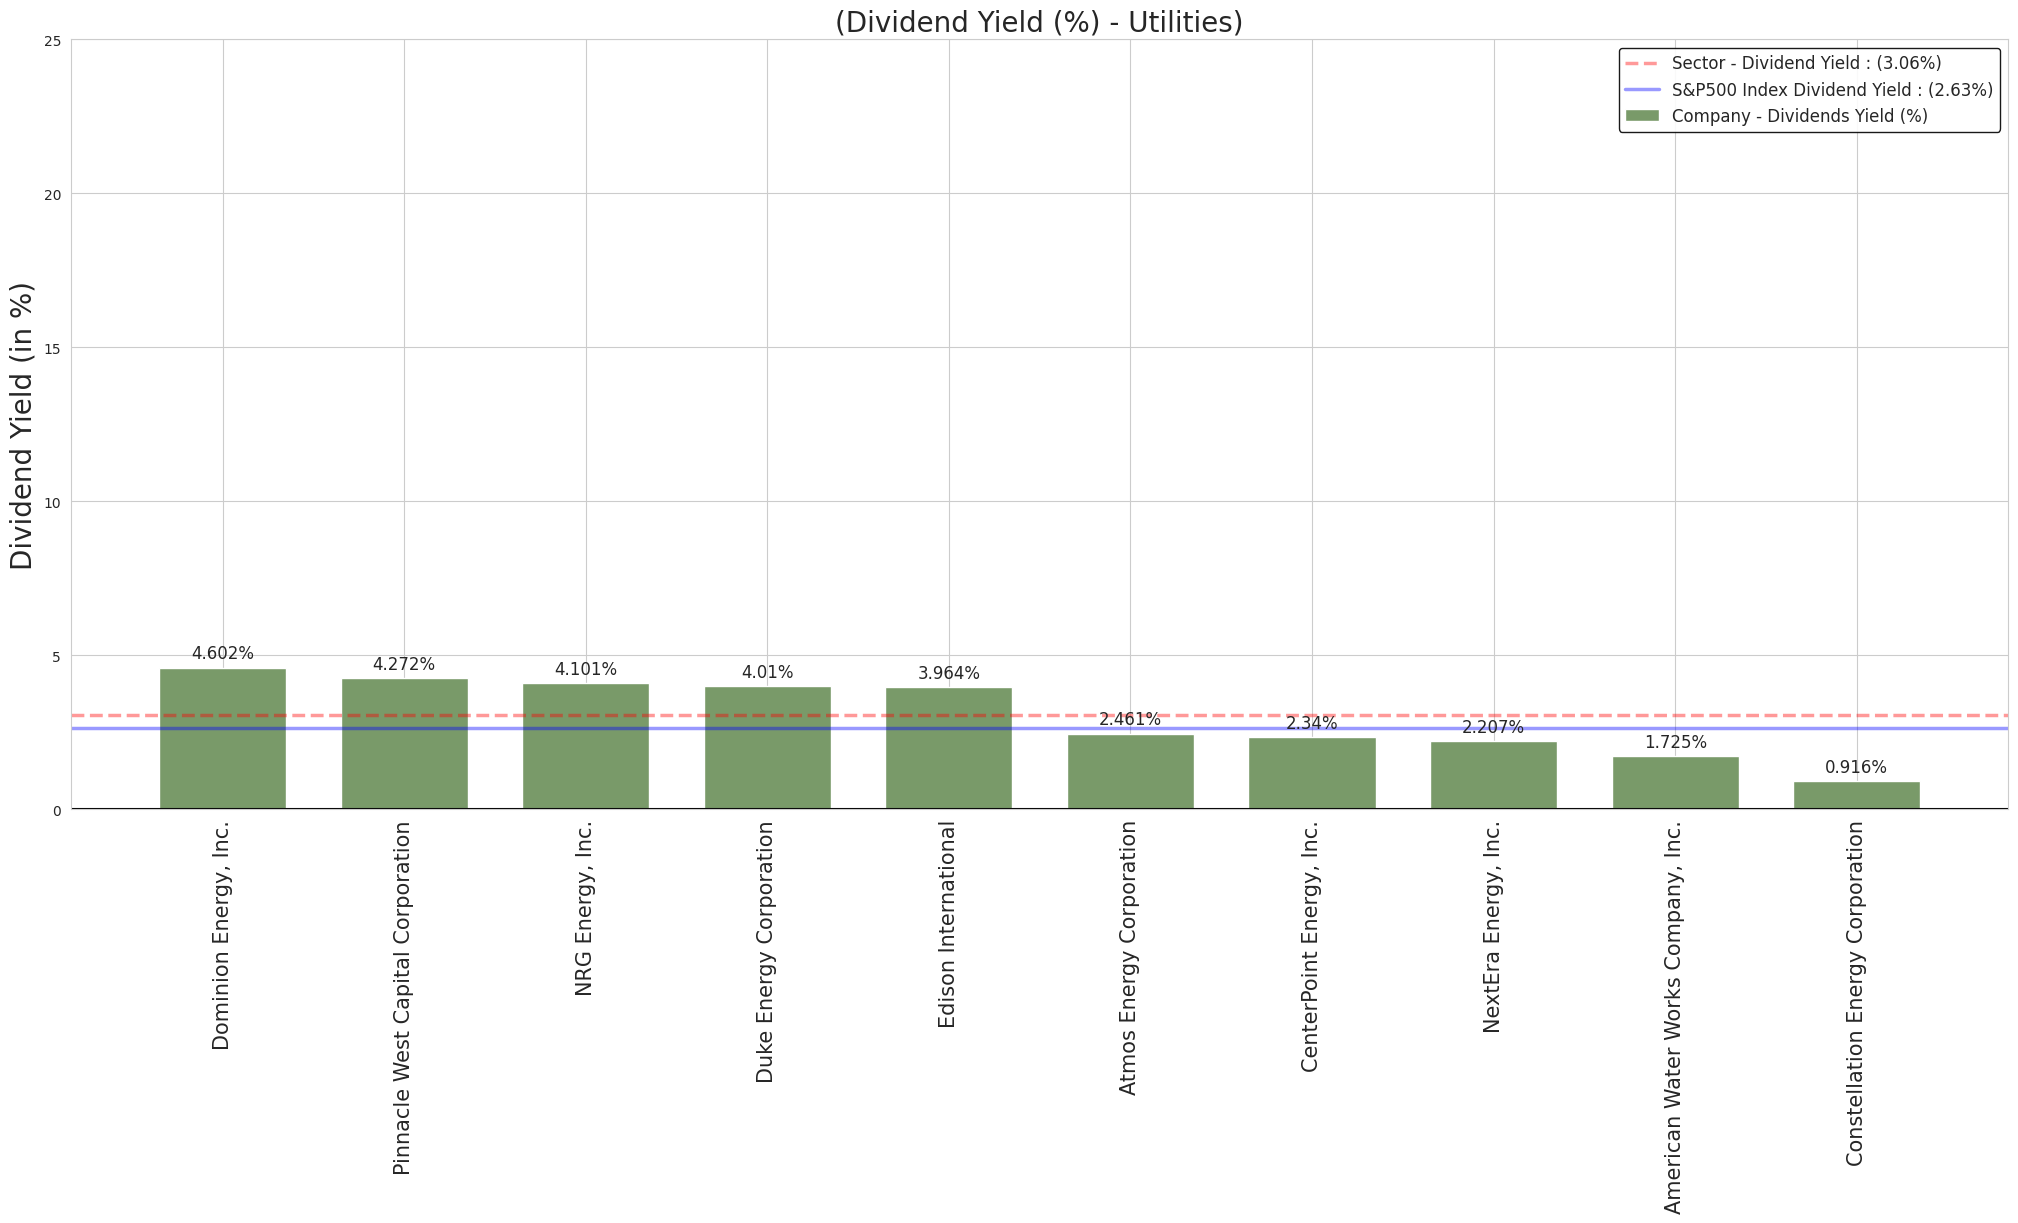

The company with the highest dividend yield in the Utilities sector is Dominion Energy, Inc., with a yield of 4.60%.
The company with the lowest dividend yield in this sector is Constellation Energy Corporation, with a yield of 0.92%.
The average dividend yield for companies in this sector this year is 3.06%.


In [18]:
sector_list = sorted(df["Sector"].unique().tolist())
DY_avg = df['Dividend Yield'].mean()

# Creating a function to plot the graphs for all the sectors in the S&P500 Index
def sector_dps_visual(i):
  plot_df = pd.read_csv(out_path + "Sector Wise Analysis/" + i + ".csv")

  # Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
  plot_df = plot_df.sort_values(by="Dividend Yield", ascending=False)
  plot_df = pd.concat([plot_df.head(5), plot_df.tail(5)])
  plot_df = plot_df.reset_index()
  plot_df = plot_df.set_index("Ticker")
  plot_df = plot_df.sort_values(by="Dividend Yield", ascending=False)


  # Set the plot style
  sns.set_style('whitegrid')

  # Setting the colours for the bars in the plot
  colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Dividend Yield']]

  # Create the plot
  fig, ax = plt.subplots(figsize=(25, 10))
  ax.bar(plot_df.index, plot_df['Dividend Yield'], width=0.7, label='Company - Dividends Yield (%)', color = colours_for_bars)

  # Add values above each bar
  for i, val in enumerate(plot_df['Dividend Yield']):
    ax.text(i , val + 0.75, str(round(val, 3)) + '%', ha='center', va='top', fontsize=12)


  # Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
  ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
  ax.axhline(y=plot_df["Dividend Yield"].mean(), color='red', linestyle='--', linewidth=2.5, alpha = 0.4, label='Sector - Dividend Yield : ' + "(" + str(round(plot_df["Dividend Yield"].mean(),2)) + "%)")
  ax.axhline(y=DY_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.4, label='S&P500 Index Dividend Yield : ' + "(" + str(round(DY_avg, 2))+ "%)")

  # Set the y limits
  ax.set_ylim(0, 25)

  # Set the title and axis labels
  ax.set_title('(Dividend Yield (%) - ' + plot_df["Sector"][0] + ')', fontsize=20)
  ax.set_ylabel('Dividend Yield (in %)', fontsize=20)

  # Set the x-axis tick labels
  ax.set_xticks(plot_df.index)
  ax.set_xticklabels(plot_df['Company Name'], rotation=90, fontsize = 15)

  # Add a legend
  ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

  # Show the plot
  plt.show()

  # Print the summary of the plot mentioning the highest and the lowest performers in the sector.
  print(f"The company with the highest dividend yield in the {plot_df['Sector'][0]} sector is {plot_df['Company Name'].iloc[0]}, with a yield of {plot_df['Dividend Yield'].iloc[0]:.2f}%.")
  print(f"The company with the lowest dividend yield in this sector is {plot_df['Company Name'].iloc[-1]}, with a yield of {plot_df['Dividend Yield'].iloc[-1]:.2f}%.")
  print(f"The average dividend yield for companies in this sector this year is {round(plot_df['Dividend Yield'].mean(), 2):.2f}%.")

  # Deleting the above created DataFrame "plot_df" to avoid redundancy
  del plot_df

# We are deploying the above created function to plot all the required graphs, by looping through the list of sectors in the S&P500 Index
for i in sector_list:
  sector_dps_visual(i)

### Comparing Dividend Yield of all the sectors in the Index

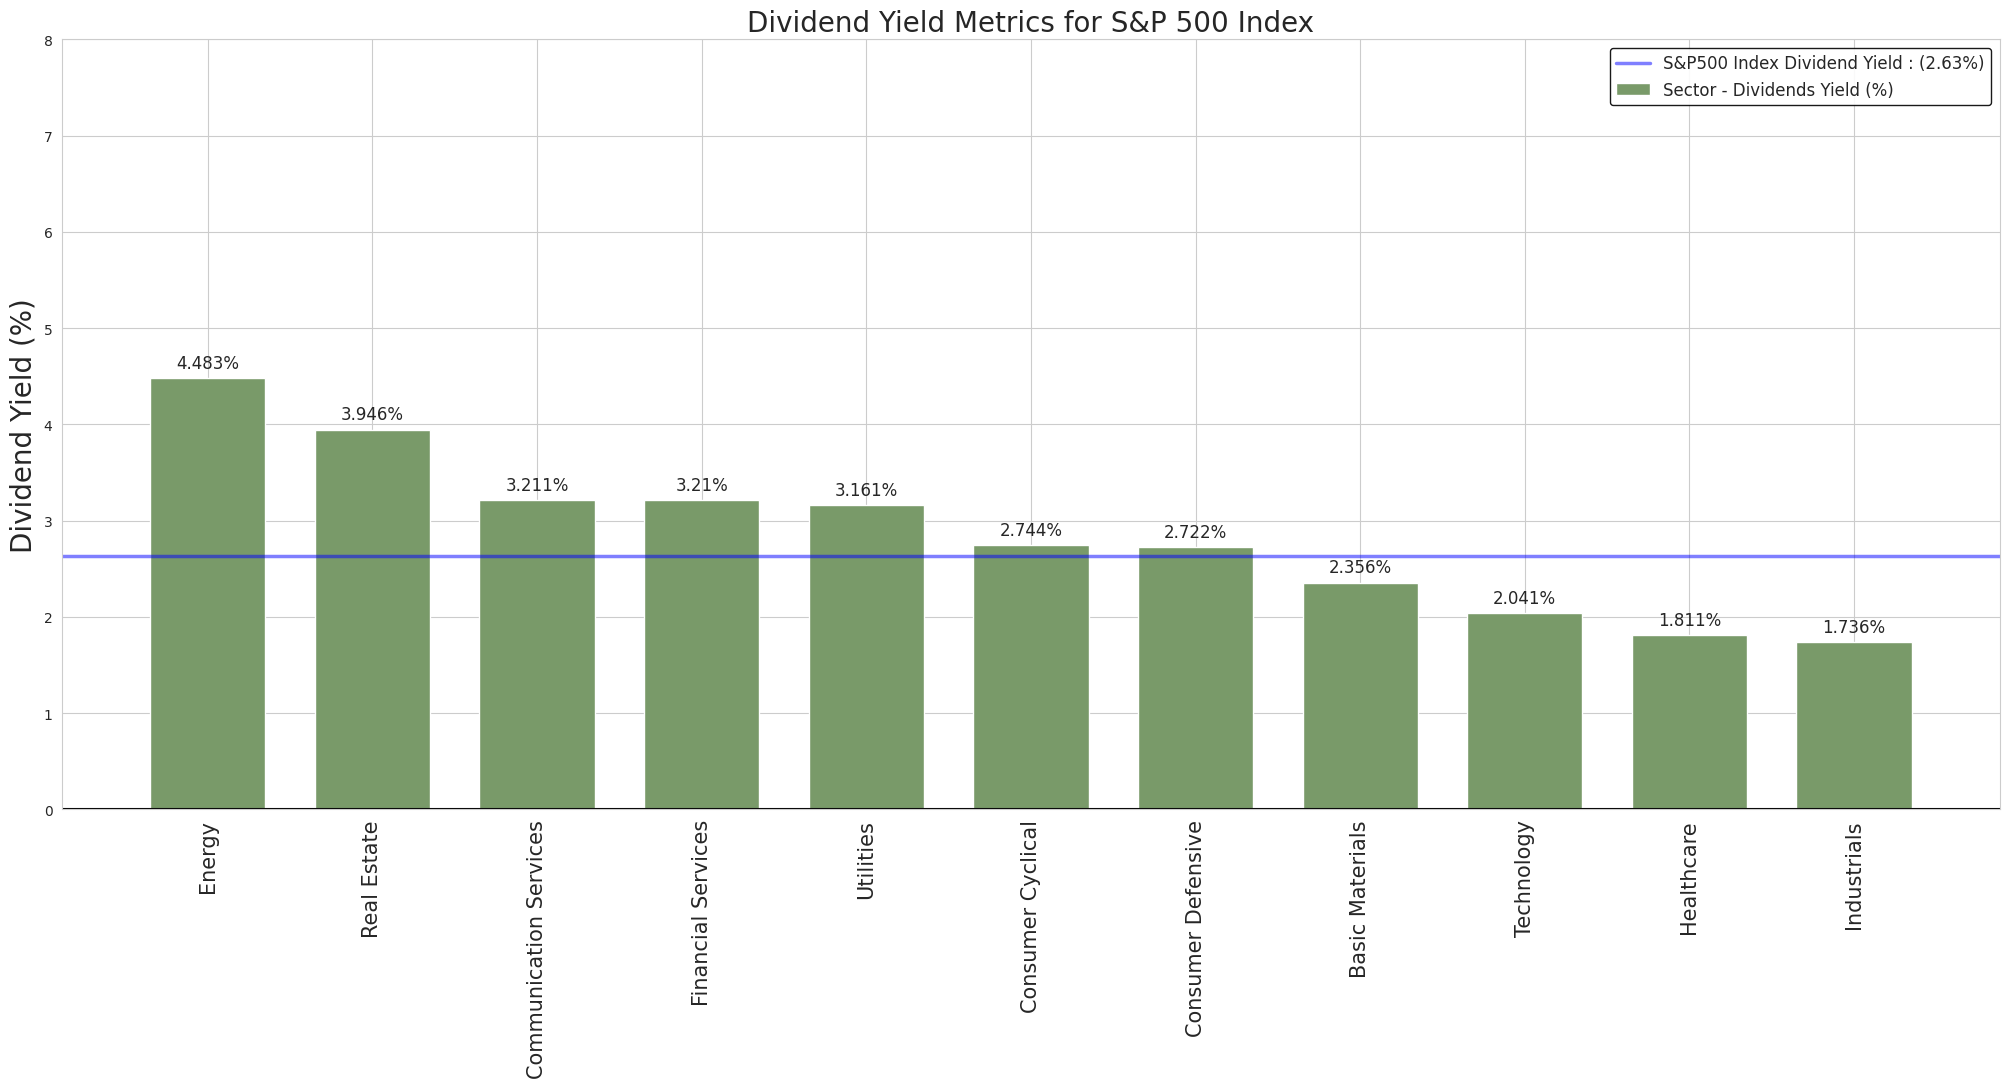

The sector with the highest Dividend Yield for this year in the S&P500 Index is Energy, with Earnings per Share at 4.48%.
The sector with the least Dividend Yield of this year is Industrials, with Earnings per Share at 1.74%.
The S&P500 Index Dividend Yield for this year is at 2.63%.


In [19]:
plot_df = pd.read_csv(out_path + "Sector Performance.csv")

# Creating a filtered table for plotting a bar chart for top 5 and least 5 performing companies per sector
plot_df = plot_df.set_index("Sector")
plot_df = plot_df.sort_values(by="Sector - Dividends Yield", ascending=False)

# Set the plot style
sns.set_style('whitegrid')

# Setting the colours for the bars in the plot
colours_for_bars = ['#D1705B' if val < 0 else '#799A69' for val in plot_df['Sector - Dividends Yield']]

# Create the plot
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(plot_df.index, plot_df['Sector - Dividends Yield'], width=0.7, label='Sector - Dividends Yield (%)', color = colours_for_bars)

# Add values above each bar
for i, val in enumerate(plot_df['Sector - Dividends Yield']):
  ax.text(i, val + 0.25, str(round(val, 3)) + '%', ha='center', va='top', fontsize=12)

# Add a horizontal line for S&P500 Index Performance and the Sector Average Performance
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.axhline(y=DY_avg, color='blue', linestyle='-', linewidth=2.5, alpha = 0.5, label='S&P500 Index Dividend Yield : ' + "(" + str(round(DY_avg, 2)) + "%)")

# Set the y limits
ax.set_ylim(0, 8)

# Set the title and axis labels
ax.set_title('Dividend Yield Metrics for S&P 500 Index', fontsize=20)
ax.set_ylabel('Dividend Yield (%)', fontsize=20)

# Set the x-axis tick labels
ax.set_xticks(plot_df.index)
ax.set_xticklabels(plot_df.index, rotation=90, fontsize = 15)

# Add a legend
ax.legend(loc='upper right', fontsize=12, framealpha=0.9, facecolor='white', edgecolor='black')

# Show the plot
plt.show()

# Print the summary of the plot mentioning the most and the least profitable sectors.
print(f"The sector with the highest Dividend Yield for this year in the S&P500 Index is {plot_df.index[0]}, with Earnings per Share at {plot_df['Sector - Dividends Yield'].iloc[0]:.2f}%.")
print(f"The sector with the least Dividend Yield of this year is {plot_df.index[-1]}, with Earnings per Share at {plot_df['Sector - Dividends Yield'].iloc[-1]:.2f}%.")
print(f"The S&P500 Index Dividend Yield for this year is at {round(DY_avg, 2):.2f}%.")

# Deleting the above created DataFrame "plot_df" to avoid redundancy
del plot_df